##### top

# This ntb estimates reliability of each task by spliting it in halves and looking at correlations in performance

Tasks:
* [CCMT - Cambridge car memory test](#CCMT)
    * [Run split halves CCMT](#Run-split-halves-CCMT)
        * [Run overlap CCMT](#Run-overlap-CCMT)
        * [Run overlap CCMT tasks](#Run-overlap-CCMT-tasks)
    
* [CFMT - Cambridge face memory test](#CFMT)
    * [Run split halves CFMT](#Run-split-halves-CFMT)    
        * [Run overlap CFMT](#Run-overlap-CFMT-score)
        * [Run overlap CFMT original and first visit of Australia](#Run-overlap-CFMT-original-and-first-visit-of-Australia)

* [Car matching](#Car-matching)
    * [Run split halves car matching](#Run-split-halves-car-matching)
        * [Run overlap car matching](#Run-overlap-car-matching)
    
* [Emotion matching](#Emotion-matching)
    * [Run split halves Emotion matching](#Run-split-halves-Emotion-matching) 
        * [Run overlap emotion matching](#Run-overlap-emotion-matching)
    
* [Emotion labelling](#Emotion-labelling)
    * [Run split halves Emotion labelling](#Run-split-halves-Emotion-labelling)       
        * [Run overlap emotion labelling](#Run-overlap-emotion-labelling)
* [Run emotion labelling and matching together](#Run-emotion-labelling-and-matching-together)    
    
* [FMP](#FMP)
    * [FMP standalone](#FMP-standalone)
    * [Run overlap FMP](#Run-overlap-FMP)

* [GFMT](#GFMT)
    * [Run split halves GFMT](#Run-split-halves-GFMT)
        * [Run overlap GFMT](#Run-overlap-GFMT)

* [MST](#MST)
    * [Run split halves MST](#Run-split-halves-MST)
        * [Run overlap MST](#Run-overlap-MST)
        * [LDI and REC](#LDI-and-REC)
            * [Run overlap MST measures](#Run-overlap-MST-measures)
        
* [PIM](#PIM)
    * [Run split halves PIM](#Run-split-halves-PIM)
        * [Overall accuracy PIM MC](#Overall-accuracy-PIM-MC)
        * [Combine all four measures](#Combine-all-four-measures)
        * [Run overlap PIM MC](#Run-overlap-PIM-MC)
        * [PIM Recognition](#PIM-Recognition)
        * [Run overlap PIM recognition](#Run-overlap-PIM-recognition)
    
* [PGNG](#PGNG)
    * [Run split halves PGNG](#Run-split-halves-PGNG) 
        * [Run overlap PGNG](#Run-overlap-PGNG-score)
        * [Run overlap PGNG PCIT](#Run-overlap-PGNG-PCIT)
        * [Run overlap PGNG PCTT](#Run-overlap-PGNG-PCTT)
        * [PGNG overall (overlapped) RTT](#PGNG-overall-RTT)
        * [PGNG overall CoV](#PGNG-overall-CoV)
        * [PGNG efficiency ratio](#PGNG-efficiency-ratio)
    
* [RISE](#RISE)
    * [Run split halves RISE](#Run-split-halves-RISE)
        * [Run overlap RISE](#Run-overlap-RISE)
    
* [SCAP](#SCAP)
    * [Run split halves SCAP](#Run-split-halves-SCAP)   
        * [Run overlap SCAP score](#Run-overlap-SCAP-score)
        * [Run overlap SCAP tasks](#Run-overlap-SCAP-tasks)
        * [Run overlap SCAP Cowan](#Run-overlap-SCAP-Cowan)
  
* [n back](#n-back)
    * [Run split halves n back](#Run-split-halves-n-back)
        * [Run overlap n back](#Run-overlap-n-back)
            * [Accuracy](#Accuracy-n-back-overlap)
            * [d prime](#d-prime-overlap)
            
* [Navon](#Navon)
    * [Run split halves Navon](#Run-split-halves-Navon)
            
* [VET birds](#VET-birds)
    * [Prepare and process VET-birds](#Prepare-and-process-VET-birds)
    * [Run split halves VET-birds](#Run-split-halves-VET-birds)
        
* [VET leaves](#VET-leaves)
    * [Prepare and process VET-leaves](#Prepare-and-process-VET-leaves)
    * [Run split halves VET-leaves](#Run-split-halves-VET-leaves)
    
* [VET planes](#VET-planes)
    * [Prepare and process VET-planes](#Prepare-and-process-VET-planes)
    * [Run split halves VET-planes](#Run-split-halves-VET-planes)
    
* [VET combine tasks](#VET-combine-tasks)
    
For running the split halves analysis, see [FMP](#FMP) part for all the details.

All the results are saved into separate csv files so that one can plot and do statistics on the reliability without the need of running all this again.

---
New additions (February, March 2022):

There are now several new files which are additional forms. They are analysed both separately and as if it were additional trials, ie. as if the participants did twice/three times as much.
    
    
---
NOTE (README):
--
This is the very original notebook which is doing 10 000 simulations and looks at all of the reliability measures. It is not well written (a lot of code repetitions) and it serverd as the first look at reliability. Nevertheless, it is up-to-date after the new additions. From this ntb, the `Reliability-data4curves.ipynb` was derived where all the lengthy code was rewritten into a few functions. The principle is, however, similar, but only the calculations are done there, not the data preprocessing.

**The logic** of this ntb is that first, there is the preprocessing and cleaning of the data. That is specific per task and cannot be easily rewritten. **It is designed that one always runs a task, then restarts the kernel and runs the next** although it is possible to run all (the variable names are different). 

For the data, there is always the reliability calculated for the original dataset, for the standalone dataset and for concatenated datasets.


In [1]:
import os, sys
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
from scipy.stats import norm

user = "jan"

if user == "jan":
    csv_raw_data_path = "../Data/raw_CSV"
    csv_raw_pilot_data_path = "../Data/raw_CSV/piloting"
    path_demo = '../Data/demographic_data/'
    csv_clean_data_path = "../Data/cleaned_CSV" 

    path_results = "../Data/results" 
    path_reliability_results = os.path.join(path_results, "reliability_split_halves")
    
    # Importing module for functions
    functions_modul =  "./functions"
    sys.path.insert(0, functions_modul)
    
# import all processing and plotting functions
from reliability_functions import check_df_get_numbers, split_dataframes_faster
from composite_measures_functions import calculate_d_prime
from plot_functions import plot_correlation_scatter, plot_correlation_hist    
    

## CCMT
[top](#top)

### Run split halves CCMT
[top](#top)

In [2]:
# define manually num of trials
n_trials_per_form = 72

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original data

In [3]:
# load only the original data
df_ccmt = pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data.csv"))
print(f"Running first study with total {df_ccmt.userID.unique().size} participants.")

Running first study with total 243 participants.


In [4]:
print(df_ccmt.userID.value_counts()[df_ccmt.userID.value_counts()>n_trials_per_form])#.keys()

Series([], Name: userID, dtype: int64)


In [5]:
# num of subjects
N = len(df_ccmt.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_ccmt, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["CCMT"] = total_n_trials
# and subjects
n_subj_dict["CCMT"] = N

# define corr array
ccmt_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_ccmt.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_ccmt_first = None
    df_ccmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_ccmt_first, df_ccmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    ccmt_array_corr[i] = df_ccmt_first.groupby('userID').correct.mean().corr(df_ccmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.42 s per 100
# 3.9 s (0.5 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 30.21 s which is 0.50 min.


Text(0.5, 1.0, 'CCMT reliability -- correlation between split halves, original,\nN=243, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

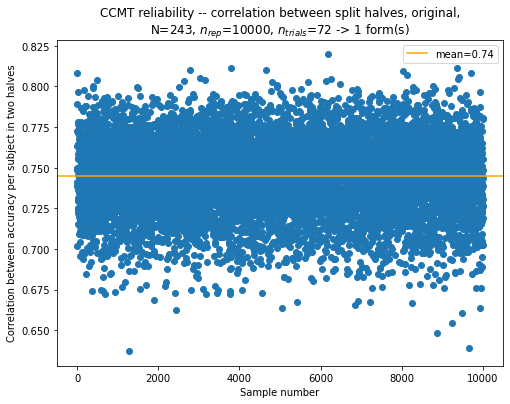

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(ccmt_array_corr, ax)

plt.title(f"CCMT reliability -- correlation between split halves, original,\nN={df_ccmt.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_ccmt.userID.value_counts()[0]} -> {df_ccmt.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'CCMT reliability -- correlation between split halves,\nN=243, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

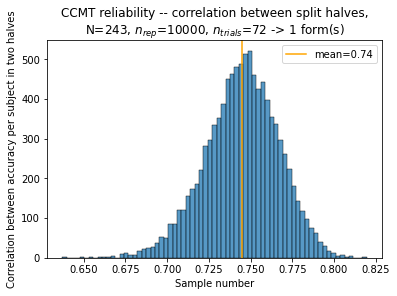

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(ccmt_array_corr, ax)

plt.title(f"CCMT reliability -- correlation between split halves,\nN={df_ccmt.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_ccmt.userID.value_counts()[0]} -> {df_ccmt.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second standalone version

In [8]:
# load only the original data
df_ccmt_stand = pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data_rep.csv"))
print(f"Running first study with total {df_ccmt_stand.userID.unique().size} participants.")

print(df_ccmt_stand.userID.value_counts()[df_ccmt_stand.userID.value_counts()>n_trials_per_form])#.keys()

Running first study with total 160 participants.
Series([], Name: userID, dtype: int64)


In [9]:
# num of subjects
N = len(df_ccmt_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_ccmt_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["CCMT_stand"] = total_n_trials
# and subjects
n_subj_dict["CCMT_stand"] = N

# define corr array
ccmt_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_ccmt_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_ccmt_first = None
    df_ccmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_ccmt_first, df_ccmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    ccmt_stand_array_corr[i] = df_ccmt_first.groupby('userID').correct.mean().corr(df_ccmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.42 s per 100
# 28 s (0.5 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 27.75 s which is 0.46 min.


Text(0.5, 1.0, 'CCMT reliability -- correlation between split halves,\nN=160, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

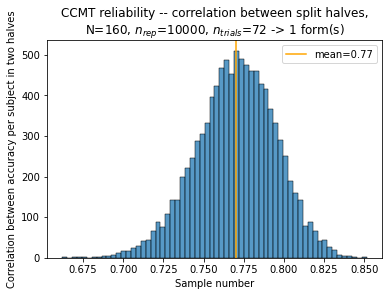

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(ccmt_stand_array_corr, ax)

plt.title(f"CCMT reliability -- correlation between split halves,\nN={df_ccmt_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_ccmt_stand.userID.value_counts()[0]} -> {df_ccmt_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap CCMT
[top](#top)

In [11]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CCMT-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_ccmt_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'CCMT-cleaned_data_rep.csv')),
])

# take only the full data
df_ccmt_concat = df_ccmt_concat[df_ccmt_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_ccmt_concat.userID.value_counts()[df_ccmt_concat.userID.value_counts()>144])#.keys()

Running all replicate studies with total 154 participants.
Series([], Name: userID, dtype: int64)


In [12]:
# num of subjects
N = len(df_ccmt_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_ccmt_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["CCMT_concat"] = total_n_trials
# and subjects
n_subj_dict["CCMT_concat"] = N

# define corr array
ccmt_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_ccmt_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_ccmt_first = None
    df_ccmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_ccmt_first, df_ccmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    ccmt_concat_array_corr[i] = df_ccmt_first.groupby('userID').correct.mean().corr(df_ccmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.35 s per 100
# 36 s (0.6 min) per 10 000

Total number of trials is 144.
Taking 72 trials.
Process took: 35.54 s which is 0.59 min.


Text(0.5, 1.0, 'CCMT reliability -- correlation between split halves,\nN=154, $n_{rep}$=10000, $n_{trials}$=144 -> 2 form(s)')

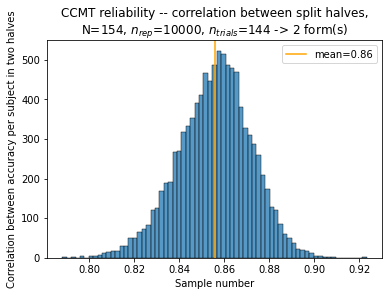

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(ccmt_concat_array_corr, ax)

plt.title(f"CCMT reliability -- correlation between split halves,\nN={df_ccmt_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_ccmt_concat.userID.value_counts()[0]} -> {df_ccmt_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_concat_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_concat_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Run it on the tasks separately

In [14]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_ccmt.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_ccmt.sort_values(by=["userID"]).loc[df_ccmt["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    ccmt_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
        
    # save the num_trials
    n_trials_dict[f"CCMT_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CCMT_stage{tsk}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_ccmt_first = None
        df_ccmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_ccmt_first, df_ccmt_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        ccmt_array_corr_tasks[i] = df_ccmt_first.groupby('userID').correct.mean().corr(df_ccmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(ccmt_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_trials_all['id'] = df_corr_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 72 s (1.2 min) per 10 000

Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 71.11 s which is 1.19 min.


Text(0.5, 0.98, 'CCMT reliability -- correlation between split halves, N=243, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

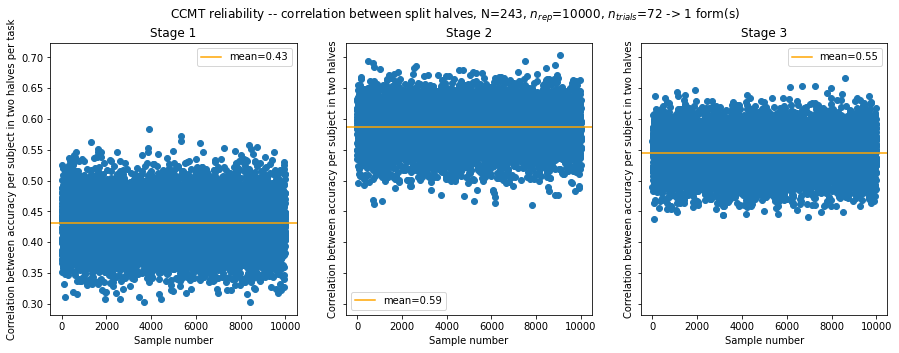

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_scatter(df_corr_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

plt.suptitle(f"CCMT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_ccmt.userID.value_counts()[0]} -> {df_ccmt.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 0.98, 'CCMT reliability -- correlation between split halves, N=243, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

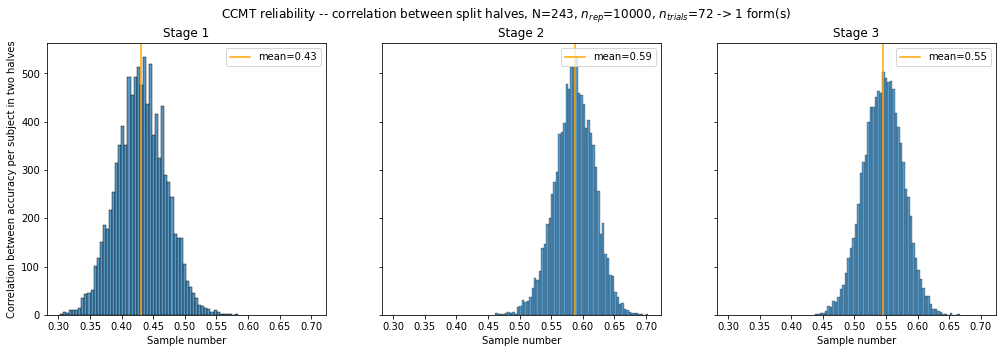

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CCMT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_ccmt.userID.value_counts()[0]} -> {df_ccmt.userID.value_counts()[0]//n_trials_per_form} form(s)")

# save only for the original
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run on the replication

In [17]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_ccmt_stand.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_ccmt_stand.sort_values(by=["userID"]).loc[df_ccmt_stand["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    ccmt_stand_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
        
    # save the num_trials
    n_trials_dict[f"CCMT_stand_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CCMT_stand_stage{tsk}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_ccmt_first = None
        df_ccmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_ccmt_first, df_ccmt_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        ccmt_stand_array_corr_tasks[i] = df_ccmt_first.groupby('userID').correct.mean().corr(df_ccmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(ccmt_stand_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_stand_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_stand_trials_all['id'] = df_corr_stand_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 64 s (1.07 min) per 10 000


Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 64.36 s which is 1.07 min.


Text(0.5, 0.98, 'CCMT reliability -- correlation between split halves, N=160, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

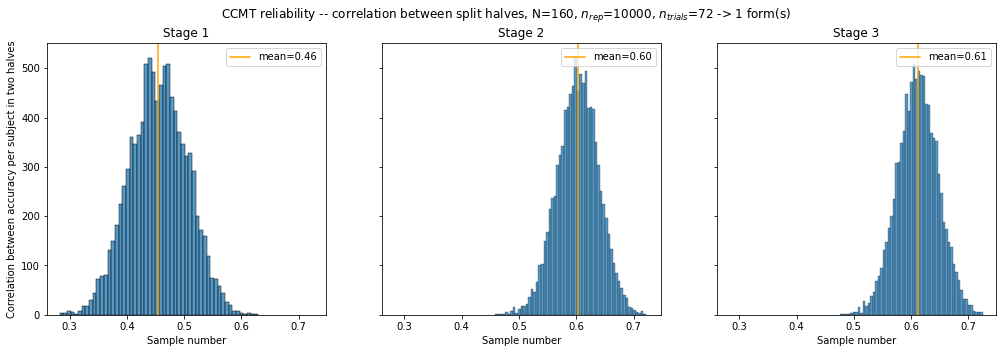

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_stand_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CCMT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_ccmt_stand.userID.value_counts()[0]} -> {df_ccmt_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")

# save only for the original
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap CCMT tasks
[top](#top)

In [19]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_ccmt_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = 2*np.array([18, 30, 24])

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_ccmt_concat.sort_values(by=["userID"]).loc[df_ccmt_concat["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    ccmt_concat_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
        
    # save the num_trials
    n_trials_dict[f"CCMT_concat_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CCMT_concat_stage{tsk}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_ccmt_first = None
        df_ccmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_ccmt_first, df_ccmt_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        ccmt_concat_array_corr_tasks[i] = df_ccmt_first.groupby('userID').correct.mean().corr(df_ccmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(ccmt_concat_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_concat_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_concat_trials_all['id'] = df_corr_concat_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 71 s (1.2 min) per 10 000


Stage: 1
Total number of trials is 36.
Stage: 2
Total number of trials is 60.
Stage: 3
Total number of trials is 48.
Process took: 70.99 s which is 1.18 min.


Text(0.5, 0.98, 'CCMT reliability -- correlation between split halves, N=154, $n_{rep}$=10000, $n_{trials}$=144 -> 2 form(s)')

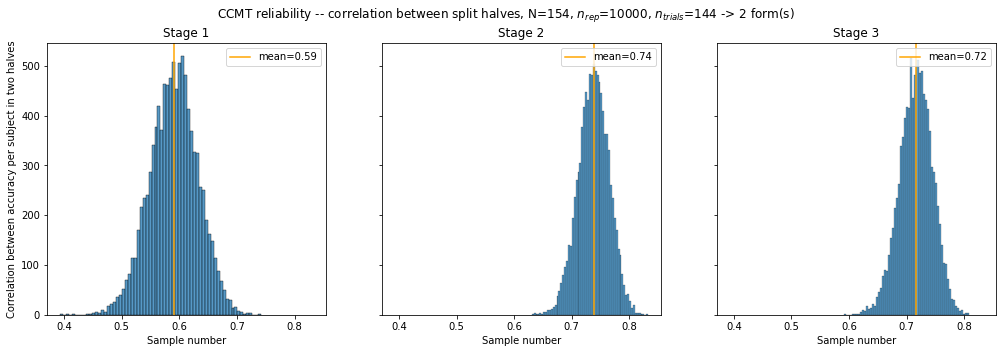

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_concat_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CCMT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_ccmt_concat.userID.value_counts()[0]} -> {df_ccmt_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")

# save only for the original
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [21]:
# save only if we run it
if 'ccmt_array_corr' in locals():
    pd.DataFrame({
        "CCMT_overall_correlation" : ccmt_array_corr,
        "CCMT_stage1" : df_corr_trials_all["stage_1"],
        "CCMT_stage2" : df_corr_trials_all["stage_2"],
        "CCMT_stage3" : df_corr_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CCMT_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'ccmt_stand_array_corr' in locals():
    pd.DataFrame({
        "CCMT_overall_correlation" : ccmt_stand_array_corr,
        "CCMT_stage1" : df_corr_stand_trials_all["stage_1"],
        "CCMT_stage2" : df_corr_stand_trials_all["stage_2"],
        "CCMT_stage3" : df_corr_stand_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CCMT_reliability_standalone-method-Michal.csv"), index=False)
    print("saved standalone")

# both of them    
if 'ccmt_concat_array_corr' in locals():
    pd.DataFrame({
        "CCMT_overall_correlation" : ccmt_concat_array_corr,
        "CCMT_stage1" : df_corr_concat_trials_all["stage_1"],
        "CCMT_stage2" : df_corr_concat_trials_all["stage_2"],
        "CCMT_stage3" : df_corr_concat_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CCMT_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat data")

saved original data
saved standalone
saved concat data


In [22]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('CCMT').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "CCMT_overall_correlation": [n_trials_dict[f"CCMT{ver}"]],
            "CCMT_stage1": [n_trials_dict[f"CCMT{ver}_stage1"]],
            "CCMT_stage2": [n_trials_dict[f"CCMT{ver}_stage2"]],
            "CCMT_stage3": [n_trials_dict[f"CCMT{ver}_stage3"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [23]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["CCMT_overall_correlation", "CCMT_stage1", "CCMT_stage2", "CCMT_stage3"],
        "num_trials": [n_trials_dict[f"CCMT{ver}"], n_trials_dict[f"CCMT{ver}_stage1"], n_trials_dict[f"CCMT{ver}_stage2"], n_trials_dict[f"CCMT{ver}_stage3"]],
        "reliability_mean": [eval(f"ccmt{ver}_array_corr").mean(), eval(f"df_corr{ver}_trials_all['stage_1']").mean(), eval(f"df_corr{ver}_trials_all['stage_2']").mean(), eval(f"df_corr{ver}_trials_all['stage_3']").mean(), ],
        "reliability_std":  [eval(f"ccmt{ver}_array_corr").std() , eval(f"df_corr{ver}_trials_all['stage_1']").std() , eval(f"df_corr{ver}_trials_all['stage_2']").std() , eval(f"df_corr{ver}_trials_all['stage_3']").std() , ],
        "version": 4*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"CCMT{ver}"], n_subj_dict[f"CCMT{ver}_stage1"], n_subj_dict[f"CCMT{ver}_stage2"], n_subj_dict[f"CCMT{ver}_stage3"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task num_trials  reliability_mean  reliability_std  \
0  CCMT_overall_correlation         72          0.744839         0.021953   
1               CCMT_stage1         18          0.430841         0.038396   
2               CCMT_stage2         30          0.586765         0.031072   
3               CCMT_stage3         24          0.545496         0.031030   
0  CCMT_overall_correlation         72          0.770198         0.024802   
1               CCMT_stage1         18          0.455148         0.050088   
2               CCMT_stage2         30          0.602704         0.036428   
3               CCMT_stage3         24          0.612113         0.035574   
0  CCMT_overall_correlation        144          0.855768         0.016273   
1               CCMT_stage1         36          0.590158         0.041303   
2               CCMT_stage2         60          0.737885         0.026693   
3               CCMT_stage3         48          0.716195         0.028408   

  version num_subjects  
0                  243  
1                  243  
2                  243  
3                  243  
0   stand          160  
1   stand          160  
2   stand          160  
3   stand          160  
0  concat          154  
1  concat          154  
2  concat          154  
3  concat          154

----

## CFMT
[top](#top)

### Run split halves CFMT
[top](#top)

In [24]:
# define manually num of trials
n_trials_per_form = 72

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original set

In [25]:
df_cfmt = pd.read_csv(os.path.join(csv_clean_data_path, "CFMT-cleaned_data.csv"))
print(f"Running first study with total {df_cfmt.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_cfmt.userID.value_counts()[df_cfmt.userID.value_counts()>72]#.keys()

Running first study with total 234 participants.


Series([], Name: userID, dtype: int64)

In [26]:
# num of subjects
N = len(df_cfmt.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT"] = total_n_trials
# and subjects
n_subj_dict["CFMT"] = N

# define corr array
cfmt_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.41 s per 100
# 39.5 s (0.66 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 32.12 s which is 0.54 min.


Text(0.5, 1.0, 'CFMT reliability -- correlation between split halves,\nN=234, $n_{rep}$=10000')

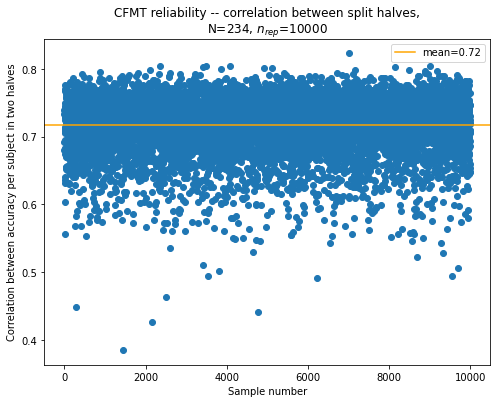

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(cfmt_array_corr, ax)

plt.title(f"CFMT reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.01, 'CFMT reliability -- correlation between split halves,\nN=234, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

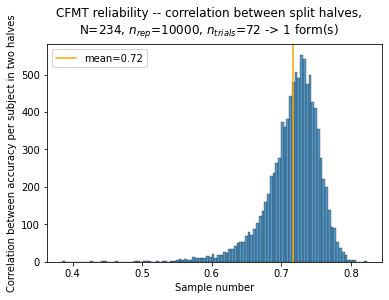

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_array_corr, ax)

plt.suptitle(f"CFMT reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt.userID.value_counts()[0]} -> {df_cfmt.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Australia set

In [29]:
df_cfmt_Aus = pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus-cleaned_data.csv"))
print(f"Running first study with total {df_cfmt_Aus.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_cfmt_Aus.userID.value_counts()[df_cfmt_Aus.userID.value_counts()>72]#.keys()

Running first study with total 94 participants.


Series([], Name: userID, dtype: int64)

In [30]:
# num of subjects
N = len(df_cfmt_Aus.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt_Aus, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT_Aus"] = total_n_trials
# and subjects
n_subj_dict["CFMT_Aus"] = N

# define corr array
cfmt_Aus_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt_Aus.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_Aus_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.41 s per 100
# 30 s (0.5 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 22.74 s which is 0.38 min.


Text(0.5, 1.01, 'CFMT reliability -- correlation between split halves, Australia,\nN=94, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

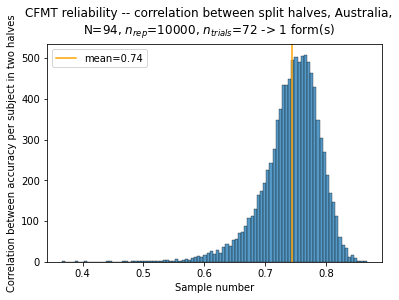

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_Aus_array_corr, ax)

plt.suptitle(f"CFMT reliability -- correlation between split halves, Australia,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_Aus.userID.value_counts()[0]} -> {df_cfmt_Aus.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Female set

In [32]:
df_cfmt_F = pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F-cleaned_data.csv"))
print(f"Running first study with total {df_cfmt_F.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_cfmt_F.userID.value_counts()[df_cfmt_F.userID.value_counts()>72]#.keys()

Running first study with total 85 participants.


Series([], Name: userID, dtype: int64)

In [33]:
# num of subjects
N = len(df_cfmt_F.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt_F, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT_F"] = total_n_trials
# and subjects
n_subj_dict["CFMT_F"] = N

# define corr array
cfmt_F_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt_F.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_F_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.41 s per 100
# 22 s (0.4 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 22.15 s which is 0.37 min.


Text(0.5, 1.01, 'CFMT reliability -- correlation between split halves, Female set,\nN=85, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

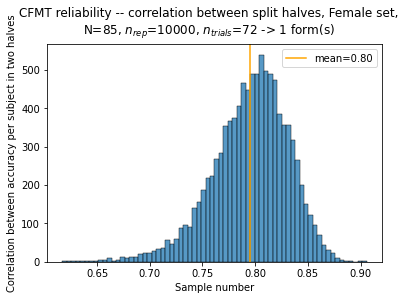

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_F_array_corr, ax)

plt.suptitle(f"CFMT reliability -- correlation between split halves, Female set,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_F.userID.value_counts()[0]} -> {df_cfmt_F.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Australia set - second repetition (Nov 2022)
[top](#top)



In [35]:
df_cfmt_Aus2 = pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus2-cleaned_data.csv"))
print(f"Running first study with total {df_cfmt_Aus2.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_cfmt_Aus2.userID.value_counts()[df_cfmt_Aus2.userID.value_counts()>72]#.keys()

Running first study with total 117 participants.


Series([], Name: userID, dtype: int64)

In [36]:
# num of subjects
N = len(df_cfmt_Aus2.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt_Aus2, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT_Aus2"] = total_n_trials
# and subjects
n_subj_dict["CFMT_Aus2"] = N

# define corr array
cfmt_Aus2_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt_Aus2.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_Aus2_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.41 s per 100
# 30 s (0.5 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 26.03 s which is 0.43 min.


Text(0.5, 1.01, 'CFMT reliability -- correlation between split halves, Australia set 2,\nN=117, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

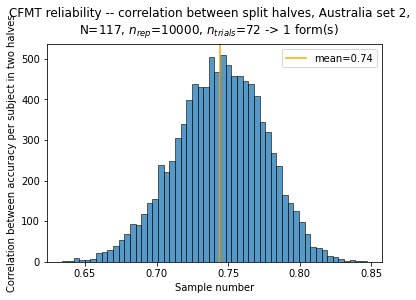

In [37]:

fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_Aus2_array_corr, ax)

plt.suptitle(f"CFMT reliability -- correlation between split halves, Australia set 2,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_Aus2.userID.value_counts()[0]} -> {df_cfmt_Aus2.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus2_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus2_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Female set - second repetition (Nov 2022)
[top](#top)

In [38]:
df_cfmt_F2 = pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_F2-cleaned_data.csv"))
print(f"Running first study with total {df_cfmt_F2.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_cfmt_F2.userID.value_counts()[df_cfmt_F2.userID.value_counts()>72]#.keys()

Running first study with total 110 participants.


Series([], Name: userID, dtype: int64)

In [39]:
# num of subjects
N = len(df_cfmt_F2.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt_F2, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT_F2"] = total_n_trials
# and subjects
n_subj_dict["CFMT_F2"] = N

# define corr array
cfmt_F2_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt_F2.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_F2_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.41 s per 100
# 30 s (0.5 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 26.21 s which is 0.44 min.


Text(0.5, 1.01, 'CFMT reliability -- correlation between split halves, Female set 2,\nN=110, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

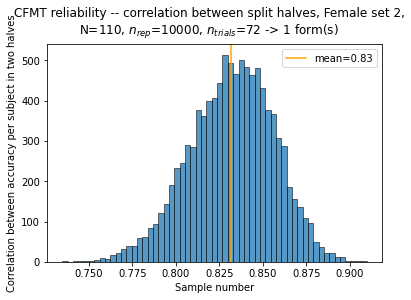

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_F2_array_corr, ax)

plt.suptitle(f"CFMT reliability -- correlation between split halves, Female set 2,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_F2.userID.value_counts()[0]} -> {df_cfmt_F2.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F2_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F2_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

---

### Run it on the tasks separately

In [41]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_cfmt.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_cfmt.sort_values(by=["userID"]).loc[df_cfmt["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    cfmt_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
    
    # save the num_trials
    n_trials_dict[f"CFMT_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CFMT_stage{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_cfmt_first = None
        df_cfmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_cfmt_first, df_cfmt_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        cfmt_array_corr_tasks[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(cfmt_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_trials_all['id'] = df_corr_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 85 s (1.42 min) per 10 000

Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 71.01 s which is 1.18 min.


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, N=234, $n_{rep}$=10000')

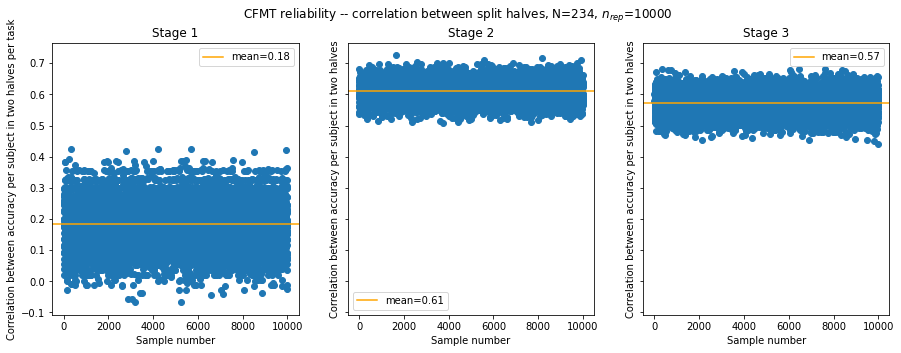

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_scatter(df_corr_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

plt.suptitle(f"CFMT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, N=234, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

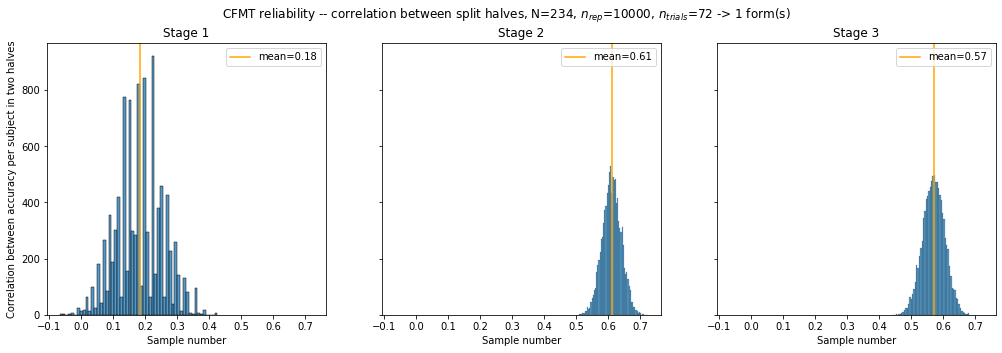

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CFMT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt.userID.value_counts()[0]} -> {df_cfmt.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Australia

In [44]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_cfmt_Aus.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_cfmt_Aus.sort_values(by=["userID"]).loc[df_cfmt_Aus["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    cfmt_Aus_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
    
    # save the num_trials
    n_trials_dict[f"CFMT_Aus_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CFMT_Aus_stage{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_cfmt_first = None
        df_cfmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        cfmt_Aus_array_corr_tasks[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(cfmt_Aus_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_Aus_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_Aus_trials_all['id'] = df_corr_Aus_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 85 s (1.42 min) per 10 000

Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 60.60 s which is 1.01 min.


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, Australia, N=94, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

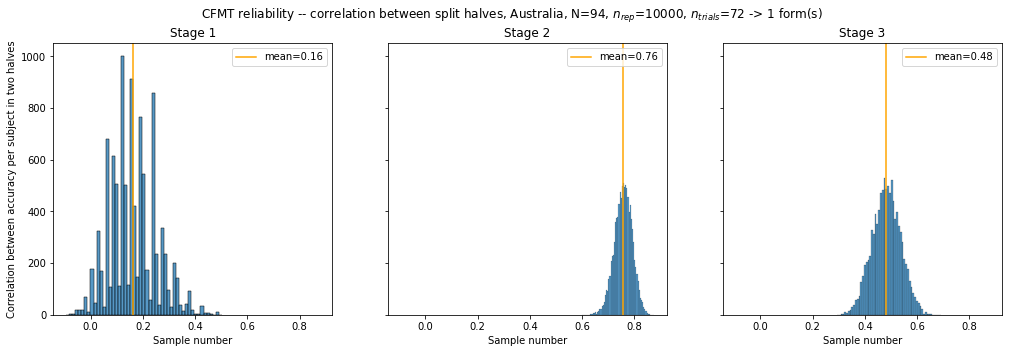

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_Aus_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CFMT reliability -- correlation between split halves, Australia, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_Aus.userID.value_counts()[0]} -> {df_cfmt_Aus.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Female set

In [46]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_cfmt_F.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_cfmt_F.sort_values(by=["userID"]).loc[df_cfmt_F["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    cfmt_F_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
    
    # save the num_trials
    n_trials_dict[f"CFMT_F_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CFMT_F_stage{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_cfmt_first = None
        df_cfmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        cfmt_F_array_corr_tasks[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(cfmt_F_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_F_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_F_trials_all['id'] = df_corr_F_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 85 s (1.42 min) per 10 000

Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 61.16 s which is 1.02 min.


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, Female set, N=85, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

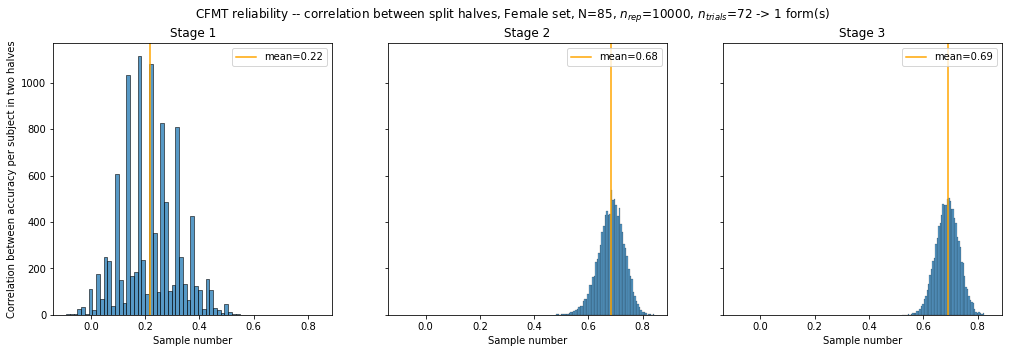

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_F_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CFMT reliability -- correlation between split halves, Female set, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_F.userID.value_counts()[0]} -> {df_cfmt_F.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Australia set - second repetition (Nov 2022)
[top](#top)

In [48]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_cfmt_Aus2.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_cfmt_Aus2.sort_values(by=["userID"]).loc[df_cfmt_Aus2["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    cfmt_Aus2_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
    
    # save the num_trials
    n_trials_dict[f"CFMT_Aus2_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CFMT_Aus2_stage{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_cfmt_first = None
        df_cfmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        cfmt_Aus2_array_corr_tasks[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(cfmt_Aus2_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_Aus2_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_Aus2_trials_all['id'] = df_corr_Aus2_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 85 s (1.42 min) per 10 000

Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 63.10 s which is 1.05 min.


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, Australia set 2, N=117, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

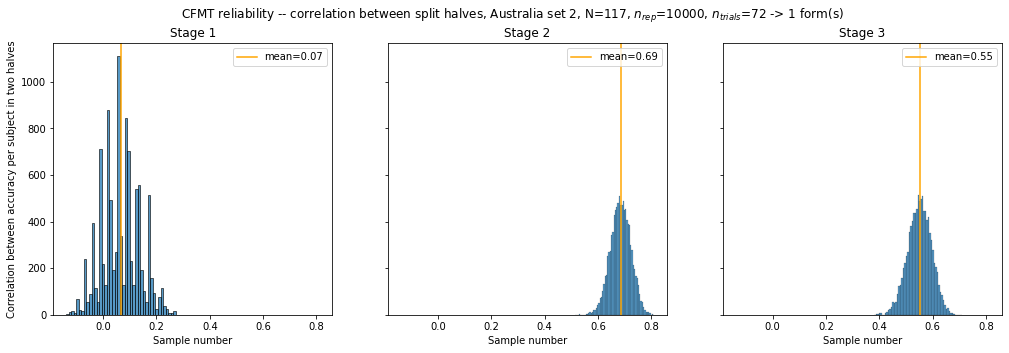

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_Aus2_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CFMT reliability -- correlation between split halves, Australia set 2, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_Aus2.userID.value_counts()[0]} -> {df_cfmt_Aus2.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus2_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_Aus2_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Female set - second repetition (Nov 2022)
[top](#top)

In [50]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_cfmt_F2.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = [18, 30, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_cfmt_F2.sort_values(by=["userID"]).loc[df_cfmt_F2["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    cfmt_F2_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
    
    # save the num_trials
    n_trials_dict[f"CFMT_F2_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CFMT_F2_stage{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_cfmt_first = None
        df_cfmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        cfmt_F2_array_corr_tasks[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(cfmt_F2_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_F2_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_F2_trials_all['id'] = df_corr_F2_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 85 s (1.42 min) per 10 000

Stage: 1
Total number of trials is 18.
Stage: 2
Total number of trials is 30.
Stage: 3
Total number of trials is 24.
Process took: 63.87 s which is 1.06 min.


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, Female set 2, N=110, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

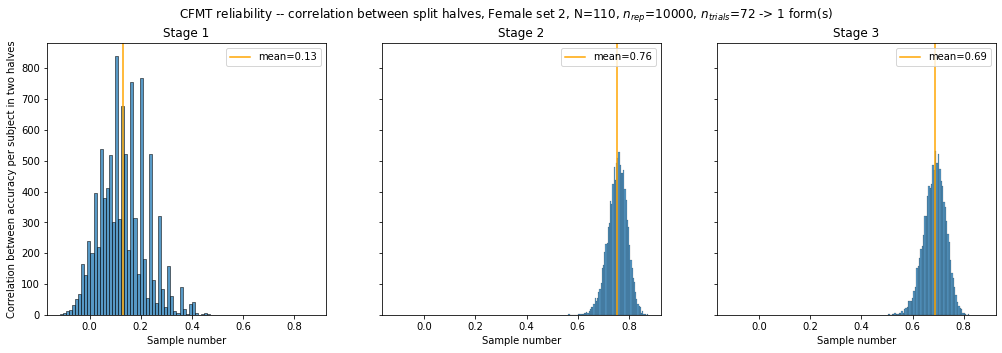

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_F2_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CFMT reliability -- correlation between split halves, Female set 2, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_F2.userID.value_counts()[0]} -> {df_cfmt_F2.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F2_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_F2_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap CFMT score
[top](#top)


In [52]:
shared_participants = list(set(df_cfmt["userID"])&set(df_cfmt_Aus["userID"])&set(df_cfmt_F["userID"])&set(df_cfmt_Aus2["userID"])&set(df_cfmt_F2["userID"]))

print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# concat the two datasets
df_cfmt_concat = pd.concat([
    df_cfmt.loc[df_cfmt["userID"].isin(shared_participants)].copy(),
    df_cfmt_Aus.loc[df_cfmt_Aus["userID"].isin(shared_participants)].copy(),
    df_cfmt_F.loc[df_cfmt_F["userID"].isin(shared_participants)].copy(),
    df_cfmt_Aus2.loc[df_cfmt_Aus2["userID"].isin(shared_participants)].copy(),
    df_cfmt_F2.loc[df_cfmt_F2["userID"].isin(shared_participants)].copy(),
]).reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_cfmt_concat.userID.value_counts()[df_cfmt_concat.userID.value_counts()!=5*n_trials_per_form])#.keys()

# those three have 52 shared

Running all replicate studies with total 58 participants.
Series([], Name: userID, dtype: int64)


In [53]:
# num of subjects
N = len(df_cfmt_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT_concat"] = total_n_trials
# and subjects
n_subj_dict["CFMT_concat"] = N

# define corr array
cfmt_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 5*n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_concat_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.4 s per 100
# 34 s (0.6 min) per 10 000

Total number of trials is 360.
Taking 180 trials.
Process took: 36.54 s which is 0.61 min.


Text(0.5, 1.0, 'CFMT reliability, overall accuracy -- correlation between split halves, concat\nN=58, $n_{rep}$=10000, $n_{trials}$=360 -> 5 form(s)')

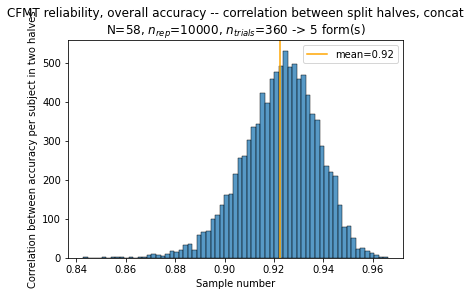

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_concat_array_corr, ax)

plt.title(f"CFMT reliability, overall accuracy -- correlation between split halves, concat\nN={df_cfmt_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_cfmt_concat.userID.value_counts()[0]} -> {df_cfmt_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Separate tasks

In [55]:
task_order = [1, 2, 3]

# num of subjects
N = len(df_cfmt_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 18
# n_trials_stage2 = 30
# n_trials_stage3 = 24
n_trials_stage = 5*np.array([18, 30, 24])

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Stage: {tsk}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_sort = df_cfmt_concat.sort_values(by=["userID"]).loc[df_cfmt_concat["stage"]==tsk, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    cfmt_concat_array_corr_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials == n_trials_stage[tsk-1]//2
    
    # save the num_trials
    n_trials_dict[f"CFMT_concat_stage{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"CFMT_concat_stage{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_cfmt_first = None
        df_cfmt_second = None 

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        cfmt_concat_array_corr_tasks[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(cfmt_concat_array_corr_tasks.T, columns=[f"stage_{tsk}"]))
    
# combine all the df into one    
df_corr_concat_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_concat_trials_all['id'] = df_corr_concat_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.9 s per 100
# 76 s (1.3 min) per 10 000

Stage: 1
Total number of trials is 90.
Stage: 2
Total number of trials is 150.
Stage: 3
Total number of trials is 120.
Process took: 76.07 s which is 1.27 min.


Text(0.5, 0.98, 'CFMT reliability -- correlation between split halves, concat, N=58, $n_{rep}$=10000, $n_{trials}$=360 -> 5 form(s)')

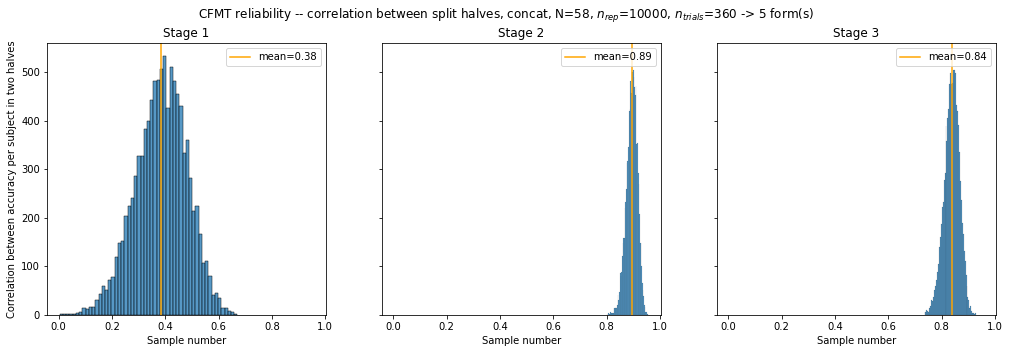

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(task_order, axs.flatten()):
    plot_correlation_hist(df_corr_concat_trials_all[f"stage_{i}"], ax)

axs[0].set_title("Stage 1")
axs[1].set_title("Stage 2")
axs[2].set_title("Stage 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"CFMT reliability -- correlation between split halves, concat, N={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_cfmt_concat.userID.value_counts()[0]} -> {df_cfmt_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_concat_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_concat_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Run overlap CFMT original and first visit of Australia
[top](#top)

for the paper to have reliability of one form

In [57]:
# load participants per each of the 4 forms
aus2 = set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus2-cleaned_data.csv"), usecols=['userID']).userID)
aus = set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT_Aus-cleaned_data.csv"), usecols=['userID']).userID)

# select participants from the second who do not have the first to include them
take_aus2 = set(aus2)-set(aus) # take from aus 2 everyone who does not have aus 1

# get participants who have all data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "CFMT-cleaned_data.csv"), usecols=['userID']).userID)&(aus|aus2)
)
print(f"Running total {len(shared_participants)} participants.")

# load and concat the datasets, condition the loading on the given subjects, see
# https://stackoverflow.com/questions/28239529/conditional-row-read-of-csv-in-pandas
# NOTE -- you have to AND the shared participants and the ones that you want to take from second Aus and F
df_cfmt_orig_aus_concat = pd.concat([
        (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT-cleaned_data.csv'))[lambda x: x['userID'].isin(shared_participants)]),
        (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus2-cleaned_data.csv'))[lambda x: x['userID'].isin(set(shared_participants)&take_aus2)]),
        (pd.read_csv(os.path.join(csv_clean_data_path, 'CFMT_Aus-cleaned_data.csv'))[lambda x: x['userID'].isin(shared_participants)]),
    ])

Running total 138 participants.


In [58]:
# num of subjects
N = len(df_cfmt_orig_aus_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_cfmt_orig_aus_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["CFMT_orig_aus_concat"] = total_n_trials
# and subjects
n_subj_dict["CFMT_orig_aus_concat"] = N

# define corr array
cfmt_orig_aus_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_cfmt_orig_aus_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_cfmt_first = None
    df_cfmt_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_cfmt_first, df_cfmt_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    cfmt_orig_aus_concat_array_corr[i] = df_cfmt_first.groupby('userID').correct.mean().corr(df_cfmt_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.4 s per 100
# 34 s (0.6 min) per 10 000

Total number of trials is 144.
Taking 72 trials.
Process took: 33.37 s which is 0.56 min.


Text(0.5, 1.0, 'CFMT reliability, overall accuracy -- correlation between split halves, concat original and Australia (first visit)\nN=138, $n_{rep}$=10000, $n_{trials}$=144 -> 2 form(s)')

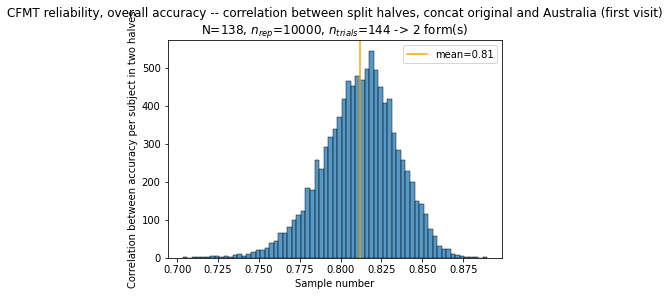

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(cfmt_orig_aus_concat_array_corr, ax)

plt.title(f"CFMT reliability, overall accuracy -- correlation between split halves, concat original and Australia (first visit)\nN={df_cfmt_orig_aus_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_cfmt_orig_aus_concat.userID.value_counts()[0]} -> {df_cfmt_orig_aus_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CFMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [60]:
# save only if we run it
if 'cfmt_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_array_corr,
        "CFMT_stage1" : df_corr_trials_all["stage_1"],
        "CFMT_stage2" : df_corr_trials_all["stage_2"],
        "CFMT_stage3" : df_corr_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability-method-Michal.csv"), index=False)
    print("saved original")

# standalone Australia  
if 'cfmt_Aus_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_Aus_array_corr,
        "CFMT_stage1" : df_corr_Aus_trials_all["stage_1"],
        "CFMT_stage2" : df_corr_Aus_trials_all["stage_2"],
        "CFMT_stage3" : df_corr_Aus_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability_Aus-method-Michal.csv"), index=False)
    print("saved standalone Australia")

# standalone F
if 'cfmt_F_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_F_array_corr,
        "CFMT_stage1" : df_corr_F_trials_all["stage_1"],
        "CFMT_stage2" : df_corr_F_trials_all["stage_2"],
        "CFMT_stage3" : df_corr_F_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability_F-method-Michal.csv"), index=False)
    print("saved standalone Female")
    
# repeated Australia  
if 'cfmt_Aus2_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_Aus2_array_corr,
        "CFMT_stage1" : df_corr_Aus2_trials_all["stage_1"],
        "CFMT_stage2" : df_corr_Aus2_trials_all["stage_2"],
        "CFMT_stage3" : df_corr_Aus2_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability_Aus2-method-Michal.csv"), index=False)
    print("saved repeated Australia (set 2)")

# repeated F
if 'cfmt_F2_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_F2_array_corr,
        "CFMT_stage1" : df_corr_F2_trials_all["stage_1"],
        "CFMT_stage2" : df_corr_F2_trials_all["stage_2"],
        "CFMT_stage3" : df_corr_F2_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability_F2-method-Michal.csv"), index=False)
    print("saved repeated Female (set 2)")
    
# all of them    
if 'cfmt_concat_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_concat_array_corr,
        "CFMT_stage1" : df_corr_concat_trials_all["stage_1"],
        "CFMT_stage2" : df_corr_concat_trials_all["stage_2"],
        "CFMT_stage3" : df_corr_concat_trials_all["stage_3"],
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat")
    
# concatenated original and Australia (for the paper)
if 'cfmt_orig_aus_concat_array_corr' in locals():
    pd.DataFrame({
        "CFMT_overall_correlation" : cfmt_orig_aus_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "CFMT_reliability_concat_orig_Aus-method-Michal.csv"), index=False)
    print("saved concat original and Australia")

saved original
saved standalone Australia
saved standalone Female
saved repeated Australia (set 2)
saved repeated Female (set 2)
saved concat
saved concat original and Australia


In [61]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "", "", "", "tasks-num_trials_concat.csv"]

versions = ['', '_Aus', '_F', '_Aus2', '_F2', '_concat']

# save all of them
for file, ver in zip(files, versions):
    # skip one of the version to not save it twice
    if ver == '_F' or ver.endswith('2'):
        continue
    
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('CFMT').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "CFMT_overall_correlation": [n_trials_dict[f"CFMT{ver}"]],
            "CFMT_stage1": [n_trials_dict[f"CFMT{ver}_stage1"]],
            "CFMT_stage2": [n_trials_dict[f"CFMT{ver}_stage2"]],
            "CFMT_stage3": [n_trials_dict[f"CFMT{ver}_stage3"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [62]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["CFMT_overall_correlation", "CFMT_stage1", "CFMT_stage2", "CFMT_stage3"],
        "num_trials": [n_trials_dict[f"CFMT{ver}"], n_trials_dict[f"CFMT{ver}_stage1"], n_trials_dict[f"CFMT{ver}_stage2"], n_trials_dict[f"CFMT{ver}_stage3"]],
        "reliability_mean": [eval(f"cfmt{ver}_array_corr").mean(), eval(f"df_corr{ver}_trials_all['stage_1']").mean(), eval(f"df_corr{ver}_trials_all['stage_2']").mean(), eval(f"df_corr{ver}_trials_all['stage_3']").mean(), ],
        "reliability_std":  [eval(f"cfmt{ver}_array_corr").std() , eval(f"df_corr{ver}_trials_all['stage_1']").std() , eval(f"df_corr{ver}_trials_all['stage_2']").std() , eval(f"df_corr{ver}_trials_all['stage_3']").std() , ],
        "version": 4*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"CFMT{ver}"], n_subj_dict[f"CFMT{ver}_stage1"], n_subj_dict[f"CFMT{ver}_stage2"], n_subj_dict[f"CFMT{ver}_stage3"]],
    })
    )
    
# add the special version
df_results = df_results.append(
pd.DataFrame({
    "Task": ["CFMT_orig_Aus_overall_correlation"],
    "num_trials": [n_trials_dict["CFMT_orig_aus_concat"]],
    "reliability_mean": [cfmt_orig_aus_concat_array_corr.mean()],
    "reliability_std":  [cfmt_orig_aus_concat_array_corr.std() ],
    "version": ['concat'],
    "num_subjects": [n_subj_dict["CFMT_orig_aus_concat"]],
})
)

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0            CCMT_overall_correlation          72          0.744839   
1                         CCMT_stage1          18          0.430841   
2                         CCMT_stage2          30          0.586765   
3                         CCMT_stage3          24          0.545496   
4            CCMT_overall_correlation          72          0.770198   
5                         CCMT_stage1          18          0.455148   
6                         CCMT_stage2          30          0.602704   
7                         CCMT_stage3          24          0.612113   
8            CCMT_overall_correlation         144          0.855768   
9                         CCMT_stage1          36          0.590158   
10                        CCMT_stage2          60          0.737885   
11                        CCMT_stage3          48          0.716195   
0            CFMT_overall_correlation          72          0.716930   
1                         CFMT_stage1          18          0.182556   
2                         CFMT_stage2          30          0.611524   
3                         CFMT_stage3          24          0.571387   
0            CFMT_overall_correlation          72          0.743374   
1                         CFMT_stage1          18          0.163202   
2                         CFMT_stage2          30          0.757228   
3                         CFMT_stage3          24          0.482903   
0            CFMT_overall_correlation          72          0.795396   
1                         CFMT_stage1          18          0.218883   
2                         CFMT_stage2          30          0.683855   
3                         CFMT_stage3          24          0.689579   
0            CFMT_overall_correlation          72          0.744327   
1                         CFMT_stage1          18          0.066090   
2                         CFMT_stage2          30          0.685120   
3                         CFMT_stage3          24          0.550695   
0            CFMT_overall_correlation          72          0.831916   
1                         CFMT_stage1          18          0.131451   
2                         CFMT_stage2          30          0.755080   
3                         CFMT_stage3          24          0.686881   
0            CFMT_overall_correlation         360          0.922538   
1                         CFMT_stage1          90          0.384471   
2                         CFMT_stage2         150          0.894287   
3                         CFMT_stage3         120          0.838152   
0   CFMT_orig_Aus_overall_correlation         144          0.811771   

    reliability_std version  num_subjects  
0          0.021953     NaN           243  
1          0.038396     NaN           243  
2          0.031072     NaN           243  
3          0.031030     NaN           243  
4          0.024802   stand           160  
5          0.050088   stand           160  
6          0.036428   stand           160  
7          0.035574   stand           160  
8          0.016273  concat           154  
9          0.041303  concat           154  
10         0.026693  concat           154  
11         0.028408  concat           154  
0          0.038077                   234  
1          0.072425                   234  
2          0.029634                   234  
3          0.034180                   234  
0          0.047508     Aus            94  
1          0.088465     Aus            94  
2          0.034136     Aus            94  
3          0.054378     Aus            94  
0          0.036061       F            85  
1          0.106546       F            85  
2          0.047976       F            85  
3          0.041834       F            85  
0          0.031072    Aus2           117  
1          0.071077    Aus2           117  
2          0.038072    Aus2           117  
3          0.044413    Aus2           117  
0          0.024274      F2           110  
1          0.0

----

## Car matching
[top](#top)

### Run split halves car matching
[top](#top)

In [63]:
# define manually num of trials
n_trials_per_form = 40

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

In [64]:
# load only the original data
df_car_matching = pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data.csv"))
print(f"Running first study with total {df_car_matching.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
print(df_car_matching.userID.value_counts()[df_car_matching.userID.value_counts()>n_trials_per_form])#.keys()

Running first study with total 250 participants.
Series([], Name: userID, dtype: int64)


In [65]:
# num of subjects
N = len(df_car_matching.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_car_matching, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
car_matching_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_car_matching.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# save the number of trials
n_trials_dict["car_matching"] = total_n_trials
# and subjects
n_subj_dict["car_matching"] = N

# go over iterations
for i in range(n_repeats):
    df_car_matching_first = None
    df_car_matching_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_car_matching_first, df_car_matching_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    car_matching_array_corr[i] = df_car_matching_first.groupby('userID').correct.mean().corr(df_car_matching_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.36 s per 100
# 32.2 s (0.54 min) per 10 000

Total number of trials is 40.
Taking 20 trials.
Process took: 28.34 s which is 0.47 min.


Text(0.5, 1.0, 'Car matching reliability -- correlation between split halves,\nN=250, $n_{rep}$=10000, $n_{trials}$=40 -> 1 form(s)')

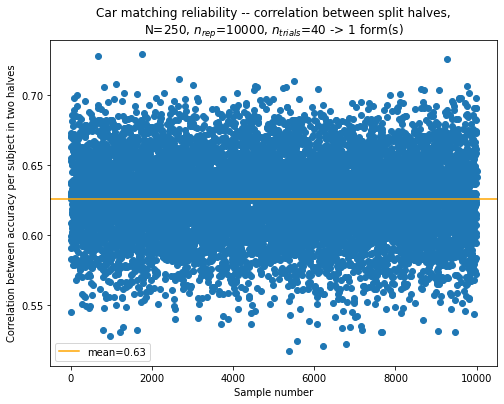

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(car_matching_array_corr, ax)

plt.title(f"Car matching reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
          ", $n_{trials}$"+f"={df_car_matching.userID.value_counts()[0]} -> {df_car_matching.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'Car matching reliability -- correlation between split halves,\nN=250, $n_{rep}$=10000, $n_{trials}$=40 -> 1 form(s)')

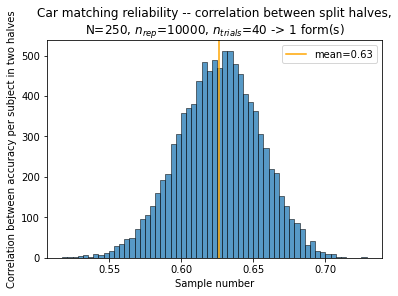

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(car_matching_array_corr, ax)

plt.title(f"Car matching reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
          ", $n_{trials}$"+f"={df_car_matching.userID.value_counts()[0]} -> {df_car_matching.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "car_matching_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "car_matching_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the replication study

In [68]:
# load only the original data
df_car_matching_stand = pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data_rep.csv"))
print(f"Running first study with total {df_car_matching_stand.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
print(df_car_matching_stand.userID.value_counts()[df_car_matching_stand.userID.value_counts()>n_trials_per_form])#.keys()

Running first study with total 175 participants.
Series([], Name: userID, dtype: int64)


In [69]:
# num of subjects
N = len(df_car_matching_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_car_matching_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
car_matching_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_car_matching_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# save the number of trials
n_trials_dict["car_matching_stand"] = total_n_trials
# and subjects
n_subj_dict["car_matching_stand"] = N

# go over iterations
for i in range(n_repeats):
    df_car_matching_first = None
    df_car_matching_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_car_matching_first, df_car_matching_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    car_matching_stand_array_corr[i] = df_car_matching_first.groupby('userID').correct.mean().corr(df_car_matching_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.36 s per 100
# 32.2 s (0.54 min) per 10 000

Total number of trials is 40.
Taking 20 trials.
Process took: 24.61 s which is 0.41 min.


Text(0.5, 1.0, 'Car matching reliability -- correlation between split halves,\nN=175, $n_{rep}$=10000, $n_{trials}$=40 -> 1 form(s)')

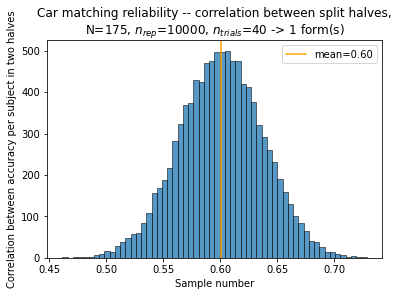

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(car_matching_stand_array_corr, ax)

plt.title(f"Car matching reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
          ", $n_{trials}$"+f"={df_car_matching_stand.userID.value_counts()[0]} -> {df_car_matching_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "car_matching_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "car_matching_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap car matching

In [71]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "car_matching-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_car_matching_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'car_matching-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'car_matching-cleaned_data_rep.csv')),
])

# take only the full data
df_car_matching_concat = df_car_matching_concat[df_car_matching_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# should be empty -- test if people don't have more than 1 entry
print(df_car_matching_concat.userID.value_counts()[df_car_matching_concat.userID.value_counts()>2*n_trials_per_form])#.keys()

Running all replicate studies with total 173 participants.
Series([], Name: userID, dtype: int64)


In [72]:
# num of subjects
N = len(df_car_matching_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_car_matching_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
car_matching_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_car_matching_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# save the number of trials
n_trials_dict["car_matching_concat"] = total_n_trials
# and subjects
n_subj_dict["car_matching_concat"] = N

# go over iterations
for i in range(n_repeats):
    df_car_matching_first = None
    df_car_matching_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_car_matching_first, df_car_matching_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    car_matching_concat_array_corr[i] = df_car_matching_first.groupby('userID').correct.mean().corr(df_car_matching_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.36 s per 100
# 32.2 s (0.54 min) per 10 000

Total number of trials is 80.
Taking 40 trials.
Process took: 30.97 s which is 0.52 min.


Text(0.5, 1.0, 'Car matching reliability -- correlation between split halves,\nN=173, $n_{rep}$=10000, $n_{trials}$=80 -> 2 form(s)')

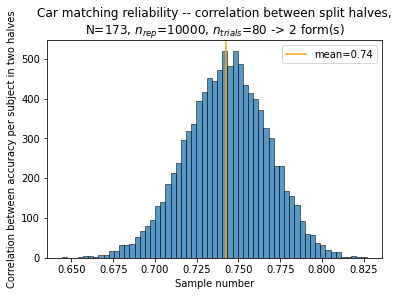

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(car_matching_concat_array_corr, ax)

plt.title(f"Car matching reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
          ", $n_{trials}$"+f"={df_car_matching_concat.userID.value_counts()[0]} -> {df_car_matching_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "car_matching_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "car_matching_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [74]:
if 'car_matching_array_corr' in locals():
    pd.DataFrame({
        "car_matching_overall_correlation" : car_matching_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "car_matching_reliability-method-Michal.csv"), index=False)
    print("saving original")

if 'car_matching_stand_array_corr' in locals():
    pd.DataFrame({
        "car_matching_overall_correlation" : car_matching_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "car_matching_reliability_stand-method-Michal.csv"), index=False)
    print("saving standalone")
    
if 'car_matching_concat_array_corr' in locals():
    pd.DataFrame({
        "car_matching_overall_correlation" : car_matching_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "car_matching_reliability_concat-method-Michal.csv"), index=False)
    print("saving concat")

saving original
saving standalone
saving concat


In [75]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('car_matching').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "car_matching_overall_correlation": [n_trials_dict[f"car_matching{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False, mode='a', header=False) 
        
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [76]:
file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["car_matching_overall_correlation"],
        "num_trials": [n_trials_dict[f"car_matching{ver}"]],
        "reliability_mean": eval(f"car_matching{ver}_array_corr").mean(),
        "reliability_std": eval(f"car_matching{ver}_array_corr").std(),
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"car_matching{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0            CCMT_overall_correlation          72          0.744839   
1                         CCMT_stage1          18          0.430841   
2                         CCMT_stage2          30          0.586765   
3                         CCMT_stage3          24          0.545496   
4            CCMT_overall_correlation          72          0.770198   
5                         CCMT_stage1          18          0.455148   
6                         CCMT_stage2          30          0.602704   
7                         CCMT_stage3          24          0.612113   
8            CCMT_overall_correlation         144          0.855768   
9                         CCMT_stage1          36          0.590158   
10                        CCMT_stage2          60          0.737885   
11                        CCMT_stage3          48          0.716195   
12           CFMT_overall_correlation          72          0.716930   
13                        CFMT_stage1          18          0.182556   
14                        CFMT_stage2          30          0.611524   
15                        CFMT_stage3          24          0.571387   
16           CFMT_overall_correlation          72          0.743374   
17                        CFMT_stage1          18          0.163202   
18                        CFMT_stage2          30          0.757228   
19                        CFMT_stage3          24          0.482903   
20           CFMT_overall_correlation          72          0.795396   
21                        CFMT_stage1          18          0.218883   
22                        CFMT_stage2          30          0.683855   
23                        CFMT_stage3          24          0.689579   
24           CFMT_overall_correlation          72          0.744327   
25                        CFMT_stage1          18          0.066090   
26                        CFMT_stage2          30          0.685120   
27                        CFMT_stage3          24          0.550695   
28           CFMT_overall_correlation          72          0.831916   
29                        CFMT_stage1          18          0.131451   
30                        CFMT_stage2          30          0.755080   
31                        CFMT_stage3          24          0.686881   
32           CFMT_overall_correlation         360          0.922538   
33                        CFMT_stage1          90          0.384471   
34                        CFMT_stage2         150          0.894287   
35                        CFMT_stage3         120          0.838152   
36  CFMT_orig_Aus_overall_correlation         144          0.811771   
0    car_matching_overall_correlation          40          0.626034   
0    car_matching_overall_correlation          40          0.600597   
0    car_matching_overall_correlation          80          0.742801   

    reliability_std version  num_subjects  
0          0.021953     NaN           243  
1          0.038396     NaN           243  
2          0.031072     NaN           243  
3          0.031030     NaN           243  
4          0.024802   stand           160  
5          0.050088   stand           160  
6          0.036428   stand           160  
7          0.035574   stand           160  
8          0.016273  concat           154  
9          0.041303  concat           154  
10         0.026693  concat           154  
11         0.028408  concat           154  
12         0.038077     NaN           234  
13         0.072425     NaN           234  
14         0.029634     NaN           234  
15         0.034180     NaN           234  
16         0.047508     Aus            94  
17         0.088465     Aus            94  
18         0.034136     Aus            94  
19         0.054378     Aus            94  
20         0.036061       F            85  
21         0.106546       F            85  
22         0.047976       F            85  
23         0.041834       F            85  
24         0.031072  

## Emotion matching
[top](#top)

### Run split halves Emotion matching
[top](#top)

In [77]:
# define manually num of trials
n_trials_per_form = 65

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original set

In [78]:
df_emotion_matching = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching-cleaned_data.csv"))
df_emotion_matching["correct"] = df_emotion_matching["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()>65]#.keys()

Series([], Name: userID, dtype: int64)

In [79]:
df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()<65]

Series([], Name: userID, dtype: int64)

In [80]:
# num of subjects
N = len(df_emotion_matching.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_matching, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["emotion_matching"] = total_n_trials
# and subjects
n_subj_dict["emotion_matching"] = N

# define corr array
emotion_matching_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_emotion_matching.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_emotion_matching_first = None
    df_emotion_matching_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotion_matching_first, df_emotion_matching_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotion_matching_array_corr[i] = df_emotion_matching_first.groupby('userID').correct.mean().corr(df_emotion_matching_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.38 s per 100
# 36 s (0.6 min) per 10 000

Total number of trials is 65.
Taking 32 trials.
Process took: 34.66 s which is 0.58 min.


Text(0.5, 1.0, 'Emotion matching reliability -- correlation between split halves,\nN=249, $n_{rep}$=10000')

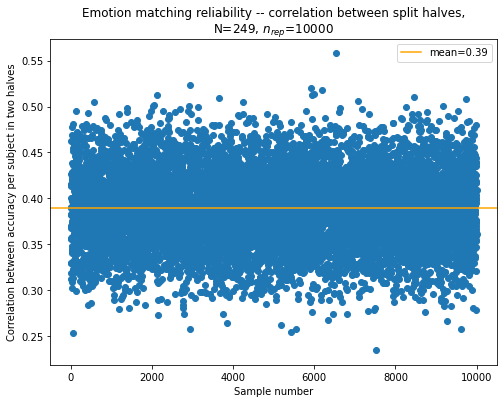

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(emotion_matching_array_corr, ax)

plt.title(f"Emotion matching reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'Emotion matching reliability -- correlation between split halves,\nN=249, $n_{rep}$=10000, $n_{trials}$=65 -> 1 form(s)')

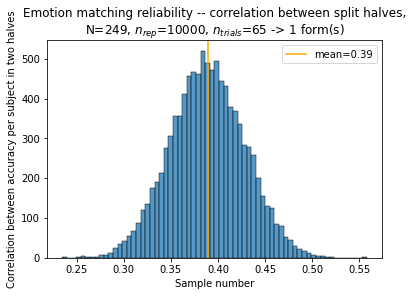

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotion_matching_array_corr, ax)

plt.title(f"Emotion matching reliability -- correlation between split halves,\nN={df_emotion_matching.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_emotion_matching.userID.value_counts()[0]} -> {df_emotion_matching.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second set separately
[top](#top)

In [83]:
df_emotion_matching_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching_rep-cleaned_data.csv"))
df_emotion_matching_stand["correct"] = df_emotion_matching_stand["correct"].astype(float)

In [84]:
# should be empty -- test if people don't have more than 1 entry
print(df_emotion_matching_stand.userID.value_counts()[df_emotion_matching_stand.userID.value_counts()>100])#.keys()
print(df_emotion_matching_stand.userID.value_counts()[df_emotion_matching_stand.userID.value_counts()<100])

Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [85]:
# num of subjects
N = len(df_emotion_matching_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_matching_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["emotion_matching_stand"] = total_n_trials
# and subjects
n_subj_dict["emotion_matching_stand"] = N

# define corr array
emotion_matching_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_emotion_matching_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_emotion_matching_first = None
    df_emotion_matching_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotion_matching_first, df_emotion_matching_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotion_matching_stand_array_corr[i] = df_emotion_matching_first.groupby('userID').correct.mean().corr(df_emotion_matching_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.38 s per 100
# 25.84 s (0.43 min) per 10 000

Total number of trials is 100.
Taking 50 trials.
Process took: 31.73 s which is 0.53 min.


Text(0.5, 1.0, 'Emotion matching reliability -- correlation between split halves, standalone,\nN=163, $n_{rep}$=10000, $n_{trials}$=100 -> 1 form(s)')

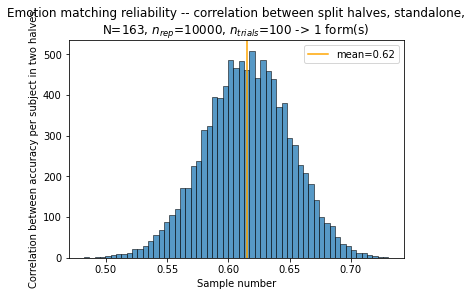

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotion_matching_stand_array_corr, ax)

plt.title(f"Emotion matching reliability -- correlation between split halves, standalone,\nN={df_emotion_matching_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_emotion_matching_stand.userID.value_counts()[0]} -> {df_emotion_matching_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_stand_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_stand_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap emotion matching
[top](#top)

In [87]:
# get names of stimulu
df_emotion_matching_stand["face1"] = df_emotion_matching_stand["face1"].str.split('/').str[-1]
df_emotion_matching_stand["face2"] = df_emotion_matching_stand["face2"].str.split('/').str[-1]
df_emotion_matching_stand["face3"] = df_emotion_matching_stand["face3"].str.split('/').str[-1]

In [88]:
# to be able to take the old trials only, here, I create a new variable "test" which is a combination of the 3 stimuli
# which uniquely determine a trial. Since the assignment of the stimuli to a column is random, we can simply compare.
# Therefore, I first combine the three cols, then sort values within this and convert it into a string. Using this
# string and userID, I then merge the two datasets --> that means that there are only the shared participants together
# with the overlapping trials


df_emotion_matching_stand["test"] = np.sort(df_emotion_matching_stand[["face1", "face2", "face3"]].values,axis=1).tolist()
df_emotion_matching["test"] = np.sort(df_emotion_matching[["face1", "face2", "face3"]].values,axis=1).tolist()

df_emotion_matching["test"]=df_emotion_matching["test"].apply(lambda x: ','.join(map(str, x)))
df_emotion_matching_stand["test"]=df_emotion_matching_stand["test"].apply(lambda x: ','.join(map(str, x)))

df_emotion_matching_stand

observation userID         face1         face2         face3  correct  \
0           c681b  s_100  BM21SUHL.JPG  AM16SUHR.JPG  AM19HAHR.JPG      1.0   
1           c681b  s_100  BF29DIHR.JPG  AF30ANHL.JPG  AF19ANHL.JPG      1.0   
2           c681b  s_100  AM10SAHR.JPG  AM11AFHL.JPG  AM16SAHR.JPG      1.0   
3           c681b  s_100  AF31ANHL.JPG  AF07ANHL.JPG  AF15HAHL.JPG      1.0   
4           c681b  s_100  AM13HAHL.JPG  AM05ANHL.JPG  AM22ANHL.JPG      1.0   
...           ...    ...           ...           ...           ...      ...   
16295       f62a6   s_99  AF22SUHR.JPG  AF03HAHR.JPG  AF04SUHL.JPG      0.0   
16296       f62a6   s_99   AM20DIS.JPG   AM13ANS.JPG   AM05DIS.JPG      0.0   
16297       f62a6   s_99  AF34SAHL.JPG  AF33AFHL.JPG  BF26AFHR.JPG      1.0   
16298       f62a6   s_99  AF09AFHL.JPG  AF14SAHL.JPG  AF13SAHR.JPG      0.0   
16299       f62a6   s_99  AM06HAHL.JPG  AM27SUHR.JPG  AM12HAHL.JPG      1.0   

             RT                                    test  
0      2462.431  AM16SUHR.JPG,AM19HAHR.JPG,BM21SUHL.JPG  
1      3488.989  AF19ANHL.JPG,AF30ANHL.JPG,BF29DIHR.JPG  
2      2460.983  AM10SAHR.JPG,AM11AFHL.JPG,AM16SAHR.JPG  
3      1952.217  AF07ANHL.JPG,AF15HAHL.JPG,AF31ANHL.JPG  
4      1515.264  AM05ANHL.JPG,AM13HAHL.JPG,AM22ANHL.JPG  
...         ...                                     ...  
16295  2344.703  AF03HAHR.JPG,AF04SUHL.JPG,AF22SUHR.JPG  
16296  2542.382     AM05DIS.JPG,AM13ANS.JPG,AM20DIS.JPG  
16297  2621.395  AF33AFHL.JPG,AF34SAHL.JPG,BF26AFHR.JPG  
16298  2367.911  AF09AFHL.JPG,AF13SAHR.JPG,AF14SAHL.JPG  
16299  1956.293  AM06HAHL.JPG,AM12HAHL.JPG,AM27SUHR.JPG  

[16300 rows x 8 columns]

In [89]:
# merge the two dataframes to only take the intersection -- takes care of both userID and the shared target
df_merged = df_emotion_matching.merge(df_emotion_matching_stand, on=["userID", "test"])

# split it and make it into a long format, back, rename cols to be the same again
df_concat = pd.concat([
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_x') or x=='userID']].rename(columns = lambda x: x.strip('_x')),
    df_merged.loc[:,[x for x in df_merged.columns if x.endswith('_y') or x=='userID']].rename(columns = lambda x: x.strip('_y')),
])

df_concat

observation userID         face1         face2         face3  correct  \
0          00762  s_100  AF15HAHL.JPG  AF31ANHL.JPG  AF07ANHL.JPG      0.0   
1          00762  s_100  BM18DIHR.JPG  AM03ANHL.JPG  BM21DIHR.JPG      1.0   
2          00762  s_100  AF28SUHR.JPG  AF05AFHR.JPG  AF32SUHL.JPG      1.0   
3          00762  s_100  BM04DIHR.JPG  AM28DIHR.JPG  AM03SAHR.JPG      0.0   
4          00762  s_100   AM33HAS.JPG   BM32ANS.JPG   BM25ANS.JPG      0.0   
...          ...    ...           ...           ...           ...      ...   
9816       f62a6   s_99  AF16DIHR.JPG  AF01DIHR.JPG  AF06ANHL.JPG      0.0   
9817       f62a6   s_99  AF15ANHL.JPG  AF23ANHL.JPG  AF13HAHR.JPG      1.0   
9818       f62a6   s_99   BF26ANS.JPG   AF05ANS.JPG   AF12DIS.JPG      1.0   
9819       f62a6   s_99  AF34SAHL.JPG  AF33AFHL.JPG  BF26AFHR.JPG      1.0   
9820       f62a6   s_99  AF31ANHL.JPG  AF07ANHL.JPG  AF15HAHL.JPG      1.0   

            RT  
0     1998.576  
1     1634.813  
2     1267.278  
3     4018.900  
4     1719.667  
...        ...  
9816  2202.765  
9817  1804.134  
9818   254.262  
9819  2621.395  
9820  2205.054  

[19642 rows x 7 columns]

In [90]:
set(df_emotion_matching["test"])-set(df_merged["test"])

{'AF08ANHL.JPG,AF23DIHL.JPG,AF29ANHL.JPG',
 'AF09SUHL.JPG,AF16AFHL.JPG,BF19AFHL.JPG',
 'AF23HAHR.JPG,BF17HAHR.JPG,BF26SUHR.JPG',
 'AM07SUHR.JPG,AM08HAHL.JPG,AM11HAHL.JPG'}

In [91]:
set(df_emotion_matching_stand["test"])-set(df_merged["test"])

{'AF01AFHL.JPG,AF19SUHR.JPG,AF24AFHR.JPG',
 'AF01ANHR.JPG,AF03DIHR.JPG,AF04DIHL.JPG',
 'AF02AFHL.JPG,AF18SUHL.JPG,AF35SUHR.JPG',
 'AF03HAHR.JPG,AF04SUHL.JPG,AF22SUHR.JPG',
 'AF03HAS.JPG,AF35ANS.JPG,BF06ANS.JPG',
 'AF03SAS.JPG,AF16AFS.JPG,AF29SAS.JPG',
 'AF05SAHL.JPG,AF14DIHR.JPG,BF15DIHL.JPG',
 'AF07SAHL.JPG,AF08DIHR.JPG,AF13DIHR.JPG',
 'AF08AFS.JPG,AF11SUS.JPG,AF17AFS.JPG',
 'AF09AFHL.JPG,AF13SAHR.JPG,AF14SAHL.JPG',
 'AF12HAHR.JPG,AF13ANHR.JPG,AF33ANHL.JPG',
 'AF12HAHR.JPG,BF34ANHL.JPG,BF35HAHL.JPG',
 'AF12SAS.JPG,AF14SAS.JPG,BF20DIS.JPG',
 'AF15SAHL.JPG,AF17SAHR.JPG,AF22DIHL.JPG',
 'AF20SAS.JPG,AF34DIS.JPG,BF25SAS.JPG',
 'AF21ANS.JPG,BF07DIS.JPG,BF29DIS.JPG',
 'AM01AFHR.JPG,BM08SAHR.JPG,BM23SAHL.JPG',
 'AM01DIHL.JPG,AM06SAHR.JPG,AM24SAHR.JPG',
 'AM01HAHL.JPG,AM07SUHR.JPG,AM08HAHL.JPG',
 'AM01HAS.JPG,AM03SUS.JPG,AM19HAS.JPG',
 'AM01SUHR.JPG,AM09SUHL.JPG,AM18HAHL.JPG',
 'AM01SUS.JPG,AM14AFS.JPG,BM34AFS.JPG',
 'AM02SAHL.JPG,AM30DIHL.JPG,BM34DIHR.JPG',
 'AM04AFHR.JPG,AM06AFHL.JPG,BM18SAH

In [92]:
df_merged.userID.value_counts()

s_255    61
s_253    61
s_55     61
s_86     61
s_129    61
         ..
s_187    61
s_3      61
s_206    61
s_239    61
s_223    61
Name: userID, Length: 161, dtype: int64

In [93]:
df_concat.userID.value_counts()

s_255    122
s_106    122
s_126    122
s_127    122
s_132    122
        ... 
s_86     122
s_129    122
s_197    122
s_53     122
s_223    122
Name: userID, Length: 161, dtype: int64

In [94]:
# num of subjects
N = len(df_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["emotion_matching_concat"] = total_n_trials
# and subjects
n_subj_dict["emotion_matching_concat"] = N

# define corr array
emotion_matching_concat_array_corr = np.zeros(n_repeats)
   
# define the df
df_sort = df_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*61

# go over iterations
for i in range(n_repeats):
    df_emotion_labelling_first = None
    df_emotion_labelling_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotion_labelling_first, df_emotion_labelling_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotion_matching_concat_array_corr[i] = df_emotion_labelling_first.groupby('userID').correct.mean().corr(df_emotion_labelling_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.34 s per 100
# 40.9 s (0.68 min) per 10 000

Total number of trials is 122.
Taking 61 trials.
Process took: 34.81 s which is 0.58 min.


Text(0.5, 1.0, 'Emotion matching reliability -- correlation between split halves, concat,\nN=161, $n_{rep}$=10000, $n_{trials}$=122 -> 1 form(s)')

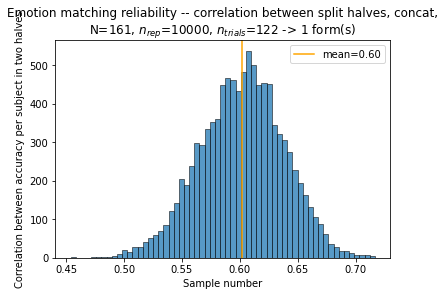

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotion_matching_concat_array_corr, ax)

plt.title(f"Emotion matching reliability -- correlation between split halves, concat,\nN={df_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_concat.userID.value_counts()[0]} -> {df_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_concat_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_concat_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [96]:
# save only if it was run
if 'emotion_matching_array_corr' in locals():
    pd.DataFrame({
        "emotion_matching_overall_correlation" : emotion_matching_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "emotion_matching_reliability-method-Michal.csv"), index=False)
    print("saved emotion_matching_array_corr")

if 'emotion_matching_stand_array_corr' in locals():
    pd.DataFrame({
        "emotion_matching_overall_correlation" : emotion_matching_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "emotion_matching_reliability_standalone-method-Michal.csv"), index=False)
    print("saved emotion_matching_stand_array_corr")

if 'emotion_matching_concat_array_corr' in locals():
    # save the overlap
    pd.DataFrame({
        "emotion_matching_overall_correlation" : emotion_matching_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "emotion_matching_reliability_concat-method-Michal.csv"), index=False)
    print("saved emotion_matching_rep_array_corr")

saved emotion_matching_array_corr
saved emotion_matching_stand_array_corr
saved emotion_matching_rep_array_corr


In [97]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('emotion_matching').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "emotion_matching_overall_correlation": [n_trials_dict[f"emotion_matching{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [98]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["emotion_matching_overall_correlation"],
        "num_trials": [n_trials_dict[f"emotion_matching{ver}"]],
        "reliability_mean": [eval(f"emotion_matching{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"emotion_matching{ver}_array_corr").std() ],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"emotion_matching{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0               CCMT_overall_correlation          72          0.744839   
1                            CCMT_stage1          18          0.430841   
2                            CCMT_stage2          30          0.586765   
3                            CCMT_stage3          24          0.545496   
4               CCMT_overall_correlation          72          0.770198   
5                            CCMT_stage1          18          0.455148   
6                            CCMT_stage2          30          0.602704   
7                            CCMT_stage3          24          0.612113   
8               CCMT_overall_correlation         144          0.855768   
9                            CCMT_stage1          36          0.590158   
10                           CCMT_stage2          60          0.737885   
11                           CCMT_stage3          48          0.716195   
12              CFMT_overall_correlation          72          0.716930   
13                           CFMT_stage1          18          0.182556   
14                           CFMT_stage2          30          0.611524   
15                           CFMT_stage3          24          0.571387   
16              CFMT_overall_correlation          72          0.743374   
17                           CFMT_stage1          18          0.163202   
18                           CFMT_stage2          30          0.757228   
19                           CFMT_stage3          24          0.482903   
20              CFMT_overall_correlation          72          0.795396   
21                           CFMT_stage1          18          0.218883   
22                           CFMT_stage2          30          0.683855   
23                           CFMT_stage3          24          0.689579   
24              CFMT_overall_correlation          72          0.744327   
25                           CFMT_stage1          18          0.066090   
26                           CFMT_stage2          30          0.685120   
27                           CFMT_stage3          24          0.550695   
28              CFMT_overall_correlation          72          0.831916   
29                           CFMT_stage1          18          0.131451   
30                           CFMT_stage2          30          0.755080   
31                           CFMT_stage3          24          0.686881   
32              CFMT_overall_correlation         360          0.922538   
33                           CFMT_stage1          90          0.384471   
34                           CFMT_stage2         150          0.894287   
35                           CFMT_stage3         120          0.838152   
36     CFMT_orig_Aus_overall_correlation         144          0.811771   
37      car_matching_overall_correlation          40          0.626034   
38      car_matching_overall_correlation          40          0.600597   
39      car_matching_overall_correlation          80          0.742801   
0   emotion_matching_overall_correlation          65          0.388882   
0   emotion_matching_overall_correlation         100          0.615417   
0   emotion_matching_overall_correlation         122          0.601679   

    reliability_std version  num_subjects  
0          0.021953     NaN           243  
1          0.038396     NaN           243  
2          0.031072     NaN           243  
3          0.031030     NaN           243  
4          0.024802   stand           160  
5          0.050088   stand           160  
6          0.036428   stand           160  
7          0.035574   stand           160  
8          0.016273  concat           154  
9          0.041303  concat           154  
10         0.026693  concat           154  
11         0.028408  concat           154  
12         0.038077     NaN           234  
13         0.072425     NaN           234  
14         0.029634     NaN           234  
15         0.034180     NaN           234  
16         0.047508     Aus    

## Emotion labelling
[top](#top)

### Run split halves Emotion labelling
[top](#top)

In [99]:
# define manually num of trials
n_trials_per_form = 48

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original set

In [100]:
df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()>48]#.keys()

Series([], Name: userID, dtype: int64)

In [101]:
df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()<48]

Series([], Name: userID, dtype: int64)

In [102]:
# num of subjects
N = len(df_emotion_labelling.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_labelling, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["emotion_labelling"] = total_n_trials
# and subjects
n_subj_dict["emotion_labelling"] = N

# define corr array
emotion_labelling_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_emotion_labelling.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 48

# go over iterations
for i in range(n_repeats):
    df_emotion_labelling_first = None
    df_emotion_labelling_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotion_labelling_first, df_emotion_labelling_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotion_labelling_array_corr[i] = df_emotion_labelling_first.groupby('userID').correct.mean().corr(df_emotion_labelling_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.34 s per 100
# 31 s (0.52 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 30.29 s which is 0.50 min.


Text(0.5, 1.0, 'Emotion labelling reliability -- correlation between split halves,\nN=242, $n_{rep}$=10000')

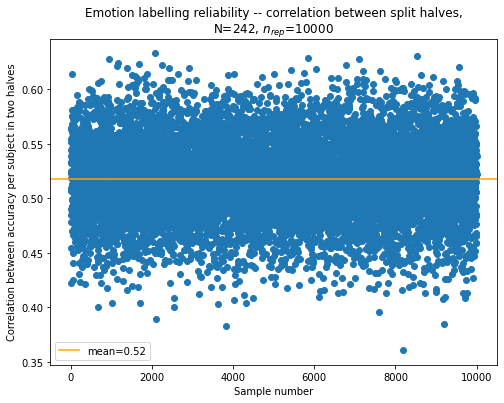

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(emotion_labelling_array_corr, ax)

plt.title(f"Emotion labelling reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "CCMT_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'Emotion labelling reliability -- correlation between split halves,\nN=242, $n_{rep}$=10000, $n_{trials}$=48 -> 1 form(s)')

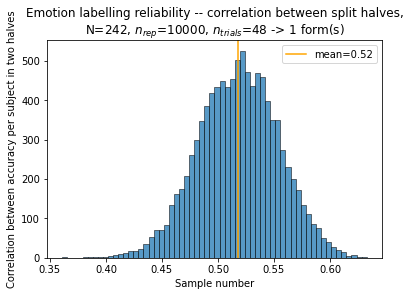

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotion_labelling_array_corr, ax)

plt.title(f"Emotion labelling reliability -- correlation between split halves,\nN={df_emotion_labelling.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_emotion_labelling.userID.value_counts()[0]} -> {df_emotion_labelling.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "emotion_labelling_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_labelling_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second set separately
[top](#top)

In [105]:
df_emotion_labelling_stand = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling_rep-cleaned_data.csv"))
df_emotion_labelling_stand["correct"] = df_emotion_labelling_stand["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()>100])#.keys()
print(df_emotion_labelling_stand.userID.value_counts()[df_emotion_labelling_stand.userID.value_counts()<100])

Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [106]:
# num of subjects
N = len(df_emotion_labelling_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotion_labelling_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["emotion_labelling_stand"] = total_n_trials
# and subjects
n_subj_dict["emotion_labelling_stand"] = N

# define corr array
emotion_labelling_stand_array_corr = np.zeros(n_repeats)
   
# define the df
df_sort = df_emotion_labelling_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 100

# go over iterations
for i in range(n_repeats):
    df_emotion_labelling_first = None
    df_emotion_labelling_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotion_labelling_first, df_emotion_labelling_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotion_labelling_stand_array_corr[i] = df_emotion_labelling_first.groupby('userID').correct.mean().corr(df_emotion_labelling_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.34 s per 100
# 27 s (0.4 min) per 10 000

Total number of trials is 100.
Taking 50 trials.
Process took: 35.82 s which is 0.60 min.


Text(0.5, 1.0, 'Emotion labelling reliability -- correlation between split halves, standalone,\nN=172, $n_{rep}$=10000, $n_{trials}$=100 -> 2 form(s)')

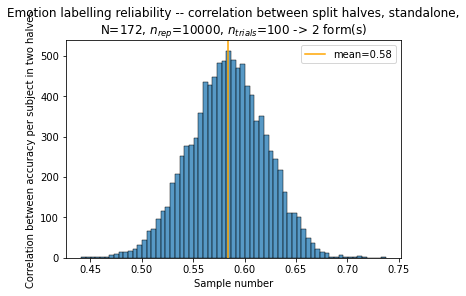

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotion_labelling_stand_array_corr, ax)

plt.title(f"Emotion labelling reliability -- correlation between split halves, standalone,\nN={df_emotion_labelling_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_emotion_labelling_stand.userID.value_counts()[0]} -> {df_emotion_labelling_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "emotion_labelling_stand_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_labelling_stand_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap emotion labelling
[top](#top)

In [108]:
df_emotion_labelling_stand["target"] = df_emotion_labelling_stand["target"].str.split('/').str[-1]

# get participants who have both data
shared_participants = list(set(df_emotion_labelling['userID'])&set(df_emotion_labelling_stand['userID']))

# get target set of original stimuli
target_set = df_emotion_labelling.target.unique()

shared_target = list(set(df_emotion_labelling['target'])&set(df_emotion_labelling_stand['target']))
print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

Running all replicate studies with total 166 participants and 45 stimuli.


In [109]:
df_emotion_labelling.loc[df_emotion_labelling["userID"].isin(shared_participants)].userID.value_counts()

s_255    48
s_14     48
s_153    48
s_227    48
s_166    48
         ..
s_67     48
s_29     48
s_20     48
s_187    48
s_223    48
Name: userID, Length: 166, dtype: int64

In [110]:
df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(target_set))&\
                                   (df_emotion_labelling_stand["userID"].isin(shared_participants))].userID.value_counts()

s_255    45
s_14     45
s_153    45
s_227    45
s_166    45
         ..
s_67     45
s_29     45
s_20     45
s_187    45
s_223    45
Name: userID, Length: 166, dtype: int64

In [111]:
set(target_set)-set(df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(target_set))&\
                                   (df_emotion_labelling_stand["userID"].isin(shared_participants))].target)

{'AF07AFHL.JPG', 'AM12SUHL.JPG', 'AM17AFHL.JPG'}

In [112]:
# concat the two datasets
df_concat = pd.concat([
    df_emotion_labelling_stand.loc[(df_emotion_labelling_stand["target"].isin(shared_target))&\
                                   (df_emotion_labelling_stand["userID"].isin(shared_participants))].copy(),
    df_emotion_labelling.loc[(df_emotion_labelling["target"].isin(shared_target))&\
                             (df_emotion_labelling["userID"].isin(shared_participants))].copy()
])

In [113]:
# num of subjects
N = len(df_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["emotion_labelling_concat"] = total_n_trials
# and subjects
n_subj_dict["emotion_labelling_concat"] = N

# define corr array
emotion_labelling_concat_array_corr = np.zeros(n_repeats)
   
# define the df
df_sort = df_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*45

# go over iterations
for i in range(n_repeats):
    df_emotion_labelling_first = None
    df_emotion_labelling_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotion_labelling_first, df_emotion_labelling_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotion_labelling_concat_array_corr[i] = df_emotion_labelling_first.groupby('userID').correct.mean().corr(df_emotion_labelling_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.34 s per 100
# 29 s (0.4 min) per 10 000

Total number of trials is 90.
Taking 45 trials.
Process took: 32.12 s which is 0.54 min.


Text(0.5, 1.0, 'Emotion labelling reliability -- correlation between split halves, concat,\nN=166, $n_{rep}$=10000, $n_{trials}$=90 -> 1 form(s)')

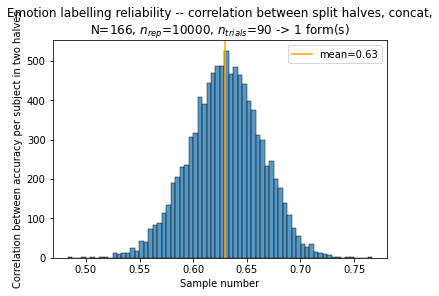

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotion_labelling_concat_array_corr, ax)

plt.title(f"Emotion labelling reliability -- correlation between split halves, concat,\nN={df_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_concat.userID.value_counts()[0]} -> {df_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")

# plt.savefig(os.path.join(path_results, "figures", "emotion_labelling_concat_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_labelling_concat_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save

In [115]:
# check if the variables exist and if yes, save them

if 'emotion_labelling_array_corr' in locals():
    pd.DataFrame({
        "emotion_labelling_overall_correlation" : emotion_labelling_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "emotion_labelling_reliability-method-Michal.csv"), index=False)
    print("saved emotion_labelling_array_corr")

if 'emotion_labelling_stand_array_corr' in locals():
    pd.DataFrame({
        "emotion_labelling_overall_correlation" : emotion_labelling_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "emotion_labelling_reliability_standalone-method-Michal.csv"), index=False)
    print("saved emotion_labelling_stand_array_corr")

if 'emotion_labelling_concat_array_corr' in locals():
    # save the overlap
    pd.DataFrame({
        "emotion_labelling_overall_correlation" : emotion_labelling_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "emotion_labelling_reliability_concat-method-Michal.csv"), index=False)
    print("saved emotion_labelling_concat_array_corr")

saved emotion_labelling_array_corr
saved emotion_labelling_stand_array_corr
saved emotion_labelling_concat_array_corr


In [116]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('emotion_labelling').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "emotion_labelling_overall_correlation": [n_trials_dict[f"emotion_labelling{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [117]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["emotion_labelling_overall_correlation"],
        "num_trials": [n_trials_dict[f"emotion_labelling{ver}"]],
        "reliability_mean": [eval(f"emotion_labelling{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"emotion_labelling{ver}_array_corr").std() ],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"emotion_labelling{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0                CCMT_overall_correlation          72          0.744839   
1                             CCMT_stage1          18          0.430841   
2                             CCMT_stage2          30          0.586765   
3                             CCMT_stage3          24          0.545496   
4                CCMT_overall_correlation          72          0.770198   
5                             CCMT_stage1          18          0.455148   
6                             CCMT_stage2          30          0.602704   
7                             CCMT_stage3          24          0.612113   
8                CCMT_overall_correlation         144          0.855768   
9                             CCMT_stage1          36          0.590158   
10                            CCMT_stage2          60          0.737885   
11                            CCMT_stage3          48          0.716195   
12               CFMT_overall_correlation          72          0.716930   
13                            CFMT_stage1          18          0.182556   
14                            CFMT_stage2          30          0.611524   
15                            CFMT_stage3          24          0.571387   
16               CFMT_overall_correlation          72          0.743374   
17                            CFMT_stage1          18          0.163202   
18                            CFMT_stage2          30          0.757228   
19                            CFMT_stage3          24          0.482903   
20               CFMT_overall_correlation          72          0.795396   
21                            CFMT_stage1          18          0.218883   
22                            CFMT_stage2          30          0.683855   
23                            CFMT_stage3          24          0.689579   
24               CFMT_overall_correlation          72          0.744327   
25                            CFMT_stage1          18          0.066090   
26                            CFMT_stage2          30          0.685120   
27                            CFMT_stage3          24          0.550695   
28               CFMT_overall_correlation          72          0.831916   
29                            CFMT_stage1          18          0.131451   
30                            CFMT_stage2          30          0.755080   
31                            CFMT_stage3          24          0.686881   
32               CFMT_overall_correlation         360          0.922538   
33                            CFMT_stage1          90          0.384471   
34                            CFMT_stage2         150          0.894287   
35                            CFMT_stage3         120          0.838152   
36      CFMT_orig_Aus_overall_correlation         144          0.811771   
37       car_matching_overall_correlation          40          0.626034   
38       car_matching_overall_correlation          40          0.600597   
39       car_matching_overall_correlation          80          0.742801   
40   emotion_matching_overall_correlation          65          0.388882   
41   emotion_matching_overall_correlation         100          0.615417   
42   emotion_matching_overall_correlation         122          0.601679   
0   emotion_labelling_overall_correlation          48          0.518180   
0   emotion_labelling_overall_correlation         100          0.583721   
0   emotion_labelling_overall_correlation          90          0.629927   

    reliability_std version  num_subjects  
0          0.021953     NaN           243  
1          0.038396     NaN           243  
2          0.031072     NaN           243  
3          0.031030     NaN           243  
4          0.024802   stand           160  
5          0.050088   stand           160  
6          0.036428   stand           160  
7          0.035574   stand           160  
8          0.016273  concat           154  
9          0.041303  concat           154  
10         0.026693  concat

## Run emotion labelling and matching together
[top](#top)

#### Merge the original sets

In [120]:
df_emotion_matching = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_matching-cleaned_data.csv"))
df_emotion_matching["correct"] = df_emotion_matching["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print(df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()>65])#.keys()
print(df_emotion_matching.userID.value_counts()[df_emotion_matching.userID.value_counts()<65])

df_emotion_labelling = pd.read_csv(os.path.join(csv_clean_data_path, "emotion_labelling-cleaned_data.csv"))
df_emotion_labelling["correct"] = df_emotion_labelling["correct"].astype(float)

# should be empty -- test if people don't have more than 1 entry
print(df_emotion_labelling.userID.value_counts()[df_emotion_labelling.userID.value_counts()>48])#.keys()

shared_participants = set(df_emotion_labelling["userID"].unique())&set(df_emotion_matching["userID"].unique())
print(f"There is {len(shared_participants)} shared participants.")

df_emotions = pd.concat([
    df_emotion_labelling.loc[df_emotion_labelling["userID"].isin(shared_participants), ["observation", "userID", "correct"]],
    df_emotion_matching.loc[df_emotion_matching["userID"].isin(shared_participants), ["observation", "userID", "correct"]],
])

df_emotions

Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
There is 238 shared participants.


observation userID  correct
0           3b7df    s_1      0.0
1           3b7df    s_1      0.0
2           3b7df    s_1      1.0
3           3b7df    s_1      0.0
4           3b7df    s_1      0.0
...           ...    ...      ...
16180       17526   s_99      0.0
16181       17526   s_99      1.0
16182       17526   s_99      1.0
16183       17526   s_99      0.0
16184       17526   s_99      1.0

[26894 rows x 3 columns]

In [121]:
# num of subjects
N = len(df_emotions.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_emotions, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# # save the number of trials
# n_trials_dict["emotions"] = total_n_trials
# # and subjects
# n_subj_dict["emotions"] = N

# define corr array
emotions_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_emotions.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_emotions_first = None
    df_emotions_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_emotions_first, df_emotions_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    emotions_array_corr[i] = df_emotions_first.groupby('userID').correct.mean().corr(df_emotions_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.38 s per 100
# 43 s (0.7 min) per 10 000

Total number of trials is 113.
Taking 56 trials.
Process took: 39.58 s which is 0.66 min.


In [122]:
# load the relevant information
x = pd.read_csv(os.path.join(path_results, "reliability_summary.csv"))

x = x[x["Task"].str.contains("emotion")]

# x["version"] = x["version"].fillna('')
# x["task"] = x["Task"] +'_' + x["version"].astype(str)

x

Task  num_trials  reliability_mean  \
40   emotion_matching_overall_correlation          65          0.388882   
41   emotion_matching_overall_correlation         100          0.615417   
42   emotion_matching_overall_correlation         122          0.601679   
43  emotion_labelling_overall_correlation          48          0.518180   
44  emotion_labelling_overall_correlation         100          0.583721   
45  emotion_labelling_overall_correlation          90          0.629927   

    reliability_std version  num_subjects  
40         0.039402     NaN           249  
41         0.034941   stand           163  
42         0.036018  concat           161  
43         0.035790     NaN           242  
44         0.036811   stand           172  
45         0.033744  concat           166

Text(0.5, 1.0, 'Emotions combined reliability -- correlation between split halves,\nN=238, $n_{rep}$=10000, $n_{trials}$=113 -> 1 form(s)')

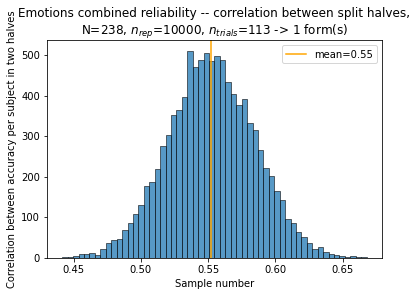

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(emotions_array_corr, ax)

plt.title(f"Emotions combined reliability -- correlation between split halves,\nN={df_emotions.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_emotions.userID.value_counts()[0]} -> {df_emotions.userID.value_counts()[0]//x.loc[x['version'].isna(),'num_trials'].sum()} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "emotion_matching_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

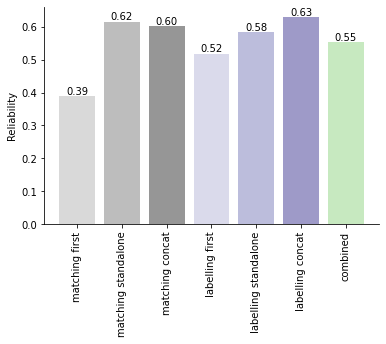

In [124]:
values = list(x["reliability_mean"].values)+[emotions_array_corr.mean()]

plt.bar(['matching first', 'matching standalone', 'matching concat']+['labelling first', 'labelling standalone', 'labelling concat']+['combined'],
            values,
#         color=sns.color_palette("tab20c")[::-1]+sns.color_palette("tab20c")[::-1]
        color = [(0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
#  (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
#  (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),]
             )

for i in range(len(values)):
    plt.annotate(f"{values[i]:.2f}", xy=(i,values[i]), ha='center', va='bottom')


plt.ylabel('Reliability')
plt.xticks(rotation=90)
sns.despine()
plt.show()

## FMP
[top](#top)

* [FMP standalone version](#FMP-standalone)

* [FMP concat version](#Run-overlap-FMP)

In [125]:
# define manually num of trials
n_trials_per_form = 180

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

# take only what we really need
df_fmp_cut = pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data.csv"))
print(df_fmp_cut.userID.unique().size)
df_fmp_cut

223


userID        task  difficulty  correct_flt
0        s_1  perception           2          1.0
1        s_1       faces           3          0.0
2        s_1       faces           3          0.0
3        s_1       faces           2          0.0
4        s_1       blank           1          0.0
...      ...         ...         ...          ...
40135   s_99       blank           3          1.0
40136   s_99       blank           1          1.0
40137   s_99       blank           3          0.0
40138   s_99       blank           1          1.0
40139   s_99       faces           1          1.0

[40140 rows x 4 columns]

### Run split halves FMP
[top](#top)

In [126]:
# num of subjects
N = len(df_fmp_cut.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_fmp_cut, N)

# save the number of trials
n_trials_dict["FMP"] = total_n_trials
# and subjects
n_subj_dict["FMP"] = N

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2

# define corr array
fmp_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_fmp_cut.sort_values(by=["userID", "task"])[["userID", "correct_flt"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_fmp_first = None
    df_fmp_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_fmp_first, df_fmp_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    fmp_array_corr[i] = df_fmp_first.groupby('userID').correct_flt.mean().corr(df_fmp_second.groupby('userID').correct_flt.mean(), 
                                                       method='pearson')   


end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    


Total number of trials is 180.
Process took: 52.84 s which is 0.88 min.


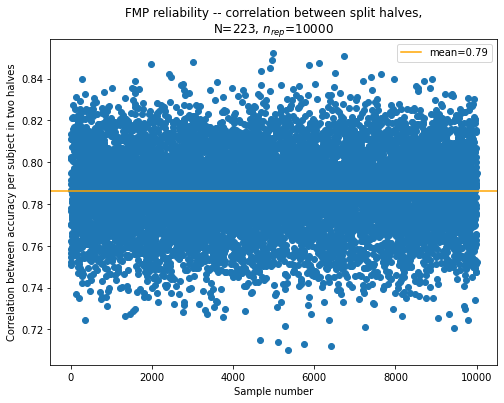

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(range(n_repeats),fmp_array_corr)
plt.axhline(fmp_array_corr.mean(), c="orange", label=f"mean={fmp_array_corr.mean():.2f}")

plt.xlabel("Sample number")
plt.ylabel("Correlation between accuracy per subject in two halves")
plt.legend()
plt.title(f"FMP reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')
plt.show()

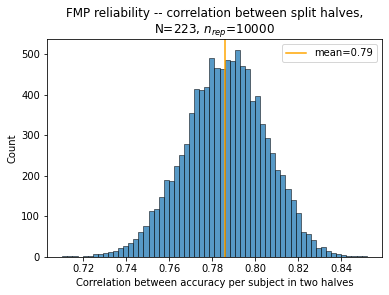

In [128]:
sns.histplot(fmp_array_corr, bins='auto')
plt.axvline(fmp_array_corr.mean(), c="orange", label=f"mean={fmp_array_corr.mean():.2f}")
plt.xlabel("Correlation between accuracy per subject in two halves")
plt.legend()
plt.title(f"FMP reliability -- correlation between split halves,\nN={df_fmp_cut.userID.unique().size}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')
plt.show()

### Run it on the tasks separately
[top](#top)

In [129]:
task_order = ["perception", "blank", "faces"]

# num of subjects
N = len(df_fmp_cut.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Task: {tsk}")
    df_fmp_shuffle=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_fmp_shuffle = df_fmp_cut.sort_values(by=["userID"]).loc[df_fmp_cut["task"]==tsk, ["userID", "correct_flt"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_fmp_shuffle, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    fmp_array_corr_trials_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2


    # check that it's possible
    assert n_trials <= total_n_trials//2
    
    # save the num_trials
    n_trials_dict[f"FMP_{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"FMP_{tsk}"] = N        

    # go over iterations
    for i in range(n_repeats):
        df_fmp_first = None
        df_fmp_second = None 

        # split the data into two halves, sorted by userID and num_done so that we get the exact same trials for every subject
        df_fmp_first, df_fmp_second = split_dataframes_faster(df_fmp_shuffle, total_n_trials, n_trials, N)

        # calculate correlation
        fmp_array_corr_trials_tasks[i] = df_fmp_first.groupby('userID').correct_flt.mean().corr(df_fmp_second.groupby('userID').correct_flt.mean(), 
                                                           method='pearson')   
        
    # create a df
    all_task_df.append(pd.DataFrame(fmp_array_corr_trials_tasks.T, columns=[tsk]))
    
# combine all the df into one    
df_corr_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_trials_all['id'] = df_corr_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.12 s per 100

Task: perception
Total number of trials is 60.
Task: blank
Total number of trials is 60.
Task: faces
Total number of trials is 60.
Process took: 96.15 s which is 1.60 min.


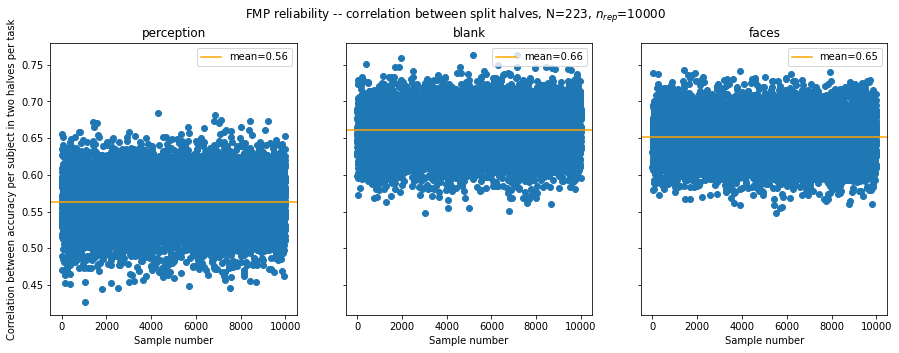

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for tsk, ax in zip(task_order, axs.flatten()):
    ax.scatter(range(n_repeats), df_corr_trials_all[tsk])
    ax.axhline(df_corr_trials_all[tsk].mean(), c="orange", label=f"mean={df_corr_trials_all[tsk].mean():.2f}")

    ax.set_xlabel("Sample number")
    ax.set_title(tsk)
    ax.legend(loc="upper right")

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")


plt.suptitle(f"FMP reliability -- correlation between split halves, N={df_fmp_cut.userID.unique().size}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')
plt.show()

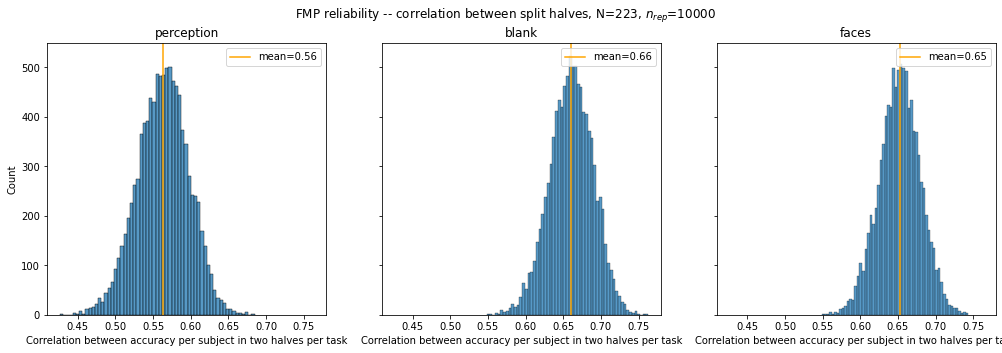

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for tsk, ax in zip(task_order, axs.flatten()):
    sns.histplot(df_corr_trials_all[tsk], ax=ax)
    ax.axvline(df_corr_trials_all[tsk].mean(), c="orange", label=f"mean={df_corr_trials_all[tsk].mean():.2f}")

    ax.set_xlabel("Correlation between accuracy per subject in two halves per task")
    ax.set_title(tsk)
    ax.legend(loc="upper right")
    
    
plt.suptitle(f"FMP reliability -- correlation between split halves, N={df_fmp_cut.userID.unique().size}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')    
plt.show()

____

## FMP standalone
[top](#top)

[FMP](#FMP)

In [132]:
# load
df_fmp_cut_stand = pd.read_csv(os.path.join(csv_clean_data_path, "FMP-cleaned_data_rep.csv"))

# should be empty -- test if people don't have more than 1 entry
df_fmp_cut_stand.userID.value_counts()[df_fmp_cut_stand.userID.value_counts()!=180]

Series([], Name: userID, dtype: int64)

#### Accuracy

In [133]:
# num of subjects
N = len(df_fmp_cut_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_fmp_cut_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["FMP_stand"] = total_n_trials
# and subjects
n_subj_dict["FMP_stand"] = N

# define corr array
fmp_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_fmp_cut_stand.sort_values(by=["userID"])[["userID", "correct_flt"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 180 == n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_FMP_first = None
    df_FMP_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_FMP_first, df_FMP_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    fmp_stand_array_corr[i] = df_FMP_first.groupby('userID').correct_flt.mean().corr(df_FMP_second.groupby('userID').correct_flt.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.33 s per 100
# 32 s (0.5 min) per 10 000

Total number of trials is 180.
Taking 90 trials.
Process took: 41.00 s which is 0.68 min.


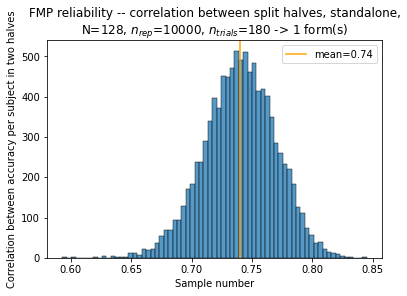

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(fmp_stand_array_corr, ax)

plt.title(f"FMP reliability -- correlation between split halves, standalone,\nN={df_fmp_cut_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_fmp_cut_stand.userID.value_counts()[0]} -> {df_fmp_cut_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')
plt.show()

#### Run it on the tasks separately - standalone
[top](#top)

[standalone](#FMP-standalone)

In [135]:
task_order = ["perception", "blank", "faces"]

# num of subjects
N = len(df_fmp_cut_stand.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# define list for all the resulting df
all_task_df_stand = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Task: {tsk}")
    df_fmp_shuffle=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_fmp_shuffle = df_fmp_cut_stand.sort_values(by=["userID"]).loc[df_fmp_cut_stand["task"]==tsk, ["userID", "correct_flt"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_fmp_shuffle, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    fmp_array_corr_trials_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2


    # check that it's possible
    assert n_trials <= total_n_trials//2
    
    # save the num_trials
    n_trials_dict[f"FMP_stand_{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"FMP_stand_{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_fmp_first = None
        df_fmp_second = None 

        # split the data into two halves, sorted by userID and num_done so that we get the exact same trials for every subject
        df_fmp_first, df_fmp_second = split_dataframes_faster(df_fmp_shuffle, total_n_trials, n_trials, N)

        # calculate correlation
        fmp_array_corr_trials_tasks[i] = df_fmp_first.groupby('userID').correct_flt.mean().corr(df_fmp_second.groupby('userID').correct_flt.mean(), 
                                                           method='pearson')   
        
    # create a df
    all_task_df_stand.append(pd.DataFrame(fmp_array_corr_trials_tasks.T, columns=[tsk]))
    
# combine all the df into one    
df_corr_stand_trials_all = pd.concat(all_task_df_stand, axis=1)
# add index to be able to then easier merge them
df_corr_stand_trials_all['id'] = df_corr_stand_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.12 s per 100
# 67 s (1.1 min) per 10000

Task: perception
Total number of trials is 60.
Task: blank
Total number of trials is 60.
Task: faces
Total number of trials is 60.
Process took: 77.80 s which is 1.30 min.


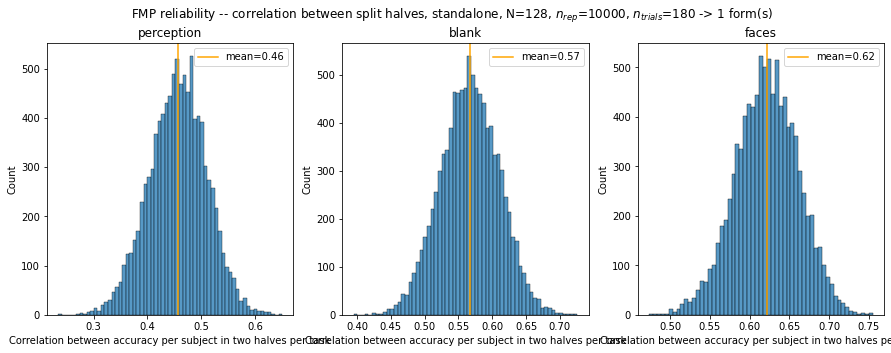

In [136]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for tsk, ax in zip(task_order, axs.flatten()):
    sns.histplot(df_corr_stand_trials_all[tsk], ax=ax)
    ax.axvline(df_corr_stand_trials_all[tsk].mean(), c="orange", label=f"mean={df_corr_stand_trials_all[tsk].mean():.2f}")

    ax.set_xlabel("Correlation between accuracy per subject in two halves per task")
    ax.set_title(tsk)
    ax.legend(loc="upper right")
    

plt.suptitle(f"FMP reliability -- correlation between split halves, standalone, N={df_fmp_cut_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_fmp_cut_stand.userID.value_counts()[0]} -> {df_fmp_cut_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')    

plt.show()

---

### Run overlap FMP
[top](#top)

[standalone](#FMP-standalone)

[FMP](#FMP)

In [137]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data.csv'), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data_rep.csv'), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_fmp_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data.csv'), usecols=["userID", "task", "difficulty", "correct_flt"]),
    pd.read_csv(os.path.join(csv_clean_data_path, 'FMP-cleaned_data_rep.csv'), usecols=["userID", "task", "difficulty", "correct_flt"]),
])

# take only the full data
df_fmp_concat = df_fmp_concat[df_fmp_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_fmp_concat.userID.value_counts()[df_fmp_concat.userID.value_counts()!=360])#.keys()

Running all replicate studies with total 119 participants.
Series([], Name: userID, dtype: int64)


In [138]:
# num of subjects
N = len(df_fmp_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_fmp_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["FMP_concat"] = total_n_trials
# and subjects
n_subj_dict["FMP_concat"] = N

# define corr array
fmp_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_fmp_concat.sort_values(by=["userID"])[["userID", "correct_flt"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_FMP_first = None
    df_FMP_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_FMP_first, df_FMP_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    fmp_concat_array_corr[i] = df_FMP_first.groupby('userID').correct_flt.mean().corr(df_FMP_second.groupby('userID').correct_flt.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.33 s per 100
# 40 s (0.7 min) per 10 000

Total number of trials is 360.
Taking 180 trials.
Process took: 55.32 s which is 0.92 min.


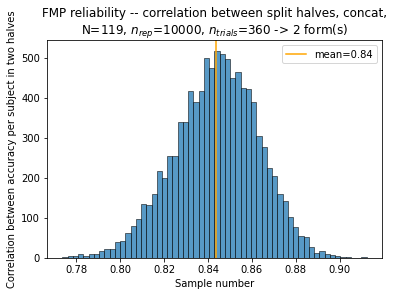

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(fmp_concat_array_corr, ax)

plt.title(f"FMP reliability -- correlation between split halves, concat,\nN={df_fmp_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_fmp_concat.userID.value_counts()[0]} -> {df_fmp_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')
plt.show()

#### Run it on the tasks separately - concat
[top](#top)

[standalone](#FMP-standalone)

In [140]:
task_order = ["perception", "blank", "faces"]

# num of subjects
N = len(df_fmp_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# define list for all the resulting df
all_task_df_concat = []

# start the timer
start = time.time()

for tsk in task_order:
    print(f"Task: {tsk}")
    df_fmp_shuffle=None
    
    # select trials per the given tasks, sort it by userID and num_done to be sure we take the same trials
    df_fmp_shuffle = df_fmp_concat.sort_values(by=["userID"]).loc[df_fmp_concat["task"]==tsk, ["userID", "correct_flt"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_fmp_shuffle, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    fmp_array_corr_trials_tasks = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2


    # check that it's possible
    assert n_trials <= total_n_trials//2
    
    # save the num_trials
    n_trials_dict[f"FMP_concat_{tsk}"] = total_n_trials
    # and subjects
    n_subj_dict[f"FMP_concat_{tsk}"] = N    

    # go over iterations
    for i in range(n_repeats):
        df_fmp_first = None
        df_fmp_second = None 

        # split the data into two halves, sorted by userID and num_done so that we get the exact same trials for every subject
        df_fmp_first, df_fmp_second = split_dataframes_faster(df_fmp_shuffle, total_n_trials, n_trials, N)

        # calculate correlation
        fmp_array_corr_trials_tasks[i] = df_fmp_first.groupby('userID').correct_flt.mean().corr(df_fmp_second.groupby('userID').correct_flt.mean(), 
                                                           method='pearson')   
        
    # create a df
    all_task_df_concat.append(pd.DataFrame(fmp_array_corr_trials_tasks.T, columns=[tsk]))
    
# combine all the df into one    
df_corr_concat_trials_all = pd.concat(all_task_df_concat, axis=1)
# add index to be able to then easier merge them
df_corr_concat_trials_all['id'] = df_corr_concat_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.12 s per 100
# 80 s (1.3 min) per 10000


Task: perception
Total number of trials is 120.
Task: blank
Total number of trials is 120.
Task: faces
Total number of trials is 120.
Process took: 90.00 s which is 1.50 min.


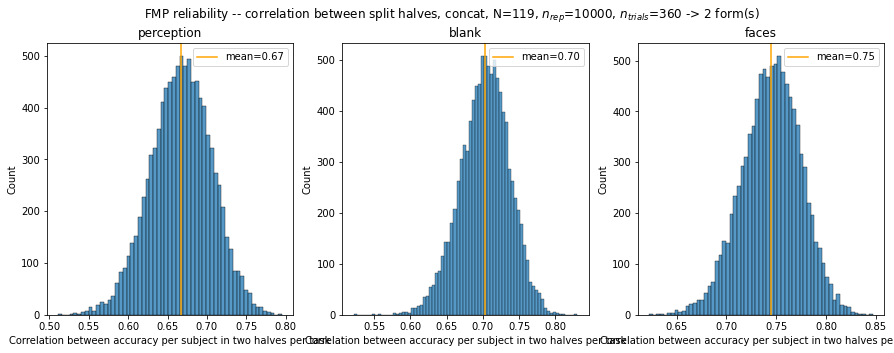

In [141]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for tsk, ax in zip(task_order, axs.flatten()):
    sns.histplot(df_corr_concat_trials_all[tsk], ax=ax)
    ax.axvline(df_corr_concat_trials_all[tsk].mean(), c="orange", label=f"mean={df_corr_concat_trials_all[tsk].mean():.2f}")

    ax.set_xlabel("Correlation between accuracy per subject in two halves per task")
    ax.set_title(tsk)
    ax.legend(loc="upper right")
    

plt.suptitle(f"FMP reliability -- correlation between split halves, concat, N={df_fmp_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_fmp_concat.userID.value_counts()[0]} -> {df_fmp_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "FMP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')    

plt.show()

### Save
[top](#top)

In [142]:
# save only if we run it
if 'fmp_array_corr' in locals(): # TODO
    pd.DataFrame({
        "FMP_overall_correlation" : fmp_array_corr,
        "FMP_perception" : df_corr_trials_all["perception"],
        "FMP_blank" : df_corr_trials_all["blank"],
        "FMP_faces" : df_corr_trials_all["faces"],
    }).to_csv(os.path.join(path_reliability_results, "FMP_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'fmp_stand_array_corr' in locals():
    pd.DataFrame({
        "FMP_overall_correlation" : fmp_stand_array_corr,
        "FMP_perception" : df_corr_stand_trials_all["perception"],
        "FMP_blank" : df_corr_stand_trials_all["blank"],
        "FMP_faces" : df_corr_stand_trials_all["faces"],
        # todo rest
    }).to_csv(os.path.join(path_reliability_results, "FMP_reliability_standalone-method-Michal.csv"), index=False)
    print("saved standalone")

# both of them    
if 'fmp_concat_array_corr' in locals():
    pd.DataFrame({
        "FMP_overall_correlation" : fmp_concat_array_corr,
        "FMP_perception" : df_corr_concat_trials_all["perception"],
        "FMP_blank" : df_corr_concat_trials_all["blank"],
        "FMP_faces" : df_corr_concat_trials_all["faces"],
        # todo rest
    }).to_csv(os.path.join(path_reliability_results, "FMP_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat data")

saved original data
saved standalone
saved concat data


In [143]:
# todo for all

# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]
# files = ["tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']
# versions = ['_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('FMP').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "FMP_overall_correlation": [n_trials_dict[f"FMP{ver}"]],
            "FMP_perception": [n_trials_dict[f"FMP{ver}_perception"]],
            "FMP_blank": [n_trials_dict[f"FMP{ver}_blank"]],
            "FMP_faces": [n_trials_dict[f"FMP{ver}_faces"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [144]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["FMP_overall_correlation", "FMP_perception", "FMP_blank", "FMP_faces"],
        "num_trials": [n_trials_dict[f"FMP{ver}"], n_trials_dict[f"FMP{ver}_perception"], n_trials_dict[f"FMP{ver}_blank"], n_trials_dict[f"FMP{ver}_faces"]],
        "reliability_mean": [eval(f"fmp{ver}_array_corr").mean(), eval(f"df_corr{ver}_trials_all['perception']").mean(), eval(f"df_corr{ver}_trials_all['blank']").mean(), eval(f"df_corr{ver}_trials_all['faces']").mean(), ],
        "reliability_std":  [eval(f"fmp{ver}_array_corr").std() , eval(f"df_corr{ver}_trials_all['perception']").std() , eval(f"df_corr{ver}_trials_all['blank']").std() , eval(f"df_corr{ver}_trials_all['faces']").std() , ],
        "version": 4*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"FMP{ver}"], n_subj_dict[f"FMP{ver}_perception"], n_subj_dict[f"FMP{ver}_blank"], n_subj_dict[f"FMP{ver}_faces"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0                CCMT_overall_correlation          72          0.744839   
1                             CCMT_stage1          18          0.430841   
2                             CCMT_stage2          30          0.586765   
3                             CCMT_stage3          24          0.545496   
4                CCMT_overall_correlation          72          0.770198   
5                             CCMT_stage1          18          0.455148   
6                             CCMT_stage2          30          0.602704   
7                             CCMT_stage3          24          0.612113   
8                CCMT_overall_correlation         144          0.855768   
9                             CCMT_stage1          36          0.590158   
10                            CCMT_stage2          60          0.737885   
11                            CCMT_stage3          48          0.716195   
12               CFMT_overall_correlation          72          0.716930   
13                            CFMT_stage1          18          0.182556   
14                            CFMT_stage2          30          0.611524   
15                            CFMT_stage3          24          0.571387   
16               CFMT_overall_correlation          72          0.743374   
17                            CFMT_stage1          18          0.163202   
18                            CFMT_stage2          30          0.757228   
19                            CFMT_stage3          24          0.482903   
20               CFMT_overall_correlation          72          0.795396   
21                            CFMT_stage1          18          0.218883   
22                            CFMT_stage2          30          0.683855   
23                            CFMT_stage3          24          0.689579   
24               CFMT_overall_correlation          72          0.744327   
25                            CFMT_stage1          18          0.066090   
26                            CFMT_stage2          30          0.685120   
27                            CFMT_stage3          24          0.550695   
28               CFMT_overall_correlation          72          0.831916   
29                            CFMT_stage1          18          0.131451   
30                            CFMT_stage2          30          0.755080   
31                            CFMT_stage3          24          0.686881   
32               CFMT_overall_correlation         360          0.922538   
33                            CFMT_stage1          90          0.384471   
34                            CFMT_stage2         150          0.894287   
35                            CFMT_stage3         120          0.838152   
36      CFMT_orig_Aus_overall_correlation         144          0.811771   
37       car_matching_overall_correlation          40          0.626034   
38       car_matching_overall_correlation          40          0.600597   
39       car_matching_overall_correlation          80          0.742801   
40   emotion_matching_overall_correlation          65          0.388882   
41   emotion_matching_overall_correlation         100          0.615417   
42   emotion_matching_overall_correlation         122          0.601679   
43  emotion_labelling_overall_correlation          48          0.518180   
44  emotion_labelling_overall_correlation         100          0.583721   
45  emotion_labelling_overall_correlation          90          0.629927   
0                 FMP_overall_correlation         180          0.786031   
1                          FMP_perception          60          0.563159   
2                               FMP_blank          60          0.660850   
3                               FMP_faces          60          0.652233   
0                 FMP_overall_correlation         180          0.740102   
1                          FMP_perception          60          0.456404   
2                               FMP_blank          60         

---

## GFMT
[top](#top)

### Run split halves GFMT
[top](#top)

In [145]:
# define manually num of trials
n_trials_per_form = 40

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run original data

In [146]:
df_GFMT = pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data.csv"))
# should be empty -- test if people don't have more than 1 entry
df_GFMT.userID.value_counts()[df_GFMT.userID.value_counts()>40]#.keys()

Series([], Name: userID, dtype: int64)

In [147]:
# num of subjects
N = len(df_GFMT.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_GFMT, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["GFMT"] = total_n_trials
# and subjects
n_subj_dict["GFMT"] = N

# define corr array
GFMT_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_GFMT.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 40

# go over iterations
for i in range(n_repeats):
    df_GFMT_first = None
    df_GFMT_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_GFMT_first, df_GFMT_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    GFMT_array_corr[i] = df_GFMT_first.groupby('userID').correct.mean().corr(df_GFMT_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.33 s per 100
# 30.55 s (0.51 min) per 10 000

Total number of trials is 40.
Taking 20 trials.
Process took: 27.34 s which is 0.46 min.


Text(0.5, 1.0, 'GFMT reliability -- correlation between split halves,\nN=238, $n_{rep}$=10000')

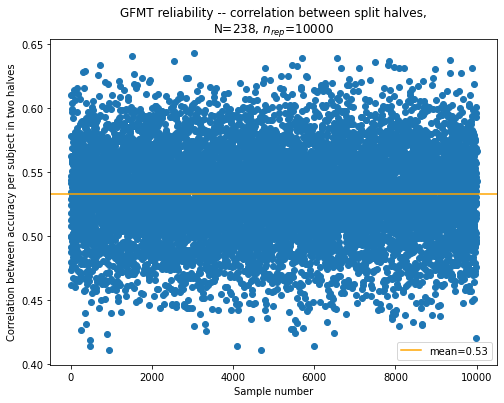

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(GFMT_array_corr, ax)

plt.title(f"GFMT reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'GFMT reliability -- correlation between split halves,\nN=238, $n_{rep}$=10000, $n_{trials}$=40 -> 1 form(s)')

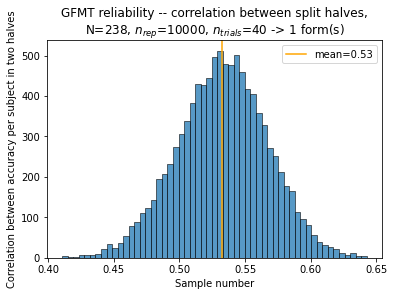

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(GFMT_array_corr, ax)

plt.title(f"GFMT reliability -- correlation between split halves,\nN={df_GFMT.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_GFMT.userID.value_counts()[0]} -> {df_GFMT.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second standalone version

In [150]:
df_GFMT_stand = pd.read_csv(os.path.join(csv_clean_data_path, "GFMT-cleaned_data_rep.csv"))
# should be empty -- test if people don't have more than 1 entry
df_GFMT_stand.userID.value_counts()[df_GFMT_stand.userID.value_counts()!=168]#.keys()

Series([], Name: userID, dtype: int64)

In [151]:
# num of subjects
N = len(df_GFMT_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_GFMT_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["GFMT_stand"] = total_n_trials
# and subjects
n_subj_dict["GFMT_stand"] = N

# define corr array
GFMT_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_GFMT_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 168

# go over iterations
for i in range(n_repeats):
    df_GFMT_first = None
    df_GFMT_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_GFMT_first, df_GFMT_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    GFMT_stand_array_corr[i] = df_GFMT_first.groupby('userID').correct.mean().corr(df_GFMT_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.33 s per 100
# 34 s (0.6 min) per 10 000

Total number of trials is 168.
Taking 84 trials.
Process took: 40.56 s which is 0.68 min.


Text(0.5, 1.0, 'GFMT reliability -- correlation between split halves, standalone,\nN=163, $n_{rep}$=10000, $n_{trials}$=168 -> 4 form(s)')

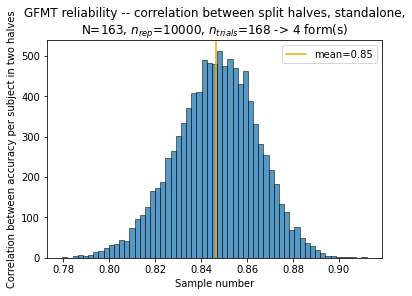

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(GFMT_stand_array_corr, ax)

plt.title(f"GFMT reliability -- correlation between split halves, standalone,\nN={df_GFMT_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_GFMT_stand.userID.value_counts()[0]} -> {df_GFMT_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap GFMT
[top](#top)

In [153]:
shared_participants = list(set(df_GFMT["userID"])&set(df_GFMT_stand["userID"]))

# get overlaping stimuli
shared_target = list(set(df_GFMT["FaceStim"])&set(df_GFMT_stand["FaceStim"]))
print(f"Running all replicate studies with total {len(shared_participants)} participants and {len(shared_target)} stimuli.")

# concat the two datasets
df_GFMT_concat = pd.concat([
    df_GFMT_stand.loc[(df_GFMT_stand["FaceStim"].isin(shared_target))&(df_GFMT_stand["userID"].isin(shared_participants))].copy(),
    df_GFMT.loc[(df_GFMT["FaceStim"].isin(shared_target))&(df_GFMT["userID"].isin(shared_participants))].copy()
])

# should be empty -- test if people don't have more than 1 entry
print(df_GFMT_concat.userID.value_counts()[df_GFMT_concat.userID.value_counts()!=2*n_trials_per_form])#.keys()


Running all replicate studies with total 157 participants and 40 stimuli.
Series([], Name: userID, dtype: int64)


In [154]:
# num of subjects
N = len(df_GFMT_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_GFMT_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["GFMT_concat"] = total_n_trials
# and subjects
n_subj_dict["GFMT_concat"] = N

# define corr array
GFMT_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_GFMT_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_GFMT_first = None
    df_GFMT_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_GFMT_first, df_GFMT_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    GFMT_concat_array_corr[i] = df_GFMT_first.groupby('userID').correct.mean().corr(df_GFMT_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.33 s per 100
# 25 s (0.4 min) per 10 000

Total number of trials is 80.
Taking 40 trials.
Process took: 28.52 s which is 0.48 min.


Text(0.5, 1.0, 'GFMT reliability -- correlation between split halves, concat,\nN=157, $n_{rep}$=10000, $n_{trials}$=80 -> 2 form(s)')

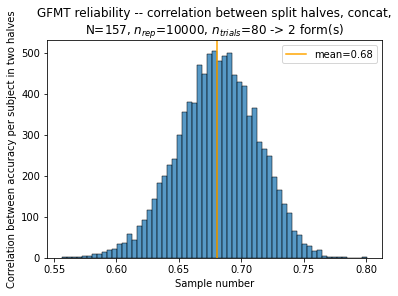

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(GFMT_concat_array_corr, ax)

plt.title(f"GFMT reliability -- correlation between split halves, concat,\nN={df_GFMT_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_GFMT_concat.userID.value_counts()[0]} -> {df_GFMT_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "GFMT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [156]:
# save only if we run it
if 'GFMT_array_corr' in locals():
    pd.DataFrame({
        "GFMT_overall_correlation" : GFMT_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "GFMT_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'GFMT_stand_array_corr' in locals():
    pd.DataFrame({
        "GFMT_overall_correlation" : GFMT_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "GFMT_reliability_standalone-method-Michal.csv"), index=False)   
    print("saved standalone data")

# both of them    
if 'GFMT_concat_array_corr' in locals():
    pd.DataFrame({
        "GFMT_overall_correlation" : GFMT_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "GFMT_reliability_concat-method-Michal.csv"), index=False)  
    print("saved concat data")

saved original data
saved standalone data
saved concat data


In [157]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('GFMT').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "GFMT_overall_correlation": [n_trials_dict[f"GFMT{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [158]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["GFMT_overall_correlation"],
        "num_trials": [n_trials_dict[f"GFMT{ver}"]],
        "reliability_mean": [eval(f"GFMT{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"GFMT{ver}_array_corr").std()],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"GFMT{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0   CCMT_overall_correlation          72          0.744839         0.021953   
1                CCMT_stage1          18          0.430841         0.038396   
2                CCMT_stage2          30          0.586765         0.031072   
3                CCMT_stage3          24          0.545496         0.031030   
4   CCMT_overall_correlation          72          0.770198         0.024802   
..                       ...         ...               ...              ...   
56                 FMP_blank         120          0.702764         0.033900   
57                 FMP_faces         120          0.745140         0.029521   
0   GFMT_overall_correlation          40          0.532579         0.034285   
0   GFMT_overall_correlation         168          0.846483         0.018007   
0   GFMT_overall_correlation          80          0.680949         0.031988   

   version  num_subjects  
0      NaN           243  
1      NaN           243  
2      NaN           243  
3      NaN           243  
4    stand           160  
..     ...           ...  
56  concat           119  
57  concat           119  
0                    238  
0    stand           163  
0   concat           157  

[61 rows x 6 columns]

## MST
[top](#top)

### Prepare and process MST
[top](#top)

There are again two files which are not the same. The first run was not successful and many people just let it run. Those people were then invited again, so only their second data should be counted. I am accounting for it by first loading the second data and then only loading all the first which are not yet loaded.

TODO
---
Also we should decide if we are only taking those who have 320 trials or if we allow less (like 310). At the moment I am taking whatever they had.

---
LDI (lure discrimination index) = prob of giving a similar response to a lure - prob of similar response to foils 

REC (corrected recognition) = hits (old to target) - FA (old to foil)

### Run split halves MST
[top](#top)

In [159]:
# define manually num of trials
n_trials_per_form = 320

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

In [160]:
df_MST = pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data.csv"))

# remove the ones who do not have 320 trials to make it easier later
df_MST = df_MST[~df_MST["userID"].isin(df_MST["userID"].value_counts()[df_MST.userID.value_counts()<320].keys())]

# apparently this needs to be done
# df_MST["correct"] = df_MST["correct"].astype(float)

In [161]:
# should be empty -- test if people don't have more than 1 entry
df_MST.userID.value_counts()[df_MST.userID.value_counts()!=320]#.keys()

Series([], Name: userID, dtype: int64)

Below is the calculation how it's done at the moment. For `overall_acc` we can just used the same code as for all the other tasks.


```python
# define the series
num_lures = df_mst_raw[(df_mst_raw["trial_type"]=="lure")&(df_mst_raw["repetition"]=="b")].userID.value_counts()
num_foil = df_mst_raw[df_mst_raw["trial_type"] == "foil"].userID.value_counts()
num_target = df_mst_raw [(df_mst_raw["trial_type"] == "repeat") & (df_mst_raw["repetition"] == "b")].userID.value_counts()

num_sim_lure = df_mst_raw[(df_mst_raw["trial_type"] == "lure") & (df_mst_raw["repetition"] == "b") & (df_mst_raw["response"] == "similar")].userID.value_counts()
num_sim_foil = df_mst_raw[(df_mst_raw["trial_type"] == "foil")  & (df_mst_raw["response"] == "similar")].userID.value_counts()

num_hits = df_mst_raw[(df_mst_raw["trial_type"] == "repeat") & (df_mst_raw["repetition"] == "b") & (df_mst_raw["response"] == "old")].userID.value_counts()
num_FA = df_mst_raw[(df_mst_raw["trial_type"] == "foil")  & (df_mst_raw["response"] == "old")].userID.value_counts()

# # this will fail because it will have nans and not zeros and the resulting results will be nans
# LDI = ((num_sim_lure/num_lures) - (num_sim_foil/num_foil)).rename("LDI")
# REC = ((num_hits/num_target) - (num_FA/num_foil)).rename("REC")

# subj_ldi = LDI[LDI.isna()].reset_index()["index"].values
# subj_rec = REC[REC.isna()].reset_index()["index"].values

# concat them to fill nans
df_vars = pd.concat([num_lures.rename("num_lures"), num_target.rename("num_target"), num_foil.rename("num_foil"),
            num_sim_lure.rename("num_sim_lure"), num_sim_foil.rename("num_sim_foil"),
            num_hits.rename("num_hits"), num_FA.rename("num_FA"),
            # acc.rename("overall_acc"), REC.rename("REC"), LDI.rename("LDI"),
           ], axis=1)

# fill nans with 0
df_vars.fillna(0, inplace=True)
df_vars[df_vars.columns] = df_vars[df_vars.columns].astype(int)

# calculate the acc
acc = df_mst_raw.groupby("userID").correct.mean()
df_vars["overall_acc"] = df_mst_raw.groupby("userID").correct.mean()

# clean
df_vars.reset_index(inplace=True)
df_vars.rename(columns={"index":"userID"}, inplace=True)
df_vars.sort_values(by=["userID"], inplace=True)
df_vars.reset_index(inplace=True, drop=True)

# another way of doing it, probably more precise and less prone to errors
df_vars["overall_acc2"] = df_vars["userID"].map(df_mst_raw.groupby("userID").correct.mean())

df_vars["LDI"] = (df_vars["num_sim_lure"]/df_vars["num_lures"]) - (df_vars["num_sim_foil"]/df_vars["num_foil"])
df_vars["REC"] = (df_vars["num_hits"]/df_vars["num_target"]) - (df_vars["num_FA"]/df_vars["num_foil"])

# df_vars.to_csv(os.path.join(path_results,'MST-results.csv'), index=False)

```

#### Overall accuracy MST
[top](#top)

In [162]:
# num of subjects
N = len(df_MST.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_MST, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
MST_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_MST.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 320

# save the number of trials
n_trials_dict["MST"] = total_n_trials
# and subjects
n_subj_dict["MST"] = N

# go over iterations
for i in range(n_repeats):
    df_MST_first = None
    df_MST_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_MST_first, df_MST_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    MST_array_corr[i] = df_MST_first.groupby('userID').correct.mean().corr(df_MST_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.92 s per 100
# 97 s (1.6 min) per 10 000

Total number of trials is 320.
Taking 160 trials.
Process took: 71.01 s which is 1.18 min.


Text(0.5, 1.0, 'MST reliability -- correlation between split halves,\nN=231, $n_{rep}$=10000')

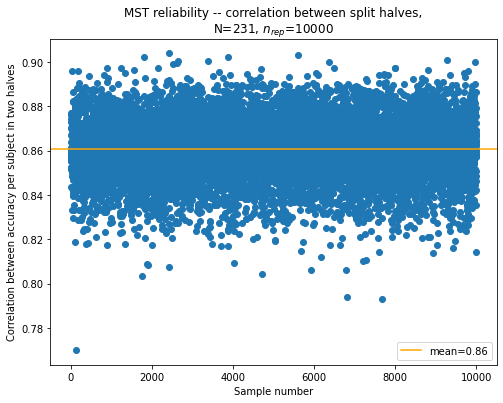

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(MST_array_corr, ax)

plt.title(f"MST reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')


Text(0.5, 1.01, 'MST reliability -- correlation between split halves,\nN=231, $n_{rep}$=10000, $n_{trials}$=320 -> 1 form(s)')

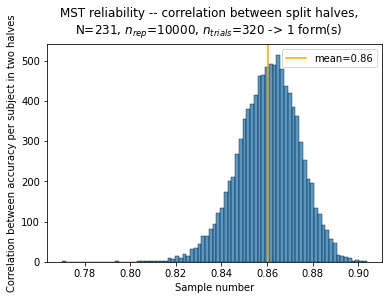

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(MST_array_corr, ax)

plt.suptitle(f"MST reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_MST.userID.value_counts()[0]} -> {df_MST.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Replication set

In [165]:
df_MST_stand = pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data_rep.csv"))

# remove the ones who do not have 320 trials to make it easier later
df_MST_stand = df_MST_stand[~df_MST_stand["userID"].isin(df_MST_stand["userID"].value_counts()[df_MST_stand.userID.value_counts()<320].keys())]

# should be empty -- test if people don't have more than 1 entry
df_MST_stand.userID.value_counts()[df_MST_stand.userID.value_counts()!=320]#.keys()

Series([], Name: userID, dtype: int64)

In [166]:
# num of subjects
N = len(df_MST_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_MST_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
MST_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_MST_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 320

# save the number of trials
n_trials_dict["MST_stand"] = total_n_trials
# and subjects
n_subj_dict["MST_stand"] = N

# go over iterations
for i in range(n_repeats):
    df_MST_first = None
    df_MST_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_MST_first, df_MST_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    MST_stand_array_corr[i] = df_MST_first.groupby('userID').correct.mean().corr(df_MST_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.92 s per 100
# 51 s (0.8 min) per 10 000

Total number of trials is 320.
Taking 160 trials.
Process took: 39.30 s which is 0.65 min.


Text(0.5, 1.01, 'MST reliability -- correlation between split halves, standalone,\nN=91, $n_{rep}$=10000, $n_{trials}$=320 -> 1 form(s)')

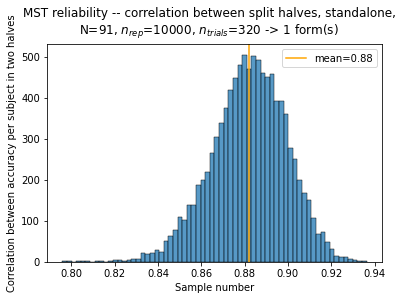

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(MST_stand_array_corr, ax)

plt.suptitle(f"MST reliability -- correlation between split halves, standalone,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_MST_stand.userID.value_counts()[0]} -> {df_MST_stand.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap MST
[top](#top)

In [168]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "MST-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_MST_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'MST-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'MST-cleaned_data_rep.csv')),
])

# take only the full data
df_MST_concat = df_MST_concat[df_MST_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()>2*n_trials_per_form])#.keys()
print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()<2*n_trials_per_form])

# drop the people who do not have two full sets -- TODO, decide, maybe can be filled
df_MST_concat = df_MST_concat[df_MST_concat["userID"].isin(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()==2*n_trials_per_form].keys())]
print(df_MST_concat.userID.value_counts()[df_MST_concat.userID.value_counts()<2*n_trials_per_form])

Running all replicate studies with total 84 participants.
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [169]:
# num of subjects
N = len(df_MST_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_MST_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
MST_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_MST_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form

# save the number of trials
n_trials_dict["MST_concat"] = total_n_trials
# and subjects
n_subj_dict["MST_concat"] = N

# go over iterations
for i in range(n_repeats):
    df_MST_first = None
    df_MST_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_MST_first, df_MST_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    MST_concat_array_corr[i] = df_MST_first.groupby('userID').correct.mean().corr(df_MST_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.92 s per 100
# 87 s (1.4 min) per 10 000

Total number of trials is 640.
Taking 320 trials.
Process took: 57.85 s which is 0.96 min.


Text(0.5, 1.01, 'MST reliability -- correlation between split halves, concat,\nN=84, $n_{rep}$=10000, $n_{trials}$=640 -> 2 form(s)')

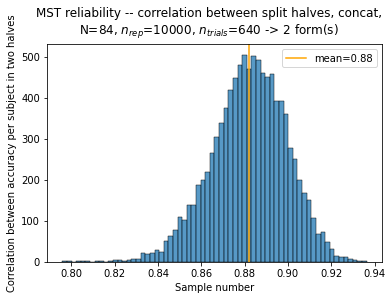

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(MST_stand_array_corr, ax)

plt.suptitle(f"MST reliability -- correlation between split halves, concat,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_MST_concat.userID.value_counts()[0]} -> {df_MST_concat.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### LDI and REC
[top](#top)

For avoiding the problem of getting a `NAN` if a value is missing instead of getting a zero, which in the code above is done by merging the series into a df and then filling the NANs, here we convert the `userID` into a `category` type and then deal with it accordingly, see:

```python
# https://stackoverflow.com/questions/46752347/why-does-value-count-method-in-pandas-returns-a-zero-count
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df_foils.userID = df_foils.userID.astype('category')
df_foils[df_foils.response=='similar'].userID.value_counts()
```

Helper code when I was writing it to see what goes together

```python
# the following sample the same space
num_target = df_MST[(df_MST["trial_type"] == "repeat")&(df_MST["repetition"] == "b")].userID.value_counts()
num_hits =   df_MST[(df_MST["trial_type"] == "repeat")&(df_MST["repetition"] == "b") & (df_MST["response"] == "old")].userID.value_counts()


num_foil =     df_MST[(df_MST["trial_type"] == "foil")].userID.value_counts()
num_sim_foil = df_MST[(df_MST["trial_type"] == "foil")&(df_MST["response"] == "similar")].userID.value_counts()
num_FA =       df_MST[(df_MST["trial_type"] == "foil")&(df_MST["response"] == "old")].userID.value_counts()


num_lures =    df_MST[(df_MST["trial_type"] == "lure")&(df_MST["repetition"] == "b")].userID.value_counts()
num_sim_lure = df_MST[(df_MST["trial_type"] == "lure")&(df_MST["repetition"] == "b") & (df_MST["response"] == "similar")].userID.value_counts()

#
# df_vars["LDI"] = (df_vars["num_sim_lure"]/df_vars["num_lures"]) - (df_vars["num_sim_foil"]/df_vars["num_foil"])
# df_vars["REC"] = (df_vars["num_hits"]/df_vars["num_target"]) - (df_vars["num_FA"]/df_vars["num_foil"])
```

In [171]:
# standardise
df_MST = df_MST.sort_values(by=["userID"])
# set userID to be a category to easier deal with NANs and zeros later -- no sure if needed, can be done as in 
# the code above but this eliminates the use to create a df
df_MST.userID = df_MST.userID.astype('category')
# https://stackoverflow.com/questions/46752347/why-does-value-count-method-in-pandas-returns-a-zero-count
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

# define a dict of the subtasks and the num trials per each of the subtasks
MST_categories_num_trials = {
    "targets": 64,
    "foils": 64,
    "lures": 64,
}

# pre-define the data -- note the naming, must correspond to the keys in the dict above
df_targets = df_MST[(df_MST["trial_type"] == "repeat")&(df_MST["repetition"] == "b")].copy()
df_foils   = df_MST[(df_MST["trial_type"] == "foil")].copy()
df_lures   = df_MST[(df_MST["trial_type"] == "lure")&(df_MST["repetition"] == "b")].copy()

# checks for num of trials per user
assert (df_targets["userID"].value_counts()==MST_categories_num_trials["targets"]).all()
assert (df_foils["userID"].value_counts()==MST_categories_num_trials["foils"]).all()
assert (df_lures["userID"].value_counts()==MST_categories_num_trials["lures"]).all()


# num of subjects
N = len(df_MST.userID.unique())

# max number of trials
total_n_trials = []
n_trials = []

# go over all keys in the dict
for i,key in enumerate(MST_categories_num_trials.keys()):
    # append max trials per the given df -- assume naming df_name
    total_n_trials.append(check_df_get_numbers(eval("df_"+key), N))
    
    # check with what is known
    assert total_n_trials[i] == MST_categories_num_trials[key]
    
    # get num_trials
    n_trials.append(total_n_trials[i]//2)
    print(f"Taking {n_trials[i]} trials for {key} ({MST_categories_num_trials[key]}).")
    

# save the number of trials
n_trials_dict["MST_LDI"] = total_n_trials[0]
n_trials_dict["MST_REC"] = total_n_trials[0]
# and subjects
n_subj_dict["MST_LDI"] = N
n_subj_dict["MST_REC"] = N
    
# how many samples we want to correlate
n_repeats = 10**4

# define corr array
MST_LDI_array_corr = np.zeros(n_repeats)
MST_REC_array_corr = np.zeros(n_repeats)

# start the timer
start = time.time()

# go over iterations
for i in range(n_repeats):
    df_tar1 = None
    df_tar2 = None
    df_foi1 = None
    df_foi2 = None
    df_lur1 = None
    df_lur2 = None
    
    # split the data into two halves, do it separately for each category
    df_tar1, df_tar2 = split_dataframes_faster(df_targets, MST_categories_num_trials["targets"], n_trials[0], N)
    df_foi1, df_foi2 = split_dataframes_faster(df_foils, MST_categories_num_trials["foils"], n_trials[1], N)
    df_lur1, df_lur2 = split_dataframes_faster(df_lures, MST_categories_num_trials["lures"], n_trials[2], N)
    
    
    # for the following it assumes that the number of trials are the same for each subject -- checked before
#     LDI = (num_sim_lure/MST_categories_num_trials["lures"]) - (num_sim_foil/MST_categories_num_trials["foils"])
#     REC = (num_hits/MST_categories_num_trials["targets"]) - (num_FA/MST_categories_num_trials["foils"])

    # LDI 
    LDI_first =  (df_lur1[df_lur1["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi1[df_foi1.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"])
    LDI_second = (df_lur2[df_lur2["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi2[df_foi2.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"]) 
    
    # REC
    REC_first =  (df_tar1[df_tar1["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi1[df_foi1.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])
    REC_second = (df_tar2[df_tar2["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi2[df_foi2.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])


    # check that n(userID) == N to verify that we have all subjects and no NANs/missing
    assert N == LDI_first.size
    assert N == LDI_second.size
    assert N == REC_first.size
    assert N == REC_second.size
    
    
    # calculate correlation
    MST_LDI_array_corr[i] = LDI_first.corr(LDI_second, method='pearson')
    MST_REC_array_corr[i] = REC_first.corr(REC_second, method='pearson')
    

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 4.03 s per 100
# 432 s (7.2 min) per 10 000

Total number of trials is 64.
Taking 32 trials for targets (64).
Total number of trials is 64.
Taking 32 trials for foils (64).
Total number of trials is 64.
Taking 32 trials for lures (64).
Process took: 343.75 s which is 5.73 min.


Text(0.5, 0.98, 'MST reliability -- correlation between split halves, N=231, $n_{rep}$=10000')

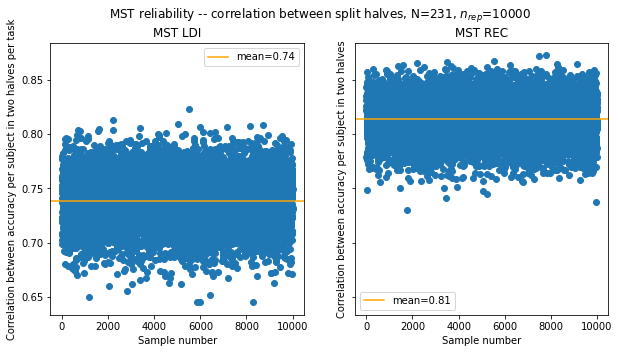

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

plot_correlation_scatter(MST_LDI_array_corr, axs[0])
plot_correlation_scatter(MST_REC_array_corr, axs[1])

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].set_title("MST LDI")
axs[1].set_title("MST REC")

plt.suptitle(f"MST reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')


Text(0.5, 1.01, 'MST reliability -- correlation between split halves,\nN=231, $n_{rep}$=10000, $n_{trials}$=320 -> 1 form(s)')

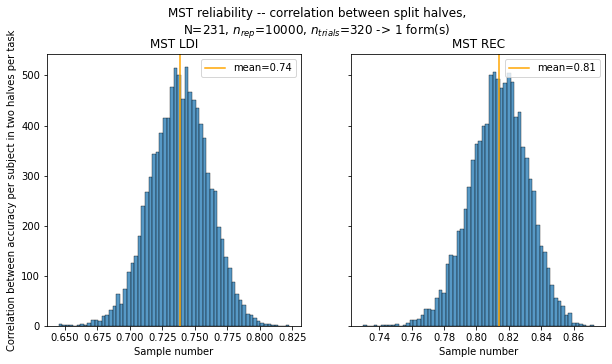

In [173]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

plot_correlation_hist(MST_LDI_array_corr, axs[0])
plot_correlation_hist(MST_REC_array_corr, axs[1])

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].set_title("MST LDI")
axs[1].set_title("MST REC")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")


plt.suptitle(f"MST reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_MST.userID.value_counts()[0]} -> {df_MST.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run second repetition

In [174]:
# standardise
df_MST_stand = df_MST_stand.sort_values(by=["userID"])
# set userID to be a category to easier deal with NANs and zeros later -- no sure if needed, can be done as in 
# the code above but this eliminates the use to create a df
df_MST_stand.userID = df_MST_stand.userID.astype('category')
# https://stackoverflow.com/questions/46752347/why-does-value-count-method-in-pandas-returns-a-zero-count
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

# define a dict of the subtasks and the num trials per each of the subtasks
MST_categories_num_trials = {
    "targets": 64,
    "foils": 64,
    "lures": 64,
}

# pre-define the data -- note the naming, must correspond to the keys in the dict above
df_targets = df_MST_stand[(df_MST_stand["trial_type"] == "repeat")&(df_MST_stand["repetition"] == "b")].copy()
df_foils   = df_MST_stand[(df_MST_stand["trial_type"] == "foil")].copy()
df_lures   = df_MST_stand[(df_MST_stand["trial_type"] == "lure")&(df_MST_stand["repetition"] == "b")].copy()

# checks for num of trials per user
assert (df_targets["userID"].value_counts()==MST_categories_num_trials["targets"]).all()
assert (df_foils["userID"].value_counts()==MST_categories_num_trials["foils"]).all()
assert (df_lures["userID"].value_counts()==MST_categories_num_trials["lures"]).all()


# num of subjects
N = len(df_MST_stand.userID.unique())

# max number of trials
total_n_trials = []
n_trials = []

# go over all keys in the dict
for i,key in enumerate(MST_categories_num_trials.keys()):
    # append max trials per the given df -- assume naming df_name
    total_n_trials.append(check_df_get_numbers(eval("df_"+key), N))
    
    # check with what is known
    assert total_n_trials[i] == MST_categories_num_trials[key]
    
    # get num_trials
    n_trials.append(total_n_trials[i]//2)
    print(f"Taking {n_trials[i]} trials for {key} ({MST_categories_num_trials[key]}).")
    
# save the number of trials
n_trials_dict["MST_LDI_stand"] = total_n_trials[0]
n_trials_dict["MST_REC_stand"] = total_n_trials[0]
# and subjects
n_subj_dict["MST_LDI_stand"] = N
n_subj_dict["MST_REC_stand"] = N    

# how many samples we want to correlate
n_repeats = 10**4

# define corr array
MST_LDI_stand_array_corr = np.zeros(n_repeats)
MST_REC_stand_array_corr = np.zeros(n_repeats)

# start the timer
start = time.time()

# go over iterations
for i in range(n_repeats):
    df_tar1 = None
    df_tar2 = None
    df_foi1 = None
    df_foi2 = None
    df_lur1 = None
    df_lur2 = None
    
    # split the data into two halves, do it separately for each category
    df_tar1, df_tar2 = split_dataframes_faster(df_targets, MST_categories_num_trials["targets"], n_trials[0], N)
    df_foi1, df_foi2 = split_dataframes_faster(df_foils, MST_categories_num_trials["foils"], n_trials[1], N)
    df_lur1, df_lur2 = split_dataframes_faster(df_lures, MST_categories_num_trials["lures"], n_trials[2], N)
    
    
    # for the following it assumes that the number of trials are the same for each subject -- checked before
#     LDI = (num_sim_lure/MST_categories_num_trials["lures"]) - (num_sim_foil/MST_categories_num_trials["foils"])
#     REC = (num_hits/MST_categories_num_trials["targets"]) - (num_FA/MST_categories_num_trials["foils"])

    # LDI 
    LDI_first =  (df_lur1[df_lur1["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi1[df_foi1.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"])
    LDI_second = (df_lur2[df_lur2["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi2[df_foi2.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"]) 
    
    # REC
    REC_first =  (df_tar1[df_tar1["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi1[df_foi1.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])
    REC_second = (df_tar2[df_tar2["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi2[df_foi2.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])


    # check that n(userID) == N to verify that we have all subjects and no NANs/missing
    assert N == LDI_first.size
    assert N == LDI_second.size
    assert N == REC_first.size
    assert N == REC_second.size
    
    
    # calculate correlation
    MST_LDI_stand_array_corr[i] = LDI_first.corr(LDI_second, method='pearson')
    MST_REC_stand_array_corr[i] = REC_first.corr(REC_second, method='pearson')
    

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 3.03 s per 100
# 314 s (5.2 min) per 10 000

Total number of trials is 64.
Taking 32 trials for targets (64).
Total number of trials is 64.
Taking 32 trials for foils (64).
Total number of trials is 64.
Taking 32 trials for lures (64).
Process took: 261.10 s which is 4.35 min.


Text(0.5, 1.01, 'MST reliability -- correlation between split halves, standalone,\nN=91, $n_{rep}$=10000, $n_{trials}$=320 -> 1 form(s)')

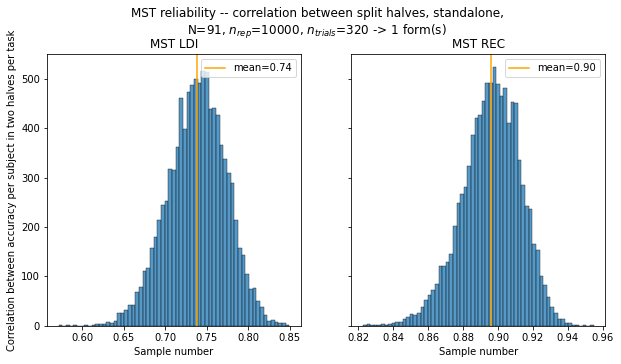

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

plot_correlation_hist(MST_LDI_stand_array_corr, axs[0])
plot_correlation_hist(MST_REC_stand_array_corr, axs[1])

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].set_title("MST LDI")
axs[1].set_title("MST REC")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")


plt.suptitle(f"MST reliability -- correlation between split halves, standalone,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_MST_stand.userID.value_counts()[0]} -> {df_MST_stand.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap MST measures
[top](#top)

In [176]:
# standardise
df_MST_concat = df_MST_concat.sort_values(by=["userID"])
# set userID to be a category to easier deal with NANs and zeros later -- no sure if needed, can be done as in 
# the code above but this eliminates the use to create a df
df_MST_concat.userID = df_MST_concat.userID.astype('category')
# https://stackoverflow.com/questions/46752347/why-does-value-count-method-in-pandas-returns-a-zero-count
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

# define a dict of the subtasks and the num trials per each of the subtasks
MST_categories_num_trials = {
    "targets": 2*64,
    "foils":   2*64,
    "lures":   2*64,
}

# pre-define the data -- note the naming, must correspond to the keys in the dict above
df_targets = df_MST_concat[(df_MST_concat["trial_type"] == "repeat")&(df_MST_concat["repetition"] == "b")].copy()
df_foils   = df_MST_concat[(df_MST_concat["trial_type"] == "foil")].copy()
df_lures   = df_MST_concat[(df_MST_concat["trial_type"] == "lure")&(df_MST_concat["repetition"] == "b")].copy()

# checks for num of trials per user
assert (df_targets["userID"].value_counts()==MST_categories_num_trials["targets"]).all()
assert (df_foils["userID"].value_counts()==MST_categories_num_trials["foils"]).all()
assert (df_lures["userID"].value_counts()==MST_categories_num_trials["lures"]).all()


# num of subjects
N = len(df_MST_concat.userID.unique())

# max number of trials
total_n_trials = []
n_trials = []

# go over all keys in the dict
for i,key in enumerate(MST_categories_num_trials.keys()):
    # append max trials per the given df -- assume naming df_name
    total_n_trials.append(check_df_get_numbers(eval("df_"+key), N))
    
    # check with what is known
    assert total_n_trials[i] == MST_categories_num_trials[key]
    
    # get num_trials
    n_trials.append(total_n_trials[i]//2)
    print(f"Taking {n_trials[i]} trials for {key} ({MST_categories_num_trials[key]}).")
    

# save the number of trials
n_trials_dict["MST_LDI_concat"] = total_n_trials[0]
n_trials_dict["MST_REC_concat"] = total_n_trials[0]
# and subjects
n_subj_dict["MST_LDI_concat"] = N
n_subj_dict["MST_REC_concat"] = N      
    
# how many samples we want to correlate
n_repeats = 10**4

# define corr array
MST_LDI_concat_array_corr = np.zeros(n_repeats)
MST_REC_concat_array_corr = np.zeros(n_repeats)

# start the timer
start = time.time()

# go over iterations
for i in range(n_repeats):
    df_tar1 = None
    df_tar2 = None
    df_foi1 = None
    df_foi2 = None
    df_lur1 = None
    df_lur2 = None
    
    # split the data into two halves, do it separately for each category
    df_tar1, df_tar2 = split_dataframes_faster(df_targets, MST_categories_num_trials["targets"], n_trials[0], N)
    df_foi1, df_foi2 = split_dataframes_faster(df_foils, MST_categories_num_trials["foils"], n_trials[1], N)
    df_lur1, df_lur2 = split_dataframes_faster(df_lures, MST_categories_num_trials["lures"], n_trials[2], N)
    
    
    # for the following it assumes that the number of trials are the same for each subject -- checked before
#     LDI = (num_sim_lure/MST_categories_num_trials["lures"]) - (num_sim_foil/MST_categories_num_trials["foils"])
#     REC = (num_hits/MST_categories_num_trials["targets"]) - (num_FA/MST_categories_num_trials["foils"])

    # LDI 
    LDI_first =  (df_lur1[df_lur1["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi1[df_foi1.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"])
    LDI_second = (df_lur2[df_lur2["response"]=="similar"].userID.value_counts()/MST_categories_num_trials["lures"])-(df_foi2[df_foi2.response=='similar'].userID.value_counts()/MST_categories_num_trials["foils"]) 
    
    # REC
    REC_first =  (df_tar1[df_tar1["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi1[df_foi1.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])
    REC_second = (df_tar2[df_tar2["response"] == "old"].userID.value_counts()/MST_categories_num_trials["targets"])-(df_foi2[df_foi2.response=='old'].userID.value_counts()/MST_categories_num_trials["foils"])


    # check that n(userID) == N to verify that we have all subjects and no NANs/missing
    assert N == LDI_first.size
    assert N == LDI_second.size
    assert N == REC_first.size
    assert N == REC_second.size
    
    
    # calculate correlation
    MST_LDI_concat_array_corr[i] = LDI_first.corr(LDI_second, method='pearson')
    MST_REC_concat_array_corr[i] = REC_first.corr(REC_second, method='pearson')
    

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 4.03 s per 100
# 344 s (5.7 min) per 10 000

Total number of trials is 128.
Taking 64 trials for targets (128).
Total number of trials is 128.
Taking 64 trials for foils (128).
Total number of trials is 128.
Taking 64 trials for lures (128).
Process took: 272.97 s which is 4.55 min.


Text(0.5, 1.01, 'MST reliability -- correlation between split halves, concat,\nN=84, $n_{rep}$=10000, $n_{trials}$=640 -> 2 form(s)')

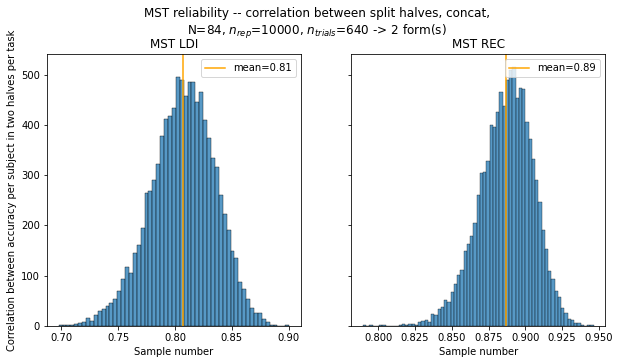

In [177]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

plot_correlation_hist(MST_LDI_concat_array_corr, axs[0])
plot_correlation_hist(MST_REC_concat_array_corr, axs[1])

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].set_title("MST LDI")
axs[1].set_title("MST REC")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")


plt.suptitle(f"MST reliability -- correlation between split halves, concat,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_MST_concat.userID.value_counts()[0]} -> {df_MST_concat.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.01)

# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "MST_reliability_LDI_REC_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [178]:
# save only if we run it
if 'MST_array_corr' in locals():
    pd.DataFrame({
        "MST_overall_correlation" : MST_array_corr,
        "MST_LDI": MST_LDI_array_corr,
        "MST_REC": MST_REC_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "MST_reliability-method-Michal.csv"), index=False)
    print("saved original MST")

# standalone    
if 'MST_stand_array_corr' in locals():
    pd.DataFrame({
        "MST_overall_correlation" : MST_stand_array_corr,
        "MST_LDI": MST_LDI_stand_array_corr,
        "MST_REC": MST_REC_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "MST_reliability_standalone-method-Michal.csv"), index=False)   
    print("saved standalone MST")

# both of them    
if 'MST_concat_array_corr' in locals():
    pd.DataFrame({
        "MST_overall_correlation" : MST_concat_array_corr,
        "MST_LDI": MST_LDI_concat_array_corr,
        "MST_REC": MST_REC_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "MST_reliability_concat-method-Michal.csv"), index=False)   
    print("saved concat MST")

saved original MST
saved standalone MST
saved concat MST


In [179]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('MST').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "MST_overall_correlation": [n_trials_dict[f"MST{ver}"]],
            "MST_LDI": [n_trials_dict[f"MST_LDI{ver}"]],
            "MST_REC": [n_trials_dict[f"MST_LDI{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [180]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["MST_overall_correlation", "MST_REC", "MST_LDI"],
        "num_trials": [n_trials_dict[f"MST{ver}"], n_trials_dict[f"MST_REC{ver}"], n_trials_dict[f"MST_LDI{ver}"]],
        "reliability_mean": [eval(f"MST{ver}_array_corr").mean(), eval(f"MST_REC{ver}_array_corr").mean(), eval(f"MST_LDI{ver}_array_corr").mean(), ],
        "reliability_std":  [eval(f"MST{ver}_array_corr").std() , eval(f"MST_REC{ver}_array_corr").std() , eval(f"MST_LDI{ver}_array_corr").std() , ],
        "version": 3*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"MST{ver}"], n_subj_dict[f"MST_REC{ver}"], n_subj_dict[f"MST_LDI{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0   CCMT_overall_correlation          72          0.744839         0.021953   
1                CCMT_stage1          18          0.430841         0.038396   
2                CCMT_stage2          30          0.586765         0.031072   
3                CCMT_stage3          24          0.545496         0.031030   
4   CCMT_overall_correlation          72          0.770198         0.024802   
..                       ...         ...               ...              ...   
1                    MST_REC          64          0.896099         0.016636   
2                    MST_LDI          64          0.738420         0.034999   
0    MST_overall_correlation         640          0.909959         0.013664   
1                    MST_REC         128          0.886965         0.018109   
2                    MST_LDI         128          0.807047         0.028115   

   version  num_subjects  
0      NaN           243  
1      NaN           243  
2      NaN           243  
3      NaN           243  
4    stand           160  
..     ...           ...  
1    stand            91  
2    stand            91  
0   concat            84  
1   concat            84  
2   concat            84  

[70 rows x 6 columns]

## PIM
[top](#top)

### Run split halves PIM
[top](#top)


In [181]:
# define manually num of trials
n_trials_per_form = 24

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original data

#### Overall accuracy PIM MC


In [182]:
# load only relevant data
df_PIM_MC = pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data.csv"))

print(f"Running first study with total {df_PIM_MC.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_PIM_MC.userID.value_counts()[df_PIM_MC.userID.value_counts()!=n_trials_per_form]#.keys()

Running first study with total 249 participants.


Series([], Name: userID, dtype: int64)

In [183]:
MC_tasks = ['hobby', 'vice', 'country', 'code_name']

# num of subjects
N = len(df_PIM_MC.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_MC_array_corr = np.zeros((4,n_repeats))
    
# define the df
df_sort = df_PIM_MC.sort_values(by=["userID"])#[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form

for t in MC_tasks:
    # save the number of trials
    n_trials_dict[f"PIM_MC_{t}"] = total_n_trials
    # and subjects
    n_subj_dict[f"PIM_MC_{t}"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_MC_first = None
    df_PIM_MC_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PIM_MC_first, df_PIM_MC_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
#     PGNG_array_corr[i] = df_PGNG_first.groupby('userID').correct.mean().corr(df_PGNG_second.groupby('userID').correct.mean(), 
#                                                        method='pearson')  
    PIM_corr = df_PIM_MC_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_second.groupby(["userID"]).mean(),
                                                        method='pearson')
    # check the order to make sure I put the right values to the right place
    assert PIM_corr.index.tolist() == MC_tasks
    PIM_MC_array_corr[:,i] = PIM_corr.values

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.83 s per 100
# 80.78 s (1.35 min) per 10 000




Total number of trials is 24.
Taking 12 trials.
Process took: 78.76 s which is 1.31 min.


Text(0.5, 0.98, 'PIM MC reliability -- correlation between split halves, N=249, $n_{rep}$=10000')

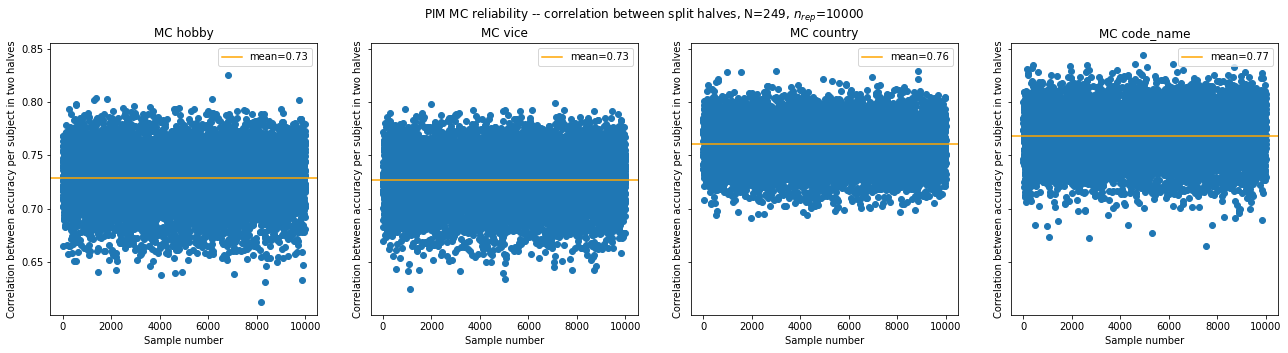

In [184]:
fig, axs = plt.subplots(1, 4, figsize=(22,5), sharey=True, sharex=True)

for (i, tsk), ax in zip(enumerate(MC_tasks), axs.flatten()):
    plot_correlation_scatter(PIM_MC_array_corr[i], ax)
    ax.set_title(f"MC {tsk}")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")


plt.suptitle(f"PIM MC reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 0.98, 'PIM MC reliability -- correlation between split halves, N=249, $n_{rep}$=10000')

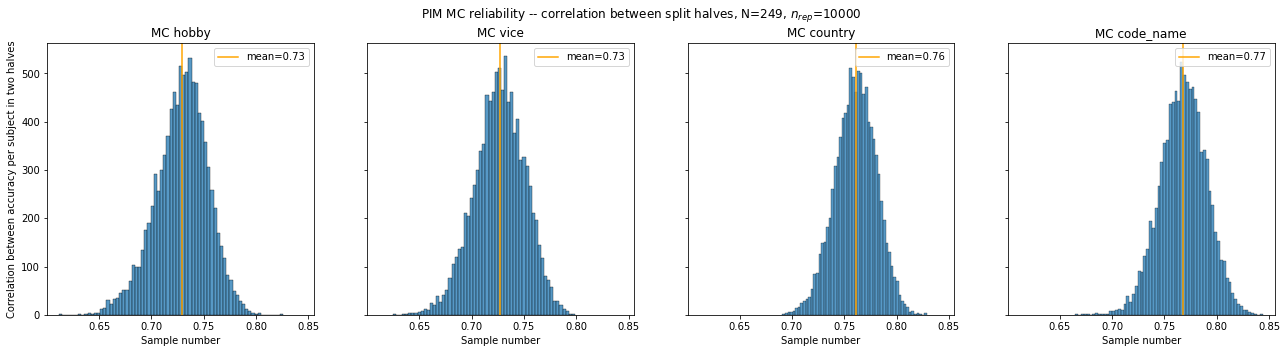

In [185]:
fig, axs = plt.subplots(1, 4, figsize=(22,5), sharey=True, sharex=True)

for (i, tsk), ax in zip(enumerate(MC_tasks), axs.flatten()):
    plot_correlation_hist(PIM_MC_array_corr[i], ax)
    ax.set_title(f"MC {tsk}")
    ax.legend(loc="upper right")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

plt.suptitle(f"PIM MC reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Combine all four measures
[top](#top)

In [186]:
# concat and rename the cols to have only one
df_PIM_MC_all = pd.concat(
    [df_PIM_MC[["userID",x]].rename(columns={x:"correct"}) for x in MC_tasks]
)


# num of subjects
N = len(df_PIM_MC_all.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC_all, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_MC_all_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_PIM_MC_all.sort_values(by=["userID"])#[["userID", "correct"]]
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 4*n_trials_per_form


# save the number of trials
n_trials_dict[f"PIM_MC"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_MC"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_MC_first = None
    df_PIM_MC_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PIM_MC_first, df_PIM_MC_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_MC_all_array_corr[i] = df_PIM_MC_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_second.groupby(["userID"]).mean(),
                                                        method='pearson')

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.93 s per 100
# 98 s (1.6 min) per 10 000

Total number of trials is 96.
Taking 48 trials.
Process took: 97.73 s which is 1.63 min.


Text(0.5, 1.01, 'PIM MC reliability -- correlation between split halves,\nN=249, $n_{rep}$=10000, $n_{trials}$=96 -> 1 form(s)')

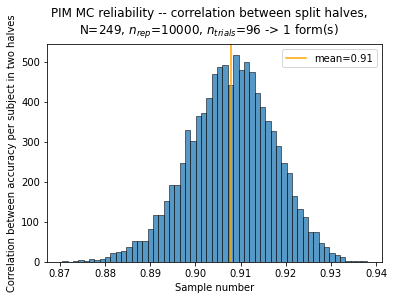

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PIM_MC_all_array_corr, ax)

plt.suptitle(f"PIM MC reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_PIM_MC_all.userID.value_counts()[0]} -> {df_PIM_MC_all.userID.value_counts()[0]//n_trials_per_form//4} form(s)", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second standalone version
[top](#top)

In [188]:
# load only relevant data
df_PIM_MC_stand = pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data_rep.csv"))

print(f"Running first study with total {df_PIM_MC_stand.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_PIM_MC_stand.userID.value_counts()[df_PIM_MC_stand.userID.value_counts()!=n_trials_per_form]#.keys()

Running first study with total 155 participants.


Series([], Name: userID, dtype: int64)

In [189]:
MC_tasks = ['hobby', 'vice', 'country', 'code_name']

# num of subjects
N = len(df_PIM_MC_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_MC_stand_array_corr = np.zeros((4,n_repeats))
    
# define the df
df_sort = df_PIM_MC_stand.sort_values(by=["userID"])#[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form

for t in MC_tasks:
    # save the number of trials
    n_trials_dict[f"PIM_MC_{t}_stand"] = total_n_trials
    # and subjects
    n_subj_dict[f"PIM_MC_{t}_stand"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_MC_stand_first = None
    df_PIM_MC_stand_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PIM_MC_stand_first, df_PIM_MC_stand_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
#     PGNG_array_corr[i] = df_PGNG_first.groupby('userID').correct.mean().corr(df_PGNG_second.groupby('userID').correct.mean(), 
#                                                        method='pearson')  
    PIM_corr = df_PIM_MC_stand_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_stand_second.groupby(["userID"]).mean(),
                                                        method='pearson')
    # check the order to make sure I put the right values to the right place
    assert PIM_corr.index.tolist() == MC_tasks
    PIM_MC_stand_array_corr[:,i] = PIM_corr.values

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.83 s per 100
# 93 s (1.6 min) per 10 000

Total number of trials is 24.
Taking 12 trials.
Process took: 73.98 s which is 1.23 min.


Text(0.5, 0.98, 'PIM MC reliability -- correlation between split halves, N=155, $n_{rep}$=10000, standalone')

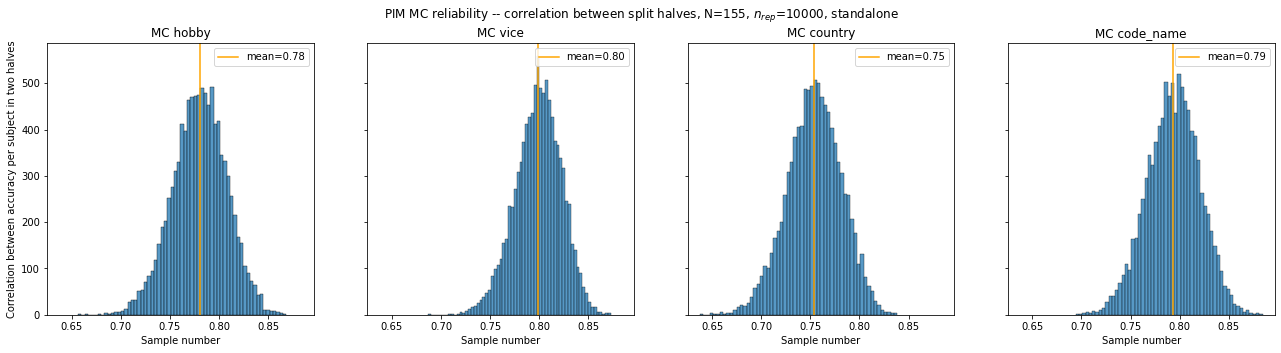

In [190]:
fig, axs = plt.subplots(1, 4, figsize=(22,5), sharey=True, sharex=True)

for (i, tsk), ax in zip(enumerate(MC_tasks), axs.flatten()):
    plot_correlation_hist(PIM_MC_stand_array_corr[i], ax)
    ax.set_title(f"MC {tsk}")
    ax.legend(loc="upper right")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

plt.suptitle(f"PIM MC reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}, standalone")

# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_stand_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_stand_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


#### Combine all four measures - standalone
[top](#top)

In [191]:
# concat and rename the cols to have only one
df_PIM_MC_stand_all = pd.concat(
    [df_PIM_MC_stand[["userID",x]].rename(columns={x:"correct"}) for x in MC_tasks]
)


# num of subjects
N = len(df_PIM_MC_stand_all.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC_stand_all, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_MC_stand_all_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_PIM_MC_stand_all.sort_values(by=["userID"])#[["userID", "correct"]]
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 4*n_trials_per_form


# save the number of trials
n_trials_dict[f"PIM_MC_stand"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_MC_stand"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_MC_stand_first = None
    df_PIM_MC_stand_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PIM_MC_stand_first, df_PIM_MC_stand_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_MC_stand_all_array_corr[i] = df_PIM_MC_stand_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_stand_second.groupby(["userID"]).mean(),
                                                        method='pearson')

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.93 s per 100
# 101 s (1.7 min) per 10 000

Total number of trials is 96.
Taking 48 trials.
Process took: 81.09 s which is 1.35 min.


Text(0.5, 1.01, 'PIM MC reliability -- correlation between split halves,\nN=155, $n_{rep}$=10000, $n_{trials}$=96 -> 1 form(s), standalone')

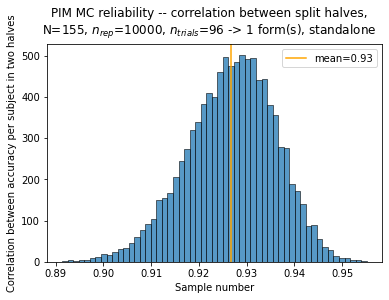

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PIM_MC_stand_all_array_corr, ax)

plt.suptitle(f"PIM MC reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_PIM_MC_stand_all.userID.value_counts()[0]} -> {df_PIM_MC_stand_all.userID.value_counts()[0]//n_trials_per_form//4} form(s), standalone", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_stand_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_stand_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

---

#### Run overlap PIM MC
[top](#top)

In [193]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_MC-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_PIM_MC_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_MC-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_MC-cleaned_data_rep.csv')),
])

# take only the full data
df_PIM_MC_concat = df_PIM_MC_concat[df_PIM_MC_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_PIM_MC_concat.userID.value_counts()[df_PIM_MC_concat.userID.value_counts()!=2*n_trials_per_form])#.keys()

Running all replicate studies with total 152 participants.
Series([], Name: userID, dtype: int64)


In [194]:
MC_tasks = ['hobby', 'vice', 'country', 'code_name']

# num of subjects
N = len(df_PIM_MC_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_MC_concat_array_corr = np.zeros((4,n_repeats))
    
# define the df
df_sort = df_PIM_MC_concat.sort_values(by=["userID"])#[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form

for t in MC_tasks:
    # save the number of trials
    n_trials_dict[f"PIM_MC_{t}_concat"] = total_n_trials
    # and subjects
    n_subj_dict[f"PIM_MC_{t}_concat"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_MC_concat_first = None
    df_PIM_MC_concat_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PIM_MC_concat_first, df_PIM_MC_concat_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
#     PGNG_array_corr[i] = df_PGNG_first.groupby('userID').correct.mean().corr(df_PGNG_second.groupby('userID').correct.mean(), 
#                                                        method='pearson')  
    PIM_corr = df_PIM_MC_concat_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_concat_second.groupby(["userID"]).mean(),
                                                        method='pearson')
    # check the order to make sure I put the right values to the right place
    assert PIM_corr.index.tolist() == MC_tasks
    PIM_MC_concat_array_corr[:,i] = PIM_corr.values

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.83 s per 100
# 80.78 s (1.35 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 80.22 s which is 1.34 min.


Text(0.5, 0.98, 'PIM MC reliability -- correlation between split halves, N=152, $n_{rep}$=10000, concat')

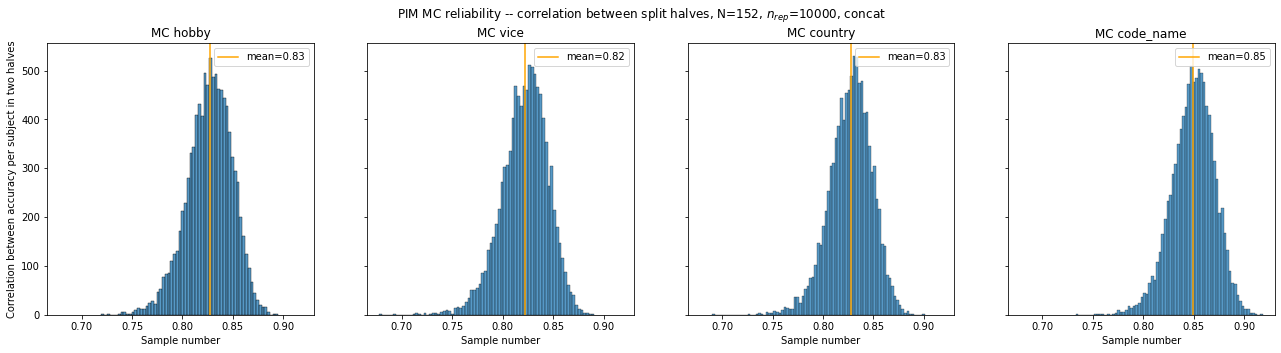

In [195]:
fig, axs = plt.subplots(1, 4, figsize=(22,5), sharey=True, sharex=True)

for (i, tsk), ax in zip(enumerate(MC_tasks), axs.flatten()):
    plot_correlation_hist(PIM_MC_concat_array_corr[i], ax)
    ax.set_title(f"MC {tsk}")
    ax.legend(loc="upper right")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

plt.suptitle(f"PIM MC reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}, concat")

# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_concat_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_concat_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


#### Combine all four measures - concat
[top](#top)

In [196]:
# concat and rename the cols to have only one
df_PIM_MC_concat_all = pd.concat(
    [df_PIM_MC_concat[["userID",x]].rename(columns={x:"correct"}) for x in MC_tasks]
)


# num of subjects
N = len(df_PIM_MC_concat_all.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PIM_MC_concat_all, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_MC_concat_all_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_PIM_MC_concat_all.sort_values(by=["userID"])#[["userID", "correct"]]
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*4*n_trials_per_form


# save the number of trials
n_trials_dict[f"PIM_MC_concat"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_MC_concat"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_MC_concat_first = None
    df_PIM_MC_concat_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PIM_MC_concat_first, df_PIM_MC_concat_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_MC_concat_all_array_corr[i] = df_PIM_MC_concat_first.groupby(["userID"]).mean().corrwith(df_PIM_MC_concat_second.groupby(["userID"]).mean(),
                                                        method='pearson')

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.93 s per 100
# 119 s (2 min) per 10 000

Total number of trials is 192.
Taking 96 trials.
Process took: 94.01 s which is 1.57 min.


Text(0.5, 1.01, 'PIM MC reliability -- correlation between split halves,\nN=152, $n_{rep}$=10000, $n_{trials}$=192 -> 2 form(s), concat')

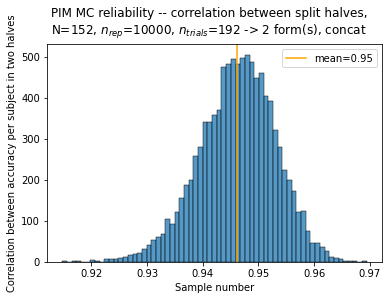

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PIM_MC_concat_all_array_corr, ax)

plt.suptitle(f"PIM MC reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}"+\
             ", $n_{trials}$"+f"={df_PIM_MC_concat_all.userID.value_counts()[0]} -> {df_PIM_MC_concat_all.userID.value_counts()[0]//n_trials_per_form//4} form(s), concat", y=1.01)


# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_concat_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_MC_concat_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

----

### PIM Recognition
[top](#top)

Here I'd do three things:

1. look at pure accuracy
2. scale the accuracy by confidence (0-5)
3. do what Catherine does

And all of that both for seen and unseen

#### Original data

In [198]:
# load only relevant data
df_PIM_recog = pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data.csv"))

# convert correct
df_PIM_recog["correct"] = df_PIM_recog["correct"].astype(float)
df_PIM_recog["seen"] = df_PIM_recog["seen"].str.lower()

# should be empty -- test if people don't have more than 1 entry
df_PIM_recog.userID.value_counts()[df_PIM_recog.userID.value_counts()!=(24*2*2)]#.keys()

Series([], Name: userID, dtype: int64)

In [199]:
# drop those people for now
df_PIM_recog = df_PIM_recog[~df_PIM_recog["userID"].isin(df_PIM_recog.userID.value_counts()[df_PIM_recog.userID.value_counts()!=(24*2*2)].keys())]

df_PIM_recog.userID.value_counts()[df_PIM_recog.userID.value_counts()!=(n_trials_per_form*2*2)]

Series([], Name: userID, dtype: int64)

In [200]:
# define the df
df_sort=None
df_sort = df_PIM_recog[df_PIM_recog["sender"]=="Recognize"].sort_values(by=["userID"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_all_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form*2

# save the number of trials
n_trials_dict[f"PIM_recog"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_recog"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_all_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 32.14 s (0.54 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 29.21 s which is 0.49 min.


In [201]:
# define the df
df_sort=None
df_sort = df_PIM_recog[(df_PIM_recog["sender"]=="Recognize")&(df_PIM_recog["seen"]=="y")].sort_values(by=["userID"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_seen_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_seen_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.25 s per 100
# 25.43 s (0.42 min) per 10 000

Total number of trials is 24.
Taking 12 trials.
Process took: 25.84 s which is 0.43 min.


In [202]:
# sample equally (the same number of trials) seen and unseen --> consider it a task

# define the df
df_sort=None
df_sort = df_PIM_recog[df_PIM_recog["sender"]=="Recognize"].sort_values(by=["userID", "seen"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials -- divide by 2 since we split the seen and unseen
total_n_trials = check_df_get_numbers(df_sort, N)//2

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_all_fair_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID and seen so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N, 2)

    # calculate correlation
    PIM_recog_all_fair_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.29 s per 100
# 29.7 s (0.5 min) per 10 000

Total number of trials is 48.
Taking 12 trials.
Process took: 28.74 s which is 0.48 min.


Text(0.5, 0.98, 'PIM recognition reliability -- correlation between split halves,\nN=249, $n_{rep}$=10000')

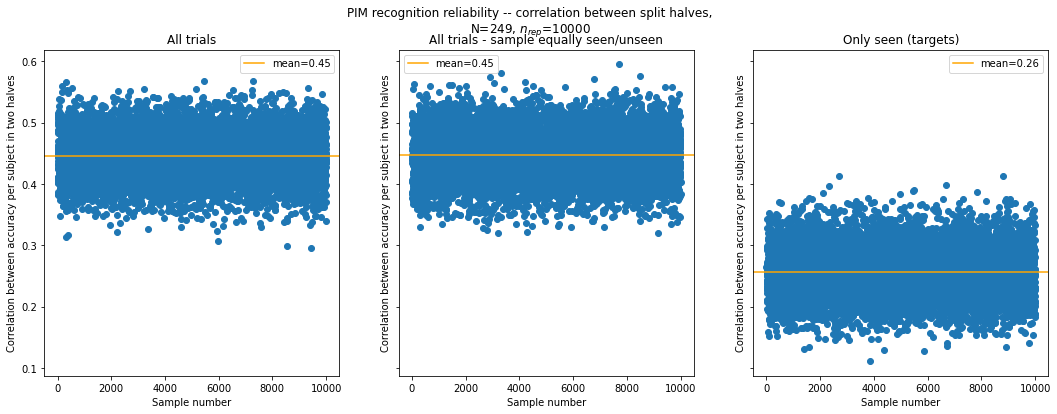

In [203]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharey=True)

plot_correlation_scatter(PIM_recog_all_acc_array_corr, ax[0])
plot_correlation_scatter(PIM_recog_all_fair_acc_array_corr, ax[1])
plot_correlation_scatter(PIM_recog_seen_acc_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

plt.suptitle(f"PIM recognition reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 0.98, 'PIM recognition reliability -- correlation between split halves,\nN=249, $n_{rep}$=10000')

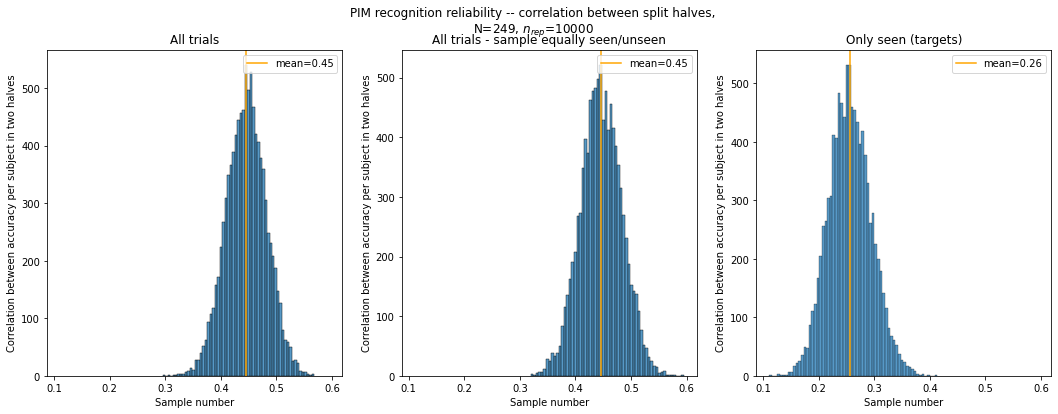

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

plot_correlation_hist(PIM_recog_all_acc_array_corr, ax[0])
plot_correlation_hist(PIM_recog_all_fair_acc_array_corr, ax[1])
plot_correlation_hist(PIM_recog_seen_acc_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.suptitle(f"PIM recognition reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Scale by confidence
[top](#top)

In [206]:
# ignore the pandas setting a copy warning to make it more readabe
# https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# create a helper column to have -1 as incorrect and 1 as correct, that will preserve the confidence going the opposite
# direction for correct and incorrect trials (ie I'm more punished if I was sure and wrong)
df_PIM_recog["correct_helper"] = df_PIM_recog["correct"]*2-1
df_PIM_recog["correct_helper"].ffill(inplace=True)

# get numerical mapping of confidence
# df_PIM_recog["confidence_num"] = np.nan
df_PIM_recog["confidence_num"] = df_PIM_recog["response"].map({"very":3, "moderately":2, "not_at_all":1})


# df_PIM_recog["correct_confidence_scaled"] = np.nan
# make it range from -3 to 3 the right way
df_PIM_recog.loc[df_PIM_recog["sender"]=="Confidence","correct_confidence_scaled"] = df_PIM_recog.loc[df_PIM_recog["sender"]=="Confidence","confidence_num"]*df_PIM_recog.loc[df_PIM_recog["sender"]=="Confidence","correct_helper"]
# move it to be 0 to 5
df_PIM_recog.loc[df_PIM_recog["correct_confidence_scaled"]<0,"correct_confidence_scaled"] +=1
df_PIM_recog.loc[:,"correct_confidence_scaled"] += 3

df_PIM_recog

userID observation      sender  correct    response seen  \
0        s_1       4fe63   Recognize      1.0  ArrowRight    n   
1        s_1       4fe63   Recognize      1.0   ArrowLeft    y   
2        s_1       4fe63  Confidence      NaN  moderately    n   
3        s_1       4fe63   Recognize      0.0   ArrowLeft    n   
4        s_1       4fe63  Confidence      NaN        very    y   
...      ...         ...         ...      ...         ...  ...   
23899   s_99       4813d  Confidence      NaN  moderately    n   
23900   s_99       4813d   Recognize      1.0   ArrowLeft    n   
23901   s_99       4813d  Confidence      NaN  moderately    n   
23902   s_99       4813d   Recognize      1.0  ArrowRight    y   
23903   s_99       4813d   Recognize      1.0  ArrowRight    y   

       correct_helper  confidence_num  correct_confidence_scaled  
0                 1.0             NaN                        NaN  
1                 1.0             NaN                        NaN  
2                 1.0             2.0                        5.0  
3                -1.0             NaN                        NaN  
4                -1.0             3.0                        1.0  
...               ...             ...                        ...  
23899             1.0             2.0                        5.0  
23900             1.0             NaN                        NaN  
23901             1.0             2.0                        5.0  
23902             1.0             NaN                        NaN  
23903             1.0             NaN                        NaN  

[23904 rows x 9 columns]

<AxesSubplot: xlabel='correct_confidence_scaled', ylabel='Density'>

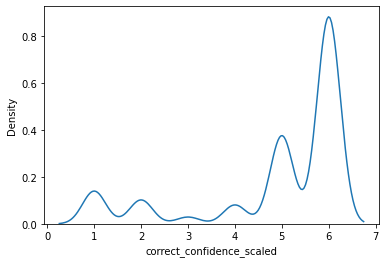

In [207]:
sns.kdeplot(df_PIM_recog["correct_confidence_scaled"])

<AxesSubplot: xlabel='confidence_num', ylabel='Density'>

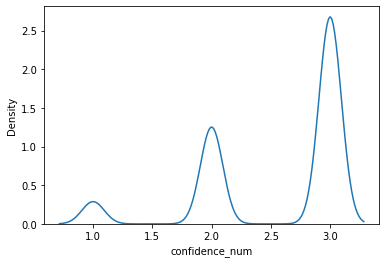

In [208]:
sns.kdeplot(df_PIM_recog["confidence_num"])

In [209]:
# define the df
df_sort=None
df_sort = df_PIM_recog[df_PIM_recog["sender"]=="Confidence"].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_all_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form*2

# save the number of trials
n_trials_dict[f"PIM_recog_scaled_conf"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_recog_scaled_conf"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_all_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 30.7 s (0.5 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 27.81 s which is 0.46 min.


In [210]:
# define the df
df_sort=None
df_sort = df_PIM_recog[(df_PIM_recog["sender"]=="Confidence")&(df_PIM_recog["seen"]=="y")].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_seen_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_seen_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.25 s per 100
# 25.7 s (0.4 min) per 10 000

Total number of trials is 24.
Taking 12 trials.
Process took: 23.65 s which is 0.39 min.


In [211]:
# sample equally (the same number of trials) seen and unseen --> consider it a task

# define the df
df_sort=None
df_sort = df_PIM_recog[df_PIM_recog["sender"]=="Confidence"].sort_values(by=["userID", "seen"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials -- divide by 2 since we split the seen and unseen
total_n_trials = check_df_get_numbers(df_sort, N)//2

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_all_fair_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID and seen so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N, 2)

    # calculate correlation
    PIM_recog_all_fair_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 32.5 s (0.5 min) per 10 000

Total number of trials is 48.
Taking 12 trials.
Process took: 29.10 s which is 0.49 min.


Text(0.5, 0.98, 'PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves,\nN=249, $n_{rep}$=10000')

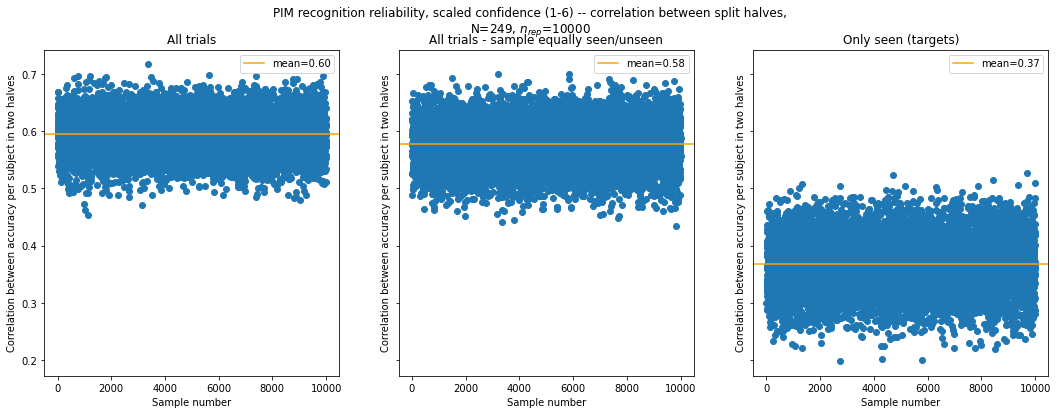

In [212]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharey=True)

plot_correlation_scatter(PIM_recog_all_conf_scaled_array_corr, ax[0])
plot_correlation_scatter(PIM_recog_all_fair_conf_scaled_array_corr, ax[1])
plot_correlation_scatter(PIM_recog_seen_conf_scaled_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

plt.suptitle(f"PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 0.98, 'PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves,\nN=249, $n_{rep}$=10000')

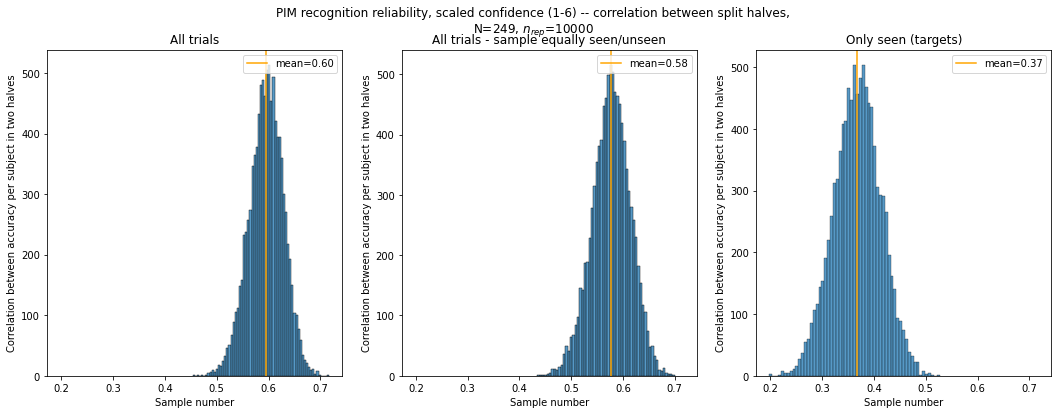

In [213]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

plot_correlation_hist(PIM_recog_all_conf_scaled_array_corr, ax[0])
plot_correlation_hist(PIM_recog_all_fair_conf_scaled_array_corr, ax[1])
plot_correlation_hist(PIM_recog_seen_conf_scaled_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")


plt.suptitle(f"PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_scaled_conf_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_scaled_conf_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Standalone version
[top](#top)

In [214]:
# load only relevant data
df_PIM_recog_stand = pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data_rep.csv"))

# convert correct
df_PIM_recog_stand["correct"] = df_PIM_recog_stand["correct"].astype(float)
df_PIM_recog_stand["seen"] = df_PIM_recog_stand["seen"].str.lower()

# should be empty -- test if people don't have more than 1 entry
df_PIM_recog_stand.userID.value_counts()[df_PIM_recog_stand.userID.value_counts()!=(n_trials_per_form*2*2)]#.keys()

Series([], Name: userID, dtype: int64)

In [215]:
# drop those people for now
df_PIM_recog_stand = df_PIM_recog_stand[~df_PIM_recog_stand["userID"].isin(df_PIM_recog_stand.userID.value_counts()[df_PIM_recog_stand.userID.value_counts()!=(24*2*2)].keys())]

df_PIM_recog_stand.userID.value_counts()[df_PIM_recog_stand.userID.value_counts()!=(n_trials_per_form*2*2)]

Series([], Name: userID, dtype: int64)

In [216]:
# define the df
df_sort=None
df_sort = df_PIM_recog_stand[df_PIM_recog_stand["sender"]=="Recognize"].sort_values(by=["userID"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_stand_all_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form*2

# save the number of trials
n_trials_dict[f"PIM_recog_stand"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_recog_stand"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_stand_all_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 31 s (0.5 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 23.82 s which is 0.40 min.


In [217]:
# define the df
df_sort=None
df_sort = df_PIM_recog_stand[(df_PIM_recog_stand["sender"]=="Recognize")&(df_PIM_recog_stand["seen"]=="y")].sort_values(by=["userID"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_stand_seen_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_stand_seen_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.25 s per 100
# 30 s (0.5 min) per 10 000

Total number of trials is 24.
Taking 12 trials.
Process took: 21.35 s which is 0.36 min.


In [218]:
# sample equally (the same number of trials) seen and unseen --> consider it a task

# define the df
df_sort=None
df_sort = df_PIM_recog_stand[df_PIM_recog_stand["sender"]=="Recognize"].sort_values(by=["userID", "seen"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials -- divide by 2 since we split the seen and unseen
total_n_trials = check_df_get_numbers(df_sort, N)//2

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_stand_all_fair_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID and seen so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N, 2)

    # calculate correlation
    PIM_recog_stand_all_fair_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.29 s per 100
# 24.5 s (0.6 min) per 10 000

Total number of trials is 48.
Taking 12 trials.
Process took: 23.51 s which is 0.39 min.


Text(0.5, 0.98, 'PIM recognition reliability -- correlation between split halves, N=155, $n_{rep}$=10000, standalone')

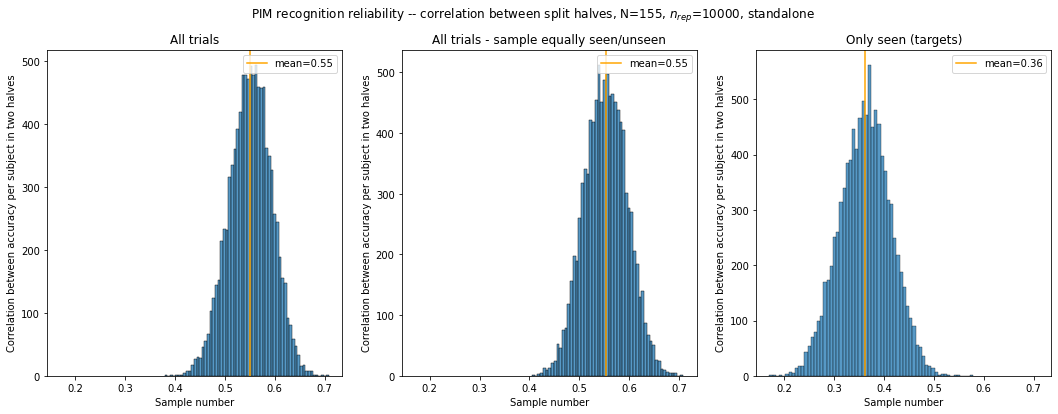

In [219]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

plot_correlation_hist(PIM_recog_stand_all_acc_array_corr, ax[0])
plot_correlation_hist(PIM_recog_stand_all_fair_acc_array_corr, ax[1])
plot_correlation_hist(PIM_recog_stand_seen_acc_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.suptitle(f"PIM recognition reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}, standalone")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_stand_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_stand_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


#### Scale by confidence
[top](#top)

In [220]:
# ignore the pandas setting a copy warning to make it more readabe
# https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# create a helper column to have -1 as incorrect and 1 as correct, that will preserve the confidence going the opposite
# direction for correct and incorrect trials (ie I'm more punished if I was sure and wrong)
df_PIM_recog_stand["correct_helper"] = df_PIM_recog_stand["correct"]*2-1
df_PIM_recog_stand["correct_helper"].ffill(inplace=True)

# get numerical mapping of confidence
# df_PIM_recog_stand["confidence_num"] = np.nan
df_PIM_recog_stand["confidence_num"] = df_PIM_recog_stand["response"].map({"very":3, "moderately":2, "not_at_all":1})


# df_PIM_recog_stand["correct_confidence_scaled"] = np.nan
# make it range from -3 to 3 the right way
df_PIM_recog_stand.loc[df_PIM_recog_stand["sender"]=="Confidence","correct_confidence_scaled"] = df_PIM_recog_stand.loc[df_PIM_recog_stand["sender"]=="Confidence","confidence_num"]*df_PIM_recog_stand.loc[df_PIM_recog_stand["sender"]=="Confidence","correct_helper"]
# move it to be 0 to 5
df_PIM_recog_stand.loc[df_PIM_recog_stand["correct_confidence_scaled"]<0,"correct_confidence_scaled"] +=1
df_PIM_recog_stand.loc[:,"correct_confidence_scaled"] += 3

df_PIM_recog_stand

userID observation      sender  correct    response seen  \
0      s_100       e00e1  Confidence      NaN        very    n   
1      s_100       e00e1   Recognize      1.0   ArrowLeft    n   
2      s_100       e00e1  Confidence      NaN        very    y   
3      s_100       e00e1   Recognize      1.0  ArrowRight    y   
4      s_100       e00e1  Confidence      NaN        very    n   
...      ...         ...         ...      ...         ...  ...   
14875   s_99       f67f8   Recognize      1.0   ArrowLeft    n   
14876   s_99       f67f8  Confidence      NaN        very    n   
14877   s_99       f67f8  Confidence      NaN        very    y   
14878   s_99       f67f8   Recognize      1.0   ArrowLeft    n   
14879   s_99       f67f8   Recognize      1.0  ArrowRight    y   

       correct_helper  confidence_num  correct_confidence_scaled  
0                 NaN             3.0                        NaN  
1                 1.0             NaN                        NaN  
2                 1.0             3.0                        6.0  
3                 1.0             NaN                        NaN  
4                 1.0             3.0                        6.0  
...               ...             ...                        ...  
14875             1.0             NaN                        NaN  
14876             1.0             3.0                        6.0  
14877             1.0             3.0                        6.0  
14878             1.0             NaN                        NaN  
14879             1.0             NaN                        NaN  

[14880 rows x 9 columns]

In [221]:
# define the df
df_sort=None
df_sort = df_PIM_recog_stand[df_PIM_recog_stand["sender"]=="Confidence"].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_stand_all_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form*2

# save the number of trials
n_trials_dict[f"PIM_recog_scaled_conf_stand"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_recog_scaled_conf_stand"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_stand_all_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 33 s (0.6 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 24.68 s which is 0.41 min.


In [222]:
# define the df
df_sort=None
df_sort = df_PIM_recog_stand[(df_PIM_recog_stand["sender"]=="Confidence")&(df_PIM_recog_stand["seen"]=="y")].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_stand_seen_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_stand_seen_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.25 s per 100
# 37 s (0.6 min) per 10 000

Total number of trials is 24.
Taking 12 trials.
Process took: 22.11 s which is 0.37 min.


In [223]:
# sample equally (the same number of trials) seen and unseen --> consider it a task

# define the df
df_sort=None
df_sort = df_PIM_recog_stand[df_PIM_recog_stand["sender"]=="Confidence"].sort_values(by=["userID", "seen"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials -- divide by 2 since we split the seen and unseen
total_n_trials = check_df_get_numbers(df_sort, N)//2

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_stand_all_fair_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID and seen so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N, 2)

    # calculate correlation
    PIM_recog_stand_all_fair_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 37 s (0.6 min) per 10 000

Total number of trials is 48.
Taking 12 trials.
Process took: 25.17 s which is 0.42 min.


Text(0.5, 0.98, 'PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves, N=155, $n_{rep}$=10000, standalone')

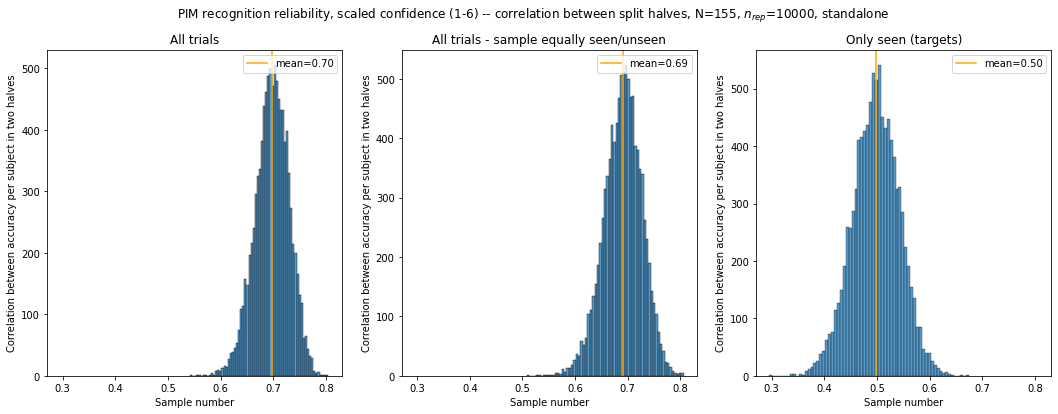

In [224]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

plot_correlation_hist(PIM_recog_stand_all_conf_scaled_array_corr, ax[0])
plot_correlation_hist(PIM_recog_stand_all_fair_conf_scaled_array_corr, ax[1])
plot_correlation_hist(PIM_recog_stand_seen_conf_scaled_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")


plt.suptitle(f"PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}, standalone")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_stand_scaled_conf_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_stand_scaled_conf_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap PIM recognition
[top](#top)

In [225]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PIM_recog-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")


# load and concat the datasets
df_PIM_recog_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_recog-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PIM_recog-cleaned_data_rep.csv')),
])

# take only the full data
df_PIM_recog_concat = df_PIM_recog_concat[df_PIM_recog_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# convert correct
df_PIM_recog_concat["correct"] = df_PIM_recog_concat["correct"].astype(float)
df_PIM_recog_concat["seen"] = df_PIM_recog_concat["seen"].str.lower()

# should be empty -- test if people don't have more than 1 entry
print(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=2*n_trials_per_form])#.keys()

Running all replicate studies with total 152 participants.
s_125    192
s_219    192
s_209    192
s_158    192
s_140    192
        ... 
s_3      192
s_40     192
s_131    192
s_100    192
s_223    192
Name: userID, Length: 152, dtype: int64


In [226]:
# drop those people for now
df_PIM_recog_concat = df_PIM_recog_concat[~df_PIM_recog_concat["userID"].isin(df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=(2*n_trials_per_form*2*2)].keys())]

df_PIM_recog_concat.userID.value_counts()[df_PIM_recog_concat.userID.value_counts()!=(2*n_trials_per_form*2*2)]


Series([], Name: userID, dtype: int64)

In [227]:
# define the df
df_sort=None
df_sort = df_PIM_recog_concat[df_PIM_recog_concat["sender"]=="Recognize"].sort_values(by=["userID"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_concat_all_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form*2

# save the number of trials
n_trials_dict[f"PIM_recog_concat"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_recog_concat"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_concat_all_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 41 s (0.7 min) per 10 000

Total number of trials is 96.
Taking 48 trials.
Process took: 29.14 s which is 0.49 min.


In [228]:
# define the df
df_sort=None
df_sort = df_PIM_recog_concat[(df_PIM_recog_concat["sender"]=="Recognize")&(df_PIM_recog_concat["seen"]=="y")].sort_values(by=["userID"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_concat_seen_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_concat_seen_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.25 s per 100
# 35 s (0.6 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 23.30 s which is 0.39 min.


In [229]:
# sample equally (the same number of trials) seen and unseen --> consider it a task

# define the df
df_sort=None
df_sort = df_PIM_recog_concat[df_PIM_recog_concat["sender"]=="Recognize"].sort_values(by=["userID", "seen"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials -- divide by 2 since we split the seen and unseen
total_n_trials = check_df_get_numbers(df_sort, N)//2

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_concat_all_fair_acc_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID and seen so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N, 2)

    # calculate correlation
    PIM_recog_concat_all_fair_acc_array_corr[i] = df_PIM_first.groupby('userID').correct.mean().corr(df_PIM_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.29 s per 100
# 45 s (0.7 min) per 10 000

Total number of trials is 96.
Taking 24 trials.
Process took: 27.57 s which is 0.46 min.


Text(0.5, 0.98, 'PIM recognition reliability -- correlation between split halves, N=152, $n_{rep}$=10000, concat')

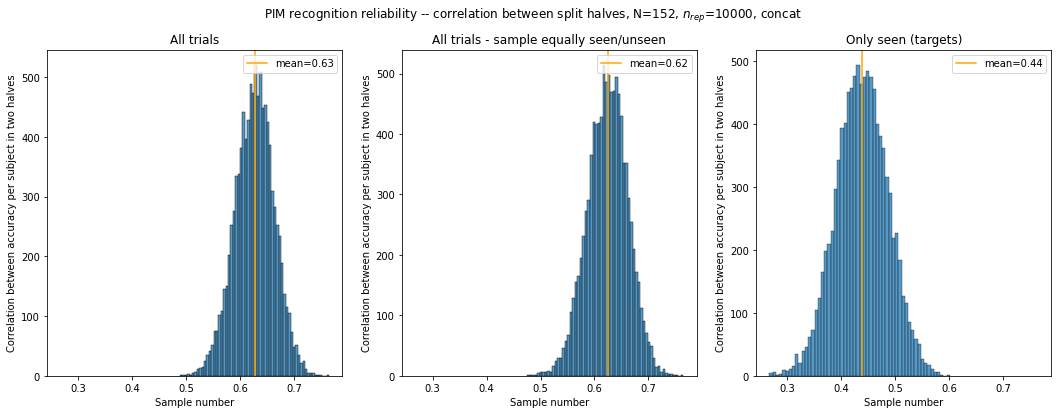

In [230]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

plot_correlation_hist(PIM_recog_concat_all_acc_array_corr, ax[0])
plot_correlation_hist(PIM_recog_concat_all_fair_acc_array_corr, ax[1])
plot_correlation_hist(PIM_recog_concat_seen_acc_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.suptitle(f"PIM recognition reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}, concat")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_concat_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_concat_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


#### Scale by confidence
[top](#top)

In [231]:
# ignore the pandas setting a copy warning to make it more readabe
# https://stackoverflow.com/questions/54197853/how-to-ignore-settingwithcopywarning-using-warnings-simplefilter
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# create a helper column to have -1 as incorrect and 1 as correct, that will preserve the confidence going the opposite
# direction for correct and incorrect trials (ie I'm more punished if I was sure and wrong)
df_PIM_recog_concat["correct_helper"] = df_PIM_recog_concat["correct"]*2-1
df_PIM_recog_concat["correct_helper"].ffill(inplace=True)

# get numerical mapping of confidence
# df_PIM_recog_concat["confidence_num"] = np.nan
df_PIM_recog_concat["confidence_num"] = df_PIM_recog_concat["response"].map({"very":3, "moderately":2, "not_at_all":1})


# df_PIM_recog_concat["correct_confidence_scaled"] = np.nan
# make it range from -3 to 3 the right way
df_PIM_recog_concat.loc[df_PIM_recog_concat["sender"]=="Confidence","correct_confidence_scaled"] = df_PIM_recog_concat.loc[df_PIM_recog_concat["sender"]=="Confidence","confidence_num"]*df_PIM_recog_concat.loc[df_PIM_recog_concat["sender"]=="Confidence","correct_helper"]
# move it to be 0 to 5
df_PIM_recog_concat.loc[df_PIM_recog_concat["correct_confidence_scaled"]<0,"correct_confidence_scaled"] +=1
df_PIM_recog_concat.loc[:,"correct_confidence_scaled"] += 3

df_PIM_recog_concat

userID observation      sender  correct    response seen  \
0      s_100       70ee3  Confidence      NaN        very    y   
1      s_100       70ee3   Recognize      1.0   ArrowLeft    n   
2      s_100       70ee3  Confidence      NaN  not_at_all    n   
3      s_100       70ee3   Recognize      1.0   ArrowLeft    n   
4      s_100       70ee3  Confidence      NaN        very    y   
...      ...         ...         ...      ...         ...  ...   
29179   s_99       f67f8   Recognize      1.0   ArrowLeft    n   
29180   s_99       f67f8  Confidence      NaN        very    n   
29181   s_99       f67f8  Confidence      NaN        very    y   
29182   s_99       f67f8   Recognize      1.0   ArrowLeft    n   
29183   s_99       f67f8   Recognize      1.0  ArrowRight    y   

       correct_helper  confidence_num  correct_confidence_scaled  
0                 NaN             3.0                        NaN  
1                 1.0             NaN                        NaN  
2                 1.0             1.0                        4.0  
3                 1.0             NaN                        NaN  
4                 1.0             3.0                        6.0  
...               ...             ...                        ...  
29179             1.0             NaN                        NaN  
29180             1.0             3.0                        6.0  
29181             1.0             3.0                        6.0  
29182             1.0             NaN                        NaN  
29183             1.0             NaN                        NaN  

[29184 rows x 9 columns]

In [232]:
# define the df
df_sort=None
df_sort = df_PIM_recog_concat[df_PIM_recog_concat["sender"]=="Confidence"].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_concat_all_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form*2

# save the number of trials
n_trials_dict[f"PIM_recog_scaled_conf_concat"] = total_n_trials
# and subjects
n_subj_dict[f"PIM_recog_scaled_conf_concat"] = N

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_concat_all_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 44 s (0.7 min) per 10 000

Total number of trials is 96.
Taking 48 trials.
Process took: 30.36 s which is 0.51 min.


In [233]:
# define the df
df_sort=None
df_sort = df_PIM_recog_concat[(df_PIM_recog_concat["sender"]=="Confidence")&(df_PIM_recog_concat["seen"]=="y")].sort_values(by=["userID"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_concat_seen_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PIM_recog_concat_seen_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.25 s per 100
# 33 s (0.6 min) per 10 000

Total number of trials is 48.
Taking 24 trials.
Process took: 24.61 s which is 0.41 min.


In [234]:
# sample equally (the same number of trials) seen and unseen --> consider it a task

# define the df
df_sort=None
df_sort = df_PIM_recog_concat[df_PIM_recog_concat["sender"]=="Confidence"].sort_values(by=["userID", "seen"])[["userID", "correct_confidence_scaled"]].copy()

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials -- divide by 2 since we split the seen and unseen
total_n_trials = check_df_get_numbers(df_sort, N)//2

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
PIM_recog_concat_all_fair_conf_scaled_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*24

# go over iterations
for i in range(n_repeats):
    df_PIM_first = None
    df_PIM_second = None

    # split the data into two halves, sort it by userID and seen so that we get the exact same trials for every subject
    df_PIM_first, df_PIM_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N, 2)

    # calculate correlation
    PIM_recog_concat_all_fair_conf_scaled_array_corr[i] = df_PIM_first.groupby('userID').correct_confidence_scaled.mean().corr(df_PIM_second.groupby('userID').correct_confidence_scaled.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.32 s per 100
# 45 s (0.7 min) per 10 000

Total number of trials is 96.
Taking 24 trials.
Process took: 28.96 s which is 0.48 min.


Text(0.5, 0.98, 'PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves, N=152, $n_{rep}$=10000, concat')

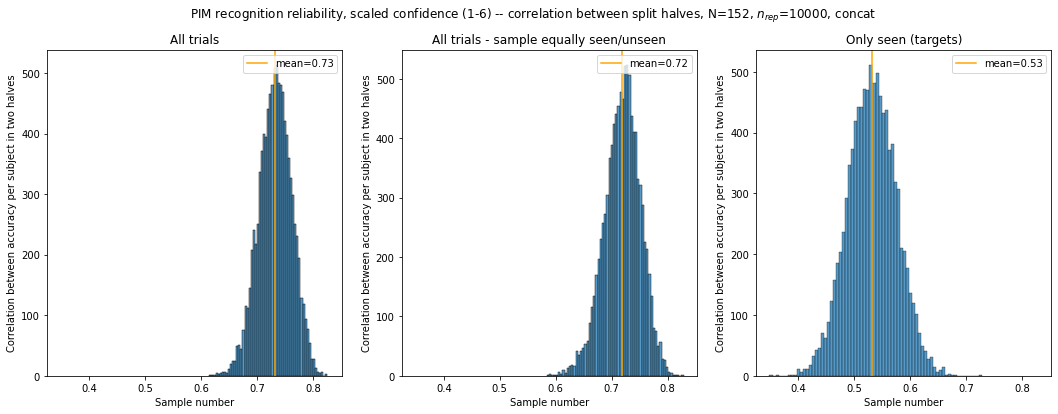

In [235]:
fig, ax = plt.subplots(1, 3, figsize=(18,6), sharex=True)

plot_correlation_hist(PIM_recog_concat_all_conf_scaled_array_corr, ax[0])
plot_correlation_hist(PIM_recog_concat_all_fair_conf_scaled_array_corr, ax[1])
plot_correlation_hist(PIM_recog_concat_seen_conf_scaled_array_corr, ax[2])

ax[0].set_title('All trials')
ax[1].set_title('All trials - sample equally seen/unseen')
ax[2].set_title('Only seen (targets)')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")


plt.suptitle(f"PIM recognition reliability, scaled confidence (1-6) -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}, concat")

# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_concat_scaled_conf_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PIM_recog_concat_scaled_conf_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [236]:
# save only if we run it
if 'PIM_MC_array_corr' in locals():
    pd.DataFrame({
    #     "PIM_overall_correlation" : PIM_array_corr,
        "PIM_MC_hobby" :     PIM_MC_array_corr[0],
        "PIM_MC_vice" :      PIM_MC_array_corr[1],
        "PIM_MC_country" :   PIM_MC_array_corr[2],
        "PIM_MC_code_name" : PIM_MC_array_corr[3],
        "PIM_MC": PIM_MC_all_array_corr,
        "PIM_recog_all": PIM_recog_all_acc_array_corr,
        "PIM_recog_all_equal_sample": PIM_recog_all_fair_acc_array_corr,
        "PIM_recog_seen": PIM_recog_seen_acc_array_corr,
        "PIM_recog_scaled_conf_all": PIM_recog_all_conf_scaled_array_corr,
        "PIM_recog_scaled_conf_all_equal_sample": PIM_recog_all_fair_conf_scaled_array_corr,
        "PIM_recog_scaled_conf_seen": PIM_recog_seen_conf_scaled_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "PIM_reliability-method-Michal.csv"), index=False)
    print("saved original data")
    
# standalone
if 'PIM_MC_stand_array_corr' in locals():
    pd.DataFrame({
    #     "PIM_overall_correlation" : PIM_array_corr,
        "PIM_MC_hobby" :     PIM_MC_stand_array_corr[0],
        "PIM_MC_vice" :      PIM_MC_stand_array_corr[1],
        "PIM_MC_country" :   PIM_MC_stand_array_corr[2],
        "PIM_MC_code_name" : PIM_MC_stand_array_corr[3],
        "PIM_MC": PIM_MC_stand_all_array_corr,
        "PIM_recog_all": PIM_recog_stand_all_acc_array_corr,
        "PIM_recog_all_equal_sample": PIM_recog_stand_all_fair_acc_array_corr,
        "PIM_recog_seen": PIM_recog_stand_seen_acc_array_corr,
        "PIM_recog_scaled_conf_all": PIM_recog_stand_all_conf_scaled_array_corr,
        "PIM_recog_scaled_conf_all_equal_sample": PIM_recog_stand_all_fair_conf_scaled_array_corr,
        "PIM_recog_scaled_conf_seen": PIM_recog_stand_seen_conf_scaled_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "PIM_reliability_standalone-method-Michal.csv"), index=False)
    print("saved standalone")
    
# both of them
if 'PIM_MC_concat_array_corr' in locals():
    pd.DataFrame({
    #     "PIM_overall_correlation" : PIM_array_corr,
        "PIM_MC_hobby" :     PIM_MC_concat_array_corr[0],
        "PIM_MC_vice" :      PIM_MC_concat_array_corr[1],
        "PIM_MC_country" :   PIM_MC_concat_array_corr[2],
        "PIM_MC_code_name" : PIM_MC_concat_array_corr[3],
        "PIM_MC": PIM_MC_concat_all_array_corr,
        "PIM_recog_all": PIM_recog_concat_all_acc_array_corr,
        "PIM_recog_all_equal_sample": PIM_recog_concat_all_fair_acc_array_corr,
        "PIM_recog_seen": PIM_recog_concat_seen_acc_array_corr,
        "PIM_recog_scaled_conf_all": PIM_recog_concat_all_conf_scaled_array_corr,
        "PIM_recog_scaled_conf_all_equal_sample": PIM_recog_concat_all_fair_conf_scaled_array_corr,
        "PIM_recog_scaled_conf_seen": PIM_recog_concat_seen_conf_scaled_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "PIM_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat data")  

saved original data
saved standalone
saved concat data


In [237]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('PIM').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "PIM_MC": [n_trials_dict[f"PIM_MC{ver}"]],
            "PIM_MC_hobby": [n_trials_dict[f"PIM_MC_hobby{ver}"]],
            "PIM_MC_vice": [n_trials_dict[f"PIM_MC_vice{ver}"]],
            "PIM_MC_country": [n_trials_dict[f"PIM_MC_country{ver}"]],
            "PIM_MC_code_name": [n_trials_dict[f"PIM_MC_code_name{ver}"]],
            "PIM_recog": [n_trials_dict[f"PIM_recog{ver}"]],
            "PIM_recog_scaled_conf": [n_trials_dict[f"PIM_recog_scaled_conf{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [238]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["PIM_MC", "PIM_MC_hobby", "PIM_MC_vice", "PIM_MC_country", "PIM_MC_code_name", "PIM_recog", "PIM_recog_scaled_conf"],
        "num_trials": [n_trials_dict[f"PIM_MC{ver}"], n_trials_dict[f"PIM_MC_hobby{ver}"], n_trials_dict[f"PIM_MC_vice{ver}"], n_trials_dict[f"PIM_MC_country{ver}"], n_trials_dict[f"PIM_MC_code_name{ver}"], n_trials_dict[f"PIM_recog{ver}"], n_trials_dict[f"PIM_recog_scaled_conf{ver}"]],
        "reliability_mean": [eval(f"PIM_MC{ver}_all_array_corr").mean(), eval(f"PIM_MC{ver}_array_corr[0]").mean(), eval(f"PIM_MC{ver}_array_corr[1]").mean(), eval(f"PIM_MC{ver}_array_corr[2]").mean(), eval(f"PIM_MC{ver}_array_corr[3]").mean(), eval(f"PIM_recog{ver}_all_acc_array_corr").mean(), eval(f"PIM_recog{ver}_all_conf_scaled_array_corr").mean()],
        "reliability_std":  [eval(f"PIM_MC{ver}_all_array_corr").std() , eval(f"PIM_MC{ver}_array_corr[0]").std() , eval(f"PIM_MC{ver}_array_corr[1]").std() , eval(f"PIM_MC{ver}_array_corr[2]").std() , eval(f"PIM_MC{ver}_array_corr[3]").std() , eval(f"PIM_recog{ver}_all_acc_array_corr").std() , eval(f"PIM_recog{ver}_all_conf_scaled_array_corr").std() ],
        "version": 7*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"PIM_MC{ver}"], n_subj_dict[f"PIM_MC_hobby{ver}"], n_subj_dict[f"PIM_MC_vice{ver}"], n_subj_dict[f"PIM_MC_country{ver}"], n_subj_dict[f"PIM_MC_code_name{ver}"], n_subj_dict[f"PIM_recog{ver}"], n_subj_dict[f"PIM_recog_scaled_conf{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0   CCMT_overall_correlation          72          0.744839         0.021953   
1                CCMT_stage1          18          0.430841         0.038396   
2                CCMT_stage2          30          0.586765         0.031072   
3                CCMT_stage3          24          0.545496         0.031030   
4   CCMT_overall_correlation          72          0.770198         0.024802   
..                       ...         ...               ...              ...   
2                PIM_MC_vice          48          0.821766         0.022809   
3             PIM_MC_country          48          0.827384         0.021083   
4           PIM_MC_code_name          48          0.849333         0.021090   
5                  PIM_recog          96          0.626908         0.036043   
6      PIM_recog_scaled_conf          96          0.732269         0.029319   

   version  num_subjects  
0      NaN           243  
1      NaN           243  
2      NaN           243  
3      NaN           243  
4    stand           160  
..     ...           ...  
2   concat           152  
3   concat           152  
4   concat           152  
5   concat           152  
6   concat           152  

[91 rows x 6 columns]

## PGNG
[top](#top)

### Prepare and process PGNG
[top](#top)

Note the following:

* block 1 = practice (just press for target, 2 targets)
* block 2 = level 2 (two target context based)
* block 3 = level 1 (just press for target with 3 targets)
* block 4 = level 3 (three target context based)

We compute the following measures per block:
* level prac - id target (new addition)*
  * PCTT (percent correct target trials) = correct target responses / all potential target responses*
* level 1 - id target
  * PCTT (percent correct target trials) = correct target responses / all potential target responses
* level 2 - two target context based
  * PCTT (percent correct target trials) = correct target responses / all potential target responses
  * PCIT (percent correct inhibitory trials) = correct inhibitory trials/ all potential inhibitory trials
* level 3 - three target context based
  * PCTT (percent correct target trials) = correct target responses / all potential target responses
  * PCIT (percent correct inhibitory trials) = correct inhibitory trials/ all potential inhibitory trials
  

* RT is probably neither `duration` nor `response_time` and I don't know what it is.
    * RT is `reaction_time - time_show` as the screen does not progress after they push a button and it waits until it times out (or something else) so we want the time of their answer - the time when the screen was displayed.
  
Only responses to targets `r, s, t` are counted since we care if they answer to what they should and not to all the other trials.  

Notice that some responses are in capital letters so they need to be converted.

#### Set 2
[top](#top)

Basically the same as set 1 except: 
* here the `x,y,z` keys are used instead of `r,s,t` 
* the blocks are named differently. `6 -> 1, 7 -> 2, 9 -> 3, 10 -> 4`
* the `correct_response` and `correct_resp` columns are already merged.
* the number of trials differ, in the original there is 888, here there is 996. For the trials we care about we had 142 before and 159 now. The only difference is in `block 3` with `43` trials instead of `26` as it should. By looking at the code, it looks like the csv file with the trials contained more trials but is the same as the *Set 1* until the 168th trial meaning we could just cut it there and use the same data.

### Run split halves PGNG
[top](#top)

---

NOTE
--
the original version was without the first level, ie. it didn't have the practise trials. Now (25.2. 2023) they were added back

#### Overall accuracy PGNG

In [239]:
# define manually num of trials
n_trials_per_form = 142#-26 # dropping the first level

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original data
[top](#top)

In [241]:
# load only relevant columns
df_PGNG = pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data.csv"), 
                      usecols=["userID", "block", "correct", "inhibitory", "RT"])


# # drop the first block since that is practise --> PGNG_prac_PCTT
# df_PGNG = df_PGNG[df_PGNG["block"]!=1]

print(f"Running first study with total {df_PGNG.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
df_PGNG.userID.value_counts()[df_PGNG.userID.value_counts()>n_trials_per_form]#.keys()

Running first study with total 237 participants.


Series([], Name: userID, dtype: int64)

In [242]:
df_PGNG.userID.value_counts()[df_PGNG.userID.value_counts()<n_trials_per_form]#.keys()

Series([], Name: userID, dtype: int64)

In [243]:
# num of subjects
N = len(df_PGNG.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PGNG, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["PGNG"] = total_n_trials
# and subjects
n_subj_dict["PGNG"] = N


# define corr array
PGNG_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_PGNG.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 142#-26

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_array_corr[i] = df_PGNG_first.groupby('userID').correct.mean().corr(df_PGNG_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.88 s per 100
# 80.78 s (1.35 min) per 10 000

Total number of trials is 142.
Taking 71 trials.
Process took: 42.54 s which is 0.71 min.


Text(0.5, 1.0, 'PGNG reliability -- correlation between split halves,\nN=237, $n_{rep}$=10000')

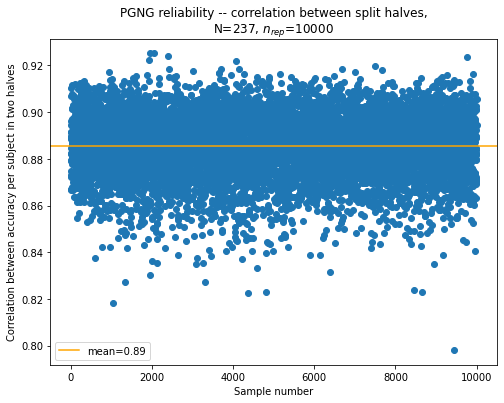

In [244]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(PGNG_array_corr, ax)

plt.title(f"PGNG reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'PGNG reliability -- correlation between split halves,\nN=237, $n_{rep}$=10000')

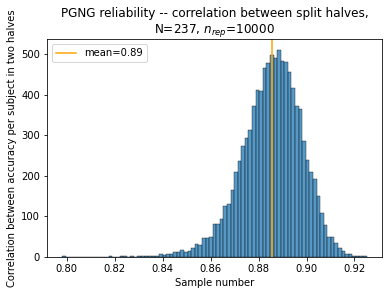

In [245]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_array_corr, ax)

plt.title(f"PGNG reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second standalone version

In [246]:
# load only relevant columns
df_PGNG_stand = pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data_rep.csv"), 
                      usecols=["userID", "block", "correct", "inhibitory", "RT"])


# drop the first block since that is practise --> PGNG_prac_PCTT
# df_PGNG_stand = df_PGNG_stand[df_PGNG_stand["block"]!=1]

print(f"Running first study with total {df_PGNG_stand.userID.unique().size} participants.")

# should be empty -- test if people don't have more than 1 entry
print(df_PGNG_stand.userID.value_counts()[df_PGNG_stand.userID.value_counts()>n_trials_per_form])#.keys()
print(df_PGNG_stand.userID.value_counts()[df_PGNG_stand.userID.value_counts()<n_trials_per_form])

Running first study with total 159 participants.
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [247]:
# num of subjects
N = len(df_PGNG_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PGNG_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["PGNG_stand"] = total_n_trials
# and subjects
n_subj_dict["PGNG_stand"] = N


# define corr array
PGNG_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_PGNG_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_stand_array_corr[i] = df_PGNG_first.groupby('userID').correct.mean().corr(df_PGNG_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.3 s per 100
# 33 s (0.6 min) per 10 000

Total number of trials is 142.
Taking 71 trials.
Process took: 35.11 s which is 0.59 min.


Text(0.5, 1.0, 'PGNG reliability -- correlation between split halves,\nN=159, $n_{rep}$=10000, $n_{trials}$=142 -> 1 form(s)')

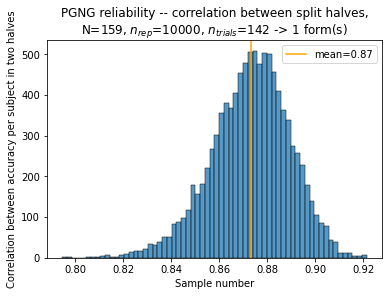

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_stand_array_corr, ax)

plt.title(f"PGNG reliability -- correlation between split halves,\nN={df_PGNG_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_PGNG_stand.userID.value_counts()[0]} -> {df_PGNG_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


#### Run overlap PGNG score
[top](#top)

In [249]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "PGNG-cleaned_data_rep.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_PGNG_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'PGNG-cleaned_data.csv')),
    pd.read_csv(os.path.join(csv_clean_data_path, 'PGNG-cleaned_data_rep.csv')),
])

# take only the full data
df_PGNG_concat = df_PGNG_concat[df_PGNG_concat["userID"].isin(shared_participants)].reset_index(drop=True)

# # drop the first block
# df_PGNG_concat = df_PGNG_concat[df_PGNG_concat["block"]!=1]

# should be empty -- test if people don't have more than 1 entry
print(df_PGNG_concat.userID.value_counts()[df_PGNG_concat.userID.value_counts()>2*n_trials_per_form])#.keys()

Running all replicate studies with total 152 participants.
Series([], Name: userID, dtype: int64)


In [250]:
# num of subjects
N = len(df_PGNG_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_PGNG_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["PGNG_concat"] = total_n_trials
# and subjects
n_subj_dict["PGNG_concat"] = N

# define corr array
PGNG_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_PGNG_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_concat_array_corr[i] = df_PGNG_first.groupby('userID').correct.mean().corr(df_PGNG_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.42 s per 100
# 43 s (0.7 min) per 10 000

Total number of trials is 284.
Taking 142 trials.
Process took: 50.35 s which is 0.84 min.


Text(0.5, 1.0, 'PGNG reliability -- correlation between split halves, concat,\nN=152, $n_{rep}$=10000, $n_{trials}$=284 -> 2 form(s)')

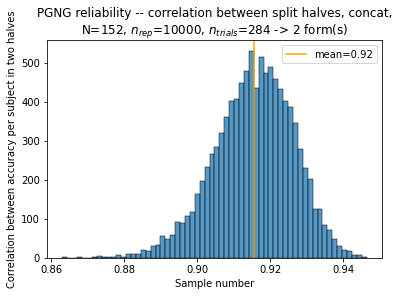

In [251]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_concat_array_corr, ax)

plt.title(f"PGNG reliability -- correlation between split halves, concat,\nN={df_PGNG_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_PGNG_concat.userID.value_counts()[0]} -> {df_PGNG_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_concat_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_reliability_concat_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Inhibitory trials -- PCIT

* [top](#top)
* [this section](#Overall-accuracy-PGNG)

In [252]:
# inhibitory
inhib_blocks = [2,4]

n_trials_inhib = [12,13]


# define the df
df_inhib = df_PGNG[(df_PGNG["inhibitory"].astype(bool))&(df_PGNG["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCIT_array_corr = np.zeros((len(inhib_blocks),n_repeats))
    
# start the timer
start = time.time()

# I have to do a loop over the two blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for j, block in enumerate(inhib_blocks):
    print(f"Inhibitory block {block}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_inhib.loc[df_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")    

    # check that it's possible
    assert n_trials <= n_trials_inhib[j]//2
    # check if all people have the same number of trials
    assert (df_sort["userID"].value_counts()==n_trials_inhib[j]).all()
    
    # save the num_trials
    n_trials_dict[f"PGNG_PCIT_l{j+2}"] = total_n_trials
    # and subjects
    n_subj_dict[f"PGNG_PCIT_l{j+2}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PGNG_PCIT_array_corr[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                    (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 101.98 s (1.7 min) per 10 000

Inhibitory block 2
Total number of trials is 12.
Taking 6 trials.
Inhibitory block 4
Total number of trials is 13.
Taking 6 trials.
Process took: 48.06 s which is 0.80 min.


Text(0.5, 0.98, 'PGNG PCIT reliability -- correlation between split halves, N=237, $n_{rep}$=10000')

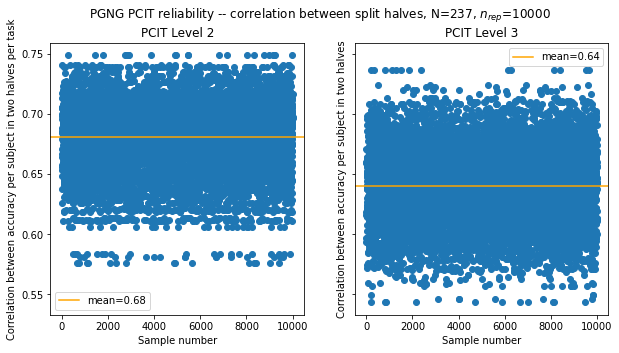

In [253]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

for i, ax in enumerate(axs.flatten()):
    plot_correlation_scatter(PGNG_PCIT_array_corr[i], ax)

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].set_title("PCIT Level 2")
axs[1].set_title("PCIT Level 3")

plt.suptitle(f"PGNG PCIT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 0.98, 'PGNG PCIT reliability -- correlation between split halves, N=237, $n_{rep}$=10000')

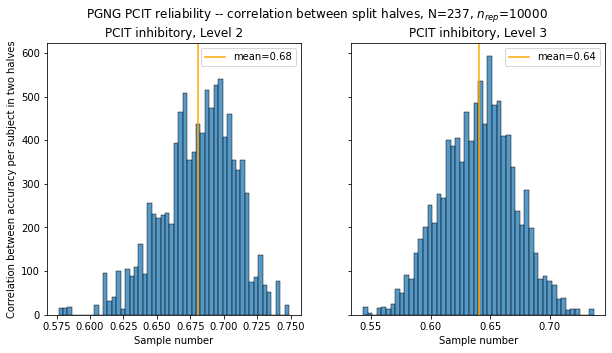

In [254]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

for i, ax in enumerate(axs.flatten()):
    plot_correlation_hist(PGNG_PCIT_array_corr[i], ax)

axs[0].set_title("PCIT inhibitory, Level 2")
axs[1].set_title("PCIT inhibitory, Level 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")


plt.suptitle(f"PGNG PCIT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

##### both levels together
[top](#top)

In [255]:
# inhibitory
inhib_blocks = [2,4]

# define the df
df_inhib = df_PGNG[(df_PGNG["inhibitory"].astype(bool))&(df_PGNG["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCIT_all_levels_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# max number of trials
total_n_trials = check_df_get_numbers(df_inhib, N)

n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")    

# check that it's possible
assert n_trials <= total_n_trials//2
# check if all people have the same number of trials
assert df_inhib["userID"].value_counts().unique().size == 1

# save the num_trials
n_trials_dict["PGNG_PCIT"] = total_n_trials
# and subjects
n_subj_dict["PGNG_PCIT"] = N

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_inhib, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_PCIT_all_levels_array_corr[i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 28 s (0.5 min) per 10 000

Total number of trials is 25.
Taking 12 trials.
Process took: 24.99 s which is 0.42 min.


Text(0.5, 1.0, 'PGNG PCIT reliability -- correlation between split halves, N=237, $n_{rep}$=10000')

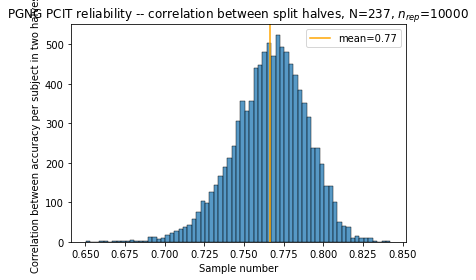

In [256]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_PCIT_all_levels_array_corr, ax)

plt.title(f"PGNG PCIT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the standalone version

In [257]:
# inhibitory
inhib_blocks = [2,4]

n_trials_inhib = [12,13]


# define the df
df_inhib = df_PGNG_stand[(df_PGNG_stand["inhibitory"].astype(bool))&(df_PGNG_stand["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCIT_stand_array_corr = np.zeros((len(inhib_blocks),n_repeats))
    
# start the timer
start = time.time()

# I have to do a loop over the two blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for j, block in enumerate(inhib_blocks):
    print(f"Inhibitory block {block}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_inhib.loc[df_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")    

    # check that it's possible
    assert n_trials <= n_trials_inhib[j]//2
    # check if all people have the same number of trials
    assert (df_sort["userID"].value_counts()==n_trials_inhib[j]).all()
    
    # save the num_trials
    n_trials_dict[f"PGNG_stand_PCIT_l{j+2}"] = total_n_trials
    # and subjects
    n_subj_dict[f"PGNG_stand_PCIT_l{j+2}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PGNG_PCIT_stand_array_corr[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                    (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 44 s (0.9 min) per 10 000

Inhibitory block 2
Total number of trials is 12.
Taking 6 trials.
Inhibitory block 4
Total number of trials is 13.
Taking 6 trials.
Process took: 44.33 s which is 0.74 min.


##### both levels together
[top](#top)

In [258]:
# inhibitory
inhib_blocks = [2,4]

# define the df
df_inhib = df_PGNG_stand[(df_PGNG_stand["inhibitory"].astype(bool))&(df_PGNG_stand["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCIT_stand_all_levels_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# max number of trials
total_n_trials = check_df_get_numbers(df_inhib, N)

n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")    

# check that it's possible
assert n_trials <= total_n_trials//2
# check if all people have the same number of trials
assert df_inhib["userID"].value_counts().unique().size == 1

# save the num_trials
n_trials_dict["PGNG_stand_PCIT"] = total_n_trials
# and subjects
n_subj_dict["PGNG_stand_PCIT"] = N

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_inhib, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_PCIT_stand_all_levels_array_corr[i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 27 s (.5 min) per 10 000

Total number of trials is 25.
Taking 12 trials.
Process took: 24.49 s which is 0.41 min.


Text(0.5, 1.0, 'PGNG PCIT standalone reliability\ncorrelation between split halves, N=159, $n_{rep}$=10000')

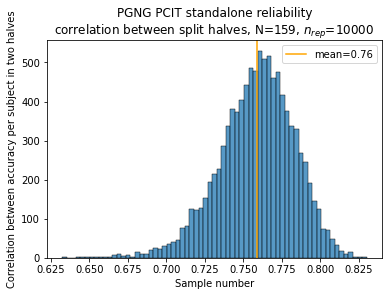

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_PCIT_stand_all_levels_array_corr, ax)

plt.title(f"PGNG PCIT standalone reliability\ncorrelation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap PGNG PCIT
[top](#top)

In [260]:
# inhibitory
inhib_blocks = [2,4]

n_trials_inhib = 2*np.array([12,13])


# define the df
df_inhib = df_PGNG_concat[(df_PGNG_concat["inhibitory"].astype(bool))&(df_PGNG_concat["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCIT_concat_array_corr = np.zeros((len(inhib_blocks),n_repeats))
    
# start the timer
start = time.time()

# I have to do a loop over the two blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for j, block in enumerate(inhib_blocks):
    print(f"Inhibitory block {block}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_inhib.loc[df_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")    

    # check that it's possible
    assert n_trials <= n_trials_inhib[j]//2
    # check if all people have the same number of trials
    assert (df_sort["userID"].value_counts()==n_trials_inhib[j]).all()
    
    # save the num_trials
    n_trials_dict[f"PGNG_concat_PCIT_l{j+2}"] = total_n_trials
    # and subjects
    n_subj_dict[f"PGNG_concat_PCIT_l{j+2}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PGNG_PCIT_concat_array_corr[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                    (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.03 s per 100
# 58 s (1 min) per 10 000

Inhibitory block 2
Total number of trials is 24.
Taking 12 trials.
Inhibitory block 4
Total number of trials is 26.
Taking 13 trials.
Process took: 46.29 s which is 0.77 min.


Text(0.5, 1.05, 'PGNG reliability PCIT -- correlation between split halves, concat,\nN=152, $n_{rep}$=10000, $n_{trials}$=284 -> 2 form(s)')

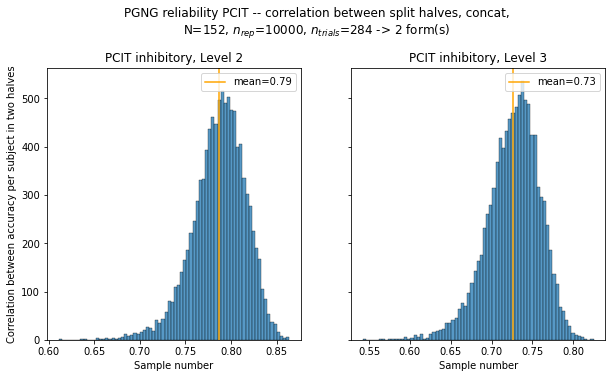

In [261]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True)

for i, ax in enumerate(axs.flatten()):
    plot_correlation_hist(PGNG_PCIT_concat_array_corr[i], ax)

axs[0].set_title("PCIT inhibitory, Level 2")
axs[1].set_title("PCIT inhibitory, Level 3")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")


plt.suptitle(f"PGNG reliability PCIT -- correlation between split halves, concat,\nN={df_PGNG_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_PGNG_concat.userID.value_counts()[0]} -> {df_PGNG_concat.userID.value_counts()[0]//n_trials_per_form} form(s)",
            y=1.05)


# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

##### both levels together
[top](#top)

In [262]:
# inhibitory
inhib_blocks = [2,4]

# define the df
df_inhib = df_PGNG_concat[(df_PGNG_concat["inhibitory"].astype(bool))&(df_PGNG_concat["block"].isin([2,4]))].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_inhib.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCIT_concat_all_levels_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# max number of trials
total_n_trials = check_df_get_numbers(df_inhib, N)

n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")    

# check that it's possible
assert n_trials <= total_n_trials//2
# check if all people have the same number of trials
assert df_inhib["userID"].value_counts().unique().size == 1

# save the num_trials
n_trials_dict["PGNG_concat_PCIT"] = total_n_trials
# and subjects
n_subj_dict["PGNG_concat_PCIT"] = N

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_inhib, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_PCIT_concat_all_levels_array_corr[i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 31 s (0.5 min) per 10 000

Total number of trials is 50.
Taking 25 trials.
Process took: 26.95 s which is 0.45 min.


Text(0.5, 1.0, 'PGNG PCIT concat reliability\ncorrelation between split halves, N=152, $n_{rep}$=10000')

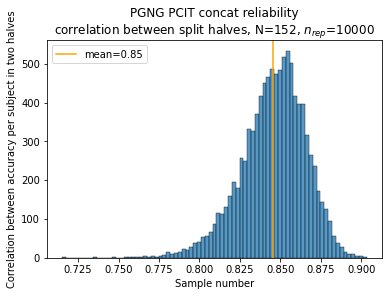

In [263]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_PCIT_concat_all_levels_array_corr, ax)

plt.title(f"PGNG PCIT concat reliability\ncorrelation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCIT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### PGNG PCTT
* [top](#top)
* [this section](#Overall-accuracy-PGNG)

As of 25.1.2023, we also compute PCTT for prac level

In [264]:
# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
n_trials_all = [26, 26, 45, 45]
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG[~df_PGNG["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCTT_array_corr = np.zeros((len(blocks),n_repeats))
    
# start the timer
start = time.time()

# I have to do a loop over the three blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for j, block in enumerate(blocks):
    print(f"Block {block}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_non_inhib.loc[df_non_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")    

    # check that it's possible
    assert n_trials <= n_trials_all[j]//2
    # check if all people have the same number of trials
#     assert (df_sort["userID"].value_counts()==n_trials_all[j]).all()
    assert df_sort["userID"].value_counts().unique().size==1
    
    # save the num_trials
    if len(blocks) == 3:
        n_trials_dict[f"PGNG_PCTT_l{j+1}"] = total_n_trials
        # and subjects
        n_subj_dict[f"PGNG_PCTT_l{j+1}"] = N
    elif len(blocks) == 4: # 0 = prac
        n_trials_dict[f"PGNG_PCTT_l{j}"] = total_n_trials
        # and subjects
        n_subj_dict[f"PGNG_PCTT_l{j}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PGNG_PCTT_array_corr[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                    (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 2.01 s per 100
# 177.15 s (2.95 min) per 10 000

Block 1
Total number of trials is 26.
Taking 13 trials.
Block 3
Total number of trials is 26.
Taking 13 trials.
Block 2
Total number of trials is 33.
Taking 16 trials.
Block 4
Total number of trials is 32.
Taking 16 trials.
Process took: 166.99 s which is 2.78 min.


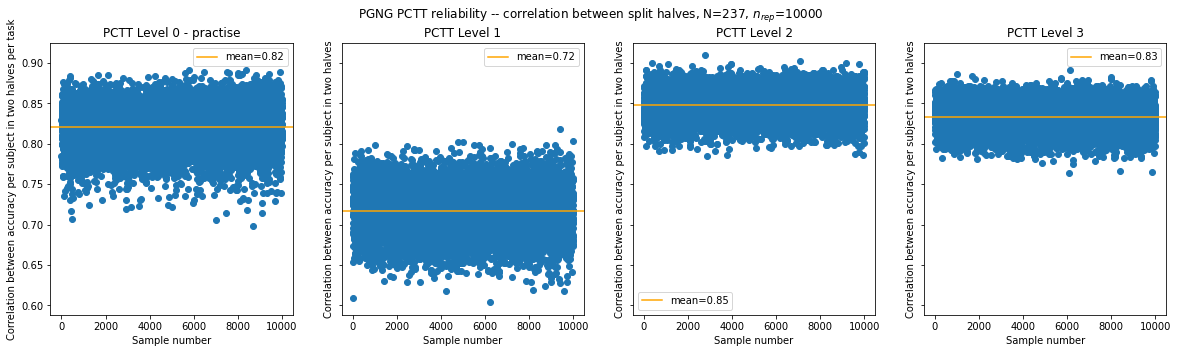

In [265]:
if len(blocks) == 3:
    fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

    for i, ax in enumerate(axs.flatten()):
        plot_correlation_scatter(PGNG_PCTT_array_corr[i], ax)

    axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    axs[0].set_title("PCTT Level 1")
    axs[1].set_title("PCTT Level 2")
    axs[2].set_title("PCTT Level 3")

    plt.suptitle(f"PGNG PCTT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

elif len(blocks) == 4:
    fig, axs = plt.subplots(1, 4, figsize=(20,5), sharey=True)

    for i, ax in enumerate(axs.flatten()):
        plot_correlation_scatter(PGNG_PCTT_array_corr[i], ax)

    axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    axs[0].set_title("PCTT Level 0 - practise")
    axs[1].set_title("PCTT Level 1")
    axs[2].set_title("PCTT Level 2")
    axs[3].set_title("PCTT Level 3")

    plt.suptitle(f"PGNG PCTT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")


    
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')


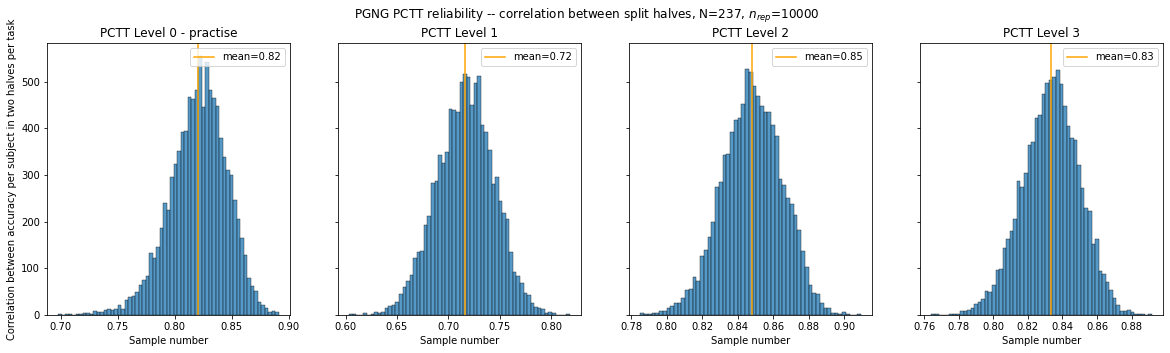

In [267]:
if len(blocks) == 3:
    
    fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

    for i, ax in enumerate(axs.flatten()):
        plot_correlation_hist(PGNG_PCTT_array_corr[i], ax)

    axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    axs[0].set_title("PCTT Level 1")
    axs[1].set_title("PCTT Level 2")
    axs[2].set_title("PCTT Level 3")

    # axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    axs[0].legend(loc="upper right")
    axs[1].legend(loc="upper right")
    axs[2].legend(loc="upper right")


    plt.suptitle(f"PGNG PCTT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

elif len(blocks) == 4:
    fig, axs = plt.subplots(1, 4, figsize=(20,5), sharey=True)

    for i, ax in enumerate(axs.flatten()):
        plot_correlation_hist(PGNG_PCTT_array_corr[i], ax)
        axs[i].legend(loc="upper right")

    axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    axs[0].set_title("PCTT Level 0 - practise")
    axs[1].set_title("PCTT Level 1")
    axs[2].set_title("PCTT Level 2")
    axs[3].set_title("PCTT Level 3")

    # axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    plt.suptitle(f"PGNG PCTT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

    
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

##### all levels together
[top](#top)

In [268]:
# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
# n_trials_all = [26, 26, 45, 45]
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG[~df_PGNG["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCTT_all_levels_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# max number of trials
total_n_trials = check_df_get_numbers(df_non_inhib, N)

n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")    

# check that it's possible
assert n_trials <= total_n_trials//2
# check if all people have the same number of trials
assert df_non_inhib["userID"].value_counts().unique().size==1

# save the num_trials
n_trials_dict[f"PGNG_PCTT"] = total_n_trials
# and subjects
n_subj_dict[f"PGNG_PCTT"] = N

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_non_inhib, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_PCTT_all_levels_array_corr[i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 47.15 s (0.8 min) per 10 000

Total number of trials is 117.
Taking 58 trials.
Process took: 63.98 s which is 1.07 min.


Text(0.5, 1.0, 'PGNG PCTT reliability -- correlation between split halves, N=237, $n_{rep}$=10000')

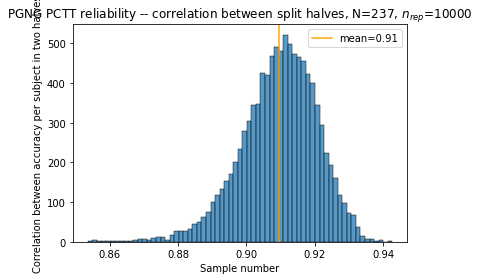

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_PCTT_all_levels_array_corr, ax)

plt.title(f"PGNG PCTT reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run standalone

In [270]:
# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
n_trials_all = [26, 26, 45, 45]
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG_stand[~df_PGNG_stand["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG_stand.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCTT_stand_array_corr = np.zeros((len(blocks),n_repeats))
    
# start the timer
start = time.time()

# I have to do a loop over the three blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for j, block in enumerate(blocks):
    print(f"Block {block}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_non_inhib.loc[df_non_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")    

    # check that it's possible
    assert n_trials <= n_trials_all[j]//2
    # check if all people have the same number of trials
#     assert (df_sort["userID"].value_counts()==n_trials_all[j]).all()
    assert df_sort["userID"].value_counts().unique().size==1
    
    # save the num_trials
    if len(blocks) == 3:
        n_trials_dict[f"PGNG_stand_PCTT_l{j+1}"] = total_n_trials
        # and subjects
        n_subj_dict[f"PGNG_stand_PCTT_l{j+1}"] = N
    elif len(blocks) == 4:
        n_trials_dict[f"PGNG_stand_PCTT_l{j}"] = total_n_trials
        # and subjects
        n_subj_dict[f"PGNG_stand_PCTT_l{j}"] = N


    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PGNG_PCTT_stand_array_corr[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                    (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 2.01 s per 100
# 88 s (1.5 min) per 10 000

Block 1
Total number of trials is 26.
Taking 13 trials.
Block 3
Total number of trials is 26.
Taking 13 trials.
Block 2
Total number of trials is 33.
Taking 16 trials.
Block 4
Total number of trials is 32.
Taking 16 trials.
Process took: 162.57 s which is 2.71 min.


##### all levels together
[top](#top)

In [271]:
# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
# n_trials_all = [26, 26, 45, 45]
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG_stand[~df_PGNG_stand["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG_stand.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCTT_stand_all_levels_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# max number of trials
total_n_trials = check_df_get_numbers(df_non_inhib, N)

n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")    

# check that it's possible
assert n_trials <= total_n_trials//2
# check if all people have the same number of trials
assert df_non_inhib["userID"].value_counts().unique().size==1

# save the num_trials
n_trials_dict[f"PGNG_stand_PCTT"] = total_n_trials
# and subjects
n_subj_dict[f"PGNG_stand_PCTT"] = N

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_non_inhib, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_PCTT_stand_all_levels_array_corr[i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 41 s (0.7 min) per 10 000

Total number of trials is 117.
Taking 58 trials.
Process took: 58.17 s which is 0.97 min.


Text(0.5, 1.0, 'PGNG PCTT standalone reliability\ncorrelation between split halves, N=159, $n_{rep}$=10000')

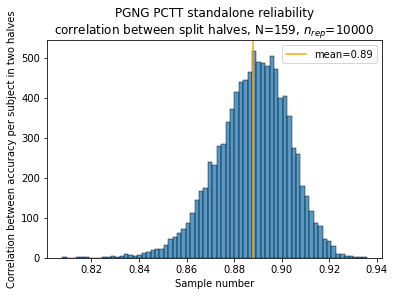

In [272]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_PCTT_stand_all_levels_array_corr, ax)

plt.title(f"PGNG PCTT standalone reliability\ncorrelation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap PGNG PCTT
[top](#top)

In [273]:
# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
n_trials_all = 2*np.array([26, 26, 45, 45])
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG_concat[~df_PGNG_concat["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG_concat.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCTT_concat_array_corr = np.zeros((len(blocks),n_repeats))
    
# start the timer
start = time.time()

# I have to do a loop over the three blocks since they do not have the same number of trials. Otherwise it could
# be done using two series -- num_trials and correct_inhib and just divide them. It's slow but not that slow
for j, block in enumerate(blocks):
    print(f"Block {block}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_non_inhib.loc[df_non_inhib["block"]==block, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")    

    # check that it's possible
    assert n_trials <= n_trials_all[j]//2
    # check if all people have the same number of trials
#     assert (df_sort["userID"].value_counts()==n_trials_all[j]).all()
    assert df_sort["userID"].value_counts().unique().size==1
    
    # save the num_trials
    if len(blocks) == 3:
        n_trials_dict[f"PGNG_concat_PCTT_l{j+1}"] = total_n_trials
        # and subjects
        n_subj_dict[f"PGNG_concat_PCTT_l{j+1}"] = N
    elif len(blocks) == 4:
        n_trials_dict[f"PGNG_concat_PCTT_l{j}"] = total_n_trials
        # and subjects
        n_subj_dict[f"PGNG_concat_PCTT_l{j}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_PGNG_first = None
        df_PGNG_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        PGNG_PCTT_concat_array_corr[j,i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                    (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                           method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 2.01 s per 100
# 94 s (1.6 min) per 10 000

Block 1
Total number of trials is 52.
Taking 26 trials.
Block 3
Total number of trials is 52.
Taking 26 trials.
Block 2
Total number of trials is 66.
Taking 33 trials.
Block 4
Total number of trials is 64.
Taking 32 trials.
Process took: 177.18 s which is 2.95 min.


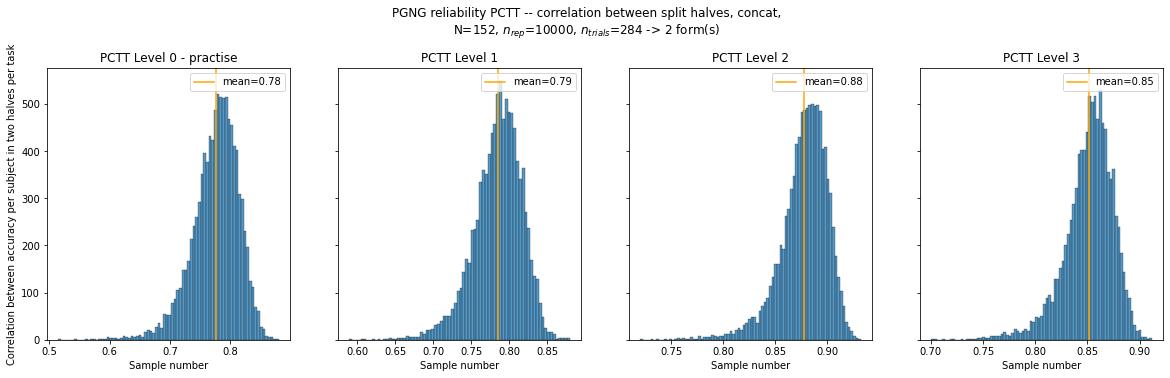

In [274]:
if len(blocks) == 3:
    fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

    for i, ax in enumerate(axs.flatten()):
        plot_correlation_hist(PGNG_PCTT_concat_array_corr[i], ax)
        axs[i].set_title(f"PCTT Level {i+1}")
        axs[i].legend(loc="upper right")

    axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    plt.suptitle(f"PGNG reliability PCTT -- correlation between split halves, concat,\nN={df_PGNG_concat.userID.unique().size}, "+"$n_{rep}$"+\
              f"={n_repeats}"+", $n_{trials}$"+f"={df_PGNG_concat.userID.value_counts()[0]} -> {df_PGNG_concat.userID.value_counts()[0]//n_trials_per_form} form(s)",
                y=1.05)

elif len(blocks) == 4:
    fig, axs = plt.subplots(1, 4, figsize=(20,5), sharey=True)

    for i, ax in enumerate(axs.flatten()):
        plot_correlation_hist(PGNG_PCTT_concat_array_corr[i], ax)
        axs[i].legend(loc="upper right")

    axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

    axs[0].set_title("PCTT Level 0 - practise")
    axs[1].set_title("PCTT Level 1")
    axs[2].set_title("PCTT Level 2")
    axs[3].set_title("PCTT Level 3")

    plt.suptitle(f"PGNG reliability PCTT -- correlation between split halves, concat,\nN={df_PGNG_concat.userID.unique().size}, "+"$n_{rep}$"+\
              f"={n_repeats}"+", $n_{trials}$"+f"={df_PGNG_concat.userID.value_counts()[0]} -> {df_PGNG_concat.userID.value_counts()[0]//n_trials_per_form} form(s)",
                y=1.05)
    
    
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

##### all levels together
[top](#top)

In [275]:
# NOTICE the swapped order of the blocks, it is based on the levels we want to have. See note above
# n_trials_all = [26, 26, 45, 45]
blocks = [1, 3, 2, 4] 


# define the df, select all the non-inhibitory trials
df_non_inhib = df_PGNG_concat[~df_PGNG_concat["inhibitory"].astype(bool)].sort_values(by=["userID", "block"])[["userID", "block", "correct"]].copy()

# num of subjects
N = len(df_non_inhib.userID.unique())
# check that the number of people is the same
assert N == len(df_PGNG_concat.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# define corr array
PGNG_PCTT_concat_all_levels_array_corr = np.zeros(n_repeats)
    
# start the timer
start = time.time()

# max number of trials
total_n_trials = check_df_get_numbers(df_non_inhib, N)

n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")    

# check that it's possible
assert n_trials <= total_n_trials//2
# check if all people have the same number of trials
assert df_non_inhib["userID"].value_counts().unique().size==1

# save the num_trials
n_trials_dict[f"PGNG_concat_PCTT"] = total_n_trials
# and subjects
n_subj_dict[f"PGNG_concat_PCTT"] = N

# go over iterations
for i in range(n_repeats):
    df_PGNG_first = None
    df_PGNG_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_PGNG_first, df_PGNG_second = split_dataframes_faster(df_non_inhib, total_n_trials, n_trials, N)

    # calculate correlation
    PGNG_PCTT_concat_all_levels_array_corr[i] = (df_PGNG_first.groupby('userID').correct.sum()/n_trials).corr(
                                (df_PGNG_second.groupby('userID').correct.sum()/n_trials), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 56.7 s (0.9 min) per 10 000

Total number of trials is 234.
Taking 117 trials.
Process took: 75.10 s which is 1.25 min.


Text(0.5, 1.0, 'PGNG PCTT concat reliability\ncorrelation between split halves, N=152, $n_{rep}$=10000')

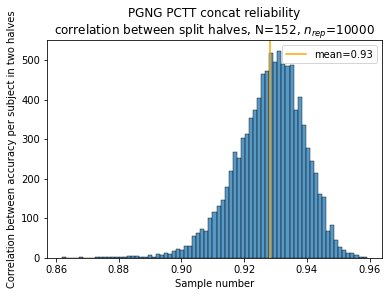

In [276]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(PGNG_PCTT_concat_all_levels_array_corr, ax)

plt.title(f"PGNG PCTT concat reliability\ncorrelation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")
# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "PGNG_PCTT_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [278]:
if len(blocks) == 3:

    # save only if we run it
    if 'PGNG_array_corr' in locals():
        pd.DataFrame({
            "PGNG_overall_correlation" : PGNG_array_corr,
            "PGNG_PCIT_correlation"    : PGNG_PCIT_all_levels_array_corr,
            "PGNG_PCIT_L1_correlation" : PGNG_PCIT_array_corr[0],
            "PGNG_PCIT_L2_correlation" : PGNG_PCIT_array_corr[1],
            "PGNG_PCTT_correlation"    : PGNG_PCTT_all_levels_array_corr,
            "PGNG_PCTT_L1_correlation" : PGNG_PCTT_array_corr[0],
            "PGNG_PCTT_L2_correlation" : PGNG_PCTT_array_corr[1],
            "PGNG_PCTT_L3_correlation" : PGNG_PCTT_array_corr[2],
        }).to_csv(os.path.join(path_reliability_results, "PGNG_reliability-method-Michal.csv"), index=False)
        print("saved original data")

    # standalone    
    if 'PGNG_stand_array_corr' in locals():
        pd.DataFrame({
            "PGNG_overall_correlation" : PGNG_stand_array_corr,
            "PGNG_PCIT_correlation"    : PGNG_PCIT_stand_all_levels_array_corr,
            "PGNG_PCIT_L1_correlation" : PGNG_PCIT_stand_array_corr[0],
            "PGNG_PCIT_L2_correlation" : PGNG_PCIT_stand_array_corr[1],
            "PGNG_PCTT_correlation"    : PGNG_PCTT_stand_all_levels_array_corr,
            "PGNG_PCTT_L1_correlation" : PGNG_PCTT_stand_array_corr[0],
            "PGNG_PCTT_L2_correlation" : PGNG_PCTT_stand_array_corr[1],
            "PGNG_PCTT_L3_correlation" : PGNG_PCTT_stand_array_corr[2],
        }).to_csv(os.path.join(path_reliability_results, "PGNG_reliability_standalone-method-Michal.csv"), index=False)
        print("saved standalone")

    # both of them    
    if 'PGNG_concat_array_corr' in locals():
        pd.DataFrame({
            "PGNG_overall_correlation" : PGNG_concat_array_corr,
            "PGNG_PCIT_correlation"    : PGNG_PCIT_concat_all_levels_array_corr,
            "PGNG_PCIT_L1_correlation" : PGNG_PCIT_concat_array_corr[0],
            "PGNG_PCIT_L2_correlation" : PGNG_PCIT_concat_array_corr[1],
            "PGNG_PCTT_correlation"    : PGNG_PCTT_concat_all_levels_array_corr,
            "PGNG_PCTT_L1_correlation" : PGNG_PCTT_concat_array_corr[0],
            "PGNG_PCTT_L2_correlation" : PGNG_PCTT_concat_array_corr[1],
            "PGNG_PCTT_L3_correlation" : PGNG_PCTT_concat_array_corr[2],
        }).to_csv(os.path.join(path_reliability_results, "PGNG_reliability_concat-method-Michal.csv"), index=False)
        print("saved concat data")
        
    ########################
elif len(blocks)==4:
    # save only if we run it
    if 'PGNG_array_corr' in locals():
        pd.DataFrame({
            "PGNG_overall_correlation" : PGNG_array_corr,
            "PGNG_PCIT_correlation"    : PGNG_PCIT_all_levels_array_corr,
            "PGNG_PCIT_L1_correlation" : PGNG_PCIT_array_corr[0],
            "PGNG_PCIT_L2_correlation" : PGNG_PCIT_array_corr[1],
            "PGNG_PCTT_correlation"    : PGNG_PCTT_all_levels_array_corr,
            "PGNG_PCTT_L0_correlation" : PGNG_PCTT_array_corr[0],
            "PGNG_PCTT_L1_correlation" : PGNG_PCTT_array_corr[1],
            "PGNG_PCTT_L2_correlation" : PGNG_PCTT_array_corr[2],
            "PGNG_PCTT_L3_correlation" : PGNG_PCTT_array_corr[3],
        }).to_csv(os.path.join(path_reliability_results, "PGNG_reliability-method-Michal.csv"), index=False)
        print("saved original data")

    # standalone    
    if 'PGNG_stand_array_corr' in locals():
        pd.DataFrame({
            "PGNG_overall_correlation" : PGNG_stand_array_corr,
            "PGNG_PCIT_correlation"    : PGNG_PCIT_stand_all_levels_array_corr,
            "PGNG_PCIT_L1_correlation" : PGNG_PCIT_stand_array_corr[0],
            "PGNG_PCIT_L2_correlation" : PGNG_PCIT_stand_array_corr[1],
            "PGNG_PCTT_correlation"    : PGNG_PCTT_stand_all_levels_array_corr,
            "PGNG_PCTT_L0_correlation" : PGNG_PCTT_stand_array_corr[0],
            "PGNG_PCTT_L1_correlation" : PGNG_PCTT_stand_array_corr[1],
            "PGNG_PCTT_L2_correlation" : PGNG_PCTT_stand_array_corr[2],
            "PGNG_PCTT_L3_correlation" : PGNG_PCTT_stand_array_corr[3],
        }).to_csv(os.path.join(path_reliability_results, "PGNG_reliability_standalone-method-Michal.csv"), index=False)
        print("saved standalone")

    # both of them    
    if 'PGNG_concat_array_corr' in locals():
        pd.DataFrame({
            "PGNG_overall_correlation" : PGNG_concat_array_corr,
            "PGNG_PCIT_correlation"    : PGNG_PCIT_concat_all_levels_array_corr,
            "PGNG_PCIT_L1_correlation" : PGNG_PCIT_concat_array_corr[0],
            "PGNG_PCIT_L2_correlation" : PGNG_PCIT_concat_array_corr[1],
            "PGNG_PCTT_correlation"    : PGNG_PCTT_concat_all_levels_array_corr,
            "PGNG_PCTT_L0_correlation" : PGNG_PCTT_concat_array_corr[0],
            "PGNG_PCTT_L1_correlation" : PGNG_PCTT_concat_array_corr[1],
            "PGNG_PCTT_L2_correlation" : PGNG_PCTT_concat_array_corr[2],
            "PGNG_PCTT_L3_correlation" : PGNG_PCTT_concat_array_corr[3],
        }).to_csv(os.path.join(path_reliability_results, "PGNG_reliability_concat-method-Michal.csv"), index=False)
        print("saved concat data")

saved original data
saved standalone
saved concat data


In [280]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
if len(blocks) == 3:
    for file, ver in zip(files, versions):
        print(f"saving {file}")
        # check if we don't have it there already
        if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('PGNG').any():
            df_num_trials = pd.read_csv(os.path.join(path_results, file))
            # append the trials and save
            df_num_trials.append(
                pd.DataFrame({
                "PGNG_overall_correlation": [n_trials_dict[f"PGNG{ver}"]],
                "PGNG_PCIT": [n_trials_dict[f"PGNG{ver}_PCIT"]],
                "PGNG_PCIT_l2": [n_trials_dict[f"PGNG{ver}_PCIT_l2"]],
                "PGNG_PCIT_l3": [n_trials_dict[f"PGNG{ver}_PCIT_l3"]],
                "PGNG_PCTT": [n_trials_dict[f"PGNG{ver}_PCTT"]],
                "PGNG_PCTT_l1": [n_trials_dict[f"PGNG{ver}_PCTT_l1"]],
                "PGNG_PCTT_l2": [n_trials_dict[f"PGNG{ver}_PCTT_l2"]],
                "PGNG_PCTT_l3": [n_trials_dict[f"PGNG{ver}_PCTT_l3"]],
            }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
            ).to_csv(os.path.join(path_results, file), index=False) 
            print(f"saved {file}\n")

elif len(blocks) == 4:
    for file, ver in zip(files, versions):
        print(f"saving {file}")
        # check if we don't have it there already
        if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('PGNG').any():
            df_num_trials = pd.read_csv(os.path.join(path_results, file))
            # append the trials and save
            df_num_trials.append(
                pd.DataFrame({
                "PGNG_overall_correlation": [n_trials_dict[f"PGNG{ver}"]],
                "PGNG_PCIT": [n_trials_dict[f"PGNG{ver}_PCIT"]],
                "PGNG_PCIT_l2": [n_trials_dict[f"PGNG{ver}_PCIT_l2"]],
                "PGNG_PCIT_l3": [n_trials_dict[f"PGNG{ver}_PCIT_l3"]],
                "PGNG_PCTT": [n_trials_dict[f"PGNG{ver}_PCTT"]],
                "PGNG_PCTT_l0": [n_trials_dict[f"PGNG{ver}_PCTT_l0"]],
                "PGNG_PCTT_l1": [n_trials_dict[f"PGNG{ver}_PCTT_l1"]],
                "PGNG_PCTT_l2": [n_trials_dict[f"PGNG{ver}_PCTT_l2"]],
                "PGNG_PCTT_l3": [n_trials_dict[f"PGNG{ver}_PCTT_l3"]],
            }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
            ).to_csv(os.path.join(path_results, file), index=False) 
            print(f"saved {file}\n")

saving tasks-num_trials.csv
saving tasks-num_trials2.csv
saving tasks-num_trials_concat.csv


In [281]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

if len(blocks) == 3:
    for ver in versions:
        df_results = df_results.append(
        pd.DataFrame({
            "Task": ["PGNG_overall_correlation", "PGNG_PCIT", "PGNG_PCIT_l2", "PGNG_PCIT_l3", "PGNG_PCTT", "PGNG_PCTT_l1", "PGNG_PCTT_l2", "PGNG_PCTT_l3",],
            "num_trials": [n_trials_dict[f"PGNG{ver}"], n_trials_dict[f"PGNG{ver}_PCIT"], n_trials_dict[f"PGNG{ver}_PCIT_l2"], n_trials_dict[f"PGNG{ver}_PCIT_l3"], n_trials_dict[f"PGNG{ver}_PCTT"] , n_trials_dict[f"PGNG{ver}_PCTT_l1"], n_trials_dict[f"PGNG{ver}_PCTT_l2"], n_trials_dict[f"PGNG{ver}_PCTT_l3"]],
            "reliability_mean": [eval(f"PGNG{ver}_array_corr").mean(), eval(f"PGNG_PCIT{ver}_all_levels_array_corr").mean(), eval(f"PGNG_PCIT{ver}_array_corr")[0].mean(), eval(f"PGNG_PCIT{ver}_array_corr")[1].mean(), eval(f"PGNG_PCTT{ver}_all_levels_array_corr").mean(), eval(f"PGNG_PCTT{ver}_array_corr")[0].mean(), eval(f"PGNG_PCTT{ver}_array_corr")[1].mean(), eval(f"PGNG_PCTT{ver}_array_corr")[2].mean()],
            "reliability_std":  [eval(f"PGNG{ver}_array_corr").std() , eval(f"PGNG_PCIT{ver}_all_levels_array_corr").std() , eval(f"PGNG_PCIT{ver}_array_corr")[0].std() , eval(f"PGNG_PCIT{ver}_array_corr")[1].std() , eval(f"PGNG_PCTT{ver}_all_levels_array_corr").std() , eval(f"PGNG_PCTT{ver}_array_corr")[0].std() , eval(f"PGNG_PCTT{ver}_array_corr")[1].std() , eval(f"PGNG_PCTT{ver}_array_corr")[2].std() ],
            "version": 8*[ver.strip('_')],
            "num_subjects": [n_subj_dict[f"PGNG{ver}"], n_subj_dict[f"PGNG{ver}_PCIT"], n_subj_dict[f"PGNG{ver}_PCIT_l2"], n_subj_dict[f"PGNG{ver}_PCIT_l3"], n_subj_dict[f"PGNG{ver}_PCTT"], n_subj_dict[f"PGNG{ver}_PCTT_l1"], n_subj_dict[f"PGNG{ver}_PCTT_l2"], n_subj_dict[f"PGNG{ver}_PCTT_l3"]],
        })
        )

elif len(blocks) == 4:
    for ver in versions:
        df_results = df_results.append(
        pd.DataFrame({
            "Task": ["PGNG_overall_correlation", "PGNG_PCIT", "PGNG_PCIT_l2", "PGNG_PCIT_l3", "PGNG_PCTT", "PGNG_PCTT_l0", "PGNG_PCTT_l1", "PGNG_PCTT_l2", "PGNG_PCTT_l3",],
            "num_trials": [n_trials_dict[f"PGNG{ver}"], n_trials_dict[f"PGNG{ver}_PCIT"],n_trials_dict[f"PGNG{ver}_PCIT_l2"], n_trials_dict[f"PGNG{ver}_PCIT_l3"], n_trials_dict[f"PGNG{ver}_PCTT"], n_trials_dict[f"PGNG{ver}_PCTT_l0"], n_trials_dict[f"PGNG{ver}_PCTT_l1"], n_trials_dict[f"PGNG{ver}_PCTT_l2"], n_trials_dict[f"PGNG{ver}_PCTT_l3"]],
            "reliability_mean": [eval(f"PGNG{ver}_array_corr").mean(), eval(f"PGNG_PCIT{ver}_all_levels_array_corr").mean(), eval(f"PGNG_PCIT{ver}_array_corr")[0].mean(), eval(f"PGNG_PCIT{ver}_array_corr")[1].mean(), eval(f"PGNG_PCTT{ver}_all_levels_array_corr").mean(), eval(f"PGNG_PCTT{ver}_array_corr")[0].mean(), eval(f"PGNG_PCTT{ver}_array_corr")[1].mean(), eval(f"PGNG_PCTT{ver}_array_corr")[2].mean(), eval(f"PGNG_PCTT{ver}_array_corr")[3].mean()],
            "reliability_std":  [eval(f"PGNG{ver}_array_corr").std() , eval(f"PGNG_PCIT{ver}_all_levels_array_corr").std() , eval(f"PGNG_PCIT{ver}_array_corr")[0].std() , eval(f"PGNG_PCIT{ver}_array_corr")[1].std() , eval(f"PGNG_PCTT{ver}_all_levels_array_corr").std() , eval(f"PGNG_PCTT{ver}_array_corr")[0].std() , eval(f"PGNG_PCTT{ver}_array_corr")[1].std() , eval(f"PGNG_PCTT{ver}_array_corr")[2].std() , eval(f"PGNG_PCTT{ver}_array_corr")[3].std() ],
            "version": 9*[ver.strip('_')],
            "num_subjects": [n_subj_dict[f"PGNG{ver}"], n_subj_dict[f"PGNG{ver}_PCIT"], n_subj_dict[f"PGNG{ver}_PCIT_l2"], n_subj_dict[f"PGNG{ver}_PCIT_l3"], n_subj_dict[f"PGNG{ver}_PCTT"], n_subj_dict[f"PGNG{ver}_PCTT_l0"], n_subj_dict[f"PGNG{ver}_PCTT_l1"], n_subj_dict[f"PGNG{ver}_PCTT_l2"], n_subj_dict[f"PGNG{ver}_PCTT_l3"]],
        })
        )
        
# save
df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0   CCMT_overall_correlation          72          0.744839         0.021953   
1                CCMT_stage1          18          0.430841         0.038396   
2                CCMT_stage2          30          0.586765         0.031072   
3                CCMT_stage3          24          0.545496         0.031030   
4   CCMT_overall_correlation          72          0.770198         0.024802   
..                       ...         ...               ...              ...   
4                  PGNG_PCTT         234          0.928146         0.010829   
5               PGNG_PCTT_l0          52          0.775737         0.038575   
6               PGNG_PCTT_l1          52          0.785069         0.031801   
7               PGNG_PCTT_l2          66          0.877413         0.023116   
8               PGNG_PCTT_l3          64          0.851311         0.023694   

   version  num_subjects  
0      NaN           243  
1      NaN           243  
2      NaN           243  
3      NaN           243  
4    stand           160  
..     ...           ...  
4   concat           152  
5   concat           152  
6   concat           152  
7   concat           152  
8   concat           152  

[118 rows x 6 columns]

## RISE
[top](#top)

### Run split halves RISE
[top](#top)

In [282]:
# define manually num of trials
n_trials_per_form = 36

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run original set

In [283]:
df_RISE = pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
df_RISE.userID.value_counts()[df_RISE.userID.value_counts()>36]#.keys()

Series([], Name: userID, dtype: int64)

In [284]:
df_RISE.userID.value_counts()[df_RISE.userID.value_counts()<36]#.keys()

Series([], Name: userID, dtype: int64)

In [285]:
# rename cols to take the correct answer
df_RISE.rename(columns={"correct":"for_sure_wrong_correct", "my_correct":"correct"}, inplace=True)

In [286]:
# num of subjects
N = len(df_RISE.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_RISE, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["RISE"] = total_n_trials
# and subjects
n_subj_dict["RISE"] = N

# define corr array
RISE_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_RISE.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 36

# go over iterations
for i in range(n_repeats):
    df_RISE_first = None
    df_RISE_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_RISE_first, df_RISE_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    RISE_array_corr[i] = df_RISE_first.groupby('userID').correct.mean().corr(df_RISE_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.34 s per 100
# 30.55 s (0.51 min) per 10 000

Total number of trials is 36.
Taking 18 trials.
Process took: 38.90 s which is 0.65 min.


Text(0.5, 1.0, 'RISE reliability -- correlation between split halves,\nN=242, $n_{rep}$=10000')

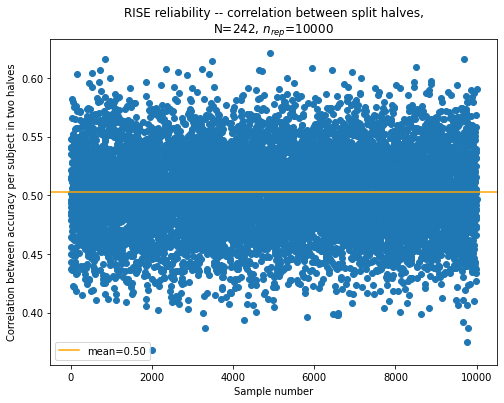

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(RISE_array_corr, ax)

plt.title(f"RISE reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'RISE reliability -- correlation between split halves,\nN=242, $n_{rep}$=10000, $n_{trials}$=36 -> 1 form(s)')

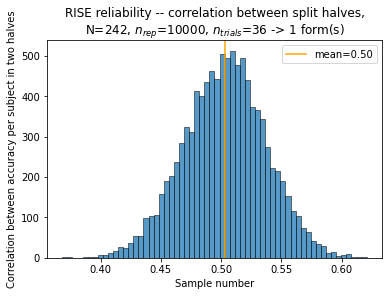

In [288]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(RISE_array_corr, ax)

plt.title(f"RISE reliability -- correlation between split halves,\nN={df_RISE.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_RISE.userID.value_counts()[0]} -> {df_RISE.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run the second standalone version
[top](#top)

In [289]:
df_RISE_stand = pd.read_csv(os.path.join(csv_clean_data_path, "RISE-cleaned_data_rep.csv"))

# rename cols to take the correct answer
df_RISE_stand.rename(columns={"correct":"for_sure_wrong_correct", "my_correct":"correct"}, inplace=True)

# should be empty -- test if people don't have more than 1 entry
df_RISE_stand.userID.value_counts()[df_RISE_stand.userID.value_counts()!=70]#.keys()

Series([], Name: userID, dtype: int64)

In [290]:
# num of subjects
N = len(df_RISE_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_RISE_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["RISE_stand"] = total_n_trials
# and subjects
n_subj_dict["RISE_stand"] = N

# define corr array
RISE_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_RISE_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 70

# go over iterations
for i in range(n_repeats):
    df_RISE_first = None
    df_RISE_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_RISE_first, df_RISE_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    RISE_stand_array_corr[i] = df_RISE_first.groupby('userID').correct.mean().corr(df_RISE_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.38 s per 100
# 34 s (0.6 min) per 10 000

Total number of trials is 70.
Taking 35 trials.
Process took: 36.85 s which is 0.61 min.


Text(0.5, 1.0, 'RISE reliability -- correlation between split halves, standalone,\nN=114, $n_{rep}$=10000, $n_{trials}$=70 -> 1 form(s)')

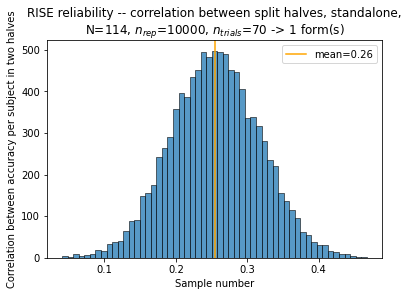

In [291]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(RISE_stand_array_corr, ax)

plt.title(f"RISE reliability -- correlation between split halves, standalone,\nN={df_RISE_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_RISE_stand.userID.value_counts()[0]} -> {df_RISE_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


#### Run overlap RISE
[top](#top)

In [292]:
shared_participants = list(set(df_RISE["userID"])&set(df_RISE_stand["userID"]))

# concat the two datasets
df_RISE_concat = pd.concat([
    df_RISE_stand.loc[(df_RISE_stand["userID"].isin(shared_participants))].copy(),
    df_RISE.loc[(df_RISE["userID"].isin(shared_participants))].copy()
])

# get overlaping stimuli
print(f"Running all replicate studies with total {len(shared_participants)} participants.")


# should be empty -- test if people don't have more than 1 entry
print(df_RISE_concat.userID.value_counts()[df_RISE_concat.userID.value_counts()!=106])#.keys()

Running all replicate studies with total 109 participants.
Series([], Name: userID, dtype: int64)


In [293]:
# num of subjects
N = len(df_RISE_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_RISE_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["RISE_concat"] = total_n_trials
# and subjects
n_subj_dict["RISE_concat"] = N

# define corr array
RISE_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_RISE_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 106#2*n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_RISE_first = None
    df_RISE_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_RISE_first, df_RISE_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    RISE_concat_array_corr[i] = df_RISE_first.groupby('userID').correct.mean().corr(df_RISE_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.37 s per 100
# 37 s (0.6 min) per 10 000

Total number of trials is 106.
Taking 53 trials.
Process took: 40.61 s which is 0.68 min.


Text(0.5, 1.0, 'RISE reliability -- correlation between split halves, concat,\nN=109, $n_{rep}$=10000, $n_{trials}$=106 -> 2 form(s)')

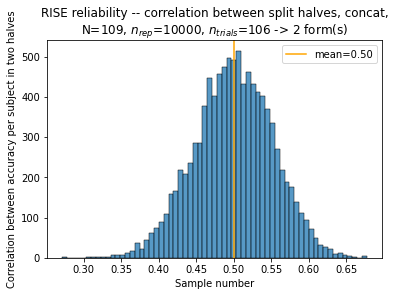

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(RISE_concat_array_corr, ax)

plt.title(f"RISE reliability -- correlation between split halves, concat,\nN={df_RISE_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_RISE_concat.userID.value_counts()[0]} -> {df_RISE_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "RISE_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save

In [295]:
# save only if we run it
if 'RISE_array_corr' in locals():
    pd.DataFrame({
        "RISE_overall_correlation" : RISE_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "RISE_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'RISE_stand_array_corr' in locals():
    pd.DataFrame({
        "RISE_overall_correlation" : RISE_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "RISE_reliability_standalone-method-Michal.csv"), index=False)   
    print("saved standalone data")

# both of them    
if 'RISE_concat_array_corr' in locals():
    pd.DataFrame({
        "RISE_overall_correlation" : RISE_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "RISE_reliability_concat-method-Michal.csv"), index=False)  
    print("saved concat data")

saved original data
saved standalone data
saved concat data


In [296]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

# save the overall results
versions = ['', '_stand', '_concat']

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["RISE_overall_correlation"],
        "num_trials": [n_trials_dict[f"RISE{ver}"]],
        "reliability_mean": [eval(f"RISE{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"RISE{ver}_array_corr").std()],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"RISE{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0    CCMT_overall_correlation          72          0.744839         0.021953   
1                 CCMT_stage1          18          0.430841         0.038396   
2                 CCMT_stage2          30          0.586765         0.031072   
3                 CCMT_stage3          24          0.545496         0.031030   
4    CCMT_overall_correlation          72          0.770198         0.024802   
..                        ...         ...               ...              ...   
116              PGNG_PCTT_l2          66          0.877413         0.023116   
117              PGNG_PCTT_l3          64          0.851311         0.023694   
0    RISE_overall_correlation          36          0.502881         0.033945   
0    RISE_overall_correlation          70          0.255162         0.062210   
0    RISE_overall_correlation         106          0.499867         0.052057   

    version  num_subjects  
0       NaN           243  
1       NaN           243  
2       NaN           243  
3       NaN           243  
4     stand           160  
..      ...           ...  
116  concat           152  
117  concat           152  
0                     242  
0     stand           114  
0    concat           109  

[121 rows x 6 columns]

## SCAP
[top](#top)

### Run split halves SCAP
[top](#top)

In [297]:
df_SCAP = pd.read_csv(os.path.join(csv_clean_data_path, "SCAP-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
df_SCAP.userID.value_counts()[df_SCAP.userID.value_counts()>72]#.keys()

Series([], Name: userID, dtype: int64)

In [298]:
df_SCAP.userID.value_counts()[df_SCAP.userID.value_counts()<72]#.keys()

Series([], Name: userID, dtype: int64)

For this task, we have the following measures:

* [acc per set size](#Run-it-on-the-loads-separately) -- number of dots to match, that is 3, 5, 7
* [overall acc](#Overall-accuracy-SCAP)
* [Cowan's k](#Cowan's-k---SCAP)

### Overall accuracy SCAP

In [299]:
# define manually num of trials
n_trials_per_form = 72

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original data

In [300]:
# num of subjects
N = len(df_SCAP.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_SCAP, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["SCAP"] = total_n_trials
# and subjects
n_subj_dict["SCAP"] = N

# define corr array
SCAP_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_SCAP.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 72

# go over iterations
for i in range(n_repeats):
    df_SCAP_first = None
    df_SCAP_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_SCAP_first, df_SCAP_second,  = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    SCAP_array_corr[i] = df_SCAP_first.groupby('userID').correct.mean().corr(df_SCAP_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.4 s per 100
# 38.5 s (0.6 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 48.33 s which is 0.81 min.


Text(0.5, 1.0, 'SCAP reliability, overall accuracy -- correlation between split halves,\nN=247, $n_{rep}$=10000')

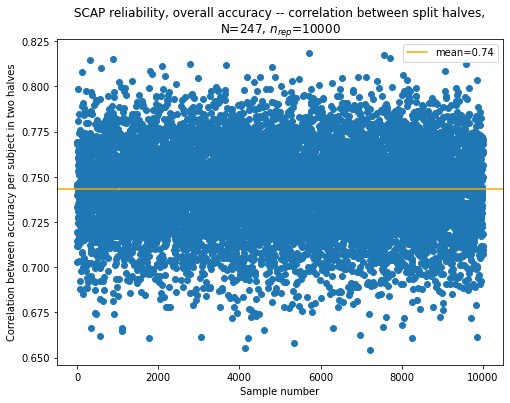

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(SCAP_array_corr, ax)

plt.title(f"SCAP reliability, overall accuracy -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'SCAP reliability, overall accuracy -- correlation between split halves,\nN=247, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

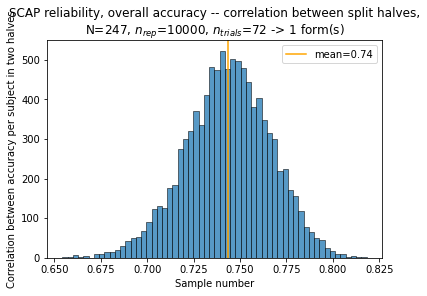

In [302]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(SCAP_array_corr, ax)

plt.title(f"SCAP reliability, overall accuracy -- correlation between split halves,\nN={df_SCAP.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP.userID.value_counts()[0]} -> {df_SCAP.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Second standalone version

In [303]:
df_SCAP_stand = pd.read_csv(os.path.join(csv_clean_data_path, "SCAP-cleaned_data_rep.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_SCAP_stand.userID.value_counts()[df_SCAP_stand.userID.value_counts()>n_trials_per_form])#.keys()
print(df_SCAP_stand.userID.value_counts()[df_SCAP_stand.userID.value_counts()<n_trials_per_form])#.keys()

Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [304]:
# num of subjects
N = len(df_SCAP_stand.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_SCAP_stand, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["SCAP_stand"] = total_n_trials
# and subjects
n_subj_dict["SCAP_stand"] = N

# define corr array
SCAP_stand_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_SCAP_stand.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_SCAP_first = None
    df_SCAP_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_SCAP_first, df_SCAP_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    SCAP_stand_array_corr[i] = df_SCAP_first.groupby('userID').correct.mean().corr(df_SCAP_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.4 s per 100
# 23 s (0.4 min) per 10 000

Total number of trials is 72.
Taking 36 trials.
Process took: 41.56 s which is 0.69 min.


Text(0.5, 1.0, 'SCAP reliability, overall accuracy -- correlation between split halves, standalone\nN=164, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

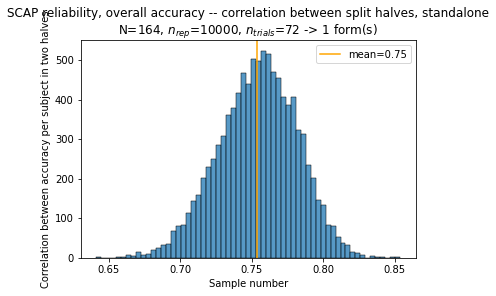

In [305]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(SCAP_stand_array_corr, ax)

plt.title(f"SCAP reliability, overall accuracy -- correlation between split halves, standalone\nN={df_SCAP_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP_stand.userID.value_counts()[0]} -> {df_SCAP_stand.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap SCAP score
[top](#top)

In [306]:
shared_participants = list(set(df_SCAP["userID"])&set(df_SCAP_stand["userID"]))

print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# concat the two datasets
df_SCAP_concat = pd.concat([
    df_SCAP_stand.loc[df_SCAP_stand["userID"].isin(shared_participants)].copy(),
    df_SCAP.loc[df_SCAP["userID"].isin(shared_participants)].copy()
]).reset_index(drop=True)

# should be empty -- test if people don't have more than 1 entry
print(df_SCAP_concat.userID.value_counts()[df_SCAP_concat.userID.value_counts()!=2*n_trials_per_form])#.keys()


Running all replicate studies with total 162 participants.
Series([], Name: userID, dtype: int64)


In [307]:
# num of subjects
N = len(df_SCAP_concat.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_SCAP_concat, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["SCAP_concat"] = total_n_trials
# and subjects
n_subj_dict["SCAP_concat"] = N

# define corr array
SCAP_concat_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_SCAP_concat.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form

# go over iterations
for i in range(n_repeats):
    df_SCAP_first = None
    df_SCAP_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_SCAP_first, df_SCAP_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    SCAP_concat_array_corr[i] = df_SCAP_first.groupby('userID').correct.mean().corr(df_SCAP_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.4 s per 100
# 29 s (0.5 min) per 10 000

Total number of trials is 144.
Taking 72 trials.
Process took: 54.81 s which is 0.91 min.


Text(0.5, 1.0, 'SCAP reliability, overall accuracy -- correlation between split halves, concat\nN=162, $n_{rep}$=10000, $n_{trials}$=144 -> 2 form(s)')

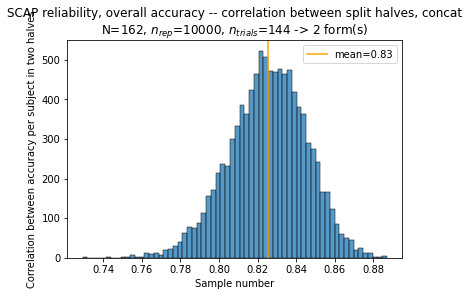

In [308]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(SCAP_concat_array_corr, ax)

plt.title(f"SCAP reliability, overall accuracy -- correlation between split halves, concat\nN={df_SCAP_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP_concat.userID.value_counts()[0]} -> {df_SCAP_concat.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Run it on the loads separately
[top](#top)

[SCAP -- analysis](#Run-split-halves-SCAP)

In [309]:
df_SCAP.groupby('userID')["set_size"].value_counts()

userID  set_size
s_1     3           25
        7           24
        5           23
s_10    3           25
        7           24
                    ..
s_98    7           24
        5           23
s_99    3           25
        7           24
        5           23
Name: set_size, Length: 741, dtype: int64

|Set size | Number of trials|
--- | ---
|3.0   |      25|
--- | ---
|5.0   |      23|
--- | ---
|7.0   |      24|

In [310]:
set_size = [3, 5, 7]

# num of subjects
N = len(df_SCAP.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 25
# n_trials_stage2 = 23
# n_trials_stage3 = 24
n_trials_stage = [25, 23, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,size in enumerate(set_size):
    print(f"Size: {size}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_SCAP.sort_values(by=["userID"]).loc[df_SCAP["set_size"]==size, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    scap_array_corr_load = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials <= n_trials_stage[i]//2
    
    # save the num_trials
    n_trials_dict[f"SCAP_size{size}"] = total_n_trials
    # and subjects
    n_subj_dict[f"SCAP_size{size}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_scap_first = None
        df_scap_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_scap_first, df_scap_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        scap_array_corr_load[i] = df_scap_first.groupby('userID').correct.mean().corr(df_scap_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(scap_array_corr_load.T, columns=[f"set_size_{size}"]))
    
# combine all the df into one    
df_corr_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_trials_all['id'] = df_corr_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.88 s per 100
# 68 s (1.1 min) per 10 000

Size: 3
Total number of trials is 25.
Size: 5
Total number of trials is 23.
Size: 7
Total number of trials is 24.
Process took: 108.27 s which is 1.80 min.


Text(0.5, 0.98, 'SCAP reliability -- correlation between split halves, N=247, $n_{rep}$=10000')

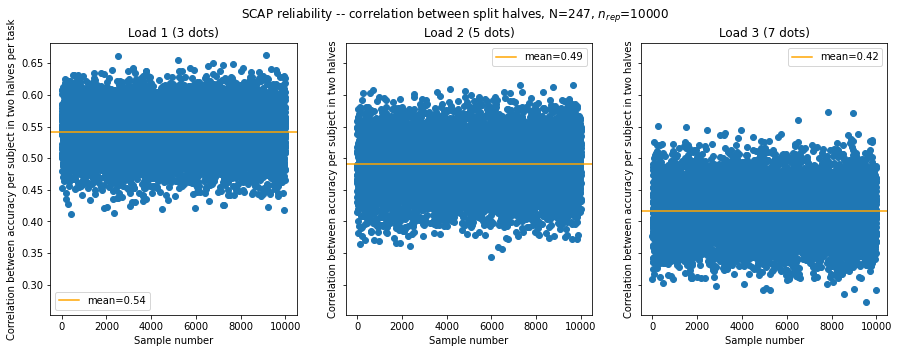

In [311]:
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

for i, ax in zip(set_size, axs.flatten()):
    plot_correlation_scatter(df_corr_trials_all[f"set_size_{i}"], ax)

axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].set_title("Load 1 (3 dots)")
axs[1].set_title("Load 2 (5 dots)")
axs[2].set_title("Load 3 (7 dots)")

plt.suptitle(f"SCAP reliability -- correlation between split halves, N={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.05, 'SCAP reliability -- correlation between split halves\nN=247, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

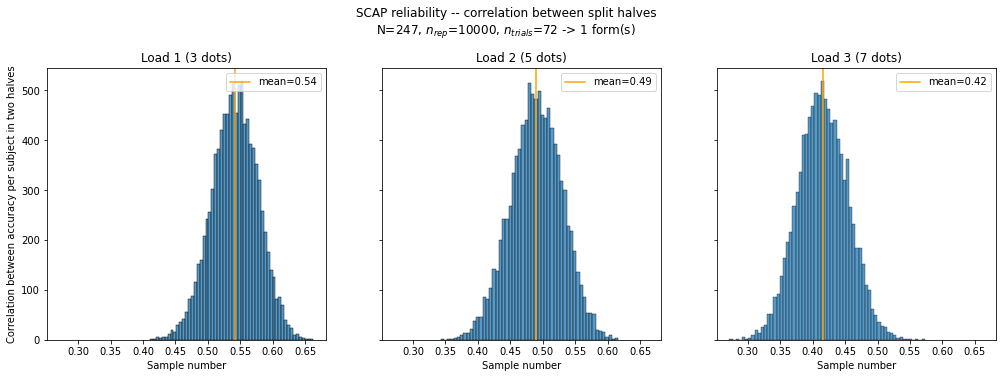

In [312]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(set_size, axs.flatten()):
    plot_correlation_hist(df_corr_trials_all[f"set_size_{i}"], ax)

axs[0].set_title("Load 1 (3 dots)")
axs[1].set_title("Load 2 (5 dots)")
axs[2].set_title("Load 3 (7 dots)")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"SCAP reliability -- correlation between split halves\nN={df_SCAP.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP.userID.value_counts()[0]} -> {df_SCAP.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run second version

In [313]:
set_size = [3, 5, 7]

# num of subjects
N = len(df_SCAP_stand.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 25
# n_trials_stage2 = 23
# n_trials_stage3 = 24
n_trials_stage = [25, 23, 24]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,size in enumerate(set_size):
    print(f"Size: {size}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_SCAP_stand.sort_values(by=["userID"]).loc[df_SCAP_stand["set_size"]==size, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    scap_array_corr_load = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials <= n_trials_stage[i]//2
    
    # save the num_trials
    n_trials_dict[f"SCAP_stand_size{size}"] = total_n_trials
    # and subjects
    n_subj_dict[f"SCAP_stand_size{size}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_scap_first = None
        df_scap_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_scap_first, df_scap_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        scap_array_corr_load[i] = df_scap_first.groupby('userID').correct.mean().corr(df_scap_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(scap_array_corr_load.T, columns=[f"set_size_{size}"]))
    
# combine all the df into one    
df_corr_stand_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_stand_trials_all['id'] = df_corr_stand_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.6 s per 100
# 59 s (1 min) per 10 000


Size: 3
Total number of trials is 25.
Size: 5
Total number of trials is 23.
Size: 7
Total number of trials is 24.
Process took: 101.34 s which is 1.69 min.


Text(0.5, 1.05, 'SCAP reliability -- correlation between split halves, standalone\nN=164, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)')

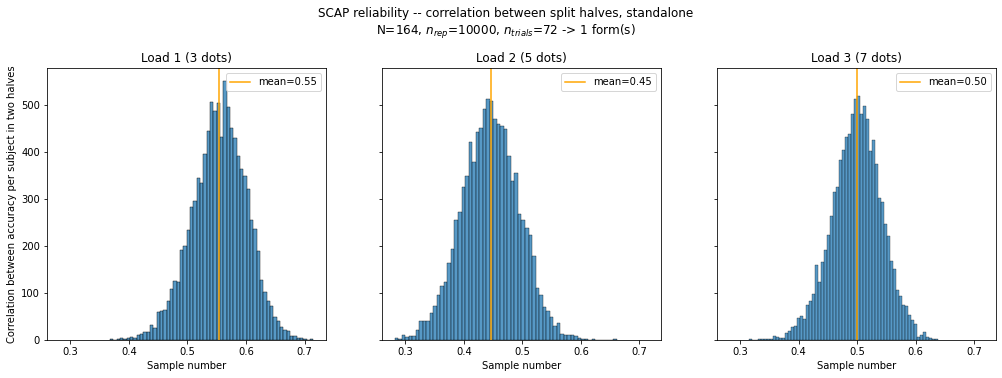

In [314]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(set_size, axs.flatten()):
    plot_correlation_hist(df_corr_stand_trials_all[f"set_size_{i}"], ax)

axs[0].set_title("Load 1 (3 dots)")
axs[1].set_title("Load 2 (5 dots)")
axs[2].set_title("Load 3 (7 dots)")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"SCAP reliability -- correlation between split halves, standalone\nN={df_SCAP_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP_stand.userID.value_counts()[0]} -> {df_SCAP_stand.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap SCAP tasks
[top](#top)

In [315]:
set_size = [3, 5, 7]

# num of subjects
N = len(df_SCAP_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

# n_trials_stage1 = 25
# n_trials_stage2 = 23
# n_trials_stage3 = 24
n_trials_stage = 2*np.array([25, 23, 24])

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,size in enumerate(set_size):
    print(f"Size: {size}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_SCAP_concat.sort_values(by=["userID"]).loc[df_SCAP_concat["set_size"]==size, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    scap_array_corr_load = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials <= n_trials_stage[i]//2
    
    # save the num_trials
    n_trials_dict[f"SCAP_concat_size{size}"] = total_n_trials
    # and subjects
    n_subj_dict[f"SCAP_concat_size{size}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_scap_first = None
        df_scap_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_scap_first, df_scap_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        scap_array_corr_load[i] = df_scap_first.groupby('userID').correct.mean().corr(df_scap_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(scap_array_corr_load.T, columns=[f"set_size_{size}"]))
    
# combine all the df into one    
df_corr_concat_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_concat_trials_all['id'] = df_corr_concat_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.6 s per 100
# 64 s (1 min) per 10 000

Size: 3
Total number of trials is 50.
Size: 5
Total number of trials is 46.
Size: 7
Total number of trials is 48.
Process took: 112.11 s which is 1.87 min.


Text(0.5, 1.05, 'SCAP reliability -- correlation between split halves, concat\nN=162, $n_{rep}$=10000, $n_{trials}$=144 -> 2 form(s)')

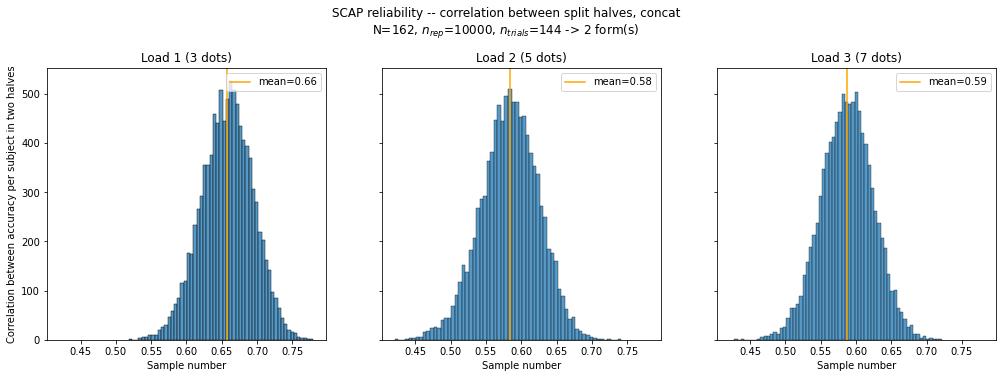

In [316]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(set_size, axs.flatten()):
    plot_correlation_hist(df_corr_concat_trials_all[f"set_size_{i}"], ax)

axs[0].set_title("Load 1 (3 dots)")
axs[1].set_title("Load 2 (5 dots)")
axs[2].set_title("Load 3 (7 dots)")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"SCAP reliability -- correlation between split halves, concat\nN={df_SCAP_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP_concat.userID.value_counts()[0]} -> {df_SCAP_concat.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Cowan's k - SCAP
[top](#top)

[SCAP -- analysis](#Run-split-halves-SCAP)

Catherine's code
```r
acc$set_size *(acc$avg*2 -1) 
```

In [318]:
# select level

cowan = np.zeros((3,247))
for i,lvl in enumerate([3,5,7]):
    
# lvl = 3    
    df_tmp = df_SCAP[df_SCAP["set_size"]==lvl]

    cowan[i,:]=lvl*(df_tmp.groupby("userID").correct.mean()*2-1).values

In [319]:
pd.DataFrame([df_tmp.groupby("userID").correct.mean().index, cowan.max(axis=0)]).T

0         1
0      s_1      5.25
1     s_10  2.142857
2    s_100  4.565217
3    s_101  5.173913
4    s_102      5.25
..     ...       ...
242   s_95  5.833333
243   s_96       5.0
244   s_97  5.173913
245   s_98      5.25
246   s_99       5.0

[247 rows x 2 columns]

In [320]:
# how many samples we want to correlate
n_repeats = 10 ** 4

scap_array_corr_cowan = np.zeros(n_repeats)

# save the number of trials
n_trials_dict["SCAP_Cowan_k_correlation"] = n_trials_per_form
# and subjects
n_subj_dict["SCAP_Cowan_k_correlation"] = df_SCAP.userID.unique().size

start = time.time()

for i in range(n_repeats):   
    # create arrays for Cowan's k
    cowan_first = np.zeros((3, df_SCAP.userID.unique().size))
    cowan_second = np.zeros((3, df_SCAP.userID.unique().size))
    
    # iterate over the levels with their n_trials
    for (j, lvl), n_trials in zip(enumerate([3,5,7]), [25,23,24]):
        # clean
        df_scap_first = None
        df_scap_second = None
        df_scap_shuffle = None
        random_inx = None
        half_A = None
        A_indexes = None

        # select 12 random indexes
        random_inx = np.random.choice(range(n_trials), n_trials // 2, replace=False)

        # create boolean indexing
        half_A = np.ones(n_trials)
        half_A[random_inx] = 0

        # create boolean indexing for the entire array
        A_indexes = np.tile(half_A, df_SCAP.userID.unique().size).astype(bool)

        # get load 1 only
        df_scap_shuffle = df_SCAP.loc[df_SCAP["set_size"] == lvl, ["userID", "correct"]].sort_values(
            by=["userID"]).copy()

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_scap_first = df_scap_shuffle[A_indexes].copy()
        df_scap_second = df_scap_shuffle[(1 - A_indexes).astype(bool)].copy()

        # get the Cowan measure
        cowan_first[j,:]  = lvl*( df_scap_first.groupby("userID").correct.mean()*2-1).values
        cowan_second[j,:] = lvl*(df_scap_second.groupby("userID").correct.mean()*2-1).values
        
    # calculate the correlation between the two groups, take only the max Cowan's k per category
    scap_array_corr_cowan[i] = np.corrcoef(cowan_first.max(axis=0), cowan_second.max(axis=0))[1,0]

end = time.time()
print(f"Process took: {end - start} s which is {(end - start) / 60} min.")
# 2.67 s per 100
# 234 s (4 min) per 10 000

Process took: 325.5078372955322 s which is 5.425130621592204 min.


Text(0.5, 1.0, "SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves,\nN=247, $n_{rep}$=10000")

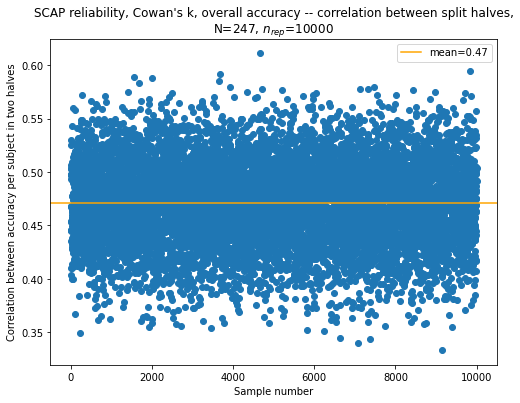

In [321]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(scap_array_corr_cowan, ax)

plt.title(f"SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves,\nN={df_SCAP.userID.unique().size}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

Text(0.5, 1.05, "SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves\nN=247, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)")

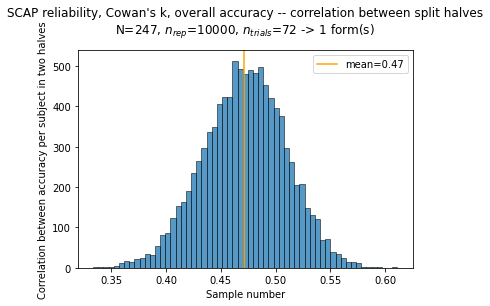

In [322]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(scap_array_corr_cowan, ax)

plt.title(f"SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves\nN={df_SCAP.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP.userID.value_counts()[0]} -> {df_SCAP.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.05)


# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_Cowan_k_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_Cowan_k_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Second standalone set

In [323]:
# how many samples we want to correlate
n_repeats = 10 ** 4

scap_stand_array_corr_cowan = np.zeros(n_repeats)

# save the number of trials
n_trials_dict["SCAP_stand_Cowan_k_correlation"] = n_trials_per_form
# and subjects
n_subj_dict["SCAP_stand_Cowan_k_correlation"] = df_SCAP_stand.userID.unique().size

start = time.time()

for i in range(n_repeats):   
    # create arrays for Cowan's k
    cowan_first = np.zeros((3,  df_SCAP_stand.userID.unique().size))
    cowan_second = np.zeros((3, df_SCAP_stand.userID.unique().size))
    
    # iterate over the levels with their n_trials
    for (j, lvl), n_trials in zip(enumerate([3,5,7]), [25,23,24]):
        # clean
        df_scap_first = None
        df_scap_second = None
        df_scap_shuffle = None
        random_inx = None
        half_A = None
        A_indexes = None

        # select 12 random indexes
        random_inx = np.random.choice(range(n_trials), n_trials // 2, replace=False)

        # create boolean indexing
        half_A = np.ones(n_trials)
        half_A[random_inx] = 0

        # create boolean indexing for the entire array
        A_indexes = np.tile(half_A, df_SCAP_stand.userID.unique().size).astype(bool)

        # get load 1 only
        df_scap_shuffle = df_SCAP_stand.loc[df_SCAP_stand["set_size"] == lvl, ["userID", "correct"]].sort_values(
            by=["userID"]).copy()

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_scap_first = df_scap_shuffle[A_indexes].copy()
        df_scap_second = df_scap_shuffle[(1 - A_indexes).astype(bool)].copy()

        # get the Cowan measure
        cowan_first[j,:]  = lvl*( df_scap_first.groupby("userID").correct.mean()*2-1).values
        cowan_second[j,:] = lvl*(df_scap_second.groupby("userID").correct.mean()*2-1).values
        
    # calculate the correlation between the two groups, take only the max Cowan's k per category
    scap_stand_array_corr_cowan[i] = np.corrcoef(cowan_first.max(axis=0), cowan_second.max(axis=0))[1,0]

end = time.time()
print(f"Process took: {end - start} s which is {(end - start) / 60} min.")
# 2.67 s per 100
# 148 s (2.5 min) per 10 000

Process took: 265.87774109840393 s which is 4.431295684973398 min.


Text(0.5, 1.05, "SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves, standalone\nN=164, $n_{rep}$=10000, $n_{trials}$=72 -> 1 form(s)")

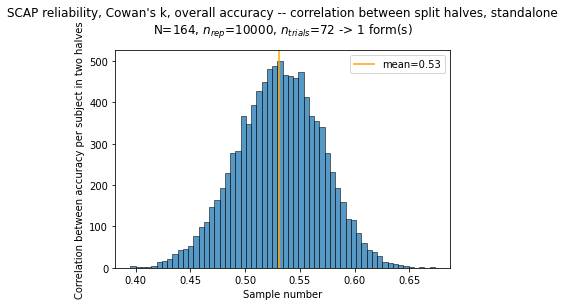

In [324]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(scap_stand_array_corr_cowan, ax)

plt.title(f"SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves, standalone\nN={df_SCAP_stand.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP_stand.userID.value_counts()[0]} -> {df_SCAP_stand.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.05)


# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_Cowan_k_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_Cowan_k_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

#### Run overlap SCAP Cowan
[top](#top)

In [325]:
# how many samples we want to correlate
n_repeats = 10 ** 4

scap_concat_array_corr_cowan = np.zeros(n_repeats)

# save the number of trials
n_trials_dict["SCAP_concat_Cowan_k_correlation"] = 2*n_trials_per_form
# and subjects
n_subj_dict["SCAP_concat_Cowan_k_correlation"] = df_SCAP_concat.userID.unique().size

start = time.time()

for i in range(n_repeats):   
    # create arrays for Cowan's k
    cowan_first = np.zeros((3,  df_SCAP_concat.userID.unique().size))
    cowan_second = np.zeros((3, df_SCAP_concat.userID.unique().size))
    
    # iterate over the levels with their n_trials
    for (j, lvl), n_trials in zip(enumerate([3,5,7]), 2*np.array([25,23,24])):
        # clean
        df_scap_first = None
        df_scap_second = None
        df_scap_shuffle = None
        random_inx = None
        half_A = None
        A_indexes = None

        # select 12 random indexes
        random_inx = np.random.choice(range(n_trials), n_trials // 2, replace=False)

        # create boolean indexing
        half_A = np.ones(n_trials)
        half_A[random_inx] = 0

        # create boolean indexing for the entire array
        A_indexes = np.tile(half_A, df_SCAP_concat.userID.unique().size).astype(bool)

        # get load 1 only
        df_scap_shuffle = df_SCAP_concat.loc[df_SCAP_concat["set_size"] == lvl, ["userID", "correct"]].sort_values(
            by=["userID"]).copy()

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_scap_first = df_scap_shuffle[A_indexes].copy()
        df_scap_second = df_scap_shuffle[(1 - A_indexes).astype(bool)].copy()

        # get the Cowan measure
        cowan_first[j,:]  = lvl*( df_scap_first.groupby("userID").correct.mean()*2-1).values
        cowan_second[j,:] = lvl*(df_scap_second.groupby("userID").correct.mean()*2-1).values
        
    # calculate the correlation between the two groups, take only the max Cowan's k per category
    scap_concat_array_corr_cowan[i] = np.corrcoef(cowan_first.max(axis=0), cowan_second.max(axis=0))[1,0]

end = time.time()
print(f"Process took: {end - start} s which is {(end - start) / 60} min.")
# 2.67 s per 100
# 210.8 s (3.5 min) per 10 000

Process took: 448.30855917930603 s which is 7.4718093196551 min.


Text(0.5, 1.05, "SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves, concat\nN=162, $n_{rep}$=10000, $n_{trials}$=144 -> 2 form(s)")

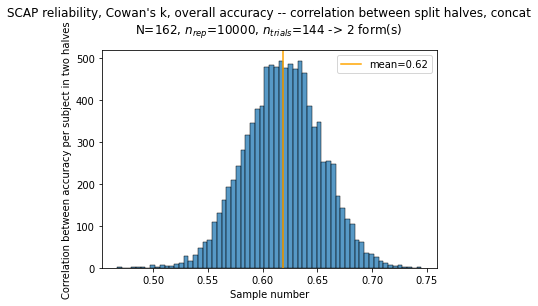

In [326]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(scap_concat_array_corr_cowan, ax)

plt.title(f"SCAP reliability, Cowan's k, overall accuracy -- correlation between split halves, concat\nN={df_SCAP_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_SCAP_concat.userID.value_counts()[0]} -> {df_SCAP_concat.userID.value_counts()[0]//n_trials_per_form} form(s)", y=1.05)


# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_Cowan_k_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_Cowan_k_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

### Save
[top](#top)

In [327]:
# save only if we run it
if 'SCAP_array_corr' in locals():
    pd.DataFrame({
        "SCAP_overall_correlation" : SCAP_array_corr,
        "SCAP_stage1" : df_corr_trials_all["set_size_3"],
        "SCAP_stage2" : df_corr_trials_all["set_size_5"],
        "SCAP_stage3" : df_corr_trials_all["set_size_7"],
        "SCAP_Cowan_k_correlation" : scap_array_corr_cowan,
    }).to_csv(os.path.join(path_reliability_results, "SCAP_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'SCAP_stand_array_corr' in locals():
    pd.DataFrame({
        "SCAP_overall_correlation" : SCAP_stand_array_corr,
        "SCAP_stage1" : df_corr_stand_trials_all["set_size_3"],
        "SCAP_stage2" : df_corr_stand_trials_all["set_size_5"],
        "SCAP_stage3" : df_corr_stand_trials_all["set_size_7"],
        "SCAP_Cowan_k_correlation" : scap_stand_array_corr_cowan,
    }).to_csv(os.path.join(path_reliability_results, "SCAP_reliability_standalone-method-Michal.csv"), index=False)
    print("saved standalone")

# both of them    
if 'SCAP_concat_array_corr' in locals():
    pd.DataFrame({
        "SCAP_overall_correlation" : SCAP_concat_array_corr,
        "SCAP_stage1" : df_corr_concat_trials_all["set_size_3"],
        "SCAP_stage2" : df_corr_concat_trials_all["set_size_5"],
        "SCAP_stage3" : df_corr_concat_trials_all["set_size_7"],
        "SCAP_Cowan_k_correlation" : scap_concat_array_corr_cowan,
    }).to_csv(os.path.join(path_reliability_results, "SCAP_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat data")

saved original data
saved standalone
saved concat data


In [328]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['', '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('SCAP').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "SCAP_overall_correlation": [n_trials_dict[f"SCAP{ver}"]],
            "SCAP_load1": [n_trials_dict[f"SCAP{ver}_size3"]],
            "SCAP_load2": [n_trials_dict[f"SCAP{ver}_size5"]],
            "SCAP_load3": [n_trials_dict[f"SCAP{ver}_size7"]],
            "SCAP_Cowan_k_correlation": [n_trials_dict[f"SCAP{ver}_Cowan_k_correlation"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [329]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["SCAP_overall_correlation", "SCAP_load1", "SCAP_load2", "SCAP_load3", "SCAP_Cowan_k_correlation"],
        "num_trials": [n_trials_dict[f"SCAP{ver}"], n_trials_dict[f"SCAP{ver}_size3"], n_trials_dict[f"SCAP{ver}_size5"], n_trials_dict[f"SCAP{ver}_size7"], n_trials_dict[f"SCAP{ver}_Cowan_k_correlation"]],
        "reliability_mean": [eval(f"SCAP{ver}_array_corr").mean(), eval(f"df_corr{ver}_trials_all['set_size_3']").mean(), eval(f"df_corr{ver}_trials_all['set_size_5']").mean(), eval(f"df_corr{ver}_trials_all['set_size_7']").mean(), eval(f"scap{ver}_array_corr_cowan").mean(),],
        "reliability_std":  [eval(f"SCAP{ver}_array_corr").std() , eval(f"df_corr{ver}_trials_all['set_size_3']").std() , eval(f"df_corr{ver}_trials_all['set_size_5']").std() , eval(f"df_corr{ver}_trials_all['set_size_7']").std() , eval(f"scap{ver}_array_corr_cowan").std() ,],
        "version": 5*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"SCAP{ver}"], n_subj_dict[f"SCAP{ver}_size3"], n_subj_dict[f"SCAP{ver}_size5"], n_subj_dict[f"SCAP{ver}_size7"],n_subj_dict[f"SCAP{ver}_Cowan_k_correlation"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0   CCMT_overall_correlation          72          0.744839         0.021953   
1                CCMT_stage1          18          0.430841         0.038396   
2                CCMT_stage2          30          0.586765         0.031072   
3                CCMT_stage3          24          0.545496         0.031030   
4   CCMT_overall_correlation          72          0.770198         0.024802   
..                       ...         ...               ...              ...   
0   SCAP_overall_correlation         144          0.825385         0.019874   
1                 SCAP_load1          50          0.657710         0.036376   
2                 SCAP_load2          46          0.583707         0.040892   
3                 SCAP_load3          48          0.587358         0.036973   
4   SCAP_Cowan_k_correlation         144          0.618835         0.034640   

   version  num_subjects  
0      NaN           243  
1      NaN           243  
2      NaN           243  
3      NaN           243  
4    stand           160  
..     ...           ...  
0   concat           162  
1   concat           162  
2   concat           162  
3   concat           162  
4   concat           162  

[136 rows x 6 columns]

## n back
[top](#top)

### Run split halves n back
[top](#top)

* [Run first day](#Run-first-day)
    * [Accuracy](#Accuracy-first-day)
    * [Accuracy per levels](#Accuracy-first-day-per-levels)
    * [d prime](#d-prime-first-day)
    * [d prime per levels](#d-prime-first-day-per-levels)
    
* [Run second day](#Run-second-day)
    * [Accuracy](#Accuracy-second-day)
    * [Accuracy per levels](#Accuracy-second-day-per-levels)
    * [d prime](#d-prime-second-day)
    * [d prime per levels](#d-prime-second-day-per-levels)
    
* [Run overlap n back](#Run-overlap-n-back)
    * [Accuracy](#Accuracy-n-back-overlap)
    * [d prime](#d-prime-overlap)    

In [330]:
# define manually num of trials
n_trials_per_form_all = 138 # 48+45+45
n_trials_per_form_acc = 45 

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

In [331]:
df_nback1 = pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day1.csv"), 
                        usecols=["userID", "level", "correct_response", "response_type", "correct"])

# df_nback1["correct"] = df_nback1["correct"].astype(int)

# should be empty -- test if people don't have more than 1 entry
print(df_nback1.userID.value_counts()[df_nback1.userID.value_counts()>n_trials_per_form_all])#.keys()
print(df_nback1.userID.value_counts()[df_nback1.userID.value_counts()<n_trials_per_form_all])#.keys()

Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


#### Run first day
[top](#top)

#### Accuracy first day
[top](#top)

In [332]:
# select only trials with accuracy
df_nback1_acc = df_nback1[df_nback1["correct_response"]=='n']

# num of subjects
N = len(df_nback1_acc.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_nback1_acc, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["nback1_acc"] = total_n_trials
# and subjects
n_subj_dict["nback1_acc"] = N

# define corr array
nback1_acc_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_nback1_acc.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 45

# go over iterations
for i in range(n_repeats):
    df_nback1_acc_first = None
    df_nback1_acc_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_nback1_acc_first, df_nback1_acc_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    nback1_acc_array_corr[i] = df_nback1_acc_first.groupby('userID').correct.mean().corr(df_nback1_acc_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.2 s per 100
# 26 s (0.4 min) per 10 000

Total number of trials is 45.
Taking 22 trials.
Process took: 37.49 s which is 0.62 min.


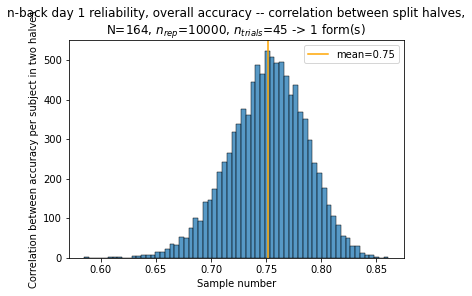

In [333]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(nback1_acc_array_corr, ax)

plt.title(f"n-back day 1 reliability, overall accuracy -- correlation between split halves,\nN={df_nback1_acc.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback1_acc.userID.value_counts()[0]} -> {df_nback1_acc.userID.value_counts()[0]//n_trials_per_form_acc} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "nback1_acc_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback1_acc_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

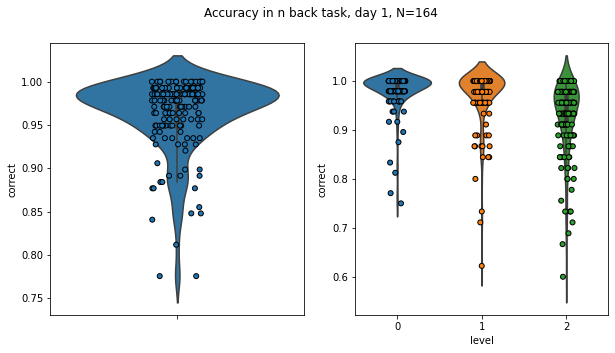

In [334]:
# sns.barplot(data=df_nback1, x="level", y="correct")

fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.violinplot(data=df_nback1.groupby(['userID']).mean().reset_index(), y="correct", ax=axs[0])
sns.stripplot(data=df_nback1.groupby(['userID']).mean().reset_index(), y="correct", edgecolor='k', linewidth=1, ax=axs[0])

sns.violinplot(data=df_nback1.groupby(['level','userID']).mean().reset_index(), x='level', y="correct", ax=axs[1])
sns.stripplot(data=df_nback1.groupby(['level','userID']).mean().reset_index(), x='level', y="correct", edgecolor='k', linewidth=1, ax=axs[1])

plt.suptitle(f'Accuracy in n back task, day 1, N={df_nback1_acc.userID.unique().size}')
plt.show()

#### Accuracy first day per levels
[top](#top)

In [335]:
levels = [0, 1, 2]

# num of subjects
N = len(df_nback1_acc.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

n_trials_stage = [16, 15, 14]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,lvl in enumerate(levels):
    print(f"Level: {lvl}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_nback1_acc.sort_values(by=["userID"]).loc[df_nback1_acc["level"]==lvl, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    nback1_acc_array_corr_load = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials <= n_trials_stage[i]//2
    
    # save the num_trials
    n_trials_dict[f"nback1_acc_lvl{lvl}"] = total_n_trials
    # and subjects
    n_subj_dict[f"nback1_acc_lvl{lvl}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_nback1_acc_first = None
        df_nback1_acc_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback1_acc_first, df_nback1_acc_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        nback1_acc_array_corr_load[i] = df_nback1_acc_first.groupby('userID').correct.mean().corr(df_nback1_acc_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(nback1_acc_array_corr_load.T, columns=[f"level_{lvl}"]))
    
# combine all the df into one    
df_corr_nback1_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_nback1_trials_all['id'] = df_corr_nback1_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.6 s per 100
# 71 s (1.2 min) per 10 000

Level: 0
Total number of trials is 16.
Level: 1
Total number of trials is 15.
Level: 2
Total number of trials is 14.
Process took: 98.15 s which is 1.64 min.


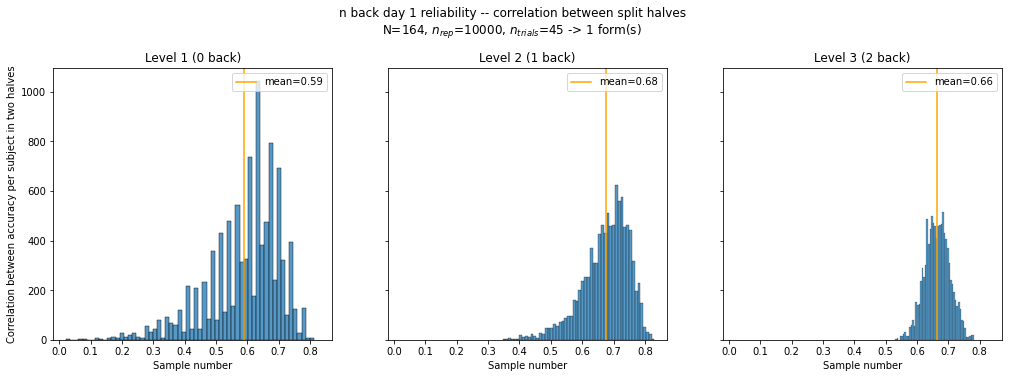

In [336]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(levels, axs.flatten()):
    plot_correlation_hist(df_corr_nback1_trials_all[f"level_{i}"], ax)

axs[0].set_title("Level 1 (0 back)")
axs[1].set_title("Level 2 (1 back)")
axs[2].set_title("Level 3 (2 back)")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"n back day 1 reliability -- correlation between split halves\nN={df_nback1_acc.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback1_acc.userID.value_counts()[0]} -> {df_nback1_acc.userID.value_counts()[0]//n_trials_per_form_acc} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

### d prime calculations

The d' is computed using the 3rd method mentioned here: https://stats.stackexchange.com/questions/134779/d-prime-with-100-hit-rate-probability-and-0-false-alarm-probability. (for a general way how to calculate d' in python see [this code](https://python-code.pro/d-prime-with-python/))

In general, it adds 0.5 to all the hit trials per a given subject (ie. all correctly identified) and to all false alarms divided by the total number of trials, then the ppf of normal distribution is calculated and those two are subtracted.

QUESTION TODO
--
When I sample random trials, should I:

A) sample the same proportion of “signal” and “noise” trials as in the experiment (ie roughly 1:2); or

B) sample everything randomly, ie it can possibly happen that there will not be any “signal” or any “noise” trial 

which would be a real problem but I could say “at least one” will be present.
I’d do A) but both somehow make sense.

#### d prime first day
[top](#top)

In [337]:
# check that we only have 'n' and 'y' as correct answers
assert len(df_nback1.groupby('userID').correct_response.value_counts().unique()) == 2

# TO be very sure, calculate it two different ways, compare

# get number of trials per signal and noise
n_noise, n_signal = df_nback1.groupby('userID').correct_response.value_counts().unique()#df_nback1.correct_response.value_counts()//N
# to be sure, one can do the lengthy way:
n_signal_c = df_nback1[df_nback1["correct_response"]=='n'].groupby('userID').correct_response.value_counts().unique()[0]
n_noise_c  = df_nback1[df_nback1["correct_response"]=='y'].groupby('userID').correct_response.value_counts().unique()[0]

# check they're the same
assert n_noise  == n_noise_c  == 93
assert n_signal == n_signal_c == 45

# check that we have the right order
assert n_noise > n_signal

# check that the numbers are correct (eg we don't have missing trials)
assert n_signal+n_noise == n_trials_per_form_all

print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

# get ratios of number of signal and noise trials
# signal, noise = (df_nback1.correct_response.value_counts()/df_nback1.correct_response.value_counts().sum()).values
signal = n_signal/n_trials_per_form_all
noise  = n_noise/n_trials_per_form_all

# check that they sum to 1
assert np.isclose(signal+noise, 1)

# num of subjects
N = len(df_nback1.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# save the number of trials
n_trials_dict["nback1_d"] = n_noise+n_signal
# and subjects
n_subj_dict["nback1_d"] = N

# define corr array
nback1_d_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_nback1.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

# start the timer
start = time.time()

# go over iterations
for i in range(n_repeats):
    df_nback1_d_noise_first = None
    df_nback1_d_noise_second = None
    df_nback1_d_signal_first = None
    df_nback1_d_signal_second = None    

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
#     df_nback1_d_noise_first, df_nback1_d_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y', ['userID','response_type']], n_noise, n_noise//2, N)
#     df_nback1_d_signal_first,df_nback1_d_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n', ['userID','response_type']], n_signal,n_signal//2,N)
    df_nback1_d_noise_first, df_nback1_d_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y'], n_noise, n_noise//2, N)
    df_nback1_d_signal_first,df_nback1_d_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n'], n_signal,n_signal//2,N)


    # calculate correlation -- combine back the two dataframes (signal, noise) and compute d'
    nback1_d_array_corr[i] = calculate_d_prime(pd.concat([df_nback1_d_noise_first, df_nback1_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2).corr(
                             calculate_d_prime(pd.concat([df_nback1_d_noise_second, df_nback1_d_signal_second]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 12.4 s per 100 - original
# 5.4 s per 100 - remove crosstab
# 1.32 s per 100 - all speed ups
# 128 s (2.1 min) per 10 000

There is 93 noise (y) and 45 (n) signal trials
Process took: 220.91 s which is 3.68 min.


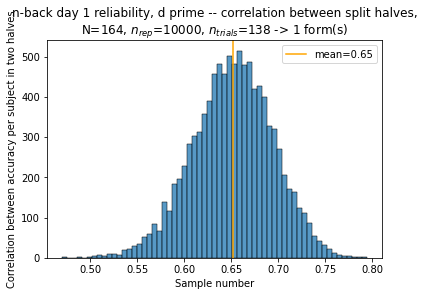

In [338]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(nback1_d_array_corr, ax)

plt.title(f"n-back day 1 reliability, d prime -- correlation between split halves,\nN={df_nback1.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback1.userID.value_counts()[0]} -> {df_nback1.userID.value_counts()[0]//n_trials_per_form_all} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "nback1_d_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback1_d_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

#### d prime first day per levels
[top](#top)

In [339]:
levels = [0, 1, 2]

# num of subjects
N = len(df_nback1.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

n_trials_stage = [16, 15, 14]
n_trials_stage_noise = [32, 30, 31]
n_trials_stage_total = [48, 45, 45]

# check that the sums fit
for i in range(len(n_trials_stage_total)):
    assert n_trials_stage_total[i] == n_trials_stage[i] + n_trials_stage_noise[i]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,lvl in enumerate(levels):
    print(f"Level: {lvl}")
    # select only relevant level
    df_nback1_lvl = None
    df_nback1_lvl = df_nback1[df_nback1["level"]==lvl]
    
    # check that we only have 'n' and 'y' as correct answers
    assert len(df_nback1_lvl.groupby('userID').correct_response.value_counts().unique()) == 2

    # TO be very sure, calculate it two different ways, compare

    # get number of trials per signal and noise
    n_noise, n_signal = df_nback1_lvl.groupby('userID').correct_response.value_counts().unique()
    # to be sure, one can do the lengthy way:
    n_signal_c = df_nback1_lvl[df_nback1_lvl["correct_response"]=='n'].groupby('userID').correct_response.value_counts().unique()[0]
    n_noise_c  = df_nback1_lvl[df_nback1_lvl["correct_response"]=='y'].groupby('userID').correct_response.value_counts().unique()[0]

    # check they're the same
    assert n_noise  == n_noise_c  == n_trials_stage_noise[i]
    assert n_signal == n_signal_c == n_trials_stage[i]

    # check that we have the right order
    assert n_noise > n_signal

    # check that the numbers are correct (eg we don't have missing trials)
    assert n_signal+n_noise == n_trials_stage_total[i]

    print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

    # get ratios of number of signal and noise trials
    # signal, noise = (df_nback1_lvl.correct_response.value_counts()/df_nback1_lvl.correct_response.value_counts().sum()).values
    signal = n_signal/n_trials_stage_total[i]
    noise  = n_noise/n_trials_stage_total[i]

    # check that they sum to 1
    assert np.isclose(signal+noise, 1)    
    
    df_sort=None    
    # define the df
    df_sort = df_nback1_lvl.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    nback1_d_lvl_array_corr = np.zeros(n_repeats)
    
    # save the num_trials
    n_trials_dict[f"nback1_d_lvl{lvl}"] = n_noise+n_signal
    # and subjects
    n_subj_dict[f"nback1_d_lvl{lvl}"] = N


    # go over iterations
    for i in range(n_repeats):
        df_nback1_d_lvl_noise_first = None
        df_nback1_d_lvl_noise_second = None
        df_nback1_d_lvl_signal_first = None
        df_nback1_d_lvl_signal_second = None    

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback1_d_lvl_noise_first, df_nback1_d_lvl_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y'], n_noise, n_noise//2, N)
        df_nback1_d_lvl_signal_first,df_nback1_d_lvl_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n'], n_signal,n_signal//2,N)


        # calculate correlation -- combine back the two dataframes (signal, noise) and compute d'
        nback1_d_lvl_array_corr[i] = calculate_d_prime(pd.concat([df_nback1_d_lvl_noise_first, df_nback1_d_lvl_signal_first]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2).corr(
                                 calculate_d_prime(pd.concat([df_nback1_d_lvl_noise_second, df_nback1_d_lvl_signal_second]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2), 
                                                           method='pearson')  
        
        
    # create a df
    all_task_df.append(pd.DataFrame(nback1_d_lvl_array_corr.T, columns=[f"level_{lvl}"]))
    
# combine all the df into one    
df_corr_nback1_d_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_nback1_d_trials_all['id'] = df_corr_nback1_d_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 3 s per 100
# 293 s (4.9 min) per 10 000

Level: 0
There is 32 noise (y) and 16 (n) signal trials
Level: 1
There is 30 noise (y) and 15 (n) signal trials
Level: 2
There is 31 noise (y) and 14 (n) signal trials
Process took: 499.84 s which is 8.33 min.


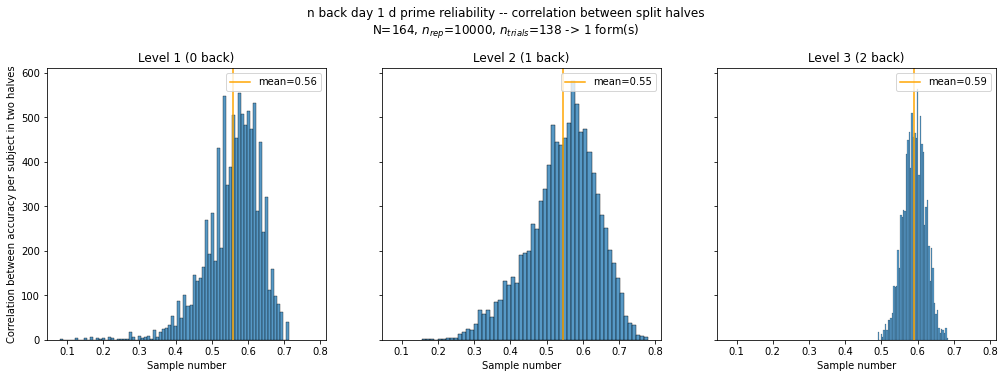

In [340]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(levels, axs.flatten()):
    plot_correlation_hist(df_corr_nback1_d_trials_all[f"level_{i}"], ax)

axs[0].set_title("Level 1 (0 back)")
axs[1].set_title("Level 2 (1 back)")
axs[2].set_title("Level 3 (2 back)")

# axs[0].set_ylabel("Correlation between duracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"n back day 1 d prime reliability -- correlation between split halves\nN={df_nback1.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback1.userID.value_counts()[0]} -> {df_nback1.userID.value_counts()[0]//n_trials_per_form_all} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

#### Run second day
[top](#top)

In [341]:
df_nback2 = pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day1.csv"), 
                        usecols=["userID", "level", "correct_response", "response_type", "correct"])

# df_nback2["correct"] = df_nback2["correct"].astype(int)

# should be empty -- test if people don't have more than 1 entry
print(df_nback2.userID.value_counts()[df_nback2.userID.value_counts()>n_trials_per_form_all])#.keys()
print(df_nback2.userID.value_counts()[df_nback2.userID.value_counts()<n_trials_per_form_all])#.keys()


Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


#### Accuracy second day
[top](#top)

In [342]:
# select only trials with accuracy
df_nback2_acc = df_nback2[df_nback2["correct_response"]=='n']

# num of subjects
N = len(df_nback2_acc.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_nback2_acc, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["nback2_acc"] = total_n_trials
# and subjects
n_subj_dict["nback2_acc"] = N

# define corr array
nback2_acc_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_nback2_acc.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 45

# go over iterations
for i in range(n_repeats):
    df_nback2_acc_first = None
    df_nback2_acc_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_nback2_acc_first, df_nback2_acc_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    nback2_acc_array_corr[i] = df_nback2_acc_first.groupby('userID').correct.mean().corr(df_nback2_acc_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.3 s per 100
# 27 s (0.5 min) per 10 000

Total number of trials is 45.
Taking 22 trials.
Process took: 37.09 s which is 0.62 min.


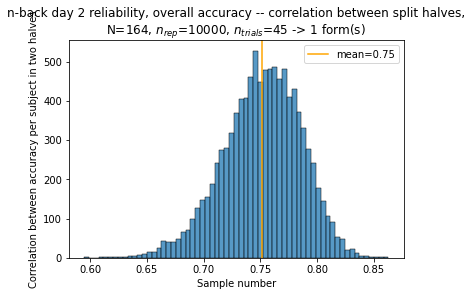

In [343]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(nback2_acc_array_corr, ax)

plt.title(f"n-back day 2 reliability, overall accuracy -- correlation between split halves,\nN={df_nback2_acc.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback2_acc.userID.value_counts()[0]} -> {df_nback2_acc.userID.value_counts()[0]//n_trials_per_form_acc} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "nback2_acc_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback2_acc_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

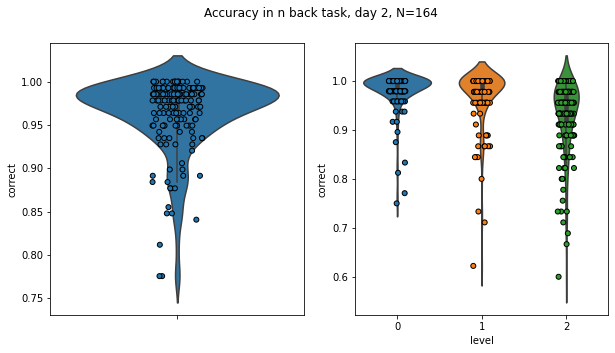

In [344]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.violinplot(data=df_nback2.groupby(['userID']).mean().reset_index(), y="correct", ax=axs[0])
sns.stripplot(data=df_nback2.groupby(['userID']).mean().reset_index(), y="correct", edgecolor='k', linewidth=1, ax=axs[0])

sns.violinplot(data=df_nback2.groupby(['level','userID']).mean().reset_index(), x='level', y="correct", ax=axs[1])
sns.stripplot(data=df_nback2.groupby(['level','userID']).mean().reset_index(), x='level', y="correct", edgecolor='k', linewidth=1, ax=axs[1])

plt.suptitle(f'Accuracy in n back task, day 2, N={df_nback2_acc.userID.unique().size}')
plt.show()

#### Accuracy second day per levels
[top](#top)

In [345]:
levels = [0, 1, 2]

# num of subjects
N = len(df_nback2_acc.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

n_trials_stage = [16, 15, 14]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,lvl in enumerate(levels):
    print(f"Level: {lvl}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_nback2_acc.sort_values(by=["userID"]).loc[df_nback2_acc["level"]==lvl, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    nback2_acc_array_corr_load = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials <= n_trials_stage[i]//2
    
    # save the num_trials
    n_trials_dict[f"nback2_acc_lvl{lvl}"] = total_n_trials
    # and subjects
    n_subj_dict[f"nback2_acc_lvl{lvl}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_nback2_acc_first = None
        df_nback2_acc_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback2_acc_first, df_nback2_acc_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        nback2_acc_array_corr_load[i] = df_nback2_acc_first.groupby('userID').correct.mean().corr(df_nback2_acc_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(nback2_acc_array_corr_load.T, columns=[f"level_{lvl}"]))
    
# combine all the df into one    
df_corr_nback2_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_nback2_trials_all['id'] = df_corr_nback2_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.6 s per 100
# 71 s (1.2 min) per 10 000

Level: 0
Total number of trials is 16.
Level: 1
Total number of trials is 15.
Level: 2
Total number of trials is 14.
Process took: 1000.47 s which is 16.67 min.


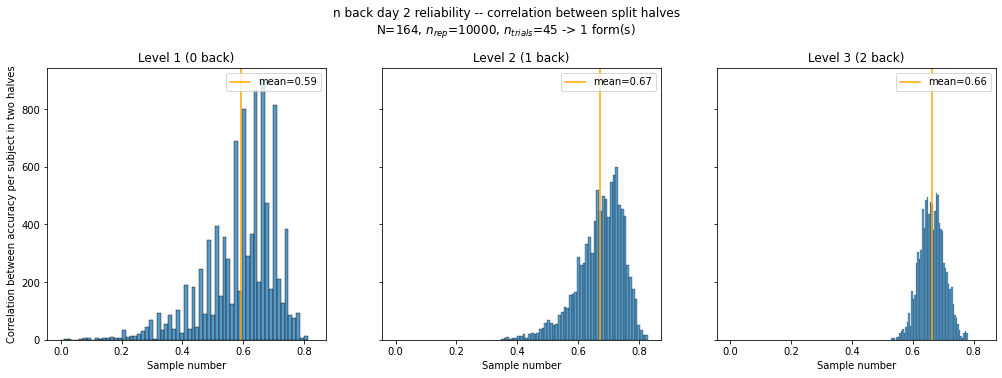

In [346]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(levels, axs.flatten()):
    plot_correlation_hist(df_corr_nback2_trials_all[f"level_{i}"], ax)

axs[0].set_title("Level 1 (0 back)")
axs[1].set_title("Level 2 (1 back)")
axs[2].set_title("Level 3 (2 back)")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"n back day 2 reliability -- correlation between split halves\nN={df_nback2_acc.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback2_acc.userID.value_counts()[0]} -> {df_nback2_acc.userID.value_counts()[0]//n_trials_per_form_acc} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

#### d prime second day
[top](#top)

In [347]:
# check that we only have 'n' and 'y' as correct answers
assert len(df_nback2.groupby('userID').correct_response.value_counts().unique()) == 2

# TO be very sure, calculate it two different ways, compare

# get number of trials per signal and noise
n_noise, n_signal = df_nback2.groupby('userID').correct_response.value_counts().unique()#df_nback2.correct_response.value_counts()//N
# to be sure, one can do the lengthy way:
n_signal_c = df_nback2[df_nback2["correct_response"]=='n'].groupby('userID').correct_response.value_counts().unique()[0]
n_noise_c  = df_nback2[df_nback2["correct_response"]=='y'].groupby('userID').correct_response.value_counts().unique()[0]

# check they're the same
assert n_noise  == n_noise_c  == 93
assert n_signal == n_signal_c == 45

# check that we have the right order
assert n_noise > n_signal

# check that the numbers are correct (eg we don't have missing trials)
assert n_signal+n_noise == n_trials_per_form_all

print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

# get ratios of number of signal and noise trials
# signal, noise = (df_nback2.correct_response.value_counts()/df_nback2.correct_response.value_counts().sum()).values
signal = n_signal/n_trials_per_form_all
noise  = n_noise/n_trials_per_form_all

# check that they sum to 1
assert np.isclose(signal+noise, 1)

# num of subjects
N = len(df_nback2.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# save the number of trials
n_trials_dict["nback2_d"] = n_noise+n_signal
# and subjects
n_subj_dict["nback2_d"] = N

# define corr array
nback2_d_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_nback2.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

# start the timer
start = time.time()

# go over iterations
for i in range(n_repeats):
    df_nback2_d_noise_first = None
    df_nback2_d_noise_second = None
    df_nback2_d_signal_first = None
    df_nback2_d_signal_second = None    

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_nback2_d_noise_first, df_nback2_d_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y'], n_noise, n_noise//2, N)
    df_nback2_d_signal_first,df_nback2_d_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n'], n_signal,n_signal//2,N)


    # calculate correlation -- combine back the two dataframes (signal, noise) and compute d'
    nback2_d_array_corr[i] = calculate_d_prime(pd.concat([df_nback2_d_noise_first, df_nback2_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2).corr(
                             calculate_d_prime(pd.concat([df_nback2_d_noise_second, df_nback2_d_signal_second]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.32 s per 100 - all speed ups
# 128 s (2.1 min) per 10 000

There is 93 noise (y) and 45 (n) signal trials
Process took: 219.04 s which is 3.65 min.


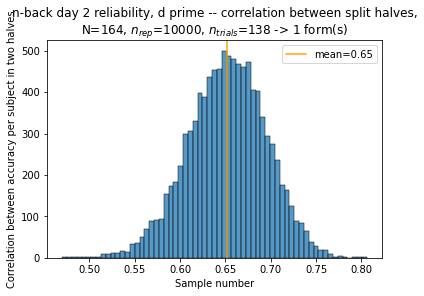

In [348]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(nback2_d_array_corr, ax)

plt.title(f"n-back day 2 reliability, d prime -- correlation between split halves,\nN={df_nback2.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback2.userID.value_counts()[0]} -> {df_nback2.userID.value_counts()[0]//n_trials_per_form_all} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "nback1_d_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback1_d_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

#### d prime second day per levels
[top](#top)

In [349]:
levels = [0, 1, 2]

# num of subjects
N = len(df_nback2.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

n_trials_stage = [16, 15, 14]
n_trials_stage_noise = [32, 30, 31]
n_trials_stage_total = [48, 45, 45]

# check that the sums fit
for i in range(len(n_trials_stage_total)):
    assert n_trials_stage_total[i] == n_trials_stage[i] + n_trials_stage_noise[i]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,lvl in enumerate(levels):
    print(f"Level: {lvl}")
    # select only relevant level
    df_nback2_lvl = None
    df_nback2_lvl = df_nback2[df_nback2["level"]==lvl]
    
    # check that we only have 'n' and 'y' as correct answers
    assert len(df_nback2_lvl.groupby('userID').correct_response.value_counts().unique()) == 2

    # TO be very sure, calculate it two different ways, compare

    # get number of trials per signal and noise
    n_noise, n_signal = df_nback2_lvl.groupby('userID').correct_response.value_counts().unique()
    # to be sure, one can do the lengthy way:
    n_signal_c = df_nback2_lvl[df_nback2_lvl["correct_response"]=='n'].groupby('userID').correct_response.value_counts().unique()[0]
    n_noise_c  = df_nback2_lvl[df_nback2_lvl["correct_response"]=='y'].groupby('userID').correct_response.value_counts().unique()[0]

    # check they're the same
    assert n_noise  == n_noise_c  == n_trials_stage_noise[i]
    assert n_signal == n_signal_c == n_trials_stage[i]

    # check that we have the right order
    assert n_noise > n_signal

    # check that the numbers are correct (eg we don't have missing trials)
    assert n_signal+n_noise == n_trials_stage_total[i]

    print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

    # get ratios of number of signal and noise trials
    # signal, noise = (df_nback2_lvl.correct_response.value_counts()/df_nback2_lvl.correct_response.value_counts().sum()).values
    signal = n_signal/n_trials_stage_total[i]
    noise  = n_noise/n_trials_stage_total[i]

    # check that they sum to 1
    assert np.isclose(signal+noise, 1)    
    
    df_sort=None    
    # define the df
    df_sort = df_nback2_lvl.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    nback2_d_lvl_array_corr = np.zeros(n_repeats)
    
    # save the num_trials
    n_trials_dict[f"nback2_d_lvl{lvl}"] = n_noise+n_signal
    # and subjects
    n_subj_dict[f"nback2_d_lvl{lvl}"] = N


    # go over iterations
    for i in range(n_repeats):
        df_nback2_d_lvl_noise_first = None
        df_nback2_d_lvl_noise_second = None
        df_nback2_d_lvl_signal_first = None
        df_nback2_d_lvl_signal_second = None    

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback2_d_lvl_noise_first, df_nback2_d_lvl_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y'], n_noise, n_noise//2, N)
        df_nback2_d_lvl_signal_first,df_nback2_d_lvl_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n'], n_signal,n_signal//2,N)


        # calculate correlation -- combine back the two dataframes (signal, noise) and compute d'
        nback2_d_lvl_array_corr[i] = calculate_d_prime(pd.concat([df_nback2_d_lvl_noise_first, df_nback2_d_lvl_signal_first]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2).corr(
                                 calculate_d_prime(pd.concat([df_nback2_d_lvl_noise_second, df_nback2_d_lvl_signal_second]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2), 
                                                           method='pearson')  
        
        
    # create a df
    all_task_df.append(pd.DataFrame(nback2_d_lvl_array_corr.T, columns=[f"level_{lvl}"]))
    
# combine all the df into one    
df_corr_nback2_d_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_nback2_d_trials_all['id'] = df_corr_nback2_d_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 3 s per 100
# 299 s (5 min) per 10 000

Level: 0
There is 32 noise (y) and 16 (n) signal trials
Level: 1
There is 30 noise (y) and 15 (n) signal trials
Level: 2
There is 31 noise (y) and 14 (n) signal trials
Process took: 502.90 s which is 8.38 min.


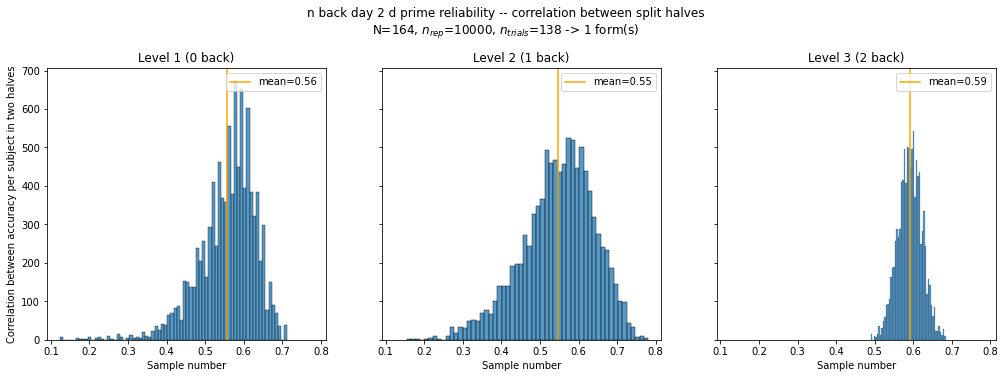

In [350]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(levels, axs.flatten()):
    plot_correlation_hist(df_corr_nback2_d_trials_all[f"level_{i}"], ax)

axs[0].set_title("Level 1 (0 back)")
axs[1].set_title("Level 2 (1 back)")
axs[2].set_title("Level 3 (2 back)")

# axs[0].set_ylabel("Correlation between duracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"n back day 2 d prime reliability -- correlation between split halves\nN={df_nback2.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback2.userID.value_counts()[0]} -> {df_nback2.userID.value_counts()[0]//n_trials_per_form_all} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "nback_dprime_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback_dprime_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

---

#### Run overlap n back
[top](#top)

In [351]:
# get participants who have both data
shared_participants = list(
    set(pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day1.csv"), usecols=['userID']).userID)&\
    set(pd.read_csv(os.path.join(csv_clean_data_path, "nback-cleaned_data_day2.csv"), usecols=['userID']).userID)
)
print(f"Running all replicate studies with total {len(shared_participants)} participants.")

# load and concat the datasets
df_nback_concat = pd.concat([
    pd.read_csv(os.path.join(csv_clean_data_path, 'nback-cleaned_data_day1.csv'), usecols=["userID", "level", "correct_response", "response_type", "correct"]),
    pd.read_csv(os.path.join(csv_clean_data_path, 'nback-cleaned_data_day2.csv'), usecols=["userID", "level", "correct_response", "response_type", "correct"]),
])

# take only the full data
df_nback_concat = df_nback_concat[df_nback_concat["userID"].isin(shared_participants)].reset_index(drop=True)


# should be empty -- test if people don't have more than 1 entry
print(df_nback_concat.userID.value_counts()[df_nback_concat.userID.value_counts()!=2*n_trials_per_form_all])#.keys()

Running all replicate studies with total 93 participants.
Series([], Name: userID, dtype: int64)


#### Accuracy n back overlap
[top](#top)

In [352]:
# select only trials with accuracy
df_nback_concat_acc = df_nback_concat[df_nback_concat["correct_response"]=='n']

# num of subjects
N = len(df_nback_concat_acc.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_nback_concat_acc, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["nback_concat_acc"] = total_n_trials
# and subjects
n_subj_dict["nback_concat_acc"] = N

# define corr array
nback_concat_acc_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_nback_concat_acc.sort_values(by=["userID"])[["userID", "correct"]]


# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 2*n_trials_per_form_acc

# go over iterations
for i in range(n_repeats):
    df_nback_concat_acc_first = None
    df_nback_concat_acc_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_nback_concat_acc_first, df_nback_concat_acc_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    nback_concat_acc_array_corr[i] = df_nback_concat_acc_first.groupby('userID').correct.mean().corr(df_nback_concat_acc_second.groupby('userID').correct.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.3 s per 100
# 30 s (0.5 min) per 10 000

Total number of trials is 90.
Taking 45 trials.
Process took: 37.87 s which is 0.63 min.


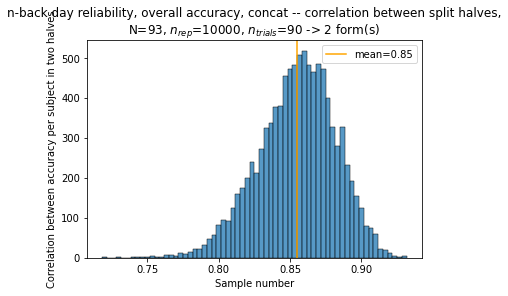

In [353]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(nback_concat_acc_array_corr, ax)

plt.title(f"n-back day reliability, overall accuracy, concat -- correlation between split halves,\nN={df_nback_concat_acc.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback_concat_acc.userID.value_counts()[0]} -> {df_nback_concat_acc.userID.value_counts()[0]//n_trials_per_form_acc} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "nback_concat_acc_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback_concat_acc_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

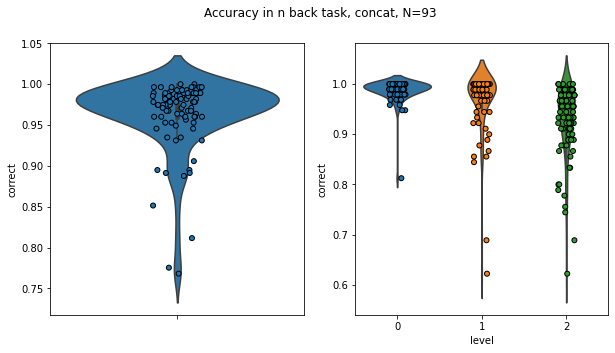

In [354]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.violinplot(data=df_nback_concat.groupby(['userID']).mean().reset_index(), y="correct", ax=axs[0])
sns.stripplot(data=df_nback_concat.groupby(['userID']).mean().reset_index(), y="correct", edgecolor='k', linewidth=1, ax=axs[0])

sns.violinplot(data=df_nback_concat.groupby(['level','userID']).mean().reset_index(), x='level', y="correct", ax=axs[1])
sns.stripplot(data=df_nback_concat.groupby(['level','userID']).mean().reset_index(), x='level', y="correct", edgecolor='k', linewidth=1, ax=axs[1])

plt.suptitle(f'Accuracy in n back task, concat, N={df_nback_concat_acc.userID.unique().size}')
plt.show()

#### Accuracy concat per levels
[top](#top)

In [355]:
levels = [0, 1, 2]

# num of subjects
N = len(df_nback_concat_acc.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

n_trials_stage = [16, 15, 14]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,lvl in enumerate(levels):
    print(f"Level: {lvl}")
    df_sort=None
    
    # select trials per the given tasks, sort it by userID to be sure we take the same trials
    df_sort = df_nback_concat_acc.sort_values(by=["userID"]).loc[df_nback_concat_acc["level"]==lvl, ["userID", "correct"]].copy()

    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    nback_concat_acc_array_corr_load = np.zeros(n_repeats)
    
    n_trials = total_n_trials//2

    # check that it's possible
    assert n_trials <= 2*n_trials_stage[i]//2
    
    # save the num_trials
    n_trials_dict[f"nback_concat_acc_lvl{lvl}"] = total_n_trials
    # and subjects
    n_subj_dict[f"nback_concat_acc_lvl{lvl}"] = N

    # go over iterations
    for i in range(n_repeats):
        df_nback_concat_acc_first = None
        df_nback_concat_acc_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback_concat_acc_first, df_nback_concat_acc_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        nback_concat_acc_array_corr_load[i] = df_nback_concat_acc_first.groupby('userID').correct.mean().corr(df_nback_concat_acc_second.groupby('userID').correct.mean(), 
                                                           method='pearson')  
        
    # create a df
    all_task_df.append(pd.DataFrame(nback_concat_acc_array_corr_load.T, columns=[f"level_{lvl}"]))
    
# combine all the df into one    
df_corr_nback_concat_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_nback_concat_trials_all['id'] = df_corr_nback_concat_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.6 s per 100
# 74 s (1.2 min) per 10 000

Level: 0
Total number of trials is 32.
Level: 1
Total number of trials is 30.
Level: 2
Total number of trials is 28.
Process took: 96.24 s which is 1.60 min.


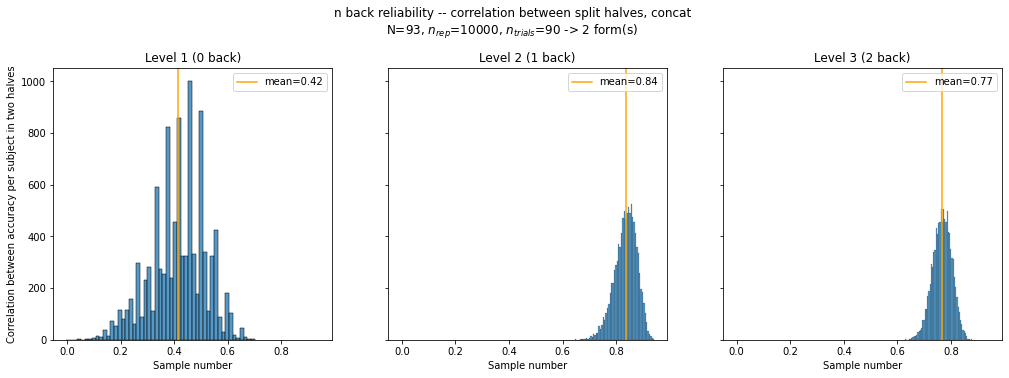

In [356]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(levels, axs.flatten()):
    plot_correlation_hist(df_corr_nback_concat_trials_all[f"level_{i}"], ax)

axs[0].set_title("Level 0 (0 back)")
axs[1].set_title("Level 1 (1 back)")
axs[2].set_title("Level 2 (2 back)")

# axs[0].set_ylabel("Correlation between accuracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"n back reliability -- correlation between split halves, concat\nN={df_nback_concat_acc.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback_concat_acc.userID.value_counts()[0]} -> {df_nback_concat_acc.userID.value_counts()[0]//n_trials_per_form_acc} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "SCAP_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

#### d prime overlap
[top](#top)

In [357]:
# check that we only have 'n' and 'y' as correct answers
assert len(df_nback_concat.groupby('userID').correct_response.value_counts().unique()) == 2

# TO be very sure, calculate it two different ways, compare

# get number of trials per signal and noise
n_noise, n_signal = df_nback_concat.groupby('userID').correct_response.value_counts().unique()#df_nback_concat.correct_response.value_counts()//N
# to be sure, one can do the lengthy way:
n_signal_c = df_nback_concat[df_nback_concat["correct_response"]=='n'].groupby('userID').correct_response.value_counts().unique()[0]
n_noise_c  = df_nback_concat[df_nback_concat["correct_response"]=='y'].groupby('userID').correct_response.value_counts().unique()[0]

# check they're the same
assert n_noise  == n_noise_c  == 2*93
assert n_signal == n_signal_c == 2*45

# check that we have the right order
assert n_noise > n_signal

# check that the numbers are correct (eg we don't have missing trials)
assert n_signal+n_noise == 2*n_trials_per_form_all

print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

# get ratios of number of signal and noise trials
# signal, noise = (df_nback_concat.correct_response.value_counts()/df_nback_concat.correct_response.value_counts().sum()).values
signal = n_signal/(2*n_trials_per_form_all)
noise  = n_noise/(2*n_trials_per_form_all)

# check that they sum to 1
assert np.isclose(signal+noise, 1)

# num of subjects
N = len(df_nback_concat.userID.unique())

# how many samples we want to correlate
n_repeats = 10**4


# save the number of trials
n_trials_dict["nback_concat_d"] = n_noise+n_signal
# and subjects
n_subj_dict["nback_concat_d"] = N

# define corr array
nback_concat_d_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_nback_concat.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

# start the timer
start = time.time()

# go over iterations
for i in range(n_repeats):
    df_nback_concat_d_noise_first = None
    df_nback_concat_d_noise_second = None
    df_nback_concat_d_signal_first = None
    df_nback_concat_d_signal_second = None    

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_nback_concat_d_noise_first, df_nback_concat_d_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y'], n_noise, n_noise//2, N)
    df_nback_concat_d_signal_first,df_nback_concat_d_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n'], n_signal,n_signal//2,N)


    # calculate correlation -- combine back the two dataframes (signal, noise) and compute d'
    nback_concat_d_array_corr[i] = calculate_d_prime(pd.concat([df_nback_concat_d_noise_first, df_nback_concat_d_signal_first]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2).corr(
                                   calculate_d_prime(pd.concat([df_nback_concat_d_noise_second, df_nback_concat_d_signal_second]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 1.4 s per 100 - all speed ups
# 142 s (2.4 min) per 10 000

There is 186 noise (y) and 90 (n) signal trials
Process took: 224.65 s which is 3.74 min.


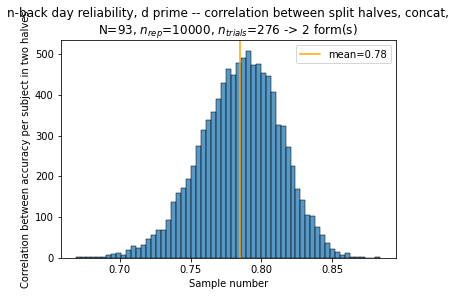

In [358]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(nback_concat_d_array_corr, ax)

plt.title(f"n-back day reliability, d prime -- correlation between split halves, concat,\nN={df_nback_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback_concat.userID.value_counts()[0]} -> {df_nback_concat.userID.value_counts()[0]//n_trials_per_form_all} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "nback_concat_d_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback_concat_d_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

#### d prime overlap per levels
[top](#top)

In [359]:
levels = [0, 1, 2]

# num of subjects
N = len(df_nback_concat.userID.unique())
# how many samples we want to correlate
n_repeats = 10**4

n_trials_stage = 2*np.array([16, 15, 14])
n_trials_stage_noise = 2*np.array([32, 30, 31])
n_trials_stage_total = 2*np.array([48, 45, 45])

# check that the sums fit
for i in range(len(n_trials_stage_total)):
    assert n_trials_stage_total[i] == n_trials_stage[i] + n_trials_stage_noise[i]

# define list for all the resulting df
all_task_df = []

# start the timer
start = time.time()


for i,lvl in enumerate(levels):
    print(f"Level: {lvl}")
    # select only relevant level
    df_nback_concat_lvl = None
    df_nback_concat_lvl = df_nback_concat[df_nback_concat["level"]==lvl]
    
    # check that we only have 'n' and 'y' as correct answers
    assert len(df_nback_concat_lvl.groupby('userID').correct_response.value_counts().unique()) == 2

    # TO be very sure, calculate it two different ways, compare

    # get number of trials per signal and noise
    n_noise, n_signal = df_nback_concat_lvl.groupby('userID').correct_response.value_counts().unique()
    # to be sure, one can do the lengthy way:
    n_signal_c = df_nback_concat_lvl[df_nback_concat_lvl["correct_response"]=='n'].groupby('userID').correct_response.value_counts().unique()[0]
    n_noise_c  = df_nback_concat_lvl[df_nback_concat_lvl["correct_response"]=='y'].groupby('userID').correct_response.value_counts().unique()[0]

    # check they're the same
    assert n_noise  == n_noise_c  == n_trials_stage_noise[i]
    assert n_signal == n_signal_c == n_trials_stage[i]

    # check that we have the right order
    assert n_noise > n_signal

    # check that the numbers are correct (eg we don't have missing trials)
    assert n_signal+n_noise == n_trials_stage_total[i]

    print(f"There is {n_noise} noise (y) and {n_signal} (n) signal trials")

    # get ratios of number of signal and noise trials
    # signal, noise = (df_nback_concat_lvl.correct_response.value_counts()/df_nback_concat_lvl.correct_response.value_counts().sum()).values
    signal = n_signal/n_trials_stage_total[i]
    noise  = n_noise/n_trials_stage_total[i]

    # check that they sum to 1
    assert np.isclose(signal+noise, 1)    
    
    df_sort=None    
    # define the df
    df_sort = df_nback_concat_lvl.sort_values(by=["userID"])[["userID", "correct_response", "response_type"]]

    # define corr array -- this works differently from the trials before. Since I don't know until this place what the max number 
    # of trials is, I can't have an array. I could, since they're all the same, but this should work better
    nback_concat_d_lvl_array_corr = np.zeros(n_repeats)
    
    # save the num_trials
    n_trials_dict[f"nback_concat_d_lvl{lvl}"] = n_noise+n_signal
    # and subjects
    n_subj_dict[f"nback_concat_d_lvl{lvl}"] = N


    # go over iterations
    for i in range(n_repeats):
        df_nback_concat_d_lvl_noise_first = None
        df_nback_concat_d_lvl_noise_second = None
        df_nback_concat_d_lvl_signal_first = None
        df_nback_concat_d_lvl_signal_second = None    

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_nback_concat_d_lvl_noise_first, df_nback_concat_d_lvl_noise_second  = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='y'], n_noise, n_noise//2, N)
        df_nback_concat_d_lvl_signal_first,df_nback_concat_d_lvl_signal_second = split_dataframes_faster(df_sort.loc[df_sort["correct_response"]=='n'], n_signal,n_signal//2,N)


        # calculate correlation -- combine back the two dataframes (signal, noise) and compute d'
        nback_concat_d_lvl_array_corr[i] = calculate_d_prime(pd.concat([df_nback_concat_d_lvl_noise_first, df_nback_concat_d_lvl_signal_first]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2).corr(
                                 calculate_d_prime(pd.concat([df_nback_concat_d_lvl_noise_second, df_nback_concat_d_lvl_signal_second]), signal=signal, noise=noise, n_signal=n_signal//2, n_noise=n_noise//2), 
                                                           method='pearson')  
        
        
    # create a df
    all_task_df.append(pd.DataFrame(nback_concat_d_lvl_array_corr.T, columns=[f"level_{lvl}"]))
    
# combine all the df into one    
df_corr_nback_concat_d_trials_all = pd.concat(all_task_df, axis=1)
# add index to be able to then easier merge them
df_corr_nback_concat_d_trials_all['id'] = df_corr_nback_concat_d_trials_all.index

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 3 s per 100
# 311 s (5.2 min) per 10 000

Level: 0
There is 64 noise (y) and 32 (n) signal trials
Level: 1
There is 60 noise (y) and 30 (n) signal trials
Level: 2
There is 62 noise (y) and 28 (n) signal trials
Process took: 492.06 s which is 8.20 min.


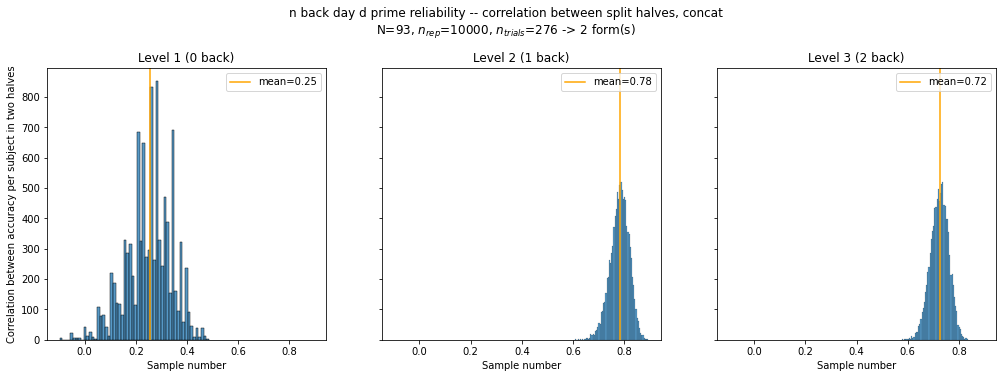

In [360]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), sharey=True, sharex=True)

for i, ax in zip(levels, axs.flatten()):
    plot_correlation_hist(df_corr_nback_concat_d_trials_all[f"level_{i}"], ax)

axs[0].set_title("Level 0 (0 back)")
axs[1].set_title("Level 1 (1 back)")
axs[2].set_title("Level 2 (2 back)")

# axs[0].set_ylabel("Correlation between duracy per subject in two halves per task")

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

plt.suptitle(f"n back day d prime reliability -- correlation between split halves, concat\nN={df_nback_concat.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_nback_concat.userID.value_counts()[0]} -> {df_nback_concat.userID.value_counts()[0]//n_trials_per_form_all} form(s)", y=1.05)

# plt.savefig(os.path.join(path_results, "figures", "nback_dprime_reliability_per_subtask_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "nback_dprime_reliability_per_subtask_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

### Save
[top](#top)

In [361]:
# save only if we run it
if 'nback1_acc_array_corr' in locals():
    pd.DataFrame({
        "nback_overall_correlation" : nback1_acc_array_corr,
        "nback_level_0" : df_corr_nback1_trials_all["level_0"],
        "nback_level_1" : df_corr_nback1_trials_all["level_1"],
        "nback_level_2" : df_corr_nback1_trials_all["level_2"],
        "nback_dprime" : nback1_d_array_corr,
        "nback_dprime_level_0" : df_corr_nback1_d_trials_all["level_0"],
        "nback_dprime_level_1" : df_corr_nback1_d_trials_all["level_1"],
        "nback_dprime_level_2" : df_corr_nback1_d_trials_all["level_2"],
    }).to_csv(os.path.join(path_reliability_results, "nback1_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'nback2_acc_array_corr' in locals():
    pd.DataFrame({
        "nback_overall_correlation" : nback2_acc_array_corr,
        "nback_level_0" : df_corr_nback2_trials_all["level_0"],
        "nback_level_1" : df_corr_nback2_trials_all["level_1"],
        "nback_level_2" : df_corr_nback2_trials_all["level_2"],
        "nback_dprime" : nback2_d_array_corr,
        "nback_dprime_level_0" : df_corr_nback2_d_trials_all["level_0"],
        "nback_dprime_level_1" : df_corr_nback2_d_trials_all["level_1"],
        "nback_dprime_level_2" : df_corr_nback2_d_trials_all["level_2"],
    }).to_csv(os.path.join(path_reliability_results, "nback2_reliability-method-Michal.csv"), index=False)
    print("saved standalone")

# both of them    
if 'nback_concat_acc_array_corr' in locals():
    pd.DataFrame({
        "nback_overall_correlation" : nback_concat_acc_array_corr,
        "nback_level_0" : df_corr_nback_concat_trials_all["level_0"],
        "nback_level_1" : df_corr_nback_concat_trials_all["level_1"],
        "nback_level_2" : df_corr_nback_concat_trials_all["level_2"],
        "nback_dprime" : nback_concat_d_array_corr,
        "nback_dprime_level_0" : df_corr_nback_concat_d_trials_all["level_0"],
        "nback_dprime_level_1" : df_corr_nback_concat_d_trials_all["level_1"],
        "nback_dprime_level_2" : df_corr_nback_concat_d_trials_all["level_2"],
    }).to_csv(os.path.join(path_reliability_results, "nback_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat data")

saved original data
saved standalone
saved concat data


In [362]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['1', '2', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('nback').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "nback_overall_correlation": [n_trials_dict[f"nback{ver}_acc"]],
            "nback_level_0": [n_trials_dict[f"nback{ver}_acc_lvl0"]],
            "nback_level_1": [n_trials_dict[f"nback{ver}_acc_lvl1"]],
            "nback_level_2": [n_trials_dict[f"nback{ver}_acc_lvl2"]],
            "nback_dprime_correlation": [n_trials_dict[f"nback{ver}_d"]], 
            "nback_dprime_level_0": [n_trials_dict[f"nback{ver}_d_lvl0"]],
            "nback_dprime_level_1": [n_trials_dict[f"nback{ver}_d_lvl1"]],
            "nback_dprime_level_2": [n_trials_dict[f"nback{ver}_d_lvl2"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv

saving tasks-num_trials2.csv
saved tasks-num_trials2.csv

saving tasks-num_trials_concat.csv
saved tasks-num_trials_concat.csv



In [363]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["nback_overall_correlation", "nback_level_0", "nback_level_1", "nback_level_2", "nback_dprime_correlation", "nback_dprime_level_0", "nback_dprime_level_1", "nback_dprime_level_2"], 
        "num_trials": [n_trials_dict[f"nback{ver}_acc"], n_trials_dict[f"nback{ver}_acc_lvl0"], n_trials_dict[f"nback{ver}_acc_lvl1"], n_trials_dict[f"nback{ver}_acc_lvl2"], n_trials_dict[f"nback{ver}_d"], n_trials_dict[f"nback{ver}_d_lvl0"], n_trials_dict[f"nback{ver}_d_lvl1"], n_trials_dict[f"nback{ver}_d_lvl2"] ],
        "reliability_mean": [eval(f"nback{ver}_acc_array_corr").mean(), eval(f"df_corr_nback{ver}_trials_all['level_0']").mean(), eval(f"df_corr_nback{ver}_trials_all['level_1']").mean(), eval(f"df_corr_nback{ver}_trials_all['level_2']").mean(),eval(f"nback{ver}_d_array_corr").mean(),eval(f"nback{ver}_d_lvl_array_corr").mean(),eval(f"nback{ver}_d_lvl_array_corr").mean(),eval(f"nback{ver}_d_lvl_array_corr").mean() ],
        "reliability_std":  [eval(f"nback{ver}_acc_array_corr").std() , eval(f"df_corr_nback{ver}_trials_all['level_0']").std() , eval(f"df_corr_nback{ver}_trials_all['level_1']").std() , eval(f"df_corr_nback{ver}_trials_all['level_2']").std() ,eval(f"nback{ver}_d_array_corr").std() ,eval(f"nback{ver}_d_lvl_array_corr").std() ,eval(f"nback{ver}_d_lvl_array_corr").std() ,eval(f"nback{ver}_d_lvl_array_corr").std()  ],
        "version": 8*[ver.strip('_')],
        "num_subjects": [n_subj_dict[f"nback{ver}_acc"], n_subj_dict[f"nback{ver}_acc_lvl0"], n_subj_dict[f"nback{ver}_acc_lvl1"], n_subj_dict[f"nback{ver}_acc_lvl2"], n_subj_dict[f"nback{ver}_d"], n_subj_dict[f"nback{ver}_d_lvl0"], n_subj_dict[f"nback{ver}_d_lvl1"], n_subj_dict[f"nback{ver}_d_lvl2"] ],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  reliability_std  \
0   CCMT_overall_correlation          72          0.744839         0.021953   
1                CCMT_stage1          18          0.430841         0.038396   
2                CCMT_stage2          30          0.586765         0.031072   
3                CCMT_stage3          24          0.545496         0.031030   
4   CCMT_overall_correlation          72          0.770198         0.024802   
..                       ...         ...               ...              ...   
3              nback_level_2          28          0.767561         0.036036   
4   nback_dprime_correlation         276          0.784926         0.028446   
5       nback_dprime_level_1          96          0.724506         0.035728   
6       nback_dprime_level_2          90          0.724506         0.035728   
7       nback_dprime_level_3          90          0.724506         0.035728   

   version  num_subjects  
0      NaN           243  
1      NaN           243  
2      NaN           243  
3      NaN           243  
4    stand           160  
..     ...           ...  
3   concat            93  
4   concat            93  
5   concat            93  
6   concat            93  
7   concat            93  

[160 rows x 6 columns]

## Navon
[top](#top)


### Run split halves Navon
[top](#top)


In [398]:
# define manually num of trials
n_trials_per_form = 80

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run the original data

In [400]:
# load only the original data
df_Navon = pd.read_csv(os.path.join(csv_clean_data_path, "Navon-cleaned_data.csv"))
print(f"Running first study with total {df_Navon.userID.unique().size} participants.")

print(df_Navon.userID.value_counts()[df_Navon.userID.value_counts()>n_trials_per_form])#.keys()


# num of subjects
N = len(df_Navon.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_Navon, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")
# save the number of trials
n_trials_dict["Navon"] = total_n_trials
# and subjects
n_subj_dict["Navon"] = N

# define corr array
Navon_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_Navon.sort_values(by=["userID"])[["userID", "correct_flt"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2   

# go over iterations
for i in range(n_repeats):
    df_Navon_first = None
    df_Navon_second = None 

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_Navon_first, df_Navon_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    Navon_array_corr[i] = df_Navon_first.groupby('userID').correct_flt.mean().corr(df_Navon_second.groupby('userID').correct_flt.mean(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.42 s per 100
# 39.9 s (0.65 min) per 10 000

Running first study with total 241 participants.
Series([], Name: userID, dtype: int64)
Total number of trials is 80.
Taking 40 trials.
Process took: 30.99 s which is 0.52 min.


Text(0.5, 1.0, 'Navon reliability -- correlation between split halves,\nN=241, $n_{rep}$=10000, $n_{trials}$=80 -> 1 form(s)')

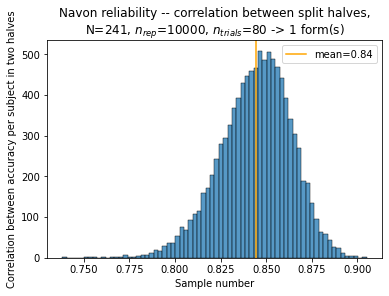

In [401]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(Navon_array_corr, ax)

plt.title(f"Navon reliability -- correlation between split halves,\nN={df_Navon.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_Navon.userID.value_counts()[0]} -> {df_Navon.userID.value_counts()[0]//n_trials_per_form} form(s)")

# keep saved only the original for now
# plt.savefig(os.path.join(path_results, "figures", "Navon_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "Navon_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')


### Save
[top](#top)

In [402]:
# save only if we run it
if 'Navon_array_corr' in locals():
    pd.DataFrame({
        "Navon_overall_correlation" : Navon_array_corr,
    }).to_csv(os.path.join(path_results, "Navon_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'Navon_stand_array_corr' in locals():
    pd.DataFrame({
        "Navon_overall_correlation" : Navon_stand_array_corr,
    }).to_csv(os.path.join(path_results, "Navon_reliability_standalone-method-Michal.csv"), index=False)
    print("saved standalone")

# both of them    
if 'Navon_concat_array_corr' in locals():
    pd.DataFrame({
        "Navon_overall_correlation" : Navon_concat_array_corr,
    }).to_csv(os.path.join(path_results, "Navon_reliability_concat-method-Michal.csv"), index=False)
    print("saved concat data")

saved original data


In [403]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

versions = ['']#, '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains('Navon').any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "Navon_overall_correlation": [n_trials_dict[f"Navon{ver}"]],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv



In [404]:
# save the overall results

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["Navon_overall_correlation"],
        "num_trials": [n_trials_dict[f"Navon{ver}"]],
        "reliability_mean": [eval(f"Navon{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"Navon{ver}_array_corr").std() ],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"Navon{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  \
0                             CCMT_overall_correlation          72   
1                                          CCMT_stage1          18   
2                                          CCMT_stage2          30   
3                                          CCMT_stage3          24   
4                             CCMT_overall_correlation          72   
..                                                 ...         ...   
164               VET_birds_leaves_overall_correlation         102   
165              VET_planes_leaves_overall_correlation         102   
166        VET_birds_planes_leaves_overall_correlation         153   
167  VET_birds_planes_leaves_1form_overall_correlation         102   
0                            Navon_overall_correlation          80   

     reliability_mean  reliability_std       version  num_subjects  
0            0.744839         0.021953           NaN           243  
1            0.430841         0.038396           NaN           243  
2            0.586765         0.031072           NaN           243  
3            0.545496         0.031030           NaN           243  
4            0.770198         0.024802         stand           160  
..                ...              ...           ...           ...  
164          0.738418         0.031216           NaN           118  
165          0.695962         0.035620           NaN           107  
166          0.803895         0.025254           NaN           106  
167          0.786780         0.027733  sample_1out3           106  
0            0.844361         0.019403                         241  

[169 rows x 6 columns]

----

## VET birds
[top](#top)



### Run split halves VET-birds
[top](#top)

In [364]:
# define manually num of trials
n_trials_per_form = 51

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run original set

In [365]:
df_vet_birds = pd.read_csv(os.path.join(csv_clean_data_path, "VET_birds-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_vet_birds.userID.value_counts()[df_vet_birds.userID.value_counts()>51])#.keys()
# can be not empty -- they didn't make it
print(df_vet_birds.userID.value_counts()[df_vet_birds.userID.value_counts()<51])#.keys()


# remove the not full ones
df_vet_birds = df_vet_birds[~df_vet_birds['userID'].isin(df_vet_birds.userID.value_counts()[df_vet_birds.userID.value_counts()<51].keys())] 

Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [366]:
# num of subjects
N = len(df_vet_birds.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_vet_birds, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["vet_birds"] = total_n_trials
# and subjects
n_subj_dict["vet_birds"] = N

# define corr array
vet_birds_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_vet_birds.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 51

# go over iterations
for i in range(n_repeats):
    df_vet_birds_first = None
    df_vet_birds_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_vet_birds_first, df_vet_birds_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    vet_birds_array_corr[i] = df_vet_birds_first.groupby('userID').correct.sum().corr(df_vet_birds_second.groupby('userID').correct.sum(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.2 s per 100
# 22 s (0.3 min) per 10 000

Total number of trials is 51.
Taking 25 trials.
Process took: 36.26 s which is 0.60 min.


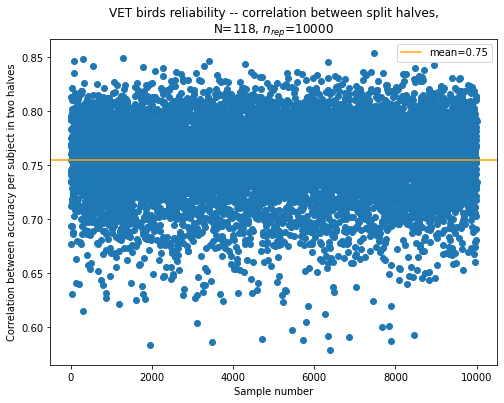

In [367]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(vet_birds_array_corr, ax)

plt.title(f"VET birds reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "vet_birds_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_birds_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

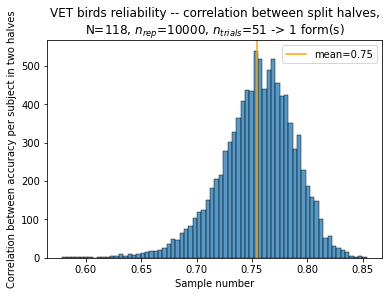

In [368]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(vet_birds_array_corr, ax)

plt.title(f"VET birds reliability -- correlation between split halves,\nN={df_vet_birds.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_birds.userID.value_counts()[0]} -> {df_vet_birds.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "vet_birds_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_birds_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

### Save

In [369]:
# save only if we run it
if 'vet_birds_array_corr' in locals():
    pd.DataFrame({
        "vet_birds_birds_overall_correlation" : vet_birds_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'vet_birds_stand_array_corr' in locals():
    pd.DataFrame({
        "vet_birds_birds_overall_correlation" : vet_birds_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_reliability_standalone-method-Michal.csv"), index=False)   
    print("saved standalone data")

# both of them    
if 'vet_birds_concat_array_corr' in locals():
    pd.DataFrame({
        "vet_birds_birds_overall_correlation" : vet_birds_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_reliability_concat-method-Michal.csv"), index=False)  
    print("saved concat data")

# pd.DataFrame({
#     "vet_birds_overall_correlation" : vet_birds_array_corr,
# }).to_csv(os.path.join(path_reliability_results, "vet_birds_reliability-method-Michal.csv"), index=False)

saved original data


In [370]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

# save the overall results
versions = ['']#, '_stand', '_concat']

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["VET_birds_overall_correlation"],
        "num_trials": [n_trials_dict[f"vet_birds{ver}"]],
        "reliability_mean": [eval(f"vet_birds{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"vet_birds{ver}_array_corr").std()],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"vet_birds{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0         CCMT_overall_correlation          72          0.744839   
1                      CCMT_stage1          18          0.430841   
2                      CCMT_stage2          30          0.586765   
3                      CCMT_stage3          24          0.545496   
4         CCMT_overall_correlation          72          0.770198   
..                             ...         ...               ...   
156       nback_dprime_correlation         276          0.784926   
157           nback_dprime_level_1          96          0.724506   
158           nback_dprime_level_2          90          0.724506   
159           nback_dprime_level_3          90          0.724506   
0    VET_birds_overall_correlation          51          0.754987   

     reliability_std version  num_subjects  
0           0.021953     NaN           243  
1           0.038396     NaN           243  
2           0.031072     NaN           243  
3           0.031030     NaN           243  
4           0.024802   stand           160  
..               ...     ...           ...  
156         0.028446  concat            93  
157         0.035728  concat            93  
158         0.035728  concat            93  
159         0.035728  concat            93  
0           0.034009                   118  

[161 rows x 6 columns]

## VET leaves
[top](#top)

### Run split halves VET-leaves
[top](#top)

In [371]:
# define manually num of trials
n_trials_per_form = 51

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run original set

In [372]:
df_vet_leaves = pd.read_csv(os.path.join(csv_clean_data_path, "VET_leaves-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_vet_leaves.userID.value_counts()[df_vet_leaves.userID.value_counts()>51])#.keys()
# can be not empty -- they didn't make it
print(df_vet_leaves.userID.value_counts()[df_vet_leaves.userID.value_counts()<51])#.keys()


# remove the not full ones
df_vet_leaves = df_vet_leaves[~df_vet_leaves['userID'].isin(df_vet_leaves.userID.value_counts()[df_vet_leaves.userID.value_counts()<51].keys())] 


Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [373]:
# num of subjects
N = len(df_vet_leaves.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_vet_leaves, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["vet_leaves"] = total_n_trials
# and subjects
n_subj_dict["vet_leaves"] = N

# define corr array
vet_leaves_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_vet_leaves.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 51

# go over iterations
for i in range(n_repeats):
    df_vet_leaves_first = None
    df_vet_leaves_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_vet_leaves_first, df_vet_leaves_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    vet_leaves_array_corr[i] = df_vet_leaves_first.groupby('userID').correct.sum().corr(df_vet_leaves_second.groupby('userID').correct.sum(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.21 s per 100
# 22 s (0.3 min) per 10 000

Total number of trials is 51.
Taking 25 trials.
Process took: 36.05 s which is 0.60 min.


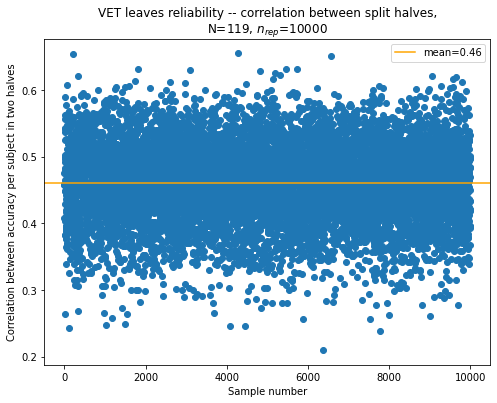

In [374]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(vet_leaves_array_corr, ax)

plt.title(f"VET leaves reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "vet_leaves_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_leaves_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()


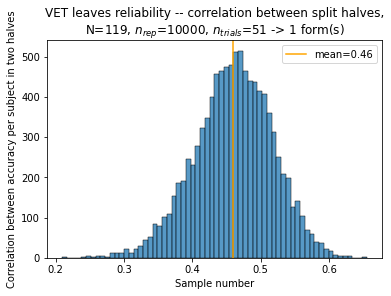

In [375]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(vet_leaves_array_corr, ax)

plt.title(f"VET leaves reliability -- correlation between split halves,\nN={df_vet_leaves.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_leaves.userID.value_counts()[0]} -> {df_vet_leaves.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "vet_leaves_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_leaves_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()


### Save

In [376]:
# save only if we run it
if 'vet_leaves_array_corr' in locals():
    pd.DataFrame({
        "vet_leaves_leaves_overall_correlation" : vet_leaves_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_leaves_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'vet_leaves_stand_array_corr' in locals():
    pd.DataFrame({
        "vet_leaves_leaves_overall_correlation" : vet_leaves_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_leaves_reliability_standalone-method-Michal.csv"), index=False)   
    print("saved standalone data")

# both of them    
if 'vet_leaves_concat_array_corr' in locals():
    pd.DataFrame({
        "vet_leaves_leaves_overall_correlation" : vet_leaves_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_leaves_reliability_concat-method-Michal.csv"), index=False)  
    print("saved concat data")

# pd.DataFrame({
#     "vet_leaves_overall_correlation" : vet_leaves_array_corr,
# }).to_csv(os.path.join(path_reliability_results, "vet_leaves_reliability-method-Michal.csv"), index=False)


saved original data


In [377]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

# save the overall results
versions = ['']#, '_stand', '_concat']

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["VET_leaves_overall_correlation"],
        "num_trials": [n_trials_dict[f"vet_leaves{ver}"]],
        "reliability_mean": [eval(f"vet_leaves{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"vet_leaves{ver}_array_corr").std()],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"vet_leaves{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0          CCMT_overall_correlation          72          0.744839   
1                       CCMT_stage1          18          0.430841   
2                       CCMT_stage2          30          0.586765   
3                       CCMT_stage3          24          0.545496   
4          CCMT_overall_correlation          72          0.770198   
..                              ...         ...               ...   
157            nback_dprime_level_1          96          0.724506   
158            nback_dprime_level_2          90          0.724506   
159            nback_dprime_level_3          90          0.724506   
160   VET_birds_overall_correlation          51          0.754987   
0    VET_leaves_overall_correlation          51          0.460061   

     reliability_std version  num_subjects  
0           0.021953     NaN           243  
1           0.038396     NaN           243  
2           0.031072     NaN           243  
3           0.031030     NaN           243  
4           0.024802   stand           160  
..               ...     ...           ...  
157         0.035728  concat            93  
158         0.035728  concat            93  
159         0.035728  concat            93  
160         0.034009     NaN           118  
0           0.056862                   119  

[162 rows x 6 columns]

## VET planes
[top](#top)

### Run split halves VET-planes
[top](#top)

In [378]:
# define manually num of trials
n_trials_per_form = 51

# define tracker of num of trials per task
n_trials_dict = {}
# define tracker for num_subjects
n_subj_dict = {}

#### Run original set

In [379]:
df_vet_planes = pd.read_csv(os.path.join(csv_clean_data_path, "VET_planes-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_vet_planes.userID.value_counts()[df_vet_planes.userID.value_counts()>51])#.keys()
# can be not empty -- they didn't make it
print(df_vet_planes.userID.value_counts()[df_vet_planes.userID.value_counts()<51])#.keys()


# remove the not full ones
df_vet_planes = df_vet_planes[~df_vet_planes['userID'].isin(df_vet_planes.userID.value_counts()[df_vet_planes.userID.value_counts()<51].keys())] 


Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [380]:
# num of subjects
N = len(df_vet_planes.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_vet_planes, N)

# how many samples we want to correlate
n_repeats = 10**4
n_trials = total_n_trials//2
print(f"Taking {n_trials} trials.")

# save the number of trials
n_trials_dict["vet_planes"] = total_n_trials
# and subjects
n_subj_dict["vet_planes"] = N

# define corr array
vet_planes_array_corr = np.zeros(n_repeats)
    
# define the df
df_sort = df_vet_planes.sort_values(by=["userID"])[["userID", "correct"]]

    
# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# check with what is known
assert total_n_trials == 51

# go over iterations
for i in range(n_repeats):
    df_vet_planes_first = None
    df_vet_planes_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_vet_planes_first, df_vet_planes_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    vet_planes_array_corr[i] = df_vet_planes_first.groupby('userID').correct.sum().corr(df_vet_planes_second.groupby('userID').correct.sum(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
# 0.21 s per 100
# 22 s (0.3 min) per 10 000

Total number of trials is 51.
Taking 25 trials.
Process took: 35.27 s which is 0.59 min.


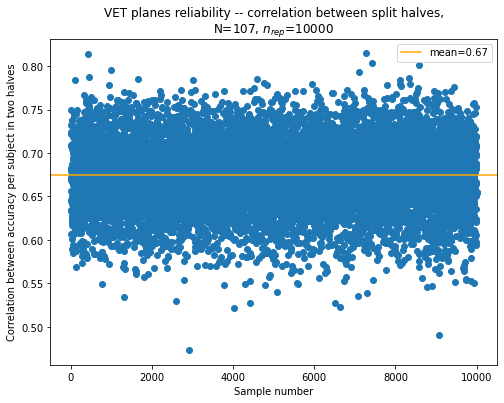

In [381]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

plot_correlation_scatter(vet_planes_array_corr, ax)

plt.title(f"VET planes reliability -- correlation between split halves,\nN={N}, "+"$n_{rep}$"+f"={n_repeats}")

# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()

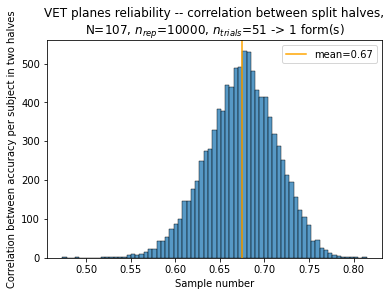

In [382]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(vet_planes_array_corr, ax)

plt.title(f"VET planes reliability -- correlation between split halves,\nN={df_vet_planes.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_planes.userID.value_counts()[0]} -> {df_vet_planes.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()


### Save

In [383]:
# save only if we run it
if 'vet_planes_array_corr' in locals():
    pd.DataFrame({
        "vet_planes_planes_overall_correlation" : vet_planes_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_planes_reliability-method-Michal.csv"), index=False)
    print("saved original data")

# standalone    
if 'vet_planes_stand_array_corr' in locals():
    pd.DataFrame({
        "vet_planes_planes_overall_correlation" : vet_planes_stand_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_planes_reliability_standalone-method-Michal.csv"), index=False)   
    print("saved standalone data")

# both of them    
if 'vet_planes_concat_array_corr' in locals():
    pd.DataFrame({
        "vet_planes_planes_overall_correlation" : vet_planes_concat_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_planes_reliability_concat-method-Michal.csv"), index=False)  
    print("saved concat data")

# pd.DataFrame({
#     "vet_planes_overall_correlation" : vet_planes_array_corr,
# }).to_csv(os.path.join(path_reliability_results, "vet_planes_reliability-method-Michal.csv"), index=False)

saved original data


In [384]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]

# save the overall results
versions = ['']#, '_stand', '_concat']

file = "reliability_summary.csv"

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": ["VET_planes_overall_correlation"],
        "num_trials": [n_trials_dict[f"vet_planes{ver}"]],
        "reliability_mean": [eval(f"vet_planes{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"vet_planes{ver}_array_corr").std()],
        "version": [ver.strip('_')],
        "num_subjects": [n_subj_dict[f"vet_planes{ver}"]],
    })
    )

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  reliability_mean  \
0          CCMT_overall_correlation          72          0.744839   
1                       CCMT_stage1          18          0.430841   
2                       CCMT_stage2          30          0.586765   
3                       CCMT_stage3          24          0.545496   
4          CCMT_overall_correlation          72          0.770198   
..                              ...         ...               ...   
158            nback_dprime_level_2          90          0.724506   
159            nback_dprime_level_3          90          0.724506   
160   VET_birds_overall_correlation          51          0.754987   
161  VET_leaves_overall_correlation          51          0.460061   
0    VET_planes_overall_correlation          51          0.674278   

     reliability_std version  num_subjects  
0           0.021953     NaN           243  
1           0.038396     NaN           243  
2           0.031072     NaN           243  
3           0.031030     NaN           243  
4           0.024802   stand           160  
..               ...     ...           ...  
158         0.035728  concat            93  
159         0.035728  concat            93  
160         0.034009     NaN           118  
161         0.056862     NaN           119  
0           0.039289                   107  

[163 rows x 6 columns]

## VET combine tasks
[top](#top)

In [385]:
df_vet_birds = pd.read_csv(os.path.join(csv_clean_data_path, "VET_birds-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_vet_birds.userID.value_counts()[df_vet_birds.userID.value_counts()>51])#.keys()
# can be not empty -- they didn't make it
print(df_vet_birds.userID.value_counts()[df_vet_birds.userID.value_counts()<51])#.keys()


# remove the not full ones
df_vet_birds = df_vet_birds[~df_vet_birds['userID'].isin(df_vet_birds.userID.value_counts()[df_vet_birds.userID.value_counts()<51].keys())] 


df_vet_leaves = pd.read_csv(os.path.join(csv_clean_data_path, "VET_leaves-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_vet_leaves.userID.value_counts()[df_vet_leaves.userID.value_counts()>51])#.keys()
# can be not empty -- they didn't make it
print(df_vet_leaves.userID.value_counts()[df_vet_leaves.userID.value_counts()<51])#.keys()


# remove the not full ones
df_vet_leaves = df_vet_leaves[~df_vet_leaves['userID'].isin(df_vet_leaves.userID.value_counts()[df_vet_leaves.userID.value_counts()<51].keys())] 


df_vet_planes = pd.read_csv(os.path.join(csv_clean_data_path, "VET_planes-cleaned_data.csv"))

# should be empty -- test if people don't have more than 1 entry
print(df_vet_planes.userID.value_counts()[df_vet_planes.userID.value_counts()>51])#.keys()
# can be not empty -- they didn't make it
print(df_vet_planes.userID.value_counts()[df_vet_planes.userID.value_counts()<51])#.keys()


# remove the not full ones
df_vet_planes = df_vet_planes[~df_vet_planes['userID'].isin(df_vet_planes.userID.value_counts()[df_vet_planes.userID.value_counts()<51].keys())] 


Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)
Series([], Name: userID, dtype: int64)


In [386]:
def split_halves_reliability_VET(df_sort, num_forms, n_trials_per_form=51, n_repeats=10**4):

    # num of subjects
    N = len(df_sort.userID.unique())
    # max number of trials
    total_n_trials = check_df_get_numbers(df_sort, N)
    
    n_trials = total_n_trials//2
    print(f"Taking {n_trials} trials.")

    # # save the number of trials
    # n_trials_dict["vet_planes"] = total_n_trials
    # # and subjects
    # n_subj_dict["vet_planes"] = N

    # define corr array
    vet_array_corr = np.zeros(n_repeats)

    # define the df
    df_sort = df_sort.sort_values(by=["userID"])[["userID", "correct"]]


    # start the timer
    start = time.time()

    # check that it's possible
    assert n_trials <= total_n_trials//2
    # check with what is known
    assert total_n_trials == n_trials_per_form*num_forms

    # go over iterations
    for i in range(n_repeats):
        df_first = None
        df_second = None

        # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
        df_first, df_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

        # calculate correlation
        vet_array_corr[i] = df_first.groupby('userID').correct.sum().corr(df_second.groupby('userID').correct.sum(), 
                                                           method='pearson')  

    end = time.time()
    print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    
    # 0.21 s per 100
    # 22 s (0.3 min) per 10 000
    
    
    return vet_array_corr, N

In [387]:
n_repeats = 1
n_trials_per_form = 51

vet_planes_array_corr, N_planes = split_halves_reliability_VET(df_vet_planes, n_repeats)
vet_birds_array_corr, N_birds = split_halves_reliability_VET(df_vet_birds, n_repeats)
vet_leaves_array_corr, N_leaves = split_halves_reliability_VET(df_vet_leaves, n_repeats)

Total number of trials is 51.
Taking 25 trials.
Process took: 35.02 s which is 0.58 min.
Total number of trials is 51.
Taking 25 trials.
Process took: 35.65 s which is 0.59 min.
Total number of trials is 51.
Taking 25 trials.
Process took: 35.91 s which is 0.60 min.


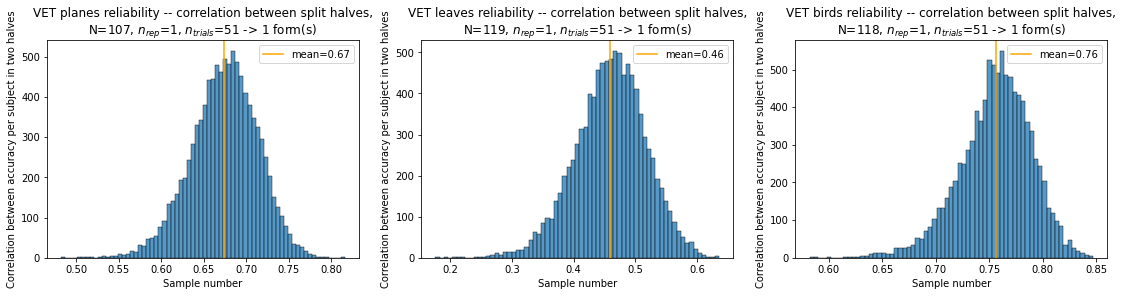

In [388]:
fig, axs = plt.subplots(1, 3, figsize=(19,4))

plot_correlation_hist(vet_planes_array_corr, axs[0])
plot_correlation_hist(vet_leaves_array_corr, axs[1])
plot_correlation_hist(vet_birds_array_corr, axs[2])

axs[0].set_title(f"VET planes reliability -- correlation between split halves,\nN={df_vet_planes.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_planes.userID.value_counts()[0]} -> {df_vet_planes.userID.value_counts()[0]//n_trials_per_form} form(s)")

axs[1].set_title(f"VET leaves reliability -- correlation between split halves,\nN={df_vet_leaves.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_leaves.userID.value_counts()[0]} -> {df_vet_leaves.userID.value_counts()[0]//n_trials_per_form} form(s)")

axs[2].set_title(f"VET birds reliability -- correlation between split halves,\nN={df_vet_birds.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_birds.userID.value_counts()[0]} -> {df_vet_birds.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()


In [389]:
subj_planes_leaves = set(df_vet_planes["userID"].unique())&set(df_vet_leaves["userID"].unique())
subj_birds_leaves = set(df_vet_birds["userID"].unique())&set(df_vet_leaves["userID"].unique())
subj_birds_planes = set(df_vet_birds["userID"].unique())&set(df_vet_planes["userID"].unique())

subj_birds_planes_leaves = set(df_vet_birds["userID"].unique())&set(df_vet_planes["userID"].unique())&set(df_vet_leaves["userID"].unique())

In [390]:
vet_birds_planes_array_corr, N_birds_planes = split_halves_reliability_VET(pd.concat([
    df_vet_birds[df_vet_birds["userID"].isin(subj_birds_planes)], 
    df_vet_planes[df_vet_planes["userID"].isin(subj_birds_planes)]
]), 2)

vet_birds_leaves_array_corr, N_birds_leaves = split_halves_reliability_VET(pd.concat([
    df_vet_birds[df_vet_birds["userID"].isin(subj_birds_leaves)], 
    df_vet_leaves[df_vet_leaves["userID"].isin(subj_birds_leaves)]
]), 2)

vet_planes_leaves_array_corr, N_planes_leaves = split_halves_reliability_VET(pd.concat([
    df_vet_planes[df_vet_planes["userID"].isin(subj_planes_leaves)], 
    df_vet_leaves[df_vet_leaves["userID"].isin(subj_planes_leaves)]
]), 2)

vet_birds_planes_leaves_array_corr, N_birds_planes_leaves = split_halves_reliability_VET(pd.concat([
    df_vet_planes[df_vet_planes["userID"].isin(subj_birds_planes_leaves)], 
    df_vet_leaves[df_vet_leaves["userID"].isin(subj_birds_planes_leaves)],
    df_vet_birds[df_vet_birds["userID"].isin(subj_birds_planes_leaves)]
]), 3)

Total number of trials is 102.
Taking 51 trials.
Process took: 40.49 s which is 0.67 min.
Total number of trials is 102.
Taking 51 trials.
Process took: 41.47 s which is 0.69 min.
Total number of trials is 102.
Taking 51 trials.
Process took: 40.36 s which is 0.67 min.
Total number of trials is 153.
Taking 76 trials.
Process took: 45.56 s which is 0.76 min.


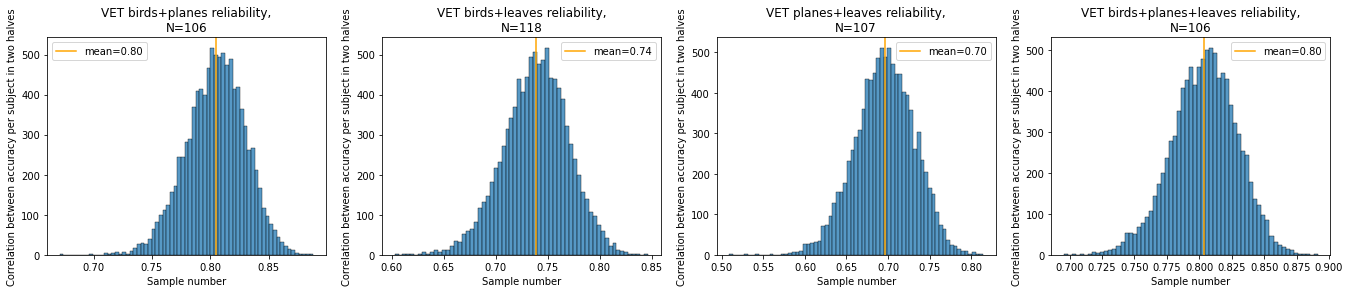

In [391]:
fig, axs = plt.subplots(1, 4, figsize=(23,4))

plot_correlation_hist(vet_birds_planes_array_corr, axs[0])
plot_correlation_hist(vet_birds_leaves_array_corr, axs[1])
plot_correlation_hist(vet_planes_leaves_array_corr, axs[2])
plot_correlation_hist(vet_birds_planes_leaves_array_corr, axs[3])

axs[0].set_title(f"VET birds+planes reliability,\nN={N_birds_planes}")#, "+"$n_{rep}$"+\
#           f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_planes.userID.value_counts()[0]} -> {df_vet_planes.userID.value_counts()[0]//n_trials_per_form} form(s)")

axs[1].set_title(f"VET birds+leaves reliability,\nN={N_birds_leaves}")#, "+"$n_{rep}$"+\
#           f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_leaves.userID.value_counts()[0]} -> {df_vet_leaves.userID.value_counts()[0]//n_trials_per_form} form(s)")

axs[2].set_title(f"VET planes+leaves reliability,\nN={N_planes_leaves}")#, "+"$n_{rep}$"+\
#           f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_birds.userID.value_counts()[0]} -> {df_vet_birds.userID.value_counts()[0]//n_trials_per_form} form(s)")

axs[3].set_title(f"VET birds+planes+leaves reliability,\nN={N_birds_planes_leaves}")#, "+"$n_{rep}$"+\
#           f"={n_repeats}"+", $n_{trials}$"+f"={df_vet_birds.userID.value_counts()[0]} -> {df_vet_birds.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()


#### For the paper, take all 3 forms and sample 1
[top](#top)

In [392]:
# concat all three forms
df_sort = pd.concat([
    df_vet_planes[df_vet_planes["userID"].isin(subj_birds_planes_leaves)], 
    df_vet_leaves[df_vet_leaves["userID"].isin(subj_birds_planes_leaves)],
    df_vet_birds[df_vet_birds["userID"].isin(subj_birds_planes_leaves)]
])

n_trials_per_form=51
n_repeats=10**4

# num of subjects
N = len(df_sort.userID.unique())
# max number of trials
total_n_trials = check_df_get_numbers(df_sort, N)

n_trials = n_trials_per_form #total_n_trials//2
print(f"Taking {n_trials} trials.")

# define corr array
vet_array_corr_paper = np.zeros(n_repeats)

# define the df
df_sort = df_sort.sort_values(by=["userID"])[["userID", "correct"]]


# start the timer
start = time.time()

# check that it's possible
assert n_trials <= total_n_trials//2
# # check with what is known
# assert total_n_trials == n_trials_per_form*num_forms

# go over iterations
for i in range(n_repeats):
    df_first = None
    df_second = None

    # split the data into two halves, sort it by userID and task so that we get the exact same trials for every subject
    df_first, df_second = split_dataframes_faster(df_sort, total_n_trials, n_trials, N)

    # calculate correlation
    vet_array_corr_paper[i] = df_first.groupby('userID').correct.sum().corr(df_second.groupby('userID').correct.sum(), 
                                                       method='pearson')  

end = time.time()
print(f"Process took: {end - start:.2f} s which is {(end-start)/60:.2f} min.")    

Total number of trials is 153.
Taking 51 trials.
Process took: 46.81 s which is 0.78 min.


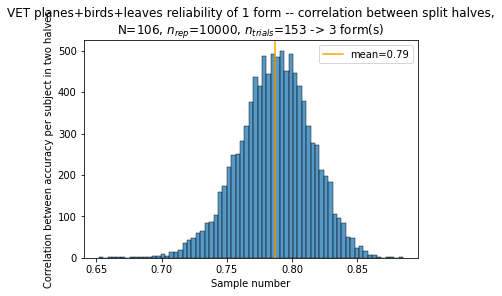

In [393]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

plot_correlation_hist(vet_array_corr_paper, ax)

plt.title(f"VET planes+birds+leaves reliability of 1 form -- correlation between split halves,\nN={df_sort.userID.unique().size}, "+"$n_{rep}$"+\
          f"={n_repeats}"+", $n_{trials}$"+f"={df_sort.userID.value_counts()[0]} -> {df_sort.userID.value_counts()[0]//n_trials_per_form} form(s)")


# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.png"), dpi=150, bbox_inches='tight')
# plt.savefig(os.path.join(path_results, "figures", "vet_planes_reliability_complex_pilot_hist_method-Michal.pdf"), dpi=150, bbox_inches='tight')

plt.show()


#### Save
[top](#top)

In [394]:
# save only if we run it
if 'vet_birds_planes_array_corr' in locals():
    pd.DataFrame({
        "vet_birds_planes_overall_correlation" : vet_birds_planes_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_planes_reliability-method-Michal.csv"), index=False)
    print("saved birds and planes")

#     
if 'vet_birds_leaves_array_corr' in locals():
    pd.DataFrame({
        "vet_birds_leaves_overall_correlation" : vet_birds_leaves_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_leaves_reliability-method-Michal.csv"), index=False)   
    print("birds and leaves")

#    
if 'vet_planes_leaves_array_corr' in locals():
    pd.DataFrame({
        "vet_planes_leaves_overall_correlation" : vet_planes_leaves_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_planes_leaves_reliability-method-Michal.csv"), index=False)   
    print("planes and leaves")
    
# all three of them   
if 'vet_birds_planes_leaves_array_corr' in locals():
    pd.DataFrame({
        "vet_birds_planes_leaves_overall_correlation" : vet_birds_planes_leaves_array_corr,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_planes_leaves_reliability-method-Michal.csv"), index=False)   
    print("birds and planes and leaves")
    
# all three of them but only 1 form sampled
if 'vet_array_corr_paper' in locals():
    pd.DataFrame({
        "vet_birds_planes_leaves_1form_overall_correlation" : vet_array_corr_paper,
    }).to_csv(os.path.join(path_reliability_results, "vet_birds_planes_leaves_1form_reliability-method-Michal.csv"), index=False)   
    print("birds and planes and leaves")

# pd.DataFrame({
#     "vet_planes_overall_correlation" : vet_planes_array_corr,
# }).to_csv(os.path.join(path_reliability_results, "vet_planes_reliability-method-Michal.csv"), index=False)



saved birds and planes
birds and leaves
planes and leaves
birds and planes and leaves
birds and planes and leaves


In [395]:
# define where to save it
files = ["tasks-num_trials.csv", "tasks-num_trials2.csv", "tasks-num_trials_concat.csv"]
# save the overall results
versions = ['']#, '_stand', '_concat']

# save all of them
for file, ver in zip(files, versions):
    print(f"saving {file}")
    # check if we don't have it there already
    if not pd.read_csv(os.path.join(path_results, file))["Task"].str.contains("VET_").any():
        df_num_trials = pd.read_csv(os.path.join(path_results, file))
        # append the trials and save
        df_num_trials.append(
            pd.DataFrame({
            "VET_birds_planes": [2*n_trials_per_form],
            "VET_birds_leaves": [2*n_trials_per_form],
            "VET_planes_leaves": [2*n_trials_per_form],
            "VET_birds_planes_leaves": [3*n_trials_per_form],
        }).T.reset_index().rename(columns={"index":"Task", 0:"num_trials"})
        ).to_csv(os.path.join(path_results, file), index=False) 
        print(f"saved {file}\n")

saving tasks-num_trials.csv
saved tasks-num_trials.csv



In [396]:
file = "reliability_summary.csv"
# TODO -- update this part if we ever have more replicates/forms for each of these VET tasks
versions = ["birds_planes", "birds_leaves", "planes_leaves", "birds_planes_leaves"]

try:
    df_results = pd.read_csv(os.path.join(path_results, file))
except FileNotFoundError:
    df_results = pd.DataFrame()

for ver in versions:
    df_results = df_results.append(
    pd.DataFrame({
        "Task": [f"VET_{ver}_overall_correlation"],
        "num_trials": [len(ver.split('_'))*n_trials_per_form],
        "reliability_mean": [eval(f"vet_{ver}_array_corr").mean()],
        "reliability_std":  [eval(f"vet_{ver}_array_corr").std()],
        "version": [''],
        "num_subjects": [len(eval(f"subj_{ver}"))],
    })
    )
    
# add also the concatenation for the paper
ver = "birds_planes_leaves_1form"
df_results = df_results.append(
pd.DataFrame({
    "Task": [f"VET_{ver}_overall_correlation"],
    "num_trials": [2*n_trials_per_form],
    "reliability_mean": [vet_array_corr_paper.mean()],
    "reliability_std":  [vet_array_corr_paper.std()],
    "version": ['sample_1out3'],
    "num_subjects": [len(subj_birds_planes_leaves)],
})
)

df_results.to_csv(os.path.join(path_results, file), index=False) 

df_results

Task  num_trials  \
0                            CCMT_overall_correlation          72   
1                                         CCMT_stage1          18   
2                                         CCMT_stage2          30   
3                                         CCMT_stage3          24   
4                            CCMT_overall_correlation          72   
..                                                ...         ...   
0                VET_birds_planes_overall_correlation         102   
0                VET_birds_leaves_overall_correlation         102   
0               VET_planes_leaves_overall_correlation         102   
0         VET_birds_planes_leaves_overall_correlation         153   
0   VET_birds_planes_leaves_1form_overall_correlation         102   

    reliability_mean  reliability_std       version  num_subjects  
0           0.744839         0.021953           NaN           243  
1           0.430841         0.038396           NaN           243  
2           0.586765         0.031072           NaN           243  
3           0.545496         0.031030           NaN           243  
4           0.770198         0.024802         stand           160  
..               ...              ...           ...           ...  
0           0.804617         0.025173                         106  
0           0.738418         0.031216                         118  
0           0.695962         0.035620                         107  
0           0.803895         0.025254                         106  
0           0.786780         0.027733  sample_1out3           106  

[168 rows x 6 columns]

---

In [397]:
%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu --iv

Author: Jan Kadlec

Last updated: Sat Jun 10 2023

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.26.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

numpy     : 1.19.1
pandas    : 1.2.4
scipy     : 1.7.3
sys       : 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
matplotlib: 3.6.2
seaborn   : 0.11.1



[top](#top)